In [73]:
import regex as re
import pandas as pd
import random
import requests
import urllib.request
from IPython.display import Image
#api de google sheets
from __future__ import print_function
import os.path
try:
    from googleapiclient.discovery import build
    from google_auth_oauthlib.flow import InstalledAppFlow
    from google.auth.transport.requests import Request
    from google.oauth2.credentials import Credentials
except:
    import sys
    !{sys.executable} -m pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
    from googleapiclient.discovery import build
    from google_auth_oauthlib.flow import InstalledAppFlow
    from google.auth.transport.requests import Request
    from google.oauth2.credentials import Credentials
try:
    from image import DrawImage
except:
    import sys
    !{sys.executable} -m pip install terminal-img
    from image import DrawImage
    



In [2]:
jocs = pd.read_csv('./Jocs_da_Taula-Jocs-Gerard-and-Cris.csv', header=2)

In [3]:
jocs.head()

Portada       Nom del joc Numero de jugadors          Gènere  \
0      NaN    7 wonders:Duel              1 a 2           Draft   
1      NaN        Illuminati              3 a 6        Economic   
2      NaN        Age of war              2 a 4  Push-your-luck   
3      NaN  Attack on Tittan              2 a 5  Push-your-luck   
4      NaN             Dixit              3 a 8           Party   

  Es millor a 2?  Dificultat \nd'aprenentatge (sobre 5)  \
0             Si                                    2.5   
1             No                                    3.0   
2             No                                    NaN   
3             No                                    2.0   
4             No                                    1.0   

   Profunditat \n(sobre 5) Es pot jugar al sofà?  Duració (minuts)  \
0                      3.5                    No              30.0   
1                      3.5                    No             180.0   
2                      NaN                    Si              20.0   
3                      2.0                    No              40.0   
4                      NaN                    Si              45.0   

  Jugat amb Cris? Jugat amb David i Fran? Estrenat? Agrada a Cris  \
0              Si                      No        Si            Si   
1              Si                      Si        Si            Si   
2              Si                      Si        Si            Si   
3              Si                      No        Si       Neutral   
4              Si                      No        Si            Si   

  Agrada a David Agrada a Fran  
0            NaN           NaN  
1        Neutral            Si  
2             Si            Si  
3            NaN           NaN  
4            NaN           NaN

In [4]:
# dropeamos Portada porque es una imagen 
jocs.drop('Portada',axis=1,inplace=True)

In [5]:
jocs.head()

Nom del joc Numero de jugadors          Gènere Es millor a 2?  \
0    7 wonders:Duel              1 a 2           Draft             Si   
1        Illuminati              3 a 6        Economic             No   
2        Age of war              2 a 4  Push-your-luck             No   
3  Attack on Tittan              2 a 5  Push-your-luck             No   
4             Dixit              3 a 8           Party             No   

   Dificultat \nd'aprenentatge (sobre 5)  Profunditat \n(sobre 5)  \
0                                    2.5                      3.5   
1                                    3.0                      3.5   
2                                    NaN                      NaN   
3                                    2.0                      2.0   
4                                    1.0                      NaN   

  Es pot jugar al sofà?  Duració (minuts) Jugat amb Cris?  \
0                    No              30.0              Si   
1                    No             180.0              Si   
2                    Si              20.0              Si   
3                    No              40.0              Si   
4                    Si              45.0              Si   

  Jugat amb David i Fran? Estrenat? Agrada a Cris Agrada a David Agrada a Fran  
0                      No        Si            Si            NaN           NaN  
1                      Si        Si            Si        Neutral            Si  
2                      Si        Si            Si             Si            Si  
3                      No        Si       Neutral            NaN           NaN  
4                      No        Si            Si            NaN           NaN

In [6]:
# algunos valores raros en columns
jocs.columns

Index(['Nom del joc', 'Numero de jugadors', 'Gènere', 'Es millor a 2?',
       'Dificultat \nd'aprenentatge (sobre 5)', 'Profunditat \n(sobre 5)',
       'Es pot jugar al sofà?', 'Duració (minuts)', 'Jugat amb Cris?',
       'Jugat amb David i Fran?', 'Estrenat?', 'Agrada a Cris',
       'Agrada a David', 'Agrada a Fran'],
      dtype='object')

In [7]:
jocs.rename(columns=({"Dificultat \nd'aprenentatge (sobre 5)":"Dificultat d'aprenentatge (sobre 5)"}),inplace=True)
jocs.rename(columns=({"Profunditat \n(sobre 5)":"Profunditat (sobre 5)"}),inplace=True)

In [8]:
jocs.head()

Nom del joc Numero de jugadors          Gènere Es millor a 2?  \
0    7 wonders:Duel              1 a 2           Draft             Si   
1        Illuminati              3 a 6        Economic             No   
2        Age of war              2 a 4  Push-your-luck             No   
3  Attack on Tittan              2 a 5  Push-your-luck             No   
4             Dixit              3 a 8           Party             No   

   Dificultat d'aprenentatge (sobre 5)  Profunditat (sobre 5)  \
0                                  2.5                    3.5   
1                                  3.0                    3.5   
2                                  NaN                    NaN   
3                                  2.0                    2.0   
4                                  1.0                    NaN   

  Es pot jugar al sofà?  Duració (minuts) Jugat amb Cris?  \
0                    No              30.0              Si   
1                    No             180.0              Si   
2                    Si              20.0              Si   
3                    No              40.0              Si   
4                    Si              45.0              Si   

  Jugat amb David i Fran? Estrenat? Agrada a Cris Agrada a David Agrada a Fran  
0                      No        Si            Si            NaN           NaN  
1                      Si        Si            Si        Neutral            Si  
2                      Si        Si            Si             Si            Si  
3                      No        Si       Neutral            NaN           NaN  
4                      No        Si            Si            NaN           NaN

In [9]:
jocs['Gènere'].value_counts()

Cartes                 11
Draft                   9
Eurogame                9
Party                   8
Pseudo-Wargame          7
Abstracte               7
Ameritrash              5
Losetas                 5
Estrategia              5
Push-your-luck          4
Engine-building         3
Rols ocults             3
Economic                3
Deck building           2
Pick-up and deliver     2
4X                      2
Subastes                1
Roll and write          1
Filler                  1
Name: Gènere, dtype: int64

In [10]:
jocs[jocs['Gènere'] == 'Filler']

Nom del joc Numero de jugadors  Gènere Es millor a 2?  \
86  La isla del botín              2 a 5  Filler             No   

    Dificultat d'aprenentatge (sobre 5)  Profunditat (sobre 5)  \
86                                  2.0                    2.0   

   Es pot jugar al sofà?  Duració (minuts) Jugat amb Cris?  \
86                   NaN              60.0              No   

   Jugat amb David i Fran? Estrenat? Agrada a Cris Agrada a David  \
86                      No        No           NaN            NaN   

   Agrada a Fran  
86           NaN

In [11]:
# este creo podria agruparse en juego de cartas
jocs.loc[jocs[jocs['Nom del joc'] == 'La isla del botín'].index,'Gènere'] = 'Cartes'

In [12]:
jocs[jocs['Gènere'] == 'Filler']

Empty DataFrame
Columns: [Nom del joc, Numero de jugadors, Gènere, Es millor a 2?, Dificultat d'aprenentatge (sobre 5), Profunditat (sobre 5), Es pot jugar al sofà?, Duració (minuts), Jugat amb Cris?, Jugat amb David i Fran?, Estrenat?, Agrada a Cris, Agrada a David, Agrada a Fran]
Index: []

In [13]:
jocs.query('Gènere == "Cartes"')

Nom del joc Numero de jugadors  Gènere Es millor a 2?  \
11                   Epic                  2  Cartes             Si   
14               Hanafuda                  2  Cartes             Si   
19    La fallera calavera              2 a 5  Cartes             No   
29            Star realms              1 a 2  Cartes             Si   
40                  Claim                  2  Cartes             Si   
51               Abluxxen              2 a 5  Cartes             No   
52     Aire, Tierra y Mar                  2  Cartes             Si   
55             Liberation                  2  Cartes             Si   
73       Pájaros cantores              2 a 4  Cartes        Neutral   
80             Influentia              3 a 4  Cartes             No   
83  Cartaventura: Vinland              1 a 6  Cartes        Neutral   
86      La isla del botín              2 a 5  Cartes             No   

    Dificultat d'aprenentatge (sobre 5)  Profunditat (sobre 5)  \
11                                  2.5                    3.5   
14                                  2.5                    2.5   
19                                  1.5                    1.5   
29                                  2.0                    3.0   
40                                  2.0                    2.5   
51                                  1.5                    3.0   
52                                  2.0                    3.0   
55                                  2.0                    3.0   
73                                  2.5                    2.5   
80                                  2.5                    2.5   
83                                  1.0                    1.5   
86                                  2.0                    2.0   

   Es pot jugar al sofà?  Duració (minuts) Jugat amb Cris?  \
11                    Si              20.0              Si   
14                    No              15.0              Si   
19                    Si              30.0              Si   
29                    Si              20.0              No   
40                    Si              25.0              Si   
51                    No              15.0              Si   
52                    Si              15.0              Si   
55                    Si              30.0              No   
73                    No              25.0              Si   
80                   NaN              40.0              Si   
83                   NaN              60.0              No   
86                   NaN              60.0              No   

   Jugat amb David i Fran? Estrenat? Agrada a Cris Agrada a David  \
11                      No        Si       Neutral            NaN   
14                      No        Si           NaN            NaN   
19                      Si        Si            Si             Si   
29                      No        Si           NaN            NaN   
40                      No        Si            No            NaN   
51                     NaN        No           NaN            NaN   
52                     NaN        Si           NaN            NaN   
55                     NaN        No           NaN            NaN   
73                      No        Si           NaN            NaN   
80                     NaN        Si           NaN            NaN   
83                      No        No           NaN            NaN   
86                      No        No           NaN            NaN   

   Agrada a Fran  
11           NaN  
14           NaN  
19            Si  
29           NaN  
40           NaN  
51           NaN  
52           NaN  
55           NaN  
73           NaN  
80           NaN  
83           NaN  
86           NaN

 ### Objetivos:
 - Crear un recomendador de juegos en base al tiempo y personas
 - Ampliar también a generos, etc..
 - Obtener el csv directamente de la url de google docs?

### Programa que usa API:

In [79]:
class Recomanador:
    
    def __init__(self):
        self.players = None
        self.dificultat = None
        self.dif_min = None
        self.dif_max = None
        self.temps = None
        
        
    
    def simple_questions(self):
        '''pregunta als jugadors: quants son, quina dificultat i quant de temps volen jugar'''
        while True:
            valid = False
            while valid == False:
                self.players = input('quants jugadors sou? ')
                if self.players.isnumeric():
                    self.players = int(self.players)
                    valid = True
            break

        while True:
            valid = False
            while valid == False:
                print('quina profunditat de joc esperes? Facil/Mitja/Dificil \n')
                self.dificultat = input('introdueix F,M o D ')
                if self.dificultat.upper() == 'F':
                    self.dificultat = self.dificultat.upper()
                    valid = True
                elif self.dificultat.upper() == 'M':
                    self.dificultat = self.dificultat.upper()
                    valid = True
                elif self.dificultat.upper() == 'D':
                    self.dificultat = self.dificultat.upper()
                    valid = True
            break

        if self.dificultat == 'F':
            self.dif_min = 0
            self.dif_max = 2.5
        elif self.dificultat == 'M':
            self.dif_min = 2
            self.dif_max = 3.5
        else:
            self.dif_min = 3.5
            self.dif_max = 5    

        while True:
            valid = False
            while valid == False:
                print('quanta estona voleu jugar aproximadament? ')
                self.temps = input('introdueix temps en minuts ')
                if self.temps.isnumeric():
                    self.temps = int(self.temps)
                    valid = True
            break
    
    
    def simple_choice(self,data):
        '''selecciona un joc, mostra una imatge si pot, i pregunta si va bé el joc seleccionat'''
        queried_jocs = data.query('min <= @self.players & max >= @self.players & Duració <= (@self.temps + 15) & Duració >= (@self.temps - 15) & Profunditat >= @self.dif_min & Profunditat <= @self.dif_max ')
        while True:
            try:
                pick = random.choice(list(queried_jocs['Nom del joc']))
            except:
                print('no hi ha cap joc que cumpleixi els teus requisits\n')
                print("et recomanaré un joc a l'atzar\n")
                pick = random.choice(data['Nom del joc'])
            print(f' Perquè no jugueu a {pick} ?')
            try:
                image = requests.get(f'https://www.boardgamegeek.com/search/boardgame?q={pick}&nosession=1&showcount=20', headers = {'user-agent': '{Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36}'})
                object_pattern = re.compile('/boardgame/([0-9]*)/')
                object_id = object_pattern.findall(image.text)[0]
                resp = requests.get(f'https://api.geekdo.com/api/images?ajax=1&gallery=all&nosession=1&objectid={object_id}&objecttype=thing&pageid=1&showcount=36&size=thumb&sort=hot')
                image_url = resp.json()['images'][random.randint(0,10)]['imageurl_lg']
            except:
                print("No s'ha pogut trobar cap imatge del joc\n")
                image_url = None
            if len(image_url) > 0:
                try:
                    display(Image(image_url))
                except:
                    #print(f'una imatge de mostra aqui: {image_url}')
                    img = DrawImage.from_url(image_url,size=(12,12))
                    img.draw_image()
            

            agree = input("T'agrada aquesta opció? Y/N ")
            if agree.upper() == 'Y':
                break
    
        

In [80]:
class JocDB:
    
    def __init__(self):
        self.jocs_list = []
        self.jocs_df = None
        
    
    def apiCall(self):
        '''usa la api de google sheets per recuperar la informació de la meva colecció'''
        # obtenim la jocs de taula sheet desded l'Api de google

        # If modifying these scopes, delete the file token.json.
        SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

        # The ID and range of a sample spreadsheet.
        SAMPLE_SPREADSHEET_ID = '1Ixtc7aIaMxe8XeKQC9fAfBerZxYFsifS0sy0X2yJfB4'
        SAMPLE_RANGE_NAME = 'Jocs - Gerard and Cris!A1:O222'

        creds = None
            # The file token.json stores the user's access and refresh tokens, and is
            # created automatically when the authorization flow completes for the first
            # time.
        if os.path.exists('token.json'):
            creds = Credentials.from_authorized_user_file('token.json', SCOPES)
        # If there are no (valid) credentials available, let the user log in.
        if not creds or not creds.valid:
            if creds and creds.expired and creds.refresh_token:
                creds.refresh(Request())
            else:
                flow = InstalledAppFlow.from_client_secrets_file(
                    'credentials.json', SCOPES)
                creds = flow.run_local_server(port=0)
            # Save the credentials for the next run
            with open('token.json', 'w') as token:
                token.write(creds.to_json())
        service = build('sheets', 'v4', credentials=creds)

        # Call the Sheets API
        print('retrieving boardgame collection from google sheets...')
        sheet = service.spreadsheets()
        result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                    range=SAMPLE_RANGE_NAME
                                   ).execute()
        values = result.get('values', [])
        self.jocs_list = values
        
    def toDf(self):
        '''transforma la informació obtinguda en un dataframe'''
        # creem a mà un Dataframe accedint a les llistes com si fosin columnes
        self.jocs_df = pd.DataFrame({'Nom del joc':[self.jocs_list[i][1] for i in range(3,len(self.jocs_list))],
                                     'Num. Jugadors':[self.jocs_list[i][2] for i in range(3,len(self.jocs_list))],
                                      'Gènere':[self.jocs_list[i][3] for i in range(3,len(self.jocs_list))],
                                      'Millor a 2?':[self.jocs_list[i][4] for i in range(3,len(self.jocs_list))],
                                      "Dificultat d'aprenentatge (sobre 5)":[self.jocs_list[i][5] for i in range(3,len(self.jocs_list))],
                                      'Profunditat':[float(self.jocs_list[i][6]) for i in range(3,len(self.jocs_list))],
                                      'Duració':[int(self.jocs_list[i][8]) for i in range(3,len(self.jocs_list))]
                                     })
        
        # continuem tractant el df
        minjoc = re.compile('([1-9]) a [1-9]')
        maxjoc = re.compile('[1-9] a ([1-9])')
        
        # creem noves columnes amb el min i el max
        for i in self.jocs_df['Num. Jugadors'].index:
            min_p = minjoc.findall(self.jocs_df.loc[i,'Num. Jugadors'])
            if len(min_p) > 0:
                min_p = int(min_p[0])
                self.jocs_df.loc[i,'min'] = min_p
            else:
                self.jocs_df.loc[i,'min'] = 0
            max_p = maxjoc.findall(self.jocs_df.loc[i,'Num. Jugadors'])
            if len(max_p) > 0:
                max_p = int(max_p[0])
                self.jocs_df.loc[i,'max'] = max_p
            else:
                self.jocs_df.loc[i,'max'] = 0
            
        #jocs només per un numero fix de persones
        for i in self.jocs_df['Num. Jugadors'].index:
            if self.jocs_df.loc[i,'min'] == 0:
                self.jocs_df.loc[i,'min'] = int(self.jocs_df.loc[i,'Num. Jugadors'])
                self.jocs_df.loc[i,'max'] = int(self.jocs_df.loc[i,'Num. Jugadors'])
       


In [81]:
def main():
    # creem la conexió
    coleccio = JocDB()
    try:
        coleccio.apiCall()
    except:
        raise 'Conexió amb API ha fallat'
    
    # transformem a DataFrame
    coleccio.toDf()
    game_df = coleccio.jocs_df
    
    # creem el recomanador
    recom = Recomanador()
    recom.simple_questions()
    recom.simple_choice(game_df)
        

retrieving boardgame collection from google sheets...
quants jugadors sou? 4
quina profunditat de joc esperes? Facil/Mitja/Dificil 

introdueix F,M o D m
quanta estona voleu jugar aproximadament? 
introdueix temps en minuts 50
 Perquè no jugueu a Dragon castle ?


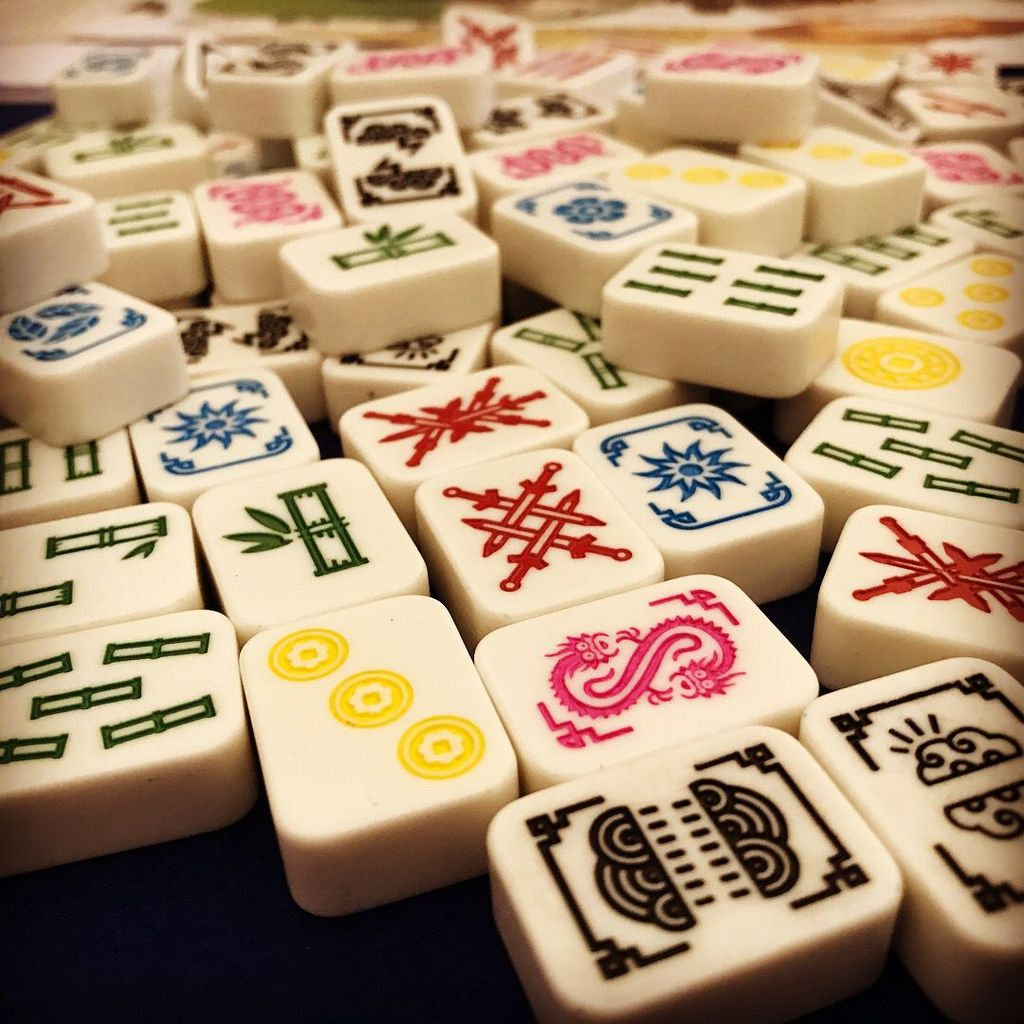

T'agrada aquesta opció? Y/N n
 Perquè no jugueu a Dixit ?


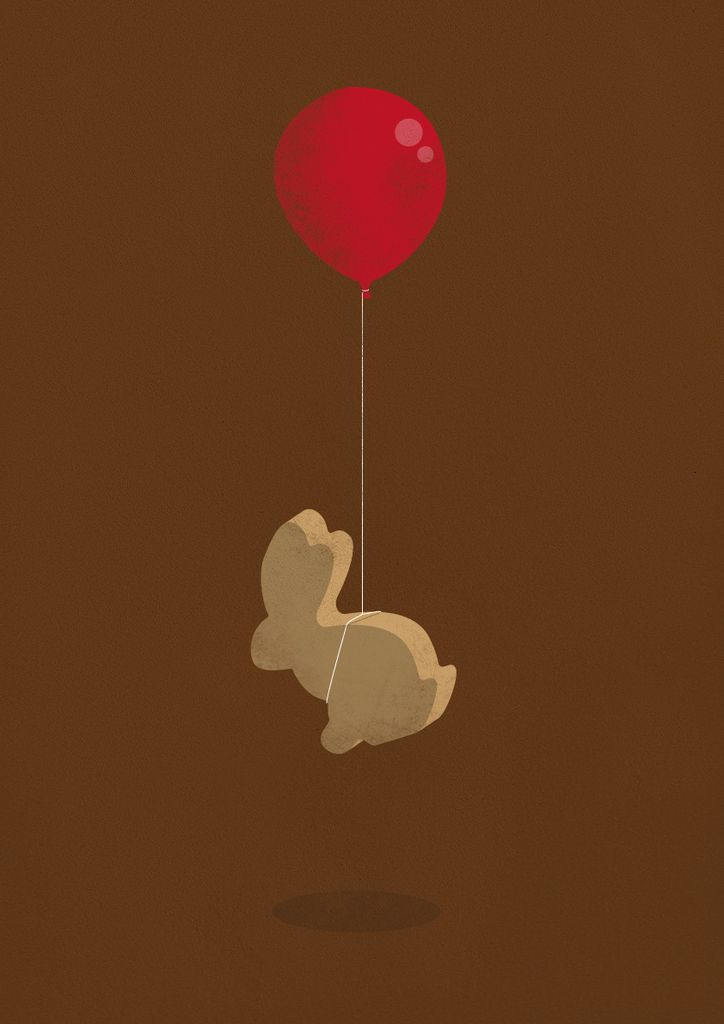

T'agrada aquesta opció? Y/N y


In [82]:
main()

## Espai per proves

In [43]:
image = requests.get('https://www.boardgamegeek.com/search/boardgame?q=Shinkansen&nosession=1&showcount=20', headers = {'user-agent': '{Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36}'}) 


In [44]:
object_pattern = re.compile('/boardgame/([0-9]*)/')

In [45]:
object_id = object_pattern.findall(image.text)[0]

In [46]:
try:
    resp = requests.get(f'https://api.geekdo.com/api/images?ajax=1&gallery=all&nosession=1&objectid={object_id}&objecttype=thing&pageid=1&showcount=36&size=thumb&sort=hot')
except:
    raise 'no se encontró imagen'

In [47]:
resp

<Response [200]>

In [48]:
image_url_2 = resp.json()['images'][random.randint(0,10)]['imageurl_lg']

In [49]:
image_url_2

'https://cf.geekdo-images.com/4LKDBZWAnLqvtfcugYtDDg__large/img/tqbVDXlLAoYpM_2z8ag-VgF1qUI=/fit-in/1024x1024/filters:no_upscale():strip_icc()/pic6404816.jpg'

In [50]:
from PIL import Image
try:
    from colr import Colr
except:
    import sys
    !{sys.executable} -m pip install Colr
    from colr import Colr
import shutil


In [51]:
image_1 = requests.get(resp.json()['images'][random.randint(0,10)]['imageurl_lg'])

In [52]:
image_1.url

'https://cf.geekdo-images.com/fzUE4VaGPfSiHsvTkfmVYQ__large/img/ZfBIMZMaAjplwe4c6IXDCY-ivMc=/fit-in/1024x1024/filters:no_upscale():strip_icc()/pic6404819.jpg'

In [53]:
# Investigant com mostrar la imatge per terminal...
filename = image_1.url.split("/")[-1]

In [54]:
r = requests.get(image_url_2, stream = True)

In [55]:
# Set decode_content value to True, otherwise the downloaded image file's size will be zero.
r.raw.decode_content = True
# Open a local file with wb ( write binary ) permission.
with open(filename,'wb') as f:
        shutil.copyfileobj(r.raw, f)

In [56]:
image_path = f'./{filename}'

In [57]:
image = Image.open(image_path)

In [59]:
pixel_values = image.getdata()

In [69]:
width, height = image.size
for index, character in enumerate(pixel_values):
    if not isinstance(character, (tuple, list)):
        continue
    r, g, b = character[:-1]
    if index % width == 0:
        print("")
    print(Colr().rgb(r, g, b, "\u2584"), end="")

ValueError: not enough values to unpack (expected 3, got 2)

In [61]:
width, height = image.size

In [67]:
for index, character in enumerate(pixel_values):
    print(character[:-1])

(99, 113)
(97, 111)
(97, 111)
(101, 115)
(108, 121)
(117, 128)
(121, 132)
(122, 132)
(126, 136)
(128, 137)
(130, 138)
(132, 140)
(134, 142)
(135, 143)
(136, 144)
(136, 144)
(136, 146)
(136, 146)
(137, 148)
(138, 149)
(140, 151)
(141, 152)
(142, 153)
(142, 153)
(142, 153)
(143, 155)
(144, 156)
(145, 157)
(147, 159)
(148, 160)
(149, 161)
(149, 161)
(162, 163)
(158, 160)
(152, 157)
(145, 151)
(135, 145)
(123, 136)
(112, 129)
(104, 124)
(93, 115)
(90, 113)
(87, 110)
(83, 109)
(81, 107)
(81, 104)
(78, 101)
(76, 99)
(81, 94)
(75, 89)
(92, 109)
(109, 124)
(98, 110)
(89, 99)
(102, 104)
(114, 107)
(116, 99)
(122, 97)
(126, 96)
(126, 94)
(124, 94)
(120, 93)
(118, 93)
(116, 93)
(122, 89)
(123, 89)
(124, 88)
(125, 89)
(126, 89)
(128, 90)
(129, 91)
(128, 92)
(129, 93)
(124, 90)
(121, 90)
(124, 94)
(125, 97)
(124, 97)
(123, 95)
(123, 96)
(117, 98)
(120, 98)
(120, 98)
(121, 97)
(122, 95)
(122, 94)
(122, 92)
(124, 91)
(125, 92)
(125, 92)
(125, 92)
(126, 93)
(127, 95)
(127, 97)
(128, 98)
(129, 99)
(131

(184, 188)
(184, 189)
(184, 189)
(184, 189)
(184, 189)
(184, 189)
(184, 189)
(184, 189)
(180, 189)
(181, 189)
(184, 189)
(184, 188)
(186, 188)
(186, 187)
(186, 185)
(187, 184)
(190, 186)
(189, 185)
(189, 183)
(187, 181)
(186, 180)
(180, 176)
(175, 171)
(172, 168)
(176, 158)
(171, 153)
(164, 146)
(157, 140)
(151, 135)
(146, 130)
(141, 126)
(139, 124)
(138, 123)
(137, 121)
(134, 118)
(131, 114)
(127, 110)
(123, 105)
(121, 101)
(119, 99)
(109, 95)
(106, 92)
(103, 87)
(102, 84)
(101, 83)
(101, 81)
(100, 80)
(99, 79)
(102, 83)
(95, 80)
(87, 75)
(79, 70)
(71, 66)
(61, 60)
(50, 53)
(44, 47)
(10, 41)
(4, 35)
(1, 29)
(1, 27)
(1, 27)
(1, 25)
(3, 25)
(6, 26)
(7, 25)
(8, 25)
(9, 25)
(9, 25)
(11, 25)
(12, 27)
(12, 27)
(12, 27)
(9, 27)
(10, 28)
(10, 28)
(12, 29)
(12, 29)
(13, 31)
(14, 32)
(13, 32)
(12, 32)
(11, 33)
(8, 34)
(6, 34)
(4, 34)
(0, 34)
(0, 33)
(0, 32)
(0, 32)
(0, 34)
(19, 43)
(42, 57)
(62, 68)
(76, 74)
(88, 82)
(97, 87)
(102, 93)
(104, 97)
(107, 100)
(110, 103)
(109, 102)
(108, 98)
(105, 

(31, 21)
(31, 21)
(31, 21)
(31, 21)
(29, 20)
(30, 21)
(30, 21)
(30, 21)
(30, 21)
(30, 21)
(31, 22)
(31, 22)
(32, 23)
(32, 23)
(32, 23)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(31, 22)
(30, 21)
(30, 21)
(30, 21)
(30, 21)
(30, 21)
(30, 21)
(30, 21)
(30, 21)
(24, 22)
(24, 22)
(25, 23)
(25, 23)
(25, 23)
(25, 23)
(24, 22)
(24, 22)
(24, 22)
(24, 22)
(24, 22)
(24, 22)
(24, 22)
(24, 22)
(24, 22)
(24, 22)
(23, 23)
(23, 23)
(24, 22)
(24, 22)
(24, 22)
(26, 22)
(26, 22)
(27, 21)
(25, 19)
(27, 18)
(27, 18)
(27, 18)
(28, 17)
(28, 17)
(28, 17)
(28, 17)
(29, 20)
(29, 20)
(29, 20)
(29, 20)
(29, 20)
(29, 20)
(29, 20)
(29, 20)
(29, 20)
(29, 20)
(29, 20)
(30, 21)
(30, 21)
(30, 21)
(30, 21)
(31, 22)
(102, 116)
(104, 117)
(107, 120)
(108, 121)
(108, 121)
(110, 123)
(118, 128)
(122, 132)
(124, 134)
(126, 136)
(131, 139)
(134, 142)
(136, 144)
(137, 145)
(137, 145)
(136, 144)
(135, 145)
(136, 146)
(136, 146)
(137, 148)
(138, 149)
(139, 150)
(1

(49, 42)
(46, 42)
(46, 41)
(44, 41)
(42, 41)
(42, 43)
(42, 44)
(43, 45)
(43, 41)
(44, 42)
(44, 42)
(45, 44)
(45, 45)
(45, 47)
(45, 48)
(44, 49)
(46, 51)
(46, 52)
(47, 53)
(46, 54)
(46, 54)
(45, 53)
(47, 55)
(48, 56)
(46, 62)
(49, 65)
(56, 68)
(61, 70)
(64, 70)
(68, 70)
(72, 71)
(75, 73)
(76, 72)
(79, 75)
(82, 80)
(85, 83)
(85, 84)
(82, 84)
(78, 81)
(77, 80)
(69, 80)
(66, 79)
(63, 76)
(59, 74)
(60, 75)
(59, 75)
(60, 76)
(59, 75)
(55, 71)
(53, 69)
(51, 66)
(47, 63)
(47, 60)
(46, 58)
(45, 57)
(44, 56)
(43, 51)
(46, 54)
(48, 56)
(49, 54)
(45, 51)
(43, 47)
(45, 47)
(46, 46)
(66, 62)
(70, 65)
(79, 70)
(88, 75)
(95, 78)
(99, 80)
(100, 80)
(102, 79)
(104, 77)
(102, 75)
(97, 72)
(94, 69)
(93, 68)
(94, 71)
(98, 75)
(100, 80)
(103, 83)
(101, 83)
(100, 82)
(99, 81)
(95, 79)
(92, 76)
(90, 74)
(88, 72)
(87, 69)
(84, 66)
(80, 62)
(78, 58)
(77, 57)
(76, 56)
(78, 55)
(77, 54)
(68, 48)
(67, 46)
(64, 44)
(61, 43)
(57, 41)
(55, 40)
(55, 40)
(56, 41)
(54, 42)
(56, 44)
(55, 43)
(58, 45)
(69, 56)
(82, 69)
(8

(93, 74)
(94, 75)
(94, 74)
(89, 69)
(83, 63)
(79, 59)
(74, 54)
(66, 47)
(60, 43)
(56, 41)
(55, 40)
(54, 40)
(54, 40)
(61, 41)
(61, 41)
(60, 40)
(58, 40)
(58, 40)
(57, 39)
(56, 38)
(54, 39)
(53, 38)
(52, 37)
(50, 36)
(50, 36)
(51, 37)
(52, 38)
(53, 39)
(52, 41)
(50, 39)
(51, 40)
(51, 40)
(53, 42)
(56, 42)
(57, 43)
(59, 43)
(59, 43)
(61, 43)
(61, 43)
(62, 42)
(62, 42)
(62, 42)
(63, 41)
(63, 41)
(63, 41)
(59, 41)
(58, 42)
(59, 43)
(60, 44)
(60, 44)
(60, 44)
(60, 44)
(59, 45)
(57, 43)
(57, 43)
(56, 41)
(54, 42)
(53, 41)
(51, 39)
(50, 38)
(49, 37)
(46, 34)
(45, 33)
(42, 30)
(38, 28)
(35, 25)
(33, 23)
(31, 21)
(29, 20)
(29, 20)
(29, 20)
(27, 21)
(28, 22)
(28, 22)
(28, 22)
(27, 23)
(27, 23)
(27, 21)
(28, 22)
(28, 22)
(28, 22)
(28, 22)
(28, 22)
(29, 23)
(29, 23)
(30, 24)
(30, 24)
(30, 24)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(29, 23)
(24, 22)
(24, 22)
(

(79, 67)
(74, 65)
(72, 63)
(70, 61)
(72, 60)
(73, 61)
(78, 65)
(82, 69)
(86, 71)
(87, 70)
(90, 72)
(92, 74)
(95, 74)
(95, 75)
(96, 74)
(96, 74)
(97, 75)
(94, 74)
(94, 74)
(94, 74)
(95, 73)
(95, 73)
(95, 73)
(95, 73)
(95, 73)
(96, 74)
(95, 74)
(93, 75)
(92, 75)
(91, 76)
(91, 76)
(89, 76)
(89, 76)
(92, 73)
(93, 74)
(95, 76)
(96, 77)
(96, 77)
(94, 76)
(92, 74)
(91, 73)
(91, 73)
(90, 74)
(88, 72)
(85, 69)
(78, 64)
(73, 59)
(68, 54)
(65, 51)
(49, 46)
(47, 44)
(43, 43)
(41, 41)
(41, 41)
(44, 44)
(47, 47)
(49, 49)
(51, 49)
(54, 50)
(59, 53)
(63, 56)
(67, 56)
(68, 56)
(68, 53)
(67, 53)
(52, 55)
(51, 53)
(48, 49)
(47, 46)
(46, 44)
(46, 42)
(44, 40)
(42, 38)
(46, 41)
(45, 41)
(45, 41)
(43, 41)
(41, 41)
(40, 41)
(40, 41)
(37, 41)
(38, 46)
(39, 46)
(39, 48)
(37, 49)
(37, 50)
(35, 52)
(34, 52)
(32, 52)
(30, 50)
(33, 50)
(35, 51)
(35, 50)
(36, 49)
(39, 48)
(41, 49)
(42, 50)
(39, 58)
(44, 62)
(50, 66)
(53, 67)
(52, 64)
(54, 64)
(58, 64)
(63, 66)
(76, 78)
(77, 79)
(78, 80)
(79, 81)
(79, 81)
(76, 80)
(

(50, 53)
(51, 53)
(51, 53)
(51, 53)
(50, 52)
(50, 52)
(56, 49)
(57, 50)
(59, 52)
(61, 54)
(63, 56)
(66, 57)
(68, 59)
(70, 59)
(72, 61)
(74, 61)
(75, 62)
(77, 62)
(78, 63)
(79, 64)
(80, 65)
(80, 65)
(86, 65)
(87, 66)
(89, 68)
(91, 70)
(92, 71)
(93, 72)
(93, 72)
(93, 72)
(91, 70)
(91, 70)
(91, 70)
(91, 70)
(89, 70)
(90, 71)
(92, 73)
(94, 75)
(96, 71)
(97, 72)
(97, 73)
(95, 74)
(92, 74)
(88, 72)
(83, 71)
(81, 71)
(71, 65)
(65, 61)
(57, 55)
(52, 51)
(49, 48)
(47, 47)
(46, 46)
(46, 46)
(55, 44)
(54, 43)
(53, 42)
(54, 43)
(56, 45)
(61, 50)
(64, 54)
(67, 57)
(70, 62)
(68, 60)
(63, 57)
(59, 53)
(54, 48)
(49, 45)
(46, 42)
(44, 40)
(54, 45)
(60, 49)
(66, 55)
(75, 62)
(81, 66)
(88, 71)
(93, 75)
(96, 78)
(92, 72)
(86, 66)
(79, 60)
(75, 56)
(73, 54)
(70, 52)
(66, 48)
(62, 44)
(67, 41)
(67, 41)
(67, 43)
(67, 43)
(65, 44)
(64, 43)
(62, 42)
(60, 42)
(56, 41)
(56, 41)
(55, 41)
(52, 41)
(52, 41)
(51, 42)
(51, 42)
(51, 42)
(47, 39)
(47, 39)
(49, 39)
(49, 39)
(49, 39)
(51, 40)
(53, 39)
(53, 39)
(55, 39)
(

(91, 79)
(92, 80)
(91, 77)
(92, 76)
(93, 76)
(96, 74)
(100, 74)
(103, 76)
(107, 77)
(109, 77)
(115, 73)
(114, 72)
(112, 70)
(109, 69)
(107, 67)
(105, 65)
(103, 63)
(101, 64)
(100, 64)
(101, 67)
(100, 68)
(100, 70)
(97, 69)
(94, 68)
(90, 65)
(88, 63)
(73, 71)
(72, 70)
(72, 70)
(74, 69)
(75, 70)
(78, 72)
(80, 74)
(83, 75)
(82, 70)
(85, 71)
(88, 71)
(91, 72)
(93, 72)
(94, 71)
(94, 70)
(95, 69)
(96, 68)
(96, 68)
(95, 69)
(97, 71)
(98, 73)
(97, 75)
(97, 75)
(95, 74)
(92, 74)
(89, 72)
(85, 70)
(81, 65)
(76, 63)
(74, 63)
(76, 64)
(79, 67)
(90, 67)
(93, 70)
(98, 75)
(102, 79)
(102, 80)
(102, 80)
(101, 82)
(101, 82)
(100, 83)
(100, 83)
(99, 82)
(98, 81)
(95, 78)
(91, 75)
(87, 71)
(85, 69)
(82, 70)
(79, 67)
(76, 64)
(77, 65)
(81, 68)
(86, 70)
(87, 72)
(88, 71)
(92, 74)
(92, 74)
(95, 75)
(96, 76)
(98, 76)
(98, 76)
(100, 76)
(99, 75)
(99, 79)
(99, 79)
(99, 77)
(99, 77)
(101, 76)
(101, 76)
(102, 77)
(102, 77)
(93, 70)
(90, 69)
(85, 68)
(79, 66)
(76, 65)
(72, 65)
(70, 65)
(69, 66)
(76, 65)
(77, 66)


(119, 84)
(119, 82)
(119, 82)
(116, 77)
(114, 75)
(112, 73)
(111, 70)
(112, 71)
(114, 73)
(117, 76)
(118, 79)
(121, 82)
(120, 84)
(121, 86)
(121, 88)
(118, 87)
(116, 86)
(113, 86)
(112, 85)
(99, 82)
(94, 78)
(89, 75)
(84, 72)
(83, 73)
(84, 74)
(83, 75)
(84, 76)
(88, 80)
(89, 78)
(91, 76)
(91, 75)
(94, 74)
(96, 74)
(99, 75)
(100, 74)
(111, 73)
(110, 72)
(110, 72)
(109, 72)
(109, 69)
(107, 67)
(105, 65)
(103, 63)
(102, 65)
(103, 66)
(103, 68)
(102, 68)
(100, 68)
(98, 68)
(97, 67)
(94, 66)
(80, 69)
(80, 69)
(78, 70)
(78, 70)
(80, 72)
(82, 74)
(86, 75)
(88, 77)
(87, 75)
(89, 75)
(90, 74)
(91, 74)
(92, 73)
(92, 71)
(93, 70)
(94, 69)
(96, 68)
(95, 69)
(96, 70)
(98, 72)
(100, 76)
(98, 76)
(98, 76)
(95, 74)
(90, 72)
(88, 71)
(83, 67)
(79, 63)
(74, 61)
(74, 61)
(76, 64)
(78, 66)
(90, 69)
(93, 72)
(98, 77)
(101, 80)
(102, 80)
(100, 81)
(100, 81)
(101, 82)
(101, 82)
(101, 82)
(101, 82)
(101, 83)
(98, 80)
(95, 77)
(92, 74)
(90, 72)
(84, 72)
(83, 70)
(81, 68)
(81, 68)
(84, 71)
(88, 73)
(89, 72)
(89

(117, 85)
(114, 86)
(112, 87)
(109, 88)
(106, 89)
(103, 90)
(100, 92)
(96, 90)
(92, 87)
(87, 85)
(85, 83)
(70, 82)
(71, 80)
(70, 78)
(73, 76)
(79, 76)
(86, 79)
(94, 81)
(101, 83)
(108, 86)
(112, 86)
(116, 86)
(121, 87)
(122, 86)
(122, 85)
(122, 85)
(121, 84)
(121, 82)
(120, 79)
(116, 75)
(113, 72)
(114, 71)
(114, 71)
(116, 73)
(117, 74)
(118, 78)
(119, 80)
(120, 84)
(121, 86)
(120, 86)
(115, 84)
(111, 81)
(109, 79)
(98, 81)
(96, 78)
(92, 76)
(90, 75)
(86, 75)
(83, 75)
(80, 74)
(78, 73)
(81, 76)
(82, 76)
(84, 76)
(86, 75)
(89, 74)
(90, 74)
(91, 73)
(93, 73)
(106, 74)
(107, 75)
(107, 75)
(110, 76)
(110, 74)
(109, 72)
(108, 71)
(106, 69)
(104, 68)
(103, 66)
(102, 65)
(100, 65)
(100, 66)
(99, 68)
(100, 69)
(101, 69)
(90, 70)
(87, 69)
(85, 67)
(84, 68)
(85, 68)
(86, 71)
(89, 74)
(91, 76)
(95, 80)
(95, 79)
(92, 76)
(90, 73)
(91, 71)
(91, 70)
(94, 70)
(94, 71)
(97, 71)
(97, 71)
(98, 72)
(100, 76)
(102, 78)
(100, 78)
(98, 77)
(96, 75)
(89, 71)
(87, 70)
(84, 67)
(79, 63)
(75, 62)
(76, 62)
(80, 

(97, 65)
(94, 62)
(92, 60)
(93, 61)
(92, 58)
(91, 57)
(90, 56)
(91, 57)
(92, 58)
(91, 57)
(91, 57)
(79, 54)
(75, 52)
(69, 48)
(64, 45)
(58, 42)
(54, 42)
(54, 43)
(51, 44)
(53, 47)
(51, 47)
(53, 49)
(56, 52)
(61, 57)
(70, 66)
(80, 76)
(86, 82)
(85, 71)
(81, 67)
(80, 64)
(80, 65)
(79, 64)
(75, 60)
(70, 55)
(70, 53)
(74, 57)
(81, 63)
(94, 76)
(108, 90)
(115, 95)
(122, 101)
(138, 117)
(155, 134)
(159, 150)
(162, 156)
(168, 162)
(171, 166)
(174, 169)
(177, 174)
(182, 181)
(185, 185)
(183, 186)
(184, 189)
(184, 191)
(184, 193)
(183, 192)
(181, 192)
(181, 192)
(181, 192)
(185, 190)
(185, 190)
(185, 190)
(185, 190)
(185, 190)
(185, 190)
(185, 190)
(185, 190)
(185, 190)
(185, 190)
(185, 190)
(185, 190)
(185, 191)
(185, 191)
(185, 191)
(185, 191)
(191, 193)
(184, 186)
(177, 179)
(174, 177)
(173, 176)
(165, 168)
(151, 154)
(139, 142)
(125, 130)
(113, 120)
(101, 110)
(96, 107)
(93, 105)
(88, 102)
(85, 101)
(85, 101)
(86, 93)
(86, 93)
(86, 93)
(87, 93)
(86, 92)
(88, 91)
(89, 91)
(91, 91)
(88, 86)
(

(59, 59)
(55, 55)
(48, 48)
(44, 43)
(42, 41)
(46, 42)
(49, 45)
(52, 48)
(65, 45)
(70, 50)
(75, 57)
(80, 62)
(79, 64)
(78, 65)
(77, 64)
(74, 64)
(78, 70)
(87, 79)
(98, 92)
(109, 103)
(119, 112)
(129, 125)
(143, 139)
(153, 149)
(164, 161)
(170, 167)
(179, 173)
(182, 175)
(180, 172)
(177, 164)
(175, 160)
(175, 158)
(172, 154)
(170, 152)
(168, 150)
(165, 147)
(164, 146)
(161, 143)
(158, 140)
(156, 138)
(146, 130)
(143, 126)
(142, 120)
(141, 115)
(142, 110)
(141, 103)
(139, 93)
(139, 86)
(142, 80)
(144, 76)
(145, 71)
(149, 70)
(155, 71)
(160, 72)
(162, 73)
(164, 72)
(165, 67)
(165, 69)
(162, 73)
(159, 77)
(156, 82)
(152, 87)
(147, 92)
(145, 96)
(144, 104)
(145, 109)
(147, 113)
(149, 119)
(157, 126)
(163, 134)
(166, 136)
(163, 133)
(146, 133)
(147, 134)
(147, 134)
(143, 130)
(138, 123)
(131, 116)
(126, 111)
(125, 109)
(129, 113)
(135, 119)
(142, 124)
(146, 128)
(146, 127)
(146, 124)
(145, 123)
(144, 122)
(133, 113)
(131, 111)
(127, 107)
(123, 103)
(122, 103)
(122, 103)
(115, 96)
(107, 88)
(1

(55, 77)
(76, 77)
(82, 81)
(92, 87)
(99, 87)
(102, 88)
(102, 86)
(102, 88)
(101, 91)
(98, 93)
(94, 93)
(91, 92)
(90, 90)
(89, 88)
(88, 84)
(87, 78)
(85, 74)
(82, 72)
(79, 70)
(76, 67)
(73, 67)
(71, 67)
(67, 66)
(65, 64)
(62, 62)
(58, 58)
(54, 54)
(47, 47)
(43, 42)
(41, 40)
(45, 41)
(49, 45)
(51, 47)
(63, 43)
(69, 49)
(76, 57)
(80, 62)
(79, 64)
(77, 64)
(73, 63)
(70, 62)
(74, 66)
(80, 74)
(90, 84)
(98, 94)
(109, 105)
(122, 118)
(136, 131)
(146, 141)
(156, 154)
(166, 162)
(176, 173)
(184, 177)
(183, 174)
(179, 168)
(175, 162)
(175, 160)
(171, 154)
(170, 152)
(167, 149)
(166, 148)
(165, 147)
(165, 147)
(163, 145)
(161, 144)
(159, 139)
(155, 135)
(155, 131)
(154, 126)
(154, 122)
(153, 115)
(152, 105)
(151, 98)
(150, 91)
(150, 84)
(148, 76)
(149, 73)
(151, 72)
(156, 73)
(159, 73)
(158, 72)
(175, 74)
(176, 79)
(177, 86)
(177, 92)
(173, 97)
(166, 99)
(157, 101)
(151, 103)
(146, 103)
(142, 106)
(140, 106)
(140, 108)
(145, 114)
(152, 120)
(155, 123)
(152, 119)
(142, 129)
(141, 128)
(136, 123)
(

(63, 63)
(60, 60)
(58, 58)
(51, 51)
(44, 44)
(44, 43)
(45, 41)
(44, 41)
(48, 43)
(52, 47)
(61, 46)
(65, 50)
(70, 55)
(75, 57)
(75, 57)
(74, 57)
(72, 55)
(72, 55)
(80, 63)
(81, 67)
(88, 75)
(97, 87)
(105, 97)
(114, 108)
(124, 120)
(135, 132)
(151, 149)
(156, 152)
(163, 158)
(168, 162)
(172, 163)
(174, 162)
(174, 162)
(177, 161)
(174, 157)
(174, 155)
(173, 152)
(170, 149)
(167, 146)
(166, 144)
(165, 143)
(165, 143)
(165, 150)
(161, 145)
(158, 140)
(159, 137)
(159, 134)
(159, 130)
(156, 123)
(153, 117)
(149, 109)
(148, 103)
(144, 94)
(142, 86)
(145, 81)
(149, 81)
(156, 83)
(160, 85)
(156, 99)
(159, 103)
(162, 108)
(166, 113)
(167, 117)
(164, 118)
(161, 119)
(158, 121)
(151, 117)
(148, 117)
(143, 113)
(136, 109)
(134, 105)
(133, 104)
(134, 105)
(137, 108)
(118, 114)
(118, 114)
(115, 109)
(108, 101)
(105, 93)
(108, 94)
(119, 101)
(129, 109)
(145, 122)
(153, 130)
(161, 137)
(164, 139)
(164, 138)
(161, 136)
(155, 130)
(147, 124)
(135, 124)
(124, 113)
(114, 103)
(111, 99)
(110, 98)
(107, 93)
(

(131, 112)
(139, 118)
(151, 127)
(153, 129)
(156, 130)
(160, 134)
(161, 135)
(161, 134)
(158, 130)
(154, 128)
(151, 125)
(146, 121)
(138, 115)
(131, 109)
(125, 106)
(120, 102)
(116, 97)
(112, 95)
(106, 92)
(104, 91)
(103, 88)
(100, 85)
(96, 83)
(91, 77)
(82, 72)
(76, 70)
(70, 68)
(58, 62)
(44, 54)
(28, 45)
(17, 39)
(8, 35)
(0, 34)
(0, 32)
(9, 38)
(8, 39)
(5, 38)
(3, 38)
(0, 38)
(0, 38)
(0, 38)
(0, 36)
(1, 36)
(2, 32)
(10, 31)
(24, 39)
(49, 54)
(73, 69)
(88, 78)
(91, 80)
(101, 90)
(103, 92)
(104, 94)
(105, 95)
(105, 95)
(102, 92)
(98, 88)
(94, 86)
(94, 86)
(92, 83)
(91, 82)
(90, 81)
(87, 81)
(86, 80)
(83, 77)
(81, 75)
(82, 73)
(80, 71)
(75, 69)
(73, 67)
(70, 66)
(66, 64)
(62, 62)
(60, 60)
(58, 58)
(50, 50)
(44, 44)
(44, 43)
(45, 41)
(45, 42)
(48, 43)
(52, 47)
(60, 45)
(64, 49)
(69, 54)
(74, 56)
(74, 56)
(72, 55)
(71, 54)
(71, 54)
(75, 60)
(77, 62)
(83, 70)
(90, 80)
(98, 90)
(105, 99)
(115, 111)
(126, 122)
(137, 135)
(143, 140)
(151, 146)
(157, 151)
(163, 154)
(168, 156)
(170, 158)
(174,

(127, 119)
(120, 113)
(112, 107)
(99, 98)
(82, 86)
(65, 75)
(53, 68)
(46, 66)
(42, 66)
(40, 66)
(41, 70)
(41, 70)
(43, 72)
(43, 72)
(37, 67)
(33, 61)
(36, 60)
(44, 64)
(66, 83)
(77, 86)
(86, 90)
(96, 92)
(111, 100)
(129, 111)
(141, 120)
(146, 123)
(157, 133)
(158, 134)
(161, 135)
(164, 138)
(165, 139)
(164, 138)
(161, 133)
(157, 131)
(153, 127)
(148, 123)
(140, 117)
(133, 111)
(126, 107)
(121, 103)
(117, 98)
(114, 97)
(106, 93)
(105, 92)
(104, 91)
(103, 90)
(101, 88)
(99, 86)
(93, 82)
(88, 80)
(80, 76)
(71, 72)
(59, 66)
(46, 60)
(33, 52)
(21, 43)
(10, 36)
(2, 32)
(8, 38)
(7, 38)
(6, 39)
(4, 40)
(2, 40)
(0, 39)
(0, 38)
(0, 36)
(2, 38)
(0, 29)
(11, 32)
(40, 55)
(65, 71)
(78, 76)
(89, 82)
(102, 93)
(108, 97)
(109, 98)
(109, 99)
(109, 99)
(106, 96)
(102, 92)
(98, 88)
(94, 86)
(94, 86)
(93, 84)
(91, 82)
(90, 81)
(88, 82)
(86, 80)
(83, 77)
(81, 75)
(81, 72)
(79, 70)
(74, 68)
(72, 66)
(70, 66)
(66, 64)
(62, 62)
(60, 60)
(57, 57)
(50, 50)
(44, 42)
(43, 42)
(45, 41)
(45, 42)
(48, 43)
(52, 47)
(

(106, 126)
(102, 122)
(99, 119)
(100, 118)
(102, 120)
(105, 124)
(109, 126)
(113, 130)
(114, 128)
(112, 126)
(112, 125)
(111, 124)
(112, 125)
(117, 127)
(118, 128)
(121, 130)
(122, 131)
(125, 134)
(128, 137)
(131, 140)
(133, 143)
(135, 145)
(136, 147)
(137, 148)
(137, 148)
(135, 148)
(136, 150)
(136, 150)
(137, 151)
(137, 151)
(137, 151)
(140, 152)
(140, 152)
(141, 153)
(144, 154)
(144, 153)
(140, 146)
(131, 137)
(125, 129)
(121, 125)
(118, 122)
(112, 117)
(110, 115)
(107, 114)
(106, 113)
(102, 111)
(100, 109)
(115, 110)
(118, 111)
(121, 111)
(124, 111)
(126, 110)
(130, 110)
(134, 110)
(138, 110)
(139, 110)
(133, 101)
(133, 100)
(143, 112)
(153, 123)
(151, 122)
(143, 114)
(137, 109)
(121, 117)
(118, 117)
(114, 113)
(108, 110)
(102, 108)
(99, 105)
(96, 107)
(94, 107)
(94, 110)
(95, 111)
(96, 113)
(99, 113)
(100, 112)
(101, 110)
(100, 108)
(100, 107)
(95, 109)
(100, 110)
(109, 116)
(120, 121)
(124, 119)
(126, 113)
(132, 114)
(142, 119)
(142, 115)
(143, 112)
(139, 108)
(132, 102)
(125, 95

(132, 105)
(128, 103)
(119, 97)
(111, 89)
(77, 83)
(76, 82)
(76, 82)
(76, 84)
(83, 88)
(88, 93)
(93, 97)
(97, 96)
(99, 93)
(103, 91)
(108, 87)
(113, 85)
(119, 82)
(125, 82)
(130, 81)
(134, 83)
(130, 90)
(128, 88)
(125, 83)
(122, 80)
(119, 78)
(117, 76)
(117, 76)
(117, 76)
(119, 80)
(117, 80)
(117, 82)
(113, 82)
(110, 80)
(105, 79)
(100, 76)
(99, 75)
(79, 77)
(83, 78)
(87, 82)
(92, 86)
(97, 90)
(103, 91)
(107, 93)
(109, 93)
(113, 96)
(116, 97)
(118, 97)
(119, 98)
(118, 98)
(115, 95)
(112, 92)
(110, 90)
(111, 82)
(111, 82)
(112, 83)
(112, 83)
(114, 85)
(116, 87)
(118, 89)
(117, 90)
(114, 89)
(111, 87)
(106, 84)
(100, 80)
(93, 75)
(87, 72)
(83, 68)
(79, 66)
(77, 64)
(82, 69)
(89, 76)
(94, 81)
(97, 85)
(100, 85)
(101, 86)
(101, 86)
(97, 83)
(98, 82)
(97, 81)
(98, 80)
(99, 81)
(103, 82)
(106, 85)
(107, 86)
(106, 81)
(106, 81)
(104, 82)
(103, 81)
(102, 80)
(100, 79)
(99, 78)
(99, 78)
(99, 78)
(101, 79)
(102, 80)
(106, 81)
(107, 83)
(108, 82)
(108, 82)
(109, 81)
(109, 85)
(109, 85)
(108, 84)


(98, 80)
(96, 79)
(96, 79)
(98, 80)
(101, 84)
(105, 88)
(105, 88)
(99, 84)
(93, 78)
(87, 75)
(86, 74)
(87, 75)
(85, 73)
(85, 70)
(85, 70)
(88, 71)
(94, 76)
(99, 81)
(102, 84)
(111, 85)
(111, 85)
(111, 84)
(110, 83)
(109, 82)
(108, 81)
(106, 81)
(105, 80)
(106, 79)
(107, 80)
(108, 81)
(110, 84)
(111, 85)
(112, 86)
(112, 86)
(112, 86)
(108, 86)
(107, 85)
(107, 85)
(106, 84)
(105, 83)
(104, 82)
(104, 82)
(104, 82)
(103, 81)
(102, 80)
(101, 79)
(102, 80)
(103, 81)
(104, 82)
(103, 81)
(102, 80)
(99, 82)
(97, 80)
(93, 77)
(88, 76)
(85, 75)
(81, 74)
(75, 72)
(71, 70)
(70, 70)
(67, 68)
(61, 64)
(57, 59)
(56, 58)
(56, 58)
(58, 59)
(59, 60)
(56, 64)
(56, 64)
(59, 65)
(63, 65)
(65, 64)
(67, 64)
(68, 63)
(70, 63)
(72, 63)
(72, 65)
(74, 66)
(72, 66)
(69, 67)
(66, 65)
(63, 64)
(62, 63)
(54, 59)
(53, 57)
(54, 56)
(54, 54)
(58, 55)
(62, 57)
(69, 60)
(73, 63)
(83, 69)
(86, 70)
(88, 73)
(91, 74)
(92, 75)
(90, 73)
(86, 69)
(83, 66)
(76, 68)
(73, 67)
(71, 64)
(66, 61)
(60, 59)
(57, 57)
(51, 54)
(49, 53)
(

(145, 104)
(145, 103)
(141, 97)
(132, 86)
(122, 77)
(111, 70)
(103, 67)
(95, 65)
(90, 66)
(86, 70)
(84, 74)
(82, 76)
(79, 77)
(91, 77)
(88, 74)
(86, 72)
(90, 78)
(97, 85)
(98, 88)
(93, 83)
(86, 76)
(83, 72)
(80, 69)
(77, 65)
(75, 61)
(73, 58)
(73, 55)
(72, 55)
(73, 54)
(76, 52)
(76, 52)
(73, 51)
(68, 48)
(72, 53)
(86, 71)
(111, 98)
(128, 119)
(146, 138)
(154, 150)
(164, 162)
(170, 169)
(175, 175)
(179, 181)
(182, 184)
(180, 183)
(183, 186)
(183, 186)
(184, 187)
(184, 187)
(185, 187)
(186, 188)
(186, 188)
(186, 190)
(186, 190)
(184, 188)
(181, 185)
(181, 185)
(182, 187)
(181, 188)
(182, 190)
(182, 190)
(173, 177)
(172, 176)
(170, 174)
(168, 174)
(166, 172)
(160, 166)
(151, 157)
(142, 151)
(134, 143)
(128, 137)
(118, 129)
(109, 120)
(100, 111)
(92, 103)
(85, 96)
(80, 93)
(69, 92)
(70, 91)
(71, 90)
(72, 89)
(76, 88)
(83, 92)
(94, 98)
(103, 103)
(109, 105)
(114, 108)
(122, 112)
(127, 116)
(131, 117)
(130, 116)
(128, 113)
(126, 111)
(98, 100)
(91, 93)
(89, 91)
(92, 94)
(93, 93)
(93, 92)
(10

(39, 39)
(49, 44)
(52, 47)
(57, 50)
(59, 52)
(59, 50)
(59, 50)
(60, 49)
(60, 49)
(63, 49)
(62, 48)
(59, 45)
(57, 43)
(55, 41)
(54, 41)
(54, 41)
(54, 41)
(62, 41)
(62, 41)
(64, 43)
(65, 44)
(65, 44)
(64, 43)
(64, 43)
(63, 42)
(64, 43)
(64, 43)
(64, 43)
(64, 43)
(63, 42)
(63, 42)
(63, 42)
(63, 42)
(62, 43)
(62, 43)
(62, 43)
(62, 43)
(62, 43)
(61, 44)
(61, 44)
(61, 43)
(61, 43)
(59, 44)
(59, 44)
(59, 44)
(60, 45)
(60, 45)
(60, 45)
(60, 45)
(58, 46)
(58, 46)
(57, 45)
(57, 45)
(56, 44)
(56, 44)
(55, 43)
(55, 43)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(54, 42)
(55, 43)
(56, 44)
(57, 45)
(57, 45)
(56, 45)
(55, 44)
(54, 43)
(54, 43)
(52, 41)
(50, 39)
(48, 37)
(45, 34)
(42, 31)
(36, 27)
(33, 24)
(26, 22)
(26, 22)
(26, 22)
(26, 22)
(24, 22)
(24, 22)
(25, 23)
(25, 23)
(23, 23)
(23, 23)
(22, 24)
(22, 24)
(22, 24)
(22, 24)
(22, 24)
(22, 24)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(24, 24)
(24, 24)
(24, 24)
(

(42, 42)
(42, 43)
(44, 43)
(50, 45)
(59, 50)
(68, 56)
(78, 62)
(85, 66)
(90, 69)
(93, 69)
(92, 71)
(90, 69)
(88, 67)
(84, 65)
(80, 62)
(73, 58)
(64, 53)
(59, 49)
(49, 41)
(43, 38)
(36, 32)
(31, 30)
(30, 29)
(31, 31)
(33, 33)
(34, 34)
(44, 41)
(48, 43)
(53, 48)
(58, 50)
(61, 51)
(61, 51)
(62, 51)
(65, 51)
(66, 52)
(65, 51)
(62, 48)
(60, 46)
(57, 43)
(55, 42)
(54, 41)
(54, 41)
(60, 39)
(61, 40)
(62, 41)
(63, 42)
(64, 43)
(64, 43)
(64, 43)
(63, 42)
(63, 42)
(63, 42)
(63, 42)
(63, 42)
(63, 42)
(63, 42)
(63, 42)
(63, 42)
(62, 43)
(62, 43)
(62, 43)
(62, 43)
(62, 43)
(61, 44)
(61, 44)
(61, 43)
(61, 43)
(59, 44)
(59, 44)
(59, 44)
(59, 44)
(60, 45)
(60, 45)
(60, 45)
(58, 47)
(58, 47)
(57, 46)
(57, 45)
(56, 44)
(56, 44)
(55, 43)
(55, 43)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(54, 42)
(55, 43)
(55, 43)
(56, 44)
(56, 44)
(56, 44)
(56, 44)
(55, 43)
(58, 46)
(55, 44)
(53, 42)
(52, 41)
(50, 39)
(47, 36)
(43, 32)
(40, 29)
(30, 24)
(29, 23)
(28, 22)
(25, 21)
(25, 21)
(

(83, 60)
(85, 62)
(86, 63)
(87, 62)
(87, 62)
(81, 61)
(80, 60)
(82, 59)
(81, 58)
(81, 56)
(81, 54)
(80, 53)
(80, 51)
(80, 51)
(78, 51)
(76, 49)
(72, 48)
(71, 47)
(70, 48)
(68, 49)
(68, 49)
(74, 47)
(73, 46)
(71, 46)
(69, 46)
(64, 44)
(58, 39)
(48, 33)
(43, 30)
(37, 24)
(35, 24)
(36, 25)
(39, 28)
(45, 33)
(52, 40)
(59, 47)
(65, 50)
(67, 55)
(67, 56)
(65, 56)
(60, 55)
(54, 51)
(47, 48)
(44, 44)
(39, 42)
(40, 41)
(44, 43)
(51, 46)
(61, 52)
(71, 57)
(81, 63)
(88, 67)
(91, 70)
(92, 71)
(91, 70)
(89, 68)
(86, 67)
(83, 65)
(77, 62)
(71, 57)
(65, 54)
(56, 46)
(51, 43)
(42, 37)
(36, 32)
(33, 29)
(32, 30)
(33, 31)
(34, 32)
(41, 37)
(45, 41)
(52, 47)
(59, 51)
(63, 53)
(66, 55)
(69, 55)
(70, 56)
(68, 53)
(67, 52)
(66, 51)
(64, 49)
(62, 47)
(60, 47)
(59, 46)
(58, 45)
(59, 39)
(59, 39)
(60, 40)
(61, 41)
(62, 42)
(62, 42)
(62, 42)
(62, 42)
(62, 42)
(62, 42)
(62, 42)
(62, 42)
(62, 42)
(62, 42)
(62, 42)
(62, 42)
(62, 43)
(62, 43)
(62, 43)
(62, 43)
(62, 43)
(61, 44)
(61, 44)
(61, 43)
(60, 42)
(58, 43)
(

(129, 102)
(131, 104)
(133, 104)
(132, 103)
(132, 103)
(132, 103)
(132, 103)
(137, 100)
(138, 103)
(135, 101)
(127, 97)
(121, 95)
(116, 95)
(109, 92)
(103, 87)
(100, 86)
(99, 85)
(98, 82)
(99, 83)
(101, 84)
(105, 84)
(104, 83)
(105, 81)
(104, 83)
(104, 83)
(106, 82)
(106, 83)
(107, 82)
(108, 83)
(110, 83)
(111, 84)
(111, 86)
(112, 87)
(112, 88)
(110, 89)
(105, 88)
(102, 86)
(99, 83)
(96, 81)
(97, 79)
(97, 79)
(100, 79)
(101, 80)
(103, 83)
(104, 84)
(106, 84)
(107, 85)
(111, 89)
(113, 89)
(113, 89)
(113, 89)
(112, 88)
(112, 86)
(111, 85)
(110, 84)
(108, 84)
(108, 84)
(108, 84)
(107, 83)
(106, 82)
(106, 82)
(105, 81)
(103, 82)
(101, 79)
(100, 80)
(100, 79)
(97, 78)
(96, 77)
(94, 76)
(93, 75)
(92, 73)
(85, 76)
(81, 74)
(76, 71)
(69, 68)
(64, 65)
(60, 63)
(58, 62)
(56, 62)
(55, 61)
(58, 62)
(61, 61)
(63, 61)
(66, 61)
(71, 64)
(77, 67)
(82, 69)
(87, 73)
(88, 71)
(87, 70)
(86, 70)
(86, 70)
(87, 72)
(89, 74)
(90, 75)
(88, 75)
(85, 74)
(80, 71)
(76, 68)
(71, 64)
(66, 62)
(63, 60)
(62, 59)
(63,

(80, 83)
(95, 90)
(110, 95)
(119, 97)
(126, 98)
(130, 98)
(132, 98)
(135, 99)
(136, 101)
(136, 102)
(137, 103)
(137, 103)
(128, 99)
(125, 99)
(122, 96)
(120, 96)
(118, 95)
(118, 98)
(119, 100)
(120, 101)
(122, 103)
(124, 105)
(127, 106)
(130, 107)
(129, 104)
(125, 98)
(120, 93)
(119, 89)
(92, 90)
(89, 85)
(87, 81)
(86, 79)
(93, 82)
(103, 88)
(114, 96)
(123, 101)
(125, 101)
(126, 101)
(127, 100)
(127, 98)
(126, 97)
(126, 95)
(128, 97)
(129, 98)
(136, 97)
(137, 100)
(137, 102)
(131, 100)
(125, 98)
(122, 98)
(116, 96)
(108, 92)
(107, 91)
(105, 91)
(104, 88)
(105, 88)
(107, 87)
(108, 87)
(109, 85)
(108, 84)
(106, 87)
(107, 86)
(106, 85)
(108, 85)
(110, 85)
(111, 86)
(112, 88)
(113, 89)
(113, 88)
(112, 89)
(110, 89)
(108, 88)
(103, 86)
(97, 81)
(92, 77)
(90, 75)
(91, 73)
(90, 72)
(90, 72)
(93, 72)
(95, 75)
(97, 77)
(101, 79)
(102, 80)
(106, 84)
(109, 85)
(111, 87)
(112, 88)
(113, 87)
(113, 87)
(113, 87)
(112, 86)
(111, 85)
(110, 84)
(110, 84)
(109, 84)
(108, 83)
(107, 82)
(107, 82)
(106, 81

(49, 40)
(46, 37)
(40, 34)
(36, 30)
(32, 28)
(31, 27)
(24, 22)
(23, 23)
(23, 23)
(22, 24)
(22, 24)
(20, 24)
(20, 24)
(20, 24)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(23, 23)
(24, 24)
(24, 24)
(24, 24)
(24, 24)
(24, 24)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(26, 26)
(27, 27)
(28, 28)
(28, 28)
(30, 30)
(31, 31)
(32, 32)
(34, 34)
(36, 36)
(37, 37)
(39, 39)
(40, 40)
(42, 40)
(43, 41)
(45, 43)
(46, 44)
(47, 45)
(48, 46)
(48, 46)
(50, 46)
(52, 48)
(51, 47)
(51, 47)
(51, 45)
(51, 45)
(51, 45)
(52, 46)
(52, 46)
(115, 136)
(115, 136)
(116, 138)
(115, 137)
(113, 136)
(110, 134)
(107, 132)
(103, 131)
(96, 124)
(95, 123)
(94, 122)
(93, 122)
(96, 125)
(99, 128)
(100, 129)
(100, 130)
(126, 129)
(124, 132)
(124, 137)
(122, 141)
(122, 146)
(123, 148)
(125, 149)
(127, 148)
(129, 147)
(134, 147)
(138, 149)
(138, 149)
(137, 148)
(134, 147)
(131, 149)
(131, 150)
(135, 152)
(135, 151)
(135, 151)
(137, 151)
(138, 152)
(142, 154)
(144, 154)
(145, 155)
(147, 15

(160, 131)
(159, 130)
(161, 132)
(161, 135)
(156, 130)
(145, 120)
(137, 112)
(134, 111)
(126, 102)
(122, 100)
(119, 96)
(119, 96)
(121, 97)
(121, 98)
(120, 96)
(118, 94)
(103, 98)
(97, 92)
(86, 84)
(79, 79)
(75, 78)
(79, 83)
(86, 91)
(91, 96)
(98, 98)
(106, 102)
(111, 103)
(114, 99)
(117, 95)
(122, 95)
(123, 93)
(122, 89)
(123, 98)
(125, 97)
(130, 96)
(134, 93)
(136, 90)
(136, 87)
(135, 84)
(133, 83)
(126, 79)
(125, 79)
(126, 80)
(128, 81)
(132, 83)
(137, 85)
(142, 86)
(144, 87)
(135, 95)
(135, 98)
(138, 101)
(142, 106)
(144, 109)
(145, 113)
(144, 116)
(143, 116)
(137, 116)
(131, 115)
(121, 111)
(110, 105)
(97, 98)
(88, 94)
(84, 92)
(81, 92)
(101, 93)
(104, 96)
(107, 99)
(110, 99)
(110, 97)
(111, 96)
(112, 95)
(116, 95)
(120, 95)
(125, 94)
(130, 95)
(133, 95)
(137, 92)
(135, 89)
(135, 85)
(134, 84)
(130, 85)
(129, 84)
(129, 81)
(127, 79)
(128, 80)
(131, 83)
(132, 86)
(133, 89)
(134, 91)
(129, 92)
(127, 93)
(122, 94)
(119, 93)
(111, 92)
(108, 90)
(105, 88)
(105, 94)
(105, 92)
(107, 92)


(95, 81)
(95, 81)
(94, 80)
(93, 79)
(92, 78)
(92, 78)
(86, 77)
(85, 76)
(82, 73)
(79, 70)
(75, 66)
(68, 60)
(62, 54)
(58, 50)
(52, 44)
(48, 43)
(44, 39)
(39, 34)
(34, 31)
(33, 30)
(34, 31)
(36, 33)
(43, 38)
(46, 39)
(49, 42)
(55, 44)
(61, 48)
(67, 52)
(73, 54)
(76, 56)
(83, 60)
(85, 62)
(89, 65)
(90, 66)
(89, 65)
(84, 62)
(80, 58)
(77, 55)
(72, 45)
(72, 45)
(71, 43)
(70, 45)
(71, 45)
(71, 45)
(70, 43)
(68, 41)
(67, 37)
(67, 36)
(65, 33)
(65, 30)
(66, 30)
(69, 31)
(71, 31)
(73, 34)
(74, 37)
(74, 40)
(77, 43)
(79, 45)
(79, 45)
(79, 45)
(78, 46)
(79, 47)
(76, 46)
(77, 47)
(79, 49)
(79, 51)
(79, 51)
(79, 51)
(78, 50)
(78, 50)
(78, 55)
(76, 52)
(74, 50)
(73, 49)
(72, 50)
(74, 52)
(76, 54)
(78, 55)
(78, 58)
(79, 59)
(82, 62)
(83, 63)
(82, 61)
(80, 59)
(76, 57)
(73, 54)
(67, 47)
(63, 45)
(57, 39)
(50, 35)
(47, 32)
(45, 31)
(46, 32)
(46, 35)
(51, 37)
(54, 40)
(60, 45)
(66, 48)
(71, 51)
(76, 55)
(82, 58)
(86, 62)
(85, 64)
(86, 65)
(86, 67)
(86, 68)
(83, 67)
(79, 64)
(72, 60)
(66, 57)
(59, 52)
(

(35, 31)
(32, 28)
(28, 26)
(25, 23)
(23, 21)
(21, 21)
(22, 22)
(23, 23)
(24, 24)
(25, 25)
(25, 25)
(24, 24)
(24, 24)
(23, 23)
(23, 23)
(24, 24)
(24, 24)
(25, 25)
(25, 25)
(25, 25)
(25, 25)
(25, 23)
(27, 25)
(28, 26)
(28, 26)
(28, 26)
(29, 27)
(32, 30)
(34, 32)
(36, 34)
(38, 36)
(41, 39)
(42, 40)
(43, 41)
(44, 42)
(45, 43)
(47, 45)
(47, 45)
(48, 46)
(48, 46)
(49, 47)
(48, 46)
(48, 46)
(47, 45)
(49, 45)
(51, 47)
(51, 47)
(51, 47)
(51, 45)
(51, 45)
(51, 45)
(51, 45)
(50, 44)
(120, 143)
(121, 142)
(123, 142)
(123, 139)
(124, 136)
(124, 131)
(126, 126)
(126, 123)
(125, 118)
(126, 115)
(127, 111)
(129, 111)
(133, 115)
(139, 118)
(142, 121)
(143, 121)
(130, 126)
(129, 126)
(126, 128)
(124, 132)
(123, 136)
(125, 139)
(127, 141)
(129, 142)
(131, 140)
(137, 141)
(141, 144)
(143, 146)
(142, 146)
(140, 147)
(140, 149)
(140, 151)
(136, 152)
(136, 152)
(136, 151)
(137, 151)
(138, 152)
(141, 152)
(143, 152)
(145, 153)
(145, 150)
(147, 151)
(149, 151)
(148, 148)
(145, 144)
(141, 138)
(136, 133)
(132, 

(80, 69)
(75, 65)
(67, 59)
(57, 51)
(46, 47)
(41, 42)
(39, 41)
(43, 43)
(48, 47)
(53, 49)
(60, 55)
(68, 60)
(76, 65)
(83, 69)
(91, 76)
(98, 81)
(100, 81)
(99, 79)
(98, 75)
(96, 73)
(89, 72)
(83, 66)
(75, 58)
(67, 50)
(59, 44)
(56, 41)
(54, 41)
(53, 40)
(48, 37)
(46, 37)
(45, 36)
(43, 35)
(43, 35)
(43, 35)
(42, 37)
(42, 37)
(47, 36)
(47, 36)
(48, 37)
(49, 38)
(50, 39)
(53, 39)
(54, 40)
(54, 40)
(58, 43)
(58, 43)
(58, 43)
(60, 42)
(60, 42)
(60, 42)
(60, 42)
(60, 42)
(59, 42)
(59, 42)
(59, 42)
(59, 42)
(59, 42)
(59, 41)
(59, 41)
(57, 42)
(57, 42)
(57, 42)
(57, 42)
(56, 42)
(56, 42)
(56, 42)
(56, 42)
(56, 42)
(54, 42)
(54, 42)
(54, 42)
(55, 43)
(55, 43)
(54, 42)
(54, 42)
(54, 42)
(53, 41)
(54, 42)
(55, 43)
(56, 43)
(57, 44)
(57, 44)
(57, 44)
(57, 44)
(55, 43)
(55, 43)
(55, 43)
(55, 43)
(54, 42)
(53, 42)
(52, 41)
(52, 41)
(51, 42)
(48, 39)
(45, 36)
(39, 33)
(37, 31)
(33, 27)
(30, 24)
(26, 22)
(23, 23)
(23, 23)
(24, 24)
(24, 24)
(24, 24)
(25, 25)
(25, 25)
(24, 24)
(23, 23)
(23, 23)
(24, 24)


(84, 57)
(84, 57)
(82, 56)
(80, 54)
(78, 52)
(60, 56)
(58, 54)
(55, 53)
(55, 53)
(56, 53)
(56, 55)
(55, 53)
(55, 53)
(51, 47)
(50, 44)
(45, 39)
(42, 35)
(41, 31)
(42, 31)
(45, 33)
(46, 34)
(66, 41)
(70, 45)
(75, 50)
(79, 54)
(82, 55)
(82, 55)
(82, 55)
(82, 55)
(82, 54)
(82, 54)
(81, 53)
(82, 52)
(81, 52)
(81, 52)
(81, 52)
(81, 52)
(74, 52)
(75, 53)
(76, 54)
(76, 54)
(76, 54)
(75, 53)
(71, 51)
(70, 50)
(68, 48)
(68, 48)
(69, 48)
(68, 49)
(69, 50)
(69, 50)
(69, 50)
(69, 50)
(66, 48)
(64, 46)
(59, 44)
(57, 42)
(56, 41)
(57, 42)
(57, 43)
(58, 44)
(66, 51)
(69, 54)
(75, 57)
(78, 60)
(81, 61)
(83, 62)
(85, 64)
(86, 65)
(91, 66)
(89, 65)
(88, 64)
(86, 65)
(86, 66)
(84, 65)
(81, 65)
(76, 64)
(71, 62)
(64, 58)
(54, 52)
(45, 46)
(38, 42)
(34, 39)
(31, 39)
(32, 40)
(51, 43)
(58, 48)
(69, 58)
(79, 65)
(87, 69)
(91, 72)
(94, 73)
(95, 74)
(91, 70)
(92, 73)
(91, 73)
(86, 71)
(83, 69)
(78, 68)
(70, 62)
(63, 55)
(50, 51)
(44, 45)
(40, 41)
(42, 42)
(45, 45)
(49, 48)
(56, 52)
(64, 56)
(69, 59)
(77, 63)
(

(85, 65)
(81, 65)
(79, 64)
(74, 63)
(67, 61)
(58, 56)
(49, 48)
(40, 44)
(35, 40)
(31, 39)
(28, 38)
(44, 39)
(52, 44)
(62, 52)
(72, 61)
(81, 66)
(88, 70)
(92, 73)
(95, 74)
(91, 70)
(93, 72)
(92, 73)
(88, 70)
(84, 70)
(80, 69)
(75, 65)
(68, 58)
(56, 57)
(48, 49)
(41, 42)
(42, 42)
(43, 43)
(46, 44)
(52, 48)
(57, 51)
(62, 54)
(70, 59)
(81, 68)
(91, 74)
(95, 76)
(97, 77)
(99, 77)
(100, 76)
(94, 71)
(92, 69)
(85, 65)
(79, 59)
(70, 51)
(62, 45)
(55, 40)
(53, 38)
(51, 38)
(49, 38)
(48, 38)
(46, 38)
(45, 37)
(43, 38)
(42, 37)
(42, 37)
(42, 37)
(42, 37)
(43, 36)
(43, 36)
(43, 36)
(45, 36)
(46, 37)
(48, 37)
(50, 39)
(52, 38)
(53, 39)
(54, 39)
(55, 40)
(56, 41)
(57, 42)
(59, 41)
(60, 41)
(60, 41)
(60, 41)
(60, 41)
(60, 41)
(60, 41)
(60, 41)
(59, 42)
(59, 42)
(59, 42)
(59, 42)
(59, 41)
(59, 41)
(59, 41)
(59, 41)
(59, 41)
(55, 41)
(56, 42)
(57, 43)
(57, 43)
(57, 43)
(57, 43)
(56, 41)
(55, 40)
(56, 41)
(57, 42)
(57, 42)
(58, 43)
(58, 43)
(57, 42)
(57, 42)
(57, 42)
(54, 43)
(54, 43)
(53, 42)
(53, 42)


(142, 116)
(139, 112)
(135, 108)
(133, 106)
(134, 105)
(135, 106)
(136, 107)
(138, 109)
(141, 110)
(144, 114)
(144, 117)
(146, 119)
(148, 122)
(148, 122)
(148, 122)
(163, 134)
(157, 129)
(149, 125)
(143, 123)
(140, 125)
(135, 127)
(129, 126)
(124, 124)
(115, 119)
(114, 119)
(114, 119)
(115, 118)
(118, 122)
(123, 124)
(128, 128)
(131, 130)
(129, 121)
(133, 126)
(136, 126)
(134, 122)
(134, 117)
(140, 120)
(153, 130)
(162, 138)
(168, 143)
(175, 148)
(181, 154)
(185, 161)
(188, 165)
(190, 167)
(191, 169)
(193, 171)
(191, 174)
(191, 174)
(192, 175)
(193, 176)
(194, 177)
(195, 178)
(196, 179)
(196, 179)
(196, 179)
(196, 179)
(197, 180)
(198, 181)
(198, 181)
(199, 182)
(200, 183)
(200, 183)
(200, 181)
(198, 179)
(196, 177)
(195, 176)
(194, 175)
(192, 172)
(190, 170)
(188, 168)
(184, 164)
(184, 164)
(185, 165)
(183, 163)
(181, 161)
(179, 159)
(178, 158)
(178, 158)
(181, 150)
(175, 147)
(161, 139)
(146, 130)
(133, 126)
(122, 121)
(103, 110)
(87, 98)
(75, 90)
(69, 84)
(62, 76)
(65, 75)
(72, 80)


(54, 43)
(54, 43)
(54, 43)
(53, 41)
(53, 41)
(52, 40)
(52, 40)
(51, 39)
(53, 38)
(53, 38)
(52, 37)
(40, 36)
(37, 33)
(32, 28)
(28, 24)
(26, 22)
(26, 22)
(26, 24)
(28, 26)
(26, 24)
(27, 25)
(26, 26)
(27, 27)
(28, 28)
(29, 29)
(31, 31)
(31, 31)
(33, 31)
(35, 33)
(36, 34)
(37, 35)
(37, 35)
(38, 36)
(40, 38)
(42, 40)
(48, 46)
(48, 46)
(48, 46)
(49, 47)
(49, 47)
(49, 47)
(50, 48)
(50, 48)
(49, 47)
(49, 47)
(49, 47)
(49, 47)
(49, 47)
(48, 46)
(48, 46)
(50, 46)
(51, 47)
(51, 47)
(50, 46)
(51, 45)
(51, 45)
(51, 45)
(50, 44)
(50, 44)
(133, 139)
(135, 139)
(141, 139)
(147, 140)
(154, 139)
(157, 137)
(160, 131)
(159, 128)
(156, 121)
(155, 117)
(149, 114)
(144, 111)
(138, 107)
(133, 105)
(129, 104)
(127, 103)
(120, 100)
(119, 100)
(114, 102)
(112, 107)
(113, 114)
(117, 122)
(120, 129)
(124, 133)
(129, 136)
(131, 138)
(134, 141)
(134, 145)
(133, 147)
(131, 151)
(132, 154)
(131, 158)
(138, 151)
(138, 151)
(138, 151)
(138, 151)
(138, 151)
(139, 152)
(141, 152)
(142, 152)
(145, 153)
(148, 152)
(149, 1

(91, 91)
(88, 90)
(84, 86)
(78, 79)
(74, 75)
(73, 74)
(74, 75)
(77, 85)
(83, 89)
(93, 95)
(104, 100)
(111, 101)
(117, 100)
(123, 98)
(128, 98)
(139, 105)
(144, 107)
(149, 108)
(151, 108)
(148, 106)
(143, 102)
(137, 96)
(133, 92)
(135, 83)
(136, 84)
(138, 86)
(141, 88)
(145, 93)
(148, 98)
(152, 102)
(152, 106)
(143, 100)
(140, 101)
(138, 102)
(133, 104)
(133, 107)
(135, 113)
(138, 120)
(143, 125)
(151, 130)
(154, 133)
(155, 131)
(154, 130)
(155, 129)
(154, 131)
(148, 128)
(139, 125)
(127, 116)
(124, 116)
(120, 112)
(115, 104)
(114, 97)
(117, 94)
(124, 95)
(130, 97)
(143, 93)
(146, 96)
(150, 99)
(151, 101)
(150, 98)
(145, 92)
(139, 85)
(135, 82)
(133, 78)
(134, 79)
(133, 80)
(136, 83)
(139, 87)
(143, 91)
(147, 95)
(149, 98)
(141, 95)
(139, 95)
(136, 96)
(132, 96)
(127, 99)
(124, 102)
(120, 105)
(115, 109)
(107, 106)
(101, 106)
(90, 102)
(80, 95)
(69, 89)
(62, 85)
(59, 83)
(58, 84)
(86, 84)
(97, 93)
(112, 104)
(124, 112)
(130, 115)
(130, 112)
(132, 108)
(131, 105)
(136, 106)
(140, 109)
(1

(147, 113)
(143, 113)
(139, 113)
(137, 116)
(139, 118)
(140, 119)
(135, 113)
(130, 108)
(120, 100)
(107, 92)
(94, 87)
(83, 83)
(75, 79)
(70, 79)
(87, 70)
(96, 78)
(110, 87)
(120, 91)
(126, 94)
(132, 96)
(136, 101)
(139, 106)
(138, 109)
(137, 110)
(134, 110)
(133, 109)
(135, 108)
(138, 107)
(139, 106)
(140, 105)
(134, 106)
(133, 105)
(133, 105)
(132, 104)
(132, 104)
(133, 105)
(133, 105)
(134, 107)
(133, 106)
(133, 106)
(133, 106)
(133, 106)
(133, 106)
(134, 107)
(134, 107)
(134, 107)
(134, 107)
(130, 105)
(123, 102)
(116, 98)
(111, 96)
(102, 92)
(93, 89)
(87, 86)
(80, 82)
(74, 78)
(68, 73)
(63, 70)
(62, 69)
(63, 70)
(63, 69)
(62, 68)
(75, 74)
(77, 76)
(80, 77)
(85, 80)
(88, 81)
(89, 80)
(91, 79)
(92, 78)
(93, 81)
(95, 82)
(96, 85)
(97, 87)
(93, 87)
(89, 84)
(83, 80)
(80, 77)
(67, 75)
(62, 72)
(58, 68)
(54, 65)
(54, 65)
(55, 66)
(57, 67)
(58, 66)
(65, 71)
(68, 70)
(73, 70)
(78, 69)
(82, 70)
(89, 72)
(92, 74)
(96, 75)
(104, 78)
(104, 78)
(104, 78)
(105, 79)
(107, 81)
(108, 82)
(110, 84)


(83, 74)
(78, 69)
(79, 67)
(81, 71)
(86, 76)
(92, 82)
(94, 84)
(92, 82)
(87, 77)
(83, 74)
(75, 64)
(72, 60)
(68, 54)
(66, 51)
(67, 50)
(69, 49)
(70, 50)
(72, 50)
(93, 45)
(96, 48)
(100, 54)
(106, 61)
(110, 68)
(113, 72)
(114, 76)
(114, 77)
(108, 75)
(108, 76)
(110, 81)
(115, 88)
(120, 94)
(129, 105)
(145, 122)
(158, 138)
(164, 148)
(171, 157)
(176, 163)
(172, 163)
(165, 160)
(157, 156)
(149, 151)
(142, 147)
(141, 149)
(144, 152)
(146, 152)
(144, 150)
(146, 149)
(147, 147)
(145, 143)
(140, 138)
(116, 134)
(108, 126)
(101, 119)
(100, 119)
(106, 124)
(107, 127)
(102, 124)
(95, 119)
(91, 117)
(87, 115)
(81, 112)
(77, 108)
(72, 105)
(66, 102)
(63, 100)
(60, 97)
(72, 93)
(73, 92)
(70, 89)
(69, 87)
(69, 86)
(73, 86)
(76, 87)
(79, 87)
(80, 85)
(83, 84)
(86, 86)
(91, 89)
(102, 98)
(118, 112)
(136, 127)
(147, 138)
(155, 149)
(162, 157)
(170, 166)
(176, 172)
(178, 177)
(179, 180)
(182, 183)
(184, 185)
(184, 185)
(186, 186)
(189, 186)
(190, 187)
(191, 186)
(192, 185)
(192, 183)
(192, 183)
(193, 18

(110, 86)
(109, 85)
(108, 84)
(100, 83)
(100, 83)
(103, 82)
(103, 81)
(106, 80)
(108, 78)
(109, 78)
(109, 78)
(107, 76)
(106, 76)
(103, 77)
(101, 79)
(97, 80)
(93, 80)
(92, 80)
(89, 80)
(85, 76)
(82, 76)
(80, 74)
(77, 72)
(75, 73)
(77, 76)
(82, 83)
(86, 87)
(94, 95)
(105, 106)
(113, 115)
(111, 111)
(110, 109)
(112, 111)
(113, 110)
(107, 104)
(118, 105)
(120, 108)
(120, 110)
(112, 107)
(101, 100)
(88, 89)
(77, 81)
(70, 79)
(60, 70)
(54, 65)
(53, 63)
(58, 67)
(63, 71)
(67, 74)
(82, 87)
(97, 102)
(117, 92)
(122, 95)
(127, 97)
(130, 96)
(130, 92)
(131, 89)
(133, 87)
(135, 88)
(131, 83)
(131, 83)
(131, 84)
(130, 84)
(129, 85)
(128, 87)
(128, 89)
(128, 89)
(121, 87)
(124, 90)
(129, 95)
(132, 98)
(132, 100)
(131, 99)
(129, 97)
(127, 96)
(122, 91)
(123, 92)
(123, 94)
(127, 98)
(133, 104)
(140, 112)
(147, 119)
(151, 123)
(150, 126)
(153, 129)
(154, 132)
(156, 133)
(157, 135)
(158, 138)
(161, 141)
(164, 145)
(159, 143)
(158, 143)
(155, 143)
(154, 142)
(150, 139)
(142, 133)
(134, 125)
(128, 119)


(113, 104)
(113, 109)
(103, 104)
(83, 87)
(65, 74)
(62, 72)
(56, 67)
(57, 68)
(66, 77)
(74, 82)
(78, 85)
(89, 94)
(102, 106)
(116, 89)
(119, 90)
(121, 91)
(125, 91)
(126, 88)
(128, 86)
(129, 83)
(131, 83)
(131, 83)
(134, 84)
(133, 86)
(134, 89)
(136, 92)
(136, 95)
(138, 99)
(137, 101)
(135, 103)
(139, 107)
(144, 112)
(146, 116)
(144, 113)
(138, 107)
(129, 101)
(124, 95)
(119, 92)
(120, 92)
(122, 96)
(128, 101)
(137, 110)
(146, 122)
(155, 131)
(161, 137)
(165, 145)
(168, 148)
(172, 151)
(171, 152)
(171, 153)
(173, 154)
(175, 157)
(176, 160)
(175, 160)
(175, 160)
(172, 160)
(171, 159)
(167, 156)
(158, 149)
(150, 142)
(144, 136)
(125, 119)
(117, 111)
(105, 99)
(92, 86)
(83, 77)
(76, 70)
(74, 65)
(73, 63)
(80, 68)
(83, 68)
(85, 66)
(88, 68)
(93, 68)
(96, 69)
(97, 69)
(97, 67)
(123, 65)
(125, 69)
(128, 72)
(128, 76)
(123, 75)
(119, 73)
(111, 69)
(107, 66)
(104, 65)
(103, 67)
(107, 74)
(113, 82)
(117, 89)
(122, 95)
(132, 106)
(140, 117)
(141, 128)
(138, 127)
(132, 123)
(129, 123)
(132, 130)


(78, 60)
(79, 61)
(80, 62)
(82, 64)
(85, 67)
(87, 69)
(88, 70)
(89, 71)
(94, 76)
(91, 74)
(86, 69)
(81, 64)
(77, 60)
(74, 57)
(73, 56)
(72, 55)
(73, 58)
(74, 59)
(75, 60)
(76, 61)
(78, 63)
(79, 64)
(80, 65)
(81, 66)
(80, 65)
(80, 65)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(81, 66)
(81, 66)
(81, 66)
(81, 66)
(83, 68)
(83, 67)
(82, 66)
(83, 67)
(82, 66)
(79, 63)
(75, 59)
(71, 55)
(41, 56)
(35, 48)
(27, 37)
(24, 31)
(31, 31)
(41, 38)
(53, 47)
(63, 53)
(70, 57)
(74, 60)
(79, 65)
(84, 70)
(87, 73)
(90, 75)
(93, 77)
(93, 78)
(95, 73)
(94, 72)
(91, 69)
(87, 67)
(81, 62)
(72, 56)
(63, 49)
(55, 43)
(44, 34)
(43, 34)
(41, 35)
(40, 36)
(40, 38)
(44, 42)
(48, 48)
(53, 53)
(64, 59)
(70, 63)
(78, 69)
(85, 74)
(89, 75)
(87, 72)
(86, 67)
(83, 64)
(77, 56)
(73, 52)
(66, 45)
(59, 40)
(55, 36)
(54, 37)
(55, 38)
(54, 39)
(56, 41)
(56, 41)
(56, 41)
(56, 41)
(56, 41)
(56, 41)
(56, 41)
(56, 41)
(56, 41)
(55, 40)
(55, 40)
(55, 40)
(54, 39)
(53, 38)
(53, 38)
(

(154, 124)
(149, 123)
(149, 123)
(147, 122)
(146, 117)
(145, 116)
(145, 115)
(143, 113)
(144, 112)
(144, 112)
(144, 112)
(145, 111)
(146, 112)
(144, 112)
(143, 111)
(139, 109)
(139, 109)
(138, 109)
(138, 109)
(138, 109)
(143, 108)
(142, 107)
(141, 108)
(139, 107)
(137, 108)
(136, 108)
(135, 110)
(134, 111)
(131, 108)
(132, 107)
(131, 106)
(133, 105)
(133, 104)
(136, 104)
(136, 104)
(137, 103)
(129, 103)
(130, 104)
(130, 104)
(133, 105)
(134, 106)
(134, 106)
(136, 107)
(136, 107)
(136, 108)
(134, 106)
(131, 105)
(129, 104)
(127, 103)
(123, 101)
(119, 98)
(117, 96)
(103, 95)
(100, 93)
(94, 89)
(88, 86)
(81, 84)
(74, 80)
(68, 77)
(63, 74)
(56, 67)
(55, 66)
(56, 65)
(59, 66)
(64, 69)
(70, 72)
(73, 74)
(74, 74)
(78, 77)
(81, 76)
(83, 75)
(89, 74)
(96, 75)
(100, 77)
(105, 79)
(104, 80)
(104, 82)
(103, 83)
(103, 85)
(106, 89)
(112, 92)
(114, 93)
(116, 92)
(116, 90)
(98, 79)
(93, 74)
(84, 68)
(77, 65)
(72, 64)
(73, 67)
(73, 70)
(73, 71)
(72, 69)
(76, 69)
(82, 71)
(89, 73)
(97, 75)
(104, 78)
(1

(80, 65)
(85, 70)
(89, 74)
(94, 79)
(96, 81)
(95, 80)
(92, 77)
(90, 75)
(88, 73)
(90, 75)
(89, 74)
(89, 74)
(90, 72)
(91, 71)
(93, 72)
(93, 72)
(94, 73)
(95, 74)
(95, 74)
(96, 75)
(95, 76)
(93, 74)
(87, 69)
(80, 62)
(73, 58)
(61, 51)
(56, 46)
(50, 40)
(45, 35)
(43, 34)
(43, 34)
(44, 35)
(45, 36)
(45, 36)
(47, 38)
(50, 41)
(53, 43)
(57, 47)
(60, 50)
(62, 52)
(63, 53)
(67, 56)
(65, 54)
(60, 49)
(52, 41)
(46, 35)
(46, 35)
(52, 38)
(57, 43)
(65, 51)
(70, 54)
(75, 59)
(79, 63)
(81, 65)
(81, 65)
(83, 65)
(83, 65)
(81, 66)
(81, 66)
(80, 65)
(79, 64)
(81, 63)
(81, 63)
(81, 63)
(81, 63)
(82, 63)
(82, 63)
(81, 62)
(81, 62)
(81, 62)
(82, 61)
(81, 60)
(81, 60)
(81, 63)
(81, 63)
(81, 63)
(82, 64)
(82, 64)
(83, 65)
(83, 65)
(84, 66)
(84, 66)
(83, 66)
(82, 65)
(80, 63)
(80, 63)
(79, 62)
(80, 63)
(80, 63)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(80, 65)
(80, 65)
(80, 65)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 65)
(81, 66)
(81, 66)
(

(121, 121)
(101, 112)
(87, 103)
(87, 103)
(95, 109)
(108, 115)
(121, 121)
(130, 126)
(148, 127)
(151, 128)
(157, 130)
(160, 130)
(164, 128)
(169, 128)
(174, 128)
(178, 129)
(180, 128)
(181, 128)
(177, 125)
(167, 116)
(153, 104)
(143, 95)
(136, 91)
(135, 90)
(148, 94)
(151, 96)
(153, 101)
(153, 103)
(151, 104)
(144, 101)
(136, 97)
(130, 94)
(125, 95)
(129, 100)
(134, 110)
(139, 119)
(143, 126)
(147, 131)
(151, 136)
(153, 138)
(163, 141)
(163, 143)
(164, 146)
(160, 145)
(153, 142)
(142, 135)
(134, 128)
(129, 122)
(126, 117)
(126, 112)
(126, 108)
(130, 103)
(134, 101)
(139, 101)
(143, 100)
(145, 101)
(150, 105)
(146, 101)
(139, 95)
(133, 89)
(133, 86)
(134, 87)
(136, 91)
(139, 94)
(147, 103)
(149, 106)
(150, 109)
(152, 112)
(150, 112)
(146, 109)
(142, 106)
(137, 104)
(118, 114)
(118, 114)
(118, 113)
(117, 112)
(112, 109)
(101, 103)
(89, 95)
(79, 91)
(64, 82)
(64, 85)
(69, 91)
(79, 94)
(89, 99)
(99, 102)
(108, 104)
(112, 105)
(137, 103)
(138, 104)
(142, 105)
(144, 105)
(147, 104)
(149, 103

(85, 67)
(85, 66)
(84, 65)
(83, 64)
(83, 64)
(84, 63)
(84, 63)
(83, 62)
(83, 62)
(83, 62)
(83, 62)
(80, 62)
(80, 62)
(80, 62)
(80, 62)
(80, 62)
(81, 63)
(81, 63)
(81, 63)
(81, 63)
(81, 64)
(81, 64)
(82, 65)
(81, 64)
(81, 64)
(81, 64)
(80, 63)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(80, 65)
(80, 65)
(80, 65)
(80, 65)
(80, 65)
(80, 65)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 65)
(81, 66)
(81, 66)
(81, 66)
(81, 66)
(82, 67)
(81, 66)
(80, 65)
(81, 66)
(82, 67)
(82, 66)
(82, 66)
(80, 64)
(73, 69)
(70, 65)
(66, 61)
(62, 56)
(60, 54)
(58, 52)
(56, 50)
(54, 49)
(48, 44)
(48, 45)
(47, 44)
(45, 43)
(43, 40)
(44, 39)
(46, 41)
(48, 42)
(48, 43)
(49, 44)
(52, 47)
(56, 51)
(61, 56)
(63, 58)
(64, 59)
(63, 58)
(63, 58)
(59, 54)
(56, 48)
(51, 42)
(48, 39)
(47, 38)
(49, 40)
(50, 41)
(52, 45)
(52, 45)
(53, 44)
(55, 46)
(61, 50)
(69, 56)
(74, 61)
(79, 64)
(81, 66)
(84, 67)
(85, 68)
(84, 67)
(81, 64)
(75, 58)
(70, 53)
(67, 50)
(54, 39)
(54, 39)
(54, 39)
(54, 39)
(

(58, 53)
(66, 57)
(69, 58)
(77, 64)
(79, 64)
(80, 65)
(79, 66)
(78, 68)
(78, 68)
(76, 67)
(76, 67)
(72, 66)
(74, 68)
(72, 69)
(70, 67)
(67, 64)
(66, 65)
(71, 71)
(76, 76)
(76, 78)
(74, 75)
(67, 71)
(60, 64)
(53, 57)
(46, 51)
(41, 46)
(38, 43)
(41, 39)
(44, 42)
(52, 48)
(61, 57)
(69, 64)
(76, 69)
(80, 70)
(81, 69)
(84, 68)
(85, 67)
(88, 65)
(89, 65)
(93, 67)
(99, 70)
(104, 74)
(107, 75)
(109, 92)
(110, 93)
(111, 94)
(112, 95)
(115, 97)
(120, 102)
(126, 108)
(130, 111)
(136, 117)
(143, 124)
(152, 133)
(161, 142)
(171, 151)
(180, 160)
(184, 162)
(181, 159)
(176, 158)
(165, 147)
(148, 130)
(129, 112)
(110, 93)
(92, 75)
(76, 59)
(67, 48)
(66, 48)
(68, 50)
(71, 53)
(74, 56)
(79, 59)
(80, 60)
(80, 60)
(80, 60)
(81, 58)
(79, 56)
(77, 54)
(75, 52)
(74, 51)
(74, 51)
(72, 49)
(70, 49)
(70, 48)
(70, 48)
(70, 48)
(68, 49)
(67, 48)
(66, 47)
(65, 46)
(64, 45)
(63, 48)
(62, 47)
(60, 45)
(60, 44)
(64, 48)
(71, 55)
(81, 64)
(88, 71)
(92, 75)
(95, 77)
(100, 82)
(102, 84)
(102, 84)
(101, 83)
(99, 82)
(99,

(190, 162)
(190, 162)
(191, 163)
(191, 163)
(191, 163)
(190, 162)
(190, 162)
(191, 163)
(191, 163)
(191, 163)
(191, 163)
(191, 163)
(191, 163)
(191, 163)
(191, 163)
(189, 165)
(188, 164)
(191, 164)
(192, 164)
(190, 165)
(182, 158)
(169, 149)
(158, 142)
(147, 137)
(139, 135)
(130, 130)
(121, 124)
(115, 120)
(110, 115)
(105, 109)
(102, 106)
(76, 111)
(79, 112)
(86, 116)
(96, 122)
(108, 127)
(123, 134)
(138, 142)
(149, 145)
(151, 138)
(159, 139)
(164, 138)
(164, 132)
(166, 129)
(171, 130)
(174, 132)
(174, 130)
(178, 125)
(175, 121)
(170, 114)
(162, 105)
(156, 97)
(151, 91)
(149, 89)
(149, 89)
(153, 94)
(152, 97)
(152, 102)
(154, 106)
(155, 112)
(153, 116)
(155, 118)
(155, 120)
(149, 124)
(143, 123)
(136, 119)
(127, 119)
(118, 117)
(103, 111)
(86, 99)
(73, 90)
(67, 86)
(70, 89)
(79, 96)
(93, 106)
(105, 114)
(112, 117)
(113, 115)
(112, 111)
(125, 101)
(125, 101)
(126, 101)
(131, 103)
(137, 106)
(142, 108)
(144, 108)
(147, 108)
(143, 100)
(143, 96)
(139, 91)
(136, 86)
(136, 86)
(140, 88)
(14

(158, 140)
(152, 135)
(147, 130)
(144, 127)
(139, 122)
(138, 121)
(136, 119)
(134, 117)
(132, 114)
(129, 113)
(129, 113)
(128, 112)
(125, 109)
(122, 108)
(120, 106)
(119, 105)
(117, 103)
(117, 103)
(116, 101)
(116, 101)
(115, 102)
(115, 102)
(114, 101)
(114, 101)
(114, 101)
(115, 102)
(114, 103)
(114, 103)
(114, 103)
(116, 105)
(118, 107)
(118, 109)
(119, 110)
(121, 112)
(124, 115)
(126, 117)
(128, 115)
(128, 115)
(129, 116)
(130, 117)
(132, 118)
(135, 121)
(137, 123)
(139, 125)
(138, 124)
(133, 119)
(127, 113)
(120, 106)
(115, 101)
(110, 96)
(107, 94)
(104, 91)
(101, 83)
(99, 81)
(98, 80)
(97, 81)
(97, 81)
(96, 81)
(92, 80)
(91, 79)
(76, 66)
(74, 64)
(71, 62)
(71, 62)
(69, 59)
(60, 53)
(48, 40)
(40, 32)
(21, 31)
(18, 24)
(18, 22)
(31, 30)
(48, 41)
(63, 50)
(76, 58)
(85, 63)
(95, 72)
(99, 73)
(102, 76)
(102, 76)
(98, 75)
(94, 72)
(89, 70)
(88, 69)
(79, 64)
(80, 65)
(81, 66)
(81, 69)
(83, 71)
(88, 76)
(94, 84)
(98, 88)
(94, 86)
(90, 83)
(80, 75)
(68, 64)
(55, 51)
(40, 38)
(30, 28)
(24, 

(166, 40)
(168, 42)
(165, 43)
(163, 47)
(164, 56)
(168, 70)
(173, 84)
(176, 93)
(177, 98)
(169, 109)
(171, 112)
(169, 119)
(166, 124)
(162, 130)
(158, 136)
(154, 142)
(149, 147)
(147, 150)
(144, 152)
(144, 154)
(145, 155)
(146, 154)
(148, 154)
(148, 154)
(149, 153)
(144, 150)
(141, 145)
(139, 140)
(137, 134)
(138, 129)
(140, 126)
(142, 123)
(144, 121)
(141, 114)
(140, 111)
(139, 108)
(138, 105)
(137, 104)
(138, 104)
(138, 106)
(139, 107)
(138, 109)
(139, 110)
(141, 113)
(142, 114)
(143, 115)
(146, 116)
(148, 118)
(149, 119)
(149, 117)
(148, 116)
(148, 116)
(149, 115)
(149, 114)
(149, 114)
(148, 113)
(148, 113)
(154, 113)
(155, 113)
(155, 114)
(154, 115)
(156, 116)
(156, 118)
(155, 119)
(155, 120)
(156, 124)
(158, 127)
(163, 131)
(169, 137)
(176, 143)
(182, 149)
(187, 154)
(190, 155)
(189, 160)
(190, 161)
(191, 162)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(192, 163)
(190, 163)
(190, 163)
(188, 16

(77, 80)
(67, 71)
(55, 64)
(48, 58)
(45, 58)
(45, 59)
(48, 61)
(52, 63)
(54, 64)
(59, 64)
(65, 65)
(70, 67)
(77, 69)
(82, 70)
(85, 71)
(98, 77)
(99, 78)
(101, 81)
(104, 84)
(105, 85)
(106, 86)
(106, 86)
(106, 85)
(104, 83)
(104, 83)
(102, 81)
(100, 78)
(106, 81)
(115, 90)
(125, 99)
(130, 104)
(118, 100)
(114, 97)
(112, 92)
(109, 90)
(108, 89)
(108, 89)
(106, 89)
(105, 89)
(96, 81)
(92, 78)
(87, 77)
(83, 77)
(77, 75)
(80, 81)
(100, 104)
(120, 126)
(148, 128)
(158, 140)
(168, 153)
(171, 158)
(171, 161)
(170, 162)
(167, 161)
(161, 158)
(158, 157)
(150, 149)
(139, 138)
(131, 130)
(127, 124)
(124, 121)
(124, 118)
(121, 115)
(108, 101)
(106, 97)
(101, 92)
(100, 89)
(104, 91)
(111, 96)
(121, 102)
(126, 106)
(129, 104)
(132, 104)
(130, 101)
(128, 95)
(127, 92)
(129, 92)
(128, 91)
(126, 89)
(119, 86)
(117, 84)
(113, 79)
(109, 75)
(108, 74)
(109, 75)
(111, 77)
(115, 78)
(120, 82)
(123, 83)
(129, 86)
(136, 89)
(140, 92)
(143, 94)
(147, 95)
(148, 95)
(146, 96)
(147, 97)
(148, 98)
(150, 101)
(151, 

(83, 65)
(83, 65)
(83, 65)
(83, 66)
(82, 65)
(82, 65)
(81, 64)
(80, 63)
(80, 63)
(80, 63)
(78, 63)
(78, 63)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(80, 65)
(80, 65)
(79, 64)
(79, 64)
(79, 65)
(79, 65)
(79, 65)
(80, 66)
(81, 67)
(81, 67)
(85, 66)
(85, 66)
(85, 66)
(85, 66)
(85, 66)
(85, 66)
(85, 66)
(85, 66)
(84, 65)
(84, 65)
(84, 65)
(84, 65)
(85, 66)
(85, 66)
(85, 66)
(85, 66)
(83, 70)
(82, 70)
(79, 70)
(74, 70)
(67, 65)
(57, 60)
(46, 53)
(40, 50)
(32, 42)
(27, 36)
(26, 31)
(30, 32)
(35, 34)
(45, 36)
(54, 44)
(63, 51)
(75, 57)
(79, 61)
(83, 65)
(83, 65)
(80, 62)
(78, 60)
(77, 62)
(79, 64)
(75, 60)
(75, 61)
(76, 62)
(77, 63)
(76, 62)
(75, 61)
(72, 58)
(69, 58)
(65, 54)
(61, 52)
(56, 47)
(52, 45)
(50, 43)
(47, 43)
(47, 43)
(47, 43)
(54, 47)
(58, 49)
(65, 55)
(75, 62)
(83, 68)
(88, 71)
(88, 69)
(87, 66)
(79, 64)
(77, 62)
(73, 58)
(67, 52)
(60, 45)
(55, 40)
(53, 38)
(52, 37)
(50, 35)
(50, 35)
(51, 36)
(52, 37)
(52, 37)
(52, 37)
(52, 37)
(52, 37)
(50, 37)
(51, 36)
(51, 36)
(51, 36)
(50, 35)
(

(118, 100)
(115, 97)
(115, 94)
(115, 95)
(118, 95)
(119, 95)
(121, 95)
(127, 101)
(125, 102)
(125, 103)
(122, 105)
(122, 106)
(119, 108)
(117, 108)
(115, 109)
(112, 115)
(113, 115)
(113, 115)
(114, 114)
(113, 112)
(111, 109)
(110, 106)
(109, 104)
(106, 98)
(104, 96)
(102, 93)
(101, 92)
(103, 94)
(111, 100)
(117, 106)
(121, 110)
(116, 111)
(120, 112)
(123, 115)
(127, 115)
(129, 115)
(133, 117)
(140, 122)
(144, 126)
(151, 131)
(157, 136)
(158, 138)
(153, 133)
(143, 125)
(133, 116)
(120, 103)
(107, 91)
(63, 95)
(62, 93)
(62, 88)
(66, 85)
(72, 84)
(76, 81)
(79, 77)
(82, 73)
(94, 80)
(105, 87)
(118, 97)
(125, 104)
(129, 108)
(131, 109)
(134, 114)
(137, 116)
(133, 111)
(132, 112)
(130, 112)
(127, 112)
(120, 111)
(111, 105)
(96, 96)
(85, 90)
(69, 81)
(61, 79)
(54, 74)
(44, 71)
(40, 69)
(38, 71)
(38, 73)
(40, 75)
(48, 75)
(52, 78)
(63, 81)
(71, 82)
(80, 81)
(91, 83)
(103, 86)
(113, 88)
(118, 87)
(125, 91)
(130, 94)
(133, 97)
(132, 98)
(132, 98)
(133, 101)
(133, 103)
(128, 105)
(128, 103)
(129,

(102, 86)
(101, 82)
(103, 83)
(106, 85)
(104, 83)
(99, 77)
(91, 69)
(85, 63)
(75, 55)
(68, 48)
(65, 47)
(76, 58)
(101, 85)
(124, 108)
(139, 120)
(151, 131)
(167, 148)
(180, 161)
(185, 168)
(188, 171)
(188, 175)
(190, 178)
(186, 177)
(183, 176)
(177, 174)
(171, 171)
(168, 170)
(163, 168)
(160, 166)
(158, 165)
(160, 145)
(154, 139)
(149, 134)
(146, 131)
(145, 131)
(142, 128)
(135, 121)
(131, 115)
(125, 107)
(122, 103)
(118, 96)
(116, 90)
(113, 85)
(110, 80)
(109, 77)
(108, 74)
(100, 64)
(105, 69)
(112, 76)
(118, 82)
(121, 85)
(125, 87)
(126, 88)
(128, 88)
(127, 87)
(129, 89)
(133, 91)
(136, 94)
(138, 96)
(140, 98)
(144, 100)
(145, 101)
(151, 103)
(151, 104)
(146, 103)
(138, 99)
(124, 92)
(109, 83)
(94, 74)
(84, 70)
(74, 64)
(71, 62)
(68, 61)
(66, 58)
(65, 57)
(64, 56)
(62, 52)
(60, 50)
(50, 51)
(47, 48)
(45, 46)
(46, 45)
(46, 42)
(43, 39)
(46, 40)
(51, 45)
(52, 46)
(52, 46)
(52, 46)
(51, 46)
(52, 47)
(51, 49)
(53, 51)
(53, 53)
(58, 58)
(53, 53)
(60, 57)
(82, 77)
(106, 101)
(129, 121)
(14

(124, 105)
(134, 101)
(134, 102)
(132, 102)
(132, 102)
(129, 101)
(128, 100)
(125, 100)
(123, 99)
(123, 100)
(119, 98)
(117, 95)
(114, 93)
(111, 92)
(108, 88)
(104, 85)
(101, 82)
(87, 80)
(82, 77)
(74, 73)
(65, 69)
(56, 66)
(48, 65)
(42, 63)
(39, 60)
(42, 62)
(46, 62)
(53, 64)
(61, 64)
(69, 65)
(79, 67)
(89, 72)
(95, 74)
(103, 77)
(105, 80)
(107, 85)
(107, 86)
(104, 86)
(99, 85)
(95, 84)
(91, 86)
(85, 83)
(77, 81)
(68, 75)
(57, 70)
(51, 66)
(45, 64)
(42, 62)
(40, 63)
(47, 67)
(49, 68)
(51, 66)
(55, 65)
(62, 64)
(69, 65)
(78, 69)
(86, 70)
(93, 75)
(104, 83)
(115, 94)
(122, 101)
(121, 103)
(117, 100)
(112, 97)
(110, 95)
(110, 92)
(108, 90)
(105, 84)
(102, 81)
(105, 81)
(108, 83)
(108, 81)
(103, 75)
(91, 63)
(87, 59)
(82, 55)
(78, 51)
(75, 52)
(83, 60)
(104, 81)
(121, 100)
(137, 112)
(147, 124)
(163, 141)
(173, 154)
(178, 162)
(179, 167)
(181, 173)
(181, 177)
(188, 185)
(188, 186)
(185, 185)
(183, 182)
(179, 180)
(174, 174)
(170, 171)
(169, 168)
(173, 156)
(168, 151)
(162, 145)
(158, 141)

(86, 66)
(86, 66)
(87, 67)
(87, 67)
(87, 67)
(86, 66)
(85, 66)
(84, 65)
(84, 65)
(85, 66)
(85, 66)
(86, 67)
(85, 65)
(85, 65)
(85, 65)
(85, 66)
(83, 67)
(77, 66)
(69, 64)
(61, 63)
(44, 53)
(34, 47)
(27, 40)
(24, 36)
(25, 34)
(27, 31)
(35, 34)
(43, 39)
(53, 46)
(60, 53)
(71, 62)
(82, 69)
(85, 71)
(86, 69)
(86, 66)
(85, 65)
(86, 63)
(83, 63)
(82, 63)
(81, 64)
(79, 64)
(79, 66)
(78, 67)
(78, 69)
(76, 65)
(73, 62)
(70, 58)
(67, 55)
(63, 53)
(61, 51)
(60, 50)
(59, 49)
(58, 48)
(55, 45)
(49, 41)
(46, 38)
(45, 38)
(47, 40)
(51, 44)
(54, 47)
(61, 47)
(65, 51)
(69, 55)
(73, 59)
(73, 59)
(70, 56)
(66, 52)
(63, 49)
(56, 41)
(54, 39)
(50, 35)
(49, 34)
(49, 34)
(50, 35)
(50, 35)
(49, 34)
(49, 33)
(49, 33)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(47, 31)
(47, 31)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(47, 31)
(48, 32)
(48, 32)
(49, 33)
(50, 34)
(49, 33)
(49, 33)
(50, 34)
(51, 35)
(51, 35)
(52, 36)
(52, 36)
(53, 37)
(53, 40)
(53, 40)
(54, 41)
(

(69, 58)
(66, 55)
(65, 54)
(67, 56)
(68, 57)
(70, 66)
(70, 66)
(85, 78)
(114, 107)
(144, 137)
(162, 155)
(174, 166)
(180, 175)
(187, 181)
(189, 185)
(191, 189)
(192, 192)
(192, 193)
(192, 193)
(190, 194)
(191, 195)
(188, 193)
(188, 193)
(188, 193)
(187, 192)
(187, 192)
(187, 193)
(188, 192)
(188, 192)
(186, 190)
(186, 190)
(188, 190)
(187, 189)
(187, 189)
(187, 189)
(187, 189)
(186, 188)
(186, 190)
(186, 190)
(186, 190)
(187, 191)
(187, 191)
(189, 191)
(189, 191)
(189, 191)
(188, 190)
(187, 189)
(187, 187)
(187, 188)
(188, 189)
(189, 190)
(189, 190)
(189, 190)
(192, 189)
(192, 189)
(192, 189)
(192, 189)
(191, 188)
(191, 186)
(190, 186)
(191, 184)
(191, 183)
(189, 179)
(187, 175)
(185, 172)
(186, 169)
(184, 166)
(180, 163)
(180, 160)
(177, 157)
(175, 155)
(172, 152)
(169, 149)
(167, 147)
(165, 145)
(162, 142)
(160, 140)
(158, 138)
(155, 135)
(154, 134)
(156, 136)
(159, 139)
(157, 137)
(150, 130)
(144, 124)
(154, 113)
(153, 117)
(151, 122)
(149, 129)
(149, 134)
(151, 139)
(156, 145)
(161

(78, 65)
(76, 65)
(76, 65)
(74, 66)
(71, 63)
(64, 56)
(54, 46)
(44, 35)
(36, 30)
(34, 28)
(35, 29)
(37, 33)
(37, 33)
(37, 36)
(38, 37)
(38, 37)
(38, 38)
(37, 37)
(35, 36)
(39, 34)
(40, 35)
(41, 36)
(45, 38)
(46, 39)
(47, 40)
(47, 40)
(48, 39)
(49, 40)
(49, 38)
(47, 36)
(47, 36)
(47, 36)
(49, 35)
(48, 34)
(47, 33)
(50, 34)
(50, 34)
(50, 34)
(50, 34)
(49, 33)
(49, 33)
(49, 33)
(49, 33)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(48, 32)
(47, 31)
(48, 32)
(48, 32)
(49, 33)
(50, 34)
(50, 34)
(50, 34)
(51, 35)
(52, 36)
(53, 37)
(54, 38)
(55, 39)
(56, 40)
(58, 44)
(57, 43)
(57, 43)
(57, 43)
(59, 45)
(60, 46)
(62, 48)
(63, 49)
(62, 48)
(62, 48)
(63, 49)
(64, 50)
(66, 52)
(68, 54)
(70, 56)
(71, 57)
(73, 58)
(72, 57)
(69, 57)
(67, 56)
(63, 54)
(58, 52)
(55, 51)
(51, 49)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(52, 48)
(52, 48)
(52, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(51, 49)
(51, 49)
(51, 49)
(

(157, 113)
(153, 110)
(158, 115)
(157, 115)
(157, 116)
(159, 118)
(159, 120)
(159, 119)
(158, 117)
(156, 117)
(158, 119)
(158, 119)
(158, 118)
(156, 118)
(155, 118)
(153, 118)
(150, 117)
(148, 117)
(143, 116)
(142, 116)
(140, 115)
(135, 114)
(131, 112)
(129, 110)
(126, 109)
(125, 107)
(117, 106)
(113, 104)
(112, 103)
(114, 104)
(118, 110)
(120, 111)
(117, 110)
(113, 107)
(114, 108)
(112, 108)
(112, 107)
(111, 106)
(111, 107)
(111, 107)
(112, 107)
(112, 107)
(109, 103)
(108, 102)
(107, 102)
(107, 101)
(104, 101)
(101, 100)
(99, 100)
(96, 100)
(91, 101)
(81, 97)
(72, 91)
(59, 85)
(50, 82)
(44, 80)
(43, 80)
(42, 81)
(46, 76)
(49, 76)
(52, 76)
(57, 73)
(62, 72)
(72, 74)
(85, 79)
(95, 82)
(100, 82)
(110, 89)
(121, 97)
(127, 101)
(129, 103)
(131, 105)
(134, 108)
(137, 111)
(133, 109)
(128, 108)
(119, 107)
(110, 105)
(97, 102)
(79, 94)
(63, 83)
(52, 75)
(51, 71)
(54, 69)
(65, 74)
(86, 83)
(105, 88)
(114, 88)
(121, 88)
(129, 91)
(125, 93)
(126, 94)
(127, 95)
(124, 94)
(118, 92)
(115, 89)
(113,

(148, 129)
(153, 134)
(154, 137)
(157, 140)
(155, 139)
(147, 133)
(133, 121)
(122, 110)
(114, 103)
(75, 103)
(71, 97)
(64, 90)
(60, 82)
(58, 75)
(65, 73)
(82, 82)
(104, 92)
(127, 104)
(137, 105)
(145, 107)
(149, 108)
(150, 108)
(149, 108)
(147, 109)
(148, 111)
(143, 108)
(150, 115)
(157, 120)
(159, 120)
(160, 118)
(160, 119)
(158, 116)
(156, 113)
(158, 115)
(157, 116)
(158, 117)
(159, 118)
(160, 119)
(161, 119)
(160, 118)
(159, 116)
(160, 118)
(159, 119)
(159, 118)
(158, 118)
(155, 117)
(154, 117)
(152, 117)
(151, 117)
(148, 118)
(147, 118)
(144, 117)
(142, 116)
(139, 115)
(135, 113)
(134, 112)
(132, 112)
(121, 109)
(118, 106)
(114, 104)
(117, 107)
(120, 111)
(122, 114)
(120, 114)
(117, 112)
(117, 111)
(114, 110)
(113, 110)
(113, 110)
(112, 108)
(111, 107)
(111, 107)
(110, 106)
(106, 106)
(108, 105)
(108, 103)
(109, 102)
(111, 100)
(111, 97)
(111, 96)
(108, 96)
(109, 99)
(100, 98)
(89, 95)
(76, 92)
(63, 90)
(52, 86)
(44, 84)
(39, 83)
(41, 80)
(41, 78)
(43, 77)
(46, 75)
(51, 72)
(58, 73

(145, 155)
(146, 156)
(148, 157)
(149, 155)
(149, 151)
(148, 148)
(143, 139)
(142, 135)
(138, 128)
(136, 122)
(135, 117)
(133, 114)
(131, 110)
(130, 107)
(137, 105)
(136, 104)
(135, 103)
(136, 104)
(139, 106)
(140, 107)
(139, 106)
(141, 106)
(140, 108)
(142, 111)
(144, 113)
(144, 115)
(145, 116)
(145, 119)
(147, 121)
(149, 123)
(150, 123)
(152, 122)
(153, 121)
(155, 121)
(156, 118)
(159, 116)
(161, 116)
(162, 115)
(160, 111)
(165, 116)
(160, 113)
(159, 114)
(165, 123)
(166, 126)
(165, 128)
(172, 135)
(171, 140)
(175, 145)
(180, 150)
(185, 155)
(188, 158)
(191, 162)
(193, 164)
(195, 167)
(195, 167)
(195, 167)
(196, 168)
(196, 168)
(196, 168)
(196, 168)
(195, 167)
(195, 167)
(195, 166)
(195, 166)
(194, 165)
(195, 164)
(195, 164)
(195, 164)
(195, 164)
(193, 165)
(190, 163)
(182, 160)
(172, 151)
(160, 143)
(149, 136)
(140, 131)
(133, 126)
(127, 122)
(124, 117)
(125, 118)
(129, 117)
(131, 117)
(133, 115)
(136, 112)
(136, 108)
(138, 107)
(141, 108)
(146, 110)
(151, 116)
(156, 119)
(158, 122)

(140, 120)
(144, 114)
(146, 110)
(148, 104)
(147, 98)
(145, 92)
(144, 87)
(142, 82)
(143, 76)
(145, 72)
(146, 66)
(147, 59)
(150, 57)
(156, 59)
(168, 66)
(168, 68)
(166, 70)
(164, 74)
(165, 82)
(167, 94)
(169, 105)
(168, 114)
(167, 122)
(161, 129)
(158, 136)
(155, 140)
(150, 144)
(147, 146)
(146, 150)
(146, 151)
(145, 155)
(144, 154)
(144, 154)
(147, 156)
(148, 157)
(150, 156)
(149, 153)
(150, 152)
(142, 141)
(141, 138)
(138, 131)
(135, 125)
(133, 119)
(131, 115)
(128, 110)
(127, 108)
(129, 102)
(127, 100)
(127, 99)
(129, 101)
(133, 104)
(136, 104)
(134, 103)
(132, 100)
(137, 105)
(139, 107)
(142, 111)
(143, 114)
(144, 115)
(144, 118)
(146, 120)
(148, 122)
(143, 116)
(143, 116)
(145, 115)
(148, 113)
(149, 112)
(151, 110)
(152, 109)
(154, 108)
(154, 108)
(159, 113)
(158, 112)
(156, 113)
(160, 122)
(160, 124)
(159, 123)
(164, 130)
(168, 137)
(172, 141)
(178, 148)
(183, 153)
(187, 157)
(190, 161)
(192, 163)
(194, 166)
(194, 166)
(195, 167)
(196, 168)
(196, 168)
(196, 168)
(196, 168)
(196,

(156, 120)
(156, 120)
(154, 120)
(153, 119)
(152, 118)
(151, 117)
(149, 117)
(144, 114)
(140, 112)
(135, 109)
(134, 109)
(132, 110)
(130, 111)
(129, 111)
(128, 111)
(127, 112)
(128, 113)
(128, 114)
(128, 114)
(128, 112)
(126, 110)
(125, 109)
(115, 110)
(116, 109)
(117, 107)
(118, 104)
(120, 103)
(122, 100)
(121, 98)
(121, 97)
(114, 92)
(112, 93)
(108, 96)
(106, 100)
(100, 101)
(96, 103)
(92, 103)
(90, 103)
(75, 99)
(69, 93)
(59, 85)
(52, 80)
(49, 78)
(48, 77)
(46, 76)
(45, 73)
(45, 72)
(51, 72)
(55, 71)
(60, 71)
(67, 73)
(77, 78)
(86, 83)
(92, 87)
(108, 92)
(111, 94)
(116, 101)
(121, 105)
(124, 108)
(126, 109)
(126, 109)
(127, 108)
(128, 107)
(125, 104)
(121, 99)
(118, 94)
(117, 91)
(116, 89)
(116, 87)
(114, 85)
(103, 86)
(96, 81)
(86, 73)
(74, 65)
(68, 62)
(65, 61)
(65, 62)
(64, 63)
(69, 66)
(74, 70)
(83, 76)
(92, 79)
(101, 85)
(110, 89)
(116, 93)
(120, 96)
(125, 95)
(126, 96)
(128, 98)
(129, 99)
(128, 99)
(125, 96)
(122, 93)
(120, 91)
(120, 91)
(120, 91)
(120, 91)
(120, 91)
(121, 92)

(190, 172)
(188, 169)
(185, 167)
(183, 165)
(180, 164)
(178, 163)
(176, 161)
(175, 153)
(174, 153)
(172, 152)
(169, 151)
(166, 148)
(163, 145)
(161, 142)
(160, 140)
(163, 141)
(158, 135)
(147, 125)
(134, 113)
(131, 112)
(142, 126)
(158, 144)
(169, 157)
(191, 164)
(197, 175)
(202, 186)
(201, 188)
(197, 187)
(197, 182)
(197, 175)
(196, 169)
(179, 150)
(177, 150)
(176, 151)
(178, 158)
(184, 166)
(190, 171)
(191, 171)
(190, 169)
(202, 174)
(198, 174)
(187, 166)
(167, 151)
(149, 135)
(135, 123)
(121, 111)
(112, 101)
(109, 99)
(107, 96)
(108, 96)
(109, 97)
(106, 95)
(102, 92)
(105, 95)
(109, 99)
(115, 112)
(122, 115)
(131, 122)
(140, 127)
(147, 130)
(145, 129)
(139, 123)
(131, 118)
(118, 107)
(118, 110)
(127, 116)
(138, 125)
(152, 133)
(162, 139)
(168, 138)
(170, 138)
(166, 140)
(168, 139)
(165, 134)
(163, 128)
(161, 122)
(157, 116)
(149, 106)
(140, 97)
(133, 90)
(127, 86)
(120, 83)
(115, 81)
(104, 77)
(93, 69)
(83, 63)
(78, 61)
(77, 58)
(78, 59)
(78, 60)
(79, 61)
(81, 63)
(84, 69)
(89, 74)


(53, 37)
(54, 38)
(55, 39)
(54, 38)
(55, 39)
(56, 40)
(57, 41)
(58, 42)
(60, 44)
(61, 45)
(61, 45)
(62, 48)
(63, 49)
(64, 50)
(65, 51)
(66, 52)
(67, 53)
(68, 54)
(68, 54)
(69, 54)
(69, 54)
(70, 55)
(70, 55)
(71, 56)
(71, 56)
(72, 57)
(72, 57)
(69, 57)
(66, 55)
(63, 52)
(58, 49)
(54, 48)
(53, 49)
(51, 49)
(51, 51)
(49, 51)
(49, 51)
(49, 51)
(51, 51)
(51, 51)
(51, 51)
(52, 50)
(52, 50)
(52, 50)
(52, 50)
(51, 49)
(51, 49)
(51, 49)
(51, 49)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(49, 47)
(49, 47)
(49, 47)
(49, 47)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(51, 45)
(51, 45)
(51, 45)
(51, 45)
(50, 44)
(50, 44)
(116, 136)
(116, 136)
(119, 137)
(120, 136)
(120, 136)
(119, 137)
(117, 139)
(114, 141)
(111, 143)
(108, 144)
(109, 145)
(111, 144)
(115, 142)
(119, 140)
(121, 137)
(124, 136)
(132, 131)
(133, 129)
(135, 125)
(139, 125)
(147, 125)
(152, 122)
(153, 118)
(153, 114)
(151, 109)
(148, 100)
(145, 89)
(146, 82)
(148, 75)
(147, 65)

(49, 51)
(50, 52)
(51, 51)
(51, 51)
(52, 50)
(52, 50)
(52, 50)
(52, 50)
(51, 49)
(51, 49)
(51, 49)
(51, 49)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(50, 48)
(49, 47)
(49, 47)
(49, 47)
(49, 47)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(51, 45)
(51, 45)
(51, 45)
(51, 45)
(50, 44)
(50, 44)
(112, 139)
(112, 139)
(113, 140)
(113, 140)
(113, 140)
(113, 140)
(115, 141)
(115, 141)
(116, 142)
(116, 142)
(118, 141)
(118, 141)
(118, 141)
(118, 141)
(118, 141)
(118, 141)
(122, 140)
(123, 140)
(122, 137)
(125, 133)
(127, 130)
(129, 125)
(133, 119)
(138, 117)
(139, 108)
(142, 101)
(143, 94)
(142, 86)
(141, 77)
(137, 69)
(132, 61)
(130, 57)
(135, 60)
(141, 65)
(148, 75)
(151, 82)
(155, 89)
(156, 96)
(160, 107)
(160, 115)
(161, 123)
(157, 129)
(155, 135)
(152, 140)
(149, 144)
(147, 148)
(146, 151)
(146, 153)
(148, 151)
(148, 151)
(148, 151)
(149, 152)
(150, 154)
(148, 152)
(145, 149)
(142, 148)
(135, 141)
(133, 139)
(130, 136)
(127, 133)
(123, 129)

(160, 115)
(156, 116)
(155, 115)
(153, 112)
(150, 109)
(150, 108)
(148, 107)
(148, 108)
(149, 108)
(147, 108)
(146, 108)
(145, 109)
(142, 109)
(141, 109)
(139, 109)
(138, 108)
(137, 107)
(142, 110)
(143, 110)
(140, 110)
(140, 110)
(136, 110)
(134, 110)
(131, 110)
(128, 111)
(119, 105)
(116, 106)
(112, 104)
(109, 102)
(108, 101)
(106, 101)
(106, 100)
(107, 101)
(114, 96)
(114, 96)
(114, 95)
(115, 95)
(112, 94)
(107, 95)
(101, 96)
(94, 98)
(83, 97)
(70, 95)
(56, 86)
(45, 78)
(40, 73)
(45, 76)
(53, 81)
(61, 86)
(106, 89)
(119, 98)
(130, 105)
(136, 105)
(139, 104)
(141, 105)
(143, 107)
(141, 107)
(132, 102)
(127, 102)
(123, 99)
(120, 99)
(122, 98)
(124, 97)
(125, 96)
(126, 95)
(122, 101)
(116, 98)
(108, 95)
(98, 93)
(86, 89)
(74, 83)
(59, 75)
(49, 70)
(44, 69)
(41, 66)
(40, 64)
(42, 63)
(47, 63)
(52, 65)
(56, 65)
(57, 65)
(70, 63)
(73, 64)
(79, 68)
(87, 70)
(94, 74)
(104, 78)
(113, 84)
(119, 88)
(126, 93)
(128, 93)
(129, 96)
(130, 97)
(127, 98)
(124, 97)
(122, 95)
(120, 94)
(122, 91)
(121,

(156, 120)
(157, 118)
(159, 116)
(160, 114)
(158, 118)
(156, 116)
(154, 115)
(152, 113)
(149, 112)
(149, 111)
(148, 110)
(147, 111)
(146, 110)
(146, 110)
(145, 111)
(144, 111)
(144, 110)
(141, 109)
(140, 107)
(140, 107)
(142, 109)
(139, 109)
(138, 107)
(135, 109)
(135, 109)
(134, 112)
(133, 114)
(134, 115)
(125, 109)
(123, 107)
(118, 105)
(115, 104)
(111, 102)
(109, 100)
(108, 101)
(108, 101)
(112, 97)
(112, 97)
(114, 96)
(114, 95)
(114, 96)
(110, 97)
(106, 98)
(100, 100)
(99, 107)
(88, 103)
(76, 95)
(67, 86)
(62, 81)
(68, 83)
(77, 88)
(84, 93)
(119, 98)
(131, 107)
(141, 113)
(145, 113)
(146, 112)
(147, 111)
(146, 112)
(142, 112)
(124, 98)
(117, 98)
(111, 94)
(109, 92)
(112, 92)
(116, 94)
(122, 95)
(123, 96)
(126, 101)
(123, 102)
(120, 102)
(115, 102)
(105, 99)
(93, 93)
(78, 86)
(68, 81)
(57, 74)
(53, 71)
(48, 66)
(46, 64)
(46, 63)
(49, 65)
(51, 65)
(53, 66)
(60, 61)
(62, 62)
(64, 61)
(68, 62)
(76, 64)
(85, 70)
(97, 77)
(106, 82)
(114, 87)
(118, 89)
(122, 91)
(126, 95)
(127, 96)
(127, 

(91, 69)
(89, 67)
(85, 70)
(83, 68)
(81, 66)
(80, 64)
(83, 65)
(84, 66)
(83, 65)
(82, 64)
(80, 61)
(75, 56)
(67, 49)
(62, 44)
(61, 44)
(63, 46)
(65, 48)
(67, 50)
(68, 49)
(68, 49)
(68, 49)
(68, 49)
(67, 48)
(66, 47)
(64, 45)
(63, 44)
(64, 45)
(63, 44)
(61, 41)
(58, 38)
(55, 35)
(53, 33)
(51, 31)
(51, 31)
(48, 31)
(48, 31)
(48, 31)
(49, 32)
(49, 32)
(47, 33)
(47, 33)
(47, 33)
(46, 32)
(46, 33)
(46, 33)
(46, 33)
(45, 32)
(43, 30)
(42, 29)
(41, 28)
(37, 26)
(38, 27)
(40, 29)
(42, 31)
(44, 33)
(44, 33)
(44, 34)
(44, 34)
(40, 30)
(39, 29)
(38, 28)
(37, 29)
(37, 28)
(39, 30)
(41, 32)
(42, 33)
(36, 30)
(37, 31)
(38, 32)
(39, 33)
(39, 33)
(38, 32)
(37, 31)
(36, 30)
(38, 32)
(38, 32)
(37, 31)
(37, 31)
(37, 31)
(37, 31)
(38, 32)
(38, 32)
(38, 30)
(38, 30)
(38, 30)
(36, 31)
(36, 31)
(36, 33)
(37, 34)
(38, 35)
(37, 34)
(37, 34)
(38, 33)
(41, 34)
(46, 37)
(53, 44)
(63, 52)
(69, 58)
(81, 67)
(86, 69)
(89, 72)
(91, 72)
(91, 70)
(89, 68)
(89, 65)
(87, 67)
(83, 65)
(81, 67)
(78, 68)
(73, 65)
(63, 58)
(

(56, 48)
(63, 55)
(70, 60)
(72, 61)
(70, 59)
(75, 61)
(87, 73)
(97, 83)
(114, 101)
(127, 116)
(136, 125)
(127, 116)
(108, 99)
(88, 79)
(66, 60)
(52, 46)
(47, 42)
(39, 37)
(32, 30)
(27, 27)
(25, 25)
(26, 27)
(36, 37)
(46, 47)
(74, 68)
(78, 72)
(77, 73)
(77, 73)
(74, 73)
(60, 59)
(48, 47)
(51, 50)
(59, 56)
(60, 55)
(61, 53)
(61, 51)
(61, 50)
(63, 49)
(65, 51)
(67, 52)
(62, 46)
(59, 43)
(54, 40)
(49, 35)
(45, 31)
(42, 31)
(43, 32)
(43, 33)
(42, 32)
(42, 32)
(42, 34)
(43, 35)
(40, 35)
(39, 34)
(38, 33)
(37, 32)
(42, 32)
(45, 35)
(51, 40)
(56, 42)
(58, 44)
(60, 44)
(61, 45)
(64, 46)
(63, 45)
(63, 47)
(64, 48)
(64, 50)
(64, 50)
(62, 51)
(63, 53)
(64, 54)
(69, 53)
(70, 54)
(70, 54)
(71, 55)
(71, 55)
(70, 56)
(70, 56)
(69, 55)
(69, 55)
(70, 55)
(69, 57)
(70, 58)
(70, 58)
(69, 57)
(68, 56)
(67, 55)
(57, 55)
(55, 53)
(52, 50)
(51, 49)
(52, 50)
(53, 51)
(52, 50)
(52, 50)
(52, 50)
(52, 50)
(52, 50)
(52, 50)
(52, 50)
(51, 49)
(51, 49)
(51, 49)
(51, 49)
(51, 49)
(51, 49)
(50, 48)
(50, 48)
(50, 48)
(

(125, 95)
(128, 100)
(129, 101)
(130, 102)
(131, 103)
(133, 104)
(133, 103)
(132, 102)
(132, 102)
(136, 106)
(143, 112)
(150, 119)
(152, 122)
(147, 117)
(140, 110)
(131, 103)
(127, 99)
(121, 93)
(121, 90)
(119, 87)
(119, 83)
(119, 77)
(119, 73)
(119, 69)
(120, 66)
(120, 64)
(123, 65)
(127, 69)
(133, 77)
(140, 84)
(144, 89)
(145, 90)
(144, 89)
(126, 89)
(116, 80)
(99, 69)
(85, 60)
(73, 55)
(63, 52)
(54, 48)
(50, 46)
(41, 37)
(43, 38)
(56, 45)
(79, 62)
(104, 80)
(125, 96)
(144, 109)
(156, 118)
(165, 123)
(169, 127)
(172, 130)
(172, 130)
(172, 132)
(176, 136)
(175, 138)
(172, 136)
(163, 129)
(158, 126)
(156, 126)
(157, 129)
(163, 137)
(173, 148)
(182, 157)
(188, 163)
(188, 163)
(185, 158)
(175, 147)
(162, 131)
(154, 119)
(148, 110)
(143, 101)
(137, 92)
(135, 87)
(136, 88)
(137, 87)
(134, 84)
(135, 85)
(137, 87)
(133, 83)
(127, 77)
(104, 72)
(91, 61)
(80, 52)
(72, 49)
(68, 51)
(65, 52)
(62, 54)
(62, 58)
(58, 58)
(59, 61)
(61, 63)
(63, 65)
(65, 65)
(68, 66)
(72, 71)
(77, 73)
(80, 77)
(88, 8

(94, 89)
(94, 86)
(96, 82)
(101, 81)
(107, 82)
(114, 83)
(118, 86)
(111, 77)
(110, 76)
(105, 74)
(105, 76)
(101, 77)
(90, 68)
(91, 74)
(111, 94)
(133, 127)
(156, 149)
(172, 168)
(181, 178)
(189, 189)
(190, 191)
(186, 191)
(190, 196)
(186, 195)
(186, 195)
(185, 195)
(185, 195)
(185, 195)
(185, 195)
(185, 196)
(185, 196)
(185, 194)
(185, 194)
(186, 195)
(186, 195)
(187, 196)
(189, 195)
(190, 196)
(190, 196)
(187, 193)
(186, 190)
(184, 188)
(181, 185)
(179, 183)
(178, 182)
(178, 182)
(178, 182)
(179, 180)
(181, 182)
(181, 183)
(179, 181)
(180, 182)
(183, 185)
(185, 185)
(182, 183)
(181, 182)
(183, 184)
(187, 186)
(189, 188)
(191, 191)
(191, 191)
(190, 190)
(190, 190)
(196, 189)
(194, 187)
(194, 185)
(194, 185)
(195, 185)
(194, 184)
(194, 182)
(193, 180)
(193, 180)
(192, 177)
(190, 173)
(187, 171)
(187, 169)
(185, 167)
(183, 165)
(183, 163)
(183, 162)
(181, 160)
(179, 158)
(178, 157)
(178, 156)
(177, 155)
(176, 154)
(175, 153)
(167, 145)
(166, 144)
(164, 142)
(161, 139)
(160, 138)
(159, 13

(41, 36)
(44, 38)
(48, 42)
(50, 44)
(47, 41)
(46, 40)
(47, 38)
(50, 40)
(53, 43)
(57, 45)
(61, 47)
(63, 47)
(66, 50)
(67, 51)
(67, 51)
(67, 53)
(68, 54)
(66, 55)
(67, 56)
(67, 56)
(70, 56)
(70, 56)
(69, 55)
(68, 54)
(68, 54)
(68, 54)
(67, 55)
(67, 55)
(69, 57)
(69, 57)
(69, 59)
(69, 59)
(68, 58)
(66, 56)
(64, 54)
(63, 53)
(53, 51)
(53, 51)
(53, 51)
(53, 51)
(52, 50)
(52, 50)
(52, 50)
(52, 50)
(52, 50)
(52, 50)
(51, 49)
(51, 49)
(51, 49)
(51, 49)
(50, 48)
(50, 48)
(53, 48)
(53, 48)
(53, 48)
(52, 47)
(52, 47)
(52, 47)
(52, 47)
(53, 47)
(53, 47)
(53, 47)
(53, 47)
(55, 46)
(55, 46)
(55, 46)
(55, 46)
(55, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(51, 45)
(51, 45)
(51, 45)
(52, 46)
(51, 45)
(51, 45)
(50, 44)
(50, 44)
(51, 45)
(51, 45)
(52, 46)
(111, 138)
(112, 139)
(112, 139)
(113, 140)
(113, 140)
(114, 141)
(115, 141)
(116, 142)
(116, 142)
(116, 142)
(118, 141)
(118, 141)
(118, 141)
(119, 142)
(119, 142)
(119, 142)
(115, 143)
(115, 143)
(115, 143)
(116, 144)
(118, 144)
(118, 142)
(1

(173, 137)
(179, 146)
(184, 151)
(182, 152)
(179, 150)
(166, 140)
(158, 137)
(148, 131)
(137, 123)
(128, 117)
(127, 115)
(129, 115)
(132, 117)
(151, 124)
(156, 129)
(163, 137)
(170, 145)
(174, 150)
(174, 153)
(174, 154)
(173, 155)
(162, 145)
(142, 129)
(120, 109)
(101, 94)
(87, 82)
(73, 71)
(64, 65)
(61, 62)
(60, 64)
(53, 51)
(55, 47)
(80, 61)
(114, 86)
(142, 107)
(156, 117)
(159, 121)
(162, 126)
(161, 127)
(159, 129)
(159, 130)
(160, 132)
(162, 132)
(164, 132)
(163, 131)
(167, 131)
(166, 131)
(164, 128)
(162, 125)
(159, 120)
(156, 116)
(151, 112)
(150, 110)
(141, 102)
(143, 103)
(143, 103)
(140, 103)
(139, 102)
(140, 103)
(144, 107)
(148, 111)
(145, 125)
(151, 130)
(155, 130)
(155, 125)
(155, 121)
(156, 121)
(155, 119)
(152, 119)
(137, 107)
(136, 108)
(133, 107)
(131, 106)
(130, 103)
(130, 101)
(129, 97)
(129, 96)
(125, 100)
(127, 100)
(129, 100)
(133, 99)
(134, 98)
(133, 97)
(126, 94)
(122, 93)
(114, 92)
(109, 92)
(105, 92)
(104, 92)
(104, 91)
(106, 91)
(110, 92)
(111, 93)
(111, 94)


(186, 150)
(178, 143)
(173, 140)
(172, 144)
(174, 149)
(178, 153)
(183, 160)
(189, 165)
(192, 168)
(192, 166)
(189, 162)
(188, 161)
(180, 159)
(181, 155)
(187, 154)
(198, 157)
(205, 156)
(208, 155)
(210, 153)
(212, 157)
(210, 157)
(206, 158)
(202, 157)
(200, 156)
(195, 152)
(195, 149)
(193, 147)
(193, 144)
(185, 142)
(179, 138)
(177, 138)
(180, 146)
(186, 155)
(187, 157)
(176, 149)
(166, 140)
(146, 124)
(141, 124)
(136, 121)
(130, 120)
(132, 119)
(138, 124)
(147, 129)
(153, 133)
(163, 134)
(166, 137)
(171, 143)
(174, 149)
(176, 151)
(177, 153)
(177, 155)
(177, 157)
(166, 149)
(148, 132)
(124, 113)
(105, 97)
(88, 83)
(73, 72)
(64, 65)
(58, 62)
(56, 58)
(52, 50)
(59, 50)
(85, 67)
(121, 95)
(151, 119)
(162, 128)
(164, 130)
(170, 138)
(167, 137)
(161, 135)
(160, 133)
(159, 132)
(160, 131)
(159, 129)
(158, 127)
(154, 128)
(152, 125)
(149, 121)
(144, 115)
(139, 108)
(134, 101)
(131, 96)
(129, 93)
(122, 87)
(123, 87)
(124, 88)
(124, 89)
(123, 88)
(124, 89)
(127, 93)
(129, 95)
(126, 109)
(136,

(147, 138)
(154, 141)
(159, 144)
(164, 143)
(168, 144)
(172, 145)
(173, 150)
(173, 150)
(173, 150)
(173, 151)
(173, 151)
(174, 153)
(177, 156)
(178, 159)
(174, 157)
(155, 141)
(130, 120)
(110, 104)
(91, 90)
(73, 75)
(61, 66)
(56, 63)
(61, 56)
(78, 71)
(104, 92)
(130, 112)
(153, 128)
(168, 140)
(174, 145)
(173, 145)
(167, 142)
(161, 138)
(152, 131)
(144, 122)
(138, 114)
(134, 107)
(131, 101)
(130, 96)
(106, 91)
(104, 89)
(100, 84)
(97, 81)
(94, 78)
(94, 76)
(94, 76)
(95, 75)
(100, 81)
(102, 80)
(103, 82)
(104, 81)
(104, 82)
(104, 82)
(103, 81)
(102, 81)
(96, 80)
(107, 90)
(117, 99)
(121, 104)
(123, 105)
(123, 105)
(119, 100)
(113, 95)
(115, 98)
(115, 97)
(115, 96)
(118, 96)
(123, 97)
(128, 97)
(130, 97)
(130, 95)
(113, 97)
(112, 93)
(111, 88)
(114, 85)
(120, 87)
(128, 91)
(133, 96)
(132, 100)
(134, 103)
(130, 103)
(127, 101)
(123, 99)
(122, 95)
(121, 91)
(122, 87)
(121, 86)
(111, 94)
(112, 92)
(116, 89)
(120, 88)
(124, 88)
(126, 89)
(128, 92)
(123, 95)
(121, 99)
(115, 103)
(109, 104)
(1

(96, 76)
(93, 70)
(90, 66)
(82, 59)
(79, 56)
(77, 55)
(75, 56)
(70, 54)
(69, 54)
(74, 61)
(80, 69)
(87, 71)
(91, 75)
(92, 78)
(85, 75)
(72, 67)
(60, 56)
(49, 50)
(45, 48)
(50, 53)
(50, 51)
(47, 46)
(41, 38)
(35, 28)
(31, 22)
(31, 20)
(35, 21)
(37, 24)
(38, 25)
(39, 26)
(40, 27)
(41, 28)
(42, 29)
(42, 29)
(42, 28)
(40, 26)
(40, 26)
(40, 26)
(43, 29)
(52, 38)
(66, 52)
(81, 67)
(91, 77)
(100, 79)
(96, 77)
(91, 72)
(84, 65)
(75, 56)
(66, 49)
(59, 42)
(55, 38)
(57, 43)
(61, 47)
(66, 53)
(73, 60)
(77, 63)
(78, 64)
(76, 65)
(76, 65)
(80, 63)
(77, 60)
(71, 57)
(69, 55)
(67, 53)
(66, 52)
(64, 50)
(63, 49)
(60, 46)
(59, 45)
(58, 44)
(56, 44)
(56, 44)
(54, 42)
(50, 38)
(46, 34)
(44, 31)
(40, 29)
(36, 27)
(32, 25)
(27, 24)
(25, 24)
(25, 26)
(25, 26)
(30, 31)
(37, 36)
(48, 44)
(59, 51)
(66, 55)
(69, 55)
(71, 53)
(69, 51)
(70, 51)
(68, 49)
(66, 47)
(63, 44)
(62, 43)
(62, 43)
(63, 44)
(63, 44)
(64, 45)
(62, 43)
(60, 41)
(58, 39)
(57, 38)
(56, 37)
(57, 38)
(57, 38)
(62, 43)
(63, 44)
(65, 46)
(66, 47)


(152, 115)
(157, 116)
(163, 117)
(169, 118)
(172, 118)
(175, 118)
(175, 117)
(179, 121)
(177, 124)
(176, 126)
(171, 127)
(164, 126)
(156, 123)
(146, 118)
(141, 116)
(144, 123)
(142, 123)
(138, 122)
(128, 121)
(120, 119)
(115, 119)
(116, 123)
(118, 127)
(121, 129)
(125, 127)
(131, 126)
(136, 123)
(143, 120)
(149, 117)
(152, 114)
(155, 113)
(168, 116)
(165, 116)
(167, 119)
(172, 127)
(179, 135)
(179, 139)
(175, 139)
(172, 138)
(174, 144)
(173, 144)
(175, 149)
(182, 158)
(185, 161)
(182, 160)
(181, 159)
(184, 162)
(188, 151)
(194, 155)
(201, 160)
(206, 162)
(207, 161)
(208, 160)
(210, 162)
(210, 163)
(206, 159)
(206, 161)
(207, 163)
(208, 164)
(207, 162)
(207, 160)
(210, 159)
(213, 161)
(185, 170)
(190, 172)
(180, 159)
(159, 135)
(151, 124)
(162, 136)
(176, 153)
(181, 159)
(181, 163)
(181, 163)
(180, 161)
(179, 159)
(179, 156)
(177, 154)
(176, 154)
(175, 154)
(166, 166)
(167, 161)
(172, 155)
(181, 150)
(191, 149)
(195, 149)
(194, 147)
(187, 147)
(182, 152)
(169, 149)
(145, 135)
(117, 114)

(12, 35)
(13, 36)
(14, 37)
(13, 39)
(18, 36)
(17, 35)
(15, 36)
(14, 36)
(12, 36)
(13, 39)
(14, 40)
(16, 40)
(23, 43)
(33, 46)
(49, 57)
(72, 73)
(90, 84)
(102, 89)
(110, 92)
(116, 96)
(141, 119)
(149, 129)
(164, 144)
(175, 154)
(178, 158)
(179, 159)
(179, 161)
(180, 162)
(178, 161)
(174, 158)
(169, 153)
(165, 150)
(160, 143)
(151, 134)
(140, 122)
(132, 114)
(113, 103)
(102, 90)
(92, 78)
(84, 70)
(78, 64)
(74, 59)
(72, 61)
(73, 67)
(76, 71)
(87, 84)
(108, 102)
(129, 119)
(149, 132)
(162, 137)
(162, 130)
(156, 122)
(128, 102)
(111, 85)
(86, 65)
(69, 50)
(55, 41)
(46, 34)
(40, 32)
(41, 35)
(44, 41)
(45, 41)
(47, 43)
(51, 47)
(58, 51)
(63, 55)
(68, 58)
(69, 59)
(61, 60)
(64, 62)
(73, 66)
(86, 73)
(97, 79)
(102, 81)
(101, 78)
(100, 75)
(90, 68)
(81, 59)
(73, 53)
(71, 54)
(70, 54)
(65, 50)
(67, 51)
(72, 57)
(75, 65)
(84, 74)
(96, 86)
(102, 92)
(102, 92)
(99, 89)
(98, 88)
(98, 88)
(97, 87)
(97, 87)
(94, 84)
(88, 78)
(79, 69)
(66, 56)
(54, 44)
(47, 37)
(36, 25)
(37, 24)
(37, 24)
(41, 26)
(46, 2

(120, 116)
(120, 115)
(122, 115)
(125, 116)
(130, 118)
(132, 119)
(133, 118)
(133, 118)
(147, 122)
(147, 122)
(146, 120)
(145, 121)
(144, 120)
(142, 120)
(141, 120)
(138, 119)
(135, 118)
(135, 117)
(133, 116)
(131, 117)
(132, 117)
(131, 118)
(132, 119)
(132, 119)
(135, 118)
(138, 119)
(140, 120)
(142, 120)
(145, 123)
(154, 128)
(162, 135)
(171, 141)
(176, 144)
(180, 148)
(185, 152)
(189, 156)
(191, 158)
(193, 160)
(193, 161)
(194, 162)
(197, 167)
(197, 167)
(197, 167)
(197, 167)
(197, 167)
(198, 168)
(198, 167)
(198, 167)
(200, 169)
(200, 169)
(201, 170)
(201, 170)
(201, 170)
(200, 169)
(200, 169)
(199, 168)
(199, 168)
(196, 165)
(190, 161)
(187, 158)
(183, 155)
(178, 153)
(174, 150)
(171, 149)
(158, 138)
(155, 136)
(150, 134)
(147, 132)
(144, 131)
(142, 131)
(143, 132)
(143, 134)
(144, 132)
(143, 129)
(140, 124)
(141, 120)
(142, 117)
(147, 117)
(153, 117)
(157, 118)
(161, 117)
(164, 116)
(166, 117)
(167, 118)
(170, 118)
(170, 118)
(171, 119)
(171, 119)
(161, 117)
(159, 118)
(155, 120)

(189, 190)
(190, 189)
(191, 188)
(190, 185)
(190, 183)
(190, 181)
(193, 180)
(193, 179)
(196, 180)
(201, 183)
(204, 186)
(199, 180)
(190, 171)
(162, 154)
(158, 150)
(157, 147)
(158, 146)
(163, 149)
(163, 147)
(158, 140)
(152, 134)
(149, 129)
(147, 126)
(145, 124)
(145, 124)
(145, 124)
(142, 123)
(140, 121)
(139, 120)
(132, 114)
(131, 113)
(130, 112)
(131, 113)
(132, 114)
(132, 115)
(132, 115)
(131, 114)
(129, 112)
(125, 110)
(122, 107)
(119, 104)
(117, 102)
(114, 99)
(111, 96)
(109, 94)
(104, 92)
(103, 89)
(101, 87)
(99, 85)
(99, 84)
(98, 83)
(98, 80)
(97, 80)
(95, 78)
(95, 78)
(95, 78)
(95, 78)
(92, 77)
(89, 74)
(84, 69)
(80, 65)
(55, 55)
(48, 49)
(37, 41)
(29, 34)
(22, 31)
(20, 30)
(17, 31)
(14, 32)
(14, 33)
(13, 34)
(12, 35)
(11, 37)
(12, 38)
(13, 39)
(14, 40)
(14, 40)
(11, 36)
(12, 37)
(13, 40)
(17, 44)
(21, 48)
(27, 52)
(33, 56)
(38, 57)
(49, 63)
(71, 80)
(100, 101)
(124, 119)
(142, 129)
(156, 138)
(168, 145)
(176, 150)
(173, 156)
(178, 160)
(186, 168)
(192, 175)
(194, 179)
(196, 

(52, 43)
(111, 128)
(112, 129)
(112, 131)
(112, 133)
(112, 135)
(113, 136)
(111, 137)
(111, 137)
(114, 140)
(114, 140)
(114, 140)
(117, 140)
(117, 140)
(118, 139)
(118, 139)
(118, 139)
(119, 142)
(119, 142)
(119, 142)
(119, 142)
(119, 142)
(120, 142)
(120, 142)
(120, 142)
(119, 141)
(118, 140)
(119, 138)
(119, 139)
(119, 139)
(119, 139)
(117, 137)
(115, 135)
(115, 130)
(113, 128)
(111, 126)
(110, 125)
(110, 123)
(111, 124)
(114, 125)
(115, 126)
(118, 129)
(121, 131)
(123, 133)
(126, 134)
(128, 136)
(131, 139)
(136, 141)
(139, 144)
(140, 149)
(141, 150)
(143, 152)
(146, 155)
(149, 155)
(149, 155)
(148, 154)
(148, 154)
(150, 156)
(151, 155)
(151, 156)
(150, 155)
(148, 153)
(144, 149)
(142, 144)
(139, 141)
(133, 138)
(129, 134)
(125, 130)
(122, 127)
(119, 124)
(118, 121)
(116, 119)
(117, 118)
(118, 117)
(123, 119)
(125, 117)
(124, 115)
(130, 117)
(136, 122)
(140, 124)
(138, 121)
(149, 122)
(150, 123)
(150, 124)
(150, 124)
(148, 124)
(144, 122)
(141, 120)
(136, 119)
(137, 121)
(132, 119)
(

(123, 113)
(123, 113)
(123, 113)
(123, 112)
(120, 109)
(114, 103)
(99, 94)
(94, 89)
(88, 83)
(84, 79)
(80, 77)
(76, 73)
(70, 67)
(64, 61)
(57, 54)
(58, 56)
(59, 57)
(59, 57)
(63, 59)
(68, 64)
(76, 73)
(82, 79)
(93, 83)
(110, 100)
(132, 122)
(151, 141)
(168, 158)
(182, 172)
(190, 180)
(192, 182)
(197, 187)
(196, 188)
(194, 187)
(191, 187)
(190, 187)
(188, 187)
(189, 188)
(189, 190)
(189, 191)
(189, 191)
(189, 190)
(188, 192)
(188, 192)
(189, 193)
(190, 194)
(191, 195)
(188, 193)
(188, 193)
(188, 193)
(188, 193)
(188, 193)
(186, 194)
(186, 194)
(186, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(190, 194)
(189, 194)
(188, 194)
(187, 193)
(189, 193)
(191, 193)
(192, 193)
(191, 190)
(191, 188)
(192, 188)
(195, 186)
(194, 184)
(191, 179)
(186, 172)
(180, 167)
(171, 155)
(162, 146)
(166, 158)
(169, 161)
(170, 159)
(160, 149)
(146, 135)
(138, 127)
(141, 128)
(147, 134)


(66, 56)
(66, 56)
(66, 56)
(67, 55)
(67, 55)
(67, 56)
(67, 56)
(67, 56)
(67, 56)
(67, 56)
(67, 55)
(68, 56)
(68, 56)
(68, 58)
(67, 57)
(67, 57)
(65, 56)
(65, 56)
(63, 57)
(61, 55)
(57, 53)
(56, 52)
(54, 52)
(54, 52)
(53, 51)
(52, 50)
(54, 49)
(54, 49)
(53, 48)
(53, 48)
(53, 48)
(53, 48)
(52, 47)
(52, 47)
(53, 48)
(52, 47)
(52, 47)
(51, 46)
(51, 46)
(52, 47)
(52, 47)
(53, 48)
(54, 48)
(54, 48)
(54, 48)
(54, 48)
(54, 48)
(54, 48)
(54, 48)
(54, 48)
(53, 47)
(53, 47)
(53, 47)
(53, 47)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(54, 45)
(54, 45)
(54, 45)
(54, 45)
(54, 45)
(54, 45)
(54, 45)
(54, 45)
(54, 45)
(54, 45)
(53, 44)
(53, 44)
(53, 44)
(53, 44)
(52, 43)
(52, 43)
(111, 124)
(110, 126)
(111, 127)
(111, 129)
(111, 130)
(110, 132)
(110, 133)
(111, 134)
(112, 138)
(113, 139)
(114, 140)
(116, 139)
(117, 140)
(117, 140)
(118, 139)
(118, 139)
(115, 141)
(115, 141)
(116, 142)
(117, 143)
(119, 142)
(119, 142)
(119, 142)
(118, 141)
(120, 142)
(119, 141)
(118, 140)
(116, 138)
(114, 136)
(112, 134)
(113

(66, 48)
(71, 50)
(86, 59)
(102, 70)
(121, 83)
(129, 84)
(137, 87)
(144, 90)
(147, 89)
(148, 87)
(147, 85)
(147, 82)
(127, 81)
(125, 79)
(123, 77)
(122, 76)
(122, 76)
(125, 79)
(127, 81)
(129, 83)
(135, 89)
(137, 91)
(139, 93)
(142, 96)
(143, 96)
(144, 97)
(144, 97)
(144, 97)
(148, 99)
(150, 99)
(153, 100)
(158, 101)
(161, 103)
(166, 104)
(169, 105)
(170, 106)
(169, 108)
(172, 112)
(171, 115)
(164, 114)
(153, 107)
(135, 94)
(116, 78)
(101, 64)
(72, 59)
(69, 55)
(66, 55)
(67, 57)
(66, 58)
(59, 55)
(51, 49)
(47, 47)
(45, 44)
(43, 42)
(41, 40)
(40, 38)
(39, 37)
(40, 35)
(40, 36)
(42, 36)
(54, 40)
(56, 44)
(60, 49)
(63, 54)
(63, 56)
(62, 57)
(62, 57)
(61, 58)
(64, 61)
(69, 64)
(71, 64)
(72, 63)
(75, 64)
(82, 70)
(89, 75)
(90, 76)
(97, 88)
(97, 87)
(96, 86)
(92, 82)
(89, 79)
(85, 77)
(84, 76)
(85, 78)
(88, 82)
(95, 89)
(105, 100)
(116, 108)
(123, 115)
(125, 114)
(116, 105)
(105, 94)
(93, 85)
(89, 81)
(88, 80)
(91, 83)
(95, 84)
(92, 81)
(90, 77)
(89, 76)
(96, 83)
(96, 83)
(94, 83)
(92, 81)
(

(78, 64)
(78, 64)
(78, 64)
(78, 64)
(77, 63)
(77, 63)
(78, 64)
(78, 64)
(78, 64)
(78, 64)
(77, 63)
(77, 63)
(70, 60)
(67, 57)
(60, 52)
(51, 43)
(41, 35)
(37, 33)
(35, 34)
(37, 38)
(34, 37)
(32, 39)
(32, 41)
(32, 42)
(30, 42)
(28, 42)
(27, 41)
(26, 39)
(28, 42)
(29, 43)
(30, 44)
(31, 44)
(30, 44)
(28, 42)
(25, 39)
(25, 37)
(24, 37)
(27, 36)
(28, 35)
(29, 34)
(30, 34)
(32, 33)
(32, 32)
(32, 32)
(45, 31)
(45, 31)
(47, 33)
(49, 35)
(51, 38)
(53, 40)
(56, 41)
(57, 42)
(60, 45)
(60, 45)
(62, 45)
(61, 44)
(61, 44)
(59, 42)
(58, 41)
(57, 39)
(59, 42)
(58, 41)
(58, 41)
(58, 41)
(57, 40)
(56, 40)
(55, 39)
(55, 39)
(59, 43)
(54, 40)
(53, 39)
(53, 39)
(52, 38)
(51, 37)
(54, 40)
(58, 46)
(62, 48)
(76, 62)
(93, 77)
(100, 84)
(103, 87)
(106, 90)
(106, 92)
(106, 92)
(95, 83)
(83, 73)
(77, 68)
(80, 76)
(88, 86)
(96, 96)
(109, 110)
(120, 124)
(130, 137)
(137, 144)
(139, 142)
(129, 131)
(116, 115)
(107, 104)
(102, 99)
(100, 97)
(101, 99)
(107, 105)
(114, 112)
(116, 115)
(113, 114)
(107, 107)
(101, 103)
(

(167, 122)
(163, 124)
(158, 119)
(154, 115)
(156, 118)
(163, 129)
(172, 142)
(172, 148)
(169, 150)
(172, 157)
(162, 148)
(155, 138)
(154, 131)
(155, 125)
(159, 120)
(165, 117)
(170, 118)
(154, 128)
(146, 116)
(131, 99)
(113, 84)
(96, 74)
(79, 67)
(63, 61)
(56, 59)
(62, 59)
(96, 76)
(129, 93)
(148, 100)
(155, 104)
(156, 111)
(152, 116)
(144, 115)
(153, 116)
(152, 117)
(153, 117)
(151, 117)
(151, 119)
(152, 119)
(152, 121)
(152, 120)
(153, 121)
(153, 121)
(153, 119)
(154, 119)
(156, 119)
(157, 118)
(156, 117)
(158, 117)
(153, 115)
(153, 115)
(153, 115)
(151, 116)
(151, 116)
(150, 117)
(150, 117)
(149, 117)
(147, 115)
(145, 115)
(145, 114)
(144, 113)
(143, 111)
(141, 108)
(140, 107)
(141, 105)
(137, 104)
(136, 105)
(134, 106)
(133, 108)
(132, 112)
(131, 115)
(131, 119)
(129, 122)
(125, 121)
(120, 120)
(117, 118)
(112, 115)
(106, 111)
(99, 103)
(92, 97)
(87, 92)
(79, 82)
(78, 78)
(80, 72)
(92, 72)
(119, 89)
(150, 112)
(166, 122)
(168, 122)
(166, 121)
(163, 121)
(161, 121)
(160, 121)
(159, 

(192, 196)
(193, 195)
(193, 195)
(193, 193)
(193, 192)
(193, 190)
(192, 188)
(194, 188)
(193, 185)
(193, 184)
(194, 181)
(194, 179)
(190, 175)
(188, 172)
(186, 168)
(184, 167)
(182, 160)
(178, 156)
(172, 151)
(164, 146)
(158, 141)
(151, 135)
(144, 131)
(141, 127)
(138, 124)
(137, 123)
(136, 122)
(138, 122)
(139, 122)
(135, 116)
(127, 108)
(123, 102)
(115, 97)
(118, 100)
(123, 105)
(127, 109)
(130, 112)
(129, 112)
(127, 110)
(126, 109)
(119, 102)
(113, 98)
(107, 92)
(103, 88)
(99, 84)
(96, 81)
(94, 79)
(92, 77)
(97, 71)
(89, 67)
(78, 60)
(66, 52)
(53, 47)
(42, 43)
(32, 40)
(24, 37)
(11, 29)
(7, 29)
(4, 30)
(2, 30)
(3, 31)
(3, 31)
(4, 32)
(4, 32)
(7, 33)
(8, 33)
(9, 36)
(10, 38)
(9, 39)
(8, 39)
(6, 40)
(5, 40)
(5, 41)
(4, 40)
(4, 40)
(5, 41)
(7, 43)
(11, 47)
(16, 50)
(18, 52)
(25, 54)
(34, 61)
(39, 63)
(41, 60)
(46, 60)
(71, 79)
(111, 113)
(144, 142)
(167, 160)
(179, 166)
(189, 172)
(192, 173)
(195, 173)
(197, 175)
(198, 176)
(198, 173)
(192, 165)
(171, 146)
(139, 118)
(108, 91)
(91, 77)

(140, 141)
(137, 138)
(134, 135)
(131, 135)
(130, 134)
(128, 132)
(125, 128)
(123, 126)
(122, 125)
(122, 125)
(124, 127)
(125, 128)
(134, 130)
(135, 131)
(139, 131)
(140, 130)
(143, 129)
(146, 129)
(151, 131)
(153, 132)
(151, 127)
(154, 130)
(156, 132)
(153, 131)
(149, 128)
(145, 127)
(144, 127)
(144, 128)
(131, 127)
(127, 125)
(125, 122)
(127, 124)
(124, 123)
(124, 120)
(125, 121)
(129, 124)
(131, 122)
(141, 128)
(153, 137)
(164, 143)
(172, 147)
(180, 150)
(185, 154)
(189, 156)
(191, 159)
(192, 160)
(194, 162)
(196, 164)
(197, 165)
(197, 166)
(197, 166)
(197, 166)
(198, 167)
(197, 166)
(196, 166)
(196, 166)
(196, 166)
(196, 166)
(196, 166)
(196, 166)
(198, 167)
(195, 164)
(192, 161)
(187, 157)
(182, 155)
(177, 151)
(172, 146)
(167, 143)
(162, 140)
(159, 138)
(152, 133)
(147, 130)
(142, 127)
(139, 126)
(139, 125)
(139, 125)
(159, 108)
(162, 111)
(166, 115)
(171, 121)
(174, 124)
(176, 126)
(176, 126)
(176, 127)
(176, 128)
(178, 130)
(181, 134)
(182, 137)
(184, 139)
(185, 142)
(186, 143)

(75, 52)
(89, 62)
(101, 73)
(139, 77)
(150, 89)
(159, 100)
(162, 105)
(161, 107)
(158, 107)
(153, 104)
(147, 98)
(138, 91)
(135, 88)
(134, 87)
(140, 90)
(148, 98)
(153, 101)
(153, 101)
(151, 99)
(151, 97)
(153, 99)
(155, 101)
(155, 103)
(154, 102)
(152, 103)
(153, 104)
(153, 105)
(151, 103)
(151, 103)
(150, 104)
(152, 106)
(153, 107)
(155, 109)
(155, 109)
(155, 109)
(163, 93)
(162, 94)
(156, 94)
(148, 92)
(139, 92)
(128, 90)
(109, 78)
(89, 67)
(75, 58)
(68, 55)
(61, 51)
(61, 52)
(64, 56)
(67, 58)
(67, 58)
(66, 56)
(61, 59)
(61, 59)
(62, 57)
(58, 53)
(52, 46)
(46, 40)
(45, 36)
(44, 35)
(47, 38)
(52, 43)
(56, 47)
(55, 48)
(55, 48)
(57, 51)
(65, 59)
(71, 65)
(104, 74)
(111, 82)
(117, 90)
(111, 88)
(95, 76)
(77, 61)
(64, 52)
(58, 49)
(51, 44)
(48, 45)
(51, 50)
(56, 56)
(60, 60)
(63, 63)
(65, 68)
(71, 74)
(83, 79)
(95, 87)
(112, 94)
(126, 96)
(133, 93)
(139, 93)
(142, 96)
(143, 101)
(145, 112)
(143, 117)
(144, 124)
(151, 134)
(160, 141)
(167, 146)
(172, 145)
(173, 144)
(146, 133)
(146, 133)

(50, 34)
(50, 34)
(51, 35)
(53, 37)
(55, 39)
(56, 40)
(57, 41)
(58, 42)
(59, 43)
(59, 43)
(60, 44)
(60, 44)
(61, 45)
(60, 44)
(60, 44)
(60, 44)
(59, 42)
(59, 42)
(59, 42)
(57, 42)
(57, 42)
(57, 42)
(57, 42)
(55, 42)
(51, 38)
(56, 44)
(72, 60)
(97, 84)
(117, 104)
(119, 108)
(107, 96)
(93, 82)
(62, 63)
(57, 57)
(63, 58)
(82, 72)
(103, 88)
(115, 96)
(115, 94)
(111, 91)
(111, 93)
(108, 94)
(100, 90)
(91, 84)
(82, 77)
(73, 70)
(69, 67)
(67, 67)
(75, 54)
(71, 57)
(67, 64)
(66, 76)
(64, 85)
(59, 84)
(48, 74)
(41, 64)
(44, 60)
(41, 52)
(32, 40)
(25, 29)
(25, 27)
(29, 30)
(29, 30)
(26, 27)
(38, 33)
(42, 37)
(48, 43)
(52, 47)
(53, 48)
(53, 48)
(53, 48)
(53, 47)
(56, 50)
(57, 51)
(59, 53)
(63, 54)
(64, 55)
(61, 53)
(54, 46)
(50, 40)
(39, 30)
(47, 38)
(57, 51)
(68, 62)
(72, 68)
(68, 67)
(62, 62)
(58, 58)
(55, 57)
(54, 56)
(53, 53)
(50, 50)
(49, 48)
(52, 51)
(62, 58)
(67, 63)
(80, 68)
(81, 69)
(80, 68)
(78, 66)
(73, 63)
(69, 59)
(66, 56)
(65, 55)
(64, 55)
(64, 55)
(64, 55)
(64, 55)
(64, 55)
(64, 55

(157, 120)
(155, 121)
(157, 124)
(156, 125)
(153, 126)
(150, 126)
(147, 125)
(145, 122)
(139, 116)
(136, 111)
(132, 105)
(132, 103)
(136, 103)
(144, 109)
(154, 116)
(160, 121)
(156, 115)
(155, 113)
(153, 109)
(152, 105)
(152, 101)
(154, 100)
(156, 100)
(158, 100)
(158, 100)
(156, 98)
(155, 99)
(158, 104)
(159, 109)
(159, 110)
(153, 106)
(148, 103)
(122, 90)
(112, 81)
(98, 69)
(90, 64)
(85, 63)
(81, 62)
(76, 59)
(73, 56)
(72, 53)
(74, 51)
(79, 52)
(92, 59)
(111, 73)
(131, 86)
(143, 95)
(148, 98)
(159, 103)
(159, 103)
(156, 102)
(149, 97)
(139, 89)
(132, 84)
(132, 84)
(133, 88)
(138, 93)
(138, 92)
(135, 89)
(134, 85)
(131, 82)
(132, 81)
(135, 84)
(138, 87)
(138, 91)
(139, 92)
(140, 93)
(140, 92)
(138, 90)
(137, 89)
(137, 89)
(137, 91)
(140, 94)
(143, 97)
(146, 100)
(149, 103)
(151, 105)
(153, 108)
(157, 112)
(161, 116)
(170, 124)
(163, 119)
(151, 109)
(130, 94)
(104, 75)
(82, 59)
(69, 50)
(62, 49)
(53, 43)
(52, 45)
(52, 47)
(55, 50)
(58, 52)
(61, 55)
(61, 54)
(61, 54)
(66, 47)
(59, 42)
(

(94, 80)
(94, 80)
(95, 81)
(97, 83)
(97, 83)
(98, 84)
(98, 84)
(98, 84)
(94, 80)
(93, 79)
(91, 77)
(89, 75)
(86, 72)
(84, 70)
(83, 69)
(82, 68)
(81, 65)
(80, 64)
(79, 65)
(80, 66)
(80, 66)
(71, 59)
(60, 50)
(51, 41)
(38, 29)
(28, 22)
(21, 15)
(19, 15)
(21, 17)
(22, 20)
(29, 27)
(36, 34)
(52, 46)
(57, 51)
(65, 56)
(70, 61)
(74, 64)
(76, 64)
(79, 65)
(80, 66)
(83, 67)
(83, 67)
(82, 66)
(81, 65)
(80, 64)
(78, 64)
(77, 63)
(76, 62)
(76, 62)
(75, 61)
(74, 60)
(73, 59)
(73, 59)
(72, 58)
(72, 58)
(72, 58)
(72, 58)
(72, 58)
(72, 58)
(73, 59)
(74, 60)
(75, 61)
(76, 62)
(77, 63)
(82, 64)
(82, 64)
(83, 65)
(84, 66)
(85, 67)
(85, 67)
(85, 67)
(83, 67)
(87, 71)
(82, 68)
(77, 66)
(76, 66)
(78, 70)
(77, 69)
(69, 64)
(63, 58)
(52, 48)
(49, 45)
(43, 41)
(38, 36)
(34, 33)
(32, 31)
(32, 31)
(32, 31)
(40, 38)
(43, 39)
(46, 38)
(46, 35)
(46, 33)
(47, 30)
(47, 29)
(48, 28)
(47, 30)
(47, 30)
(48, 31)
(49, 32)
(50, 33)
(51, 34)
(52, 36)
(53, 37)
(52, 36)
(53, 37)
(54, 38)
(55, 39)
(56, 40)
(56, 40)
(56, 40)
(

(92, 81)
(104, 91)
(133, 119)
(161, 145)
(176, 156)
(187, 167)
(190, 167)
(193, 169)
(195, 173)
(196, 174)
(197, 175)
(197, 178)
(199, 180)
(201, 180)
(204, 183)
(204, 183)
(201, 182)
(202, 183)
(205, 187)
(206, 188)
(203, 186)
(200, 183)
(188, 174)
(176, 163)
(167, 154)
(158, 147)
(146, 136)
(128, 119)
(114, 105)
(90, 89)
(84, 83)
(78, 75)
(74, 70)
(75, 67)
(77, 66)
(79, 65)
(79, 63)
(78, 61)
(77, 61)
(75, 62)
(73, 62)
(69, 62)
(68, 63)
(69, 66)
(69, 69)
(71, 66)
(74, 68)
(75, 69)
(74, 66)
(75, 68)
(79, 74)
(81, 77)
(82, 76)
(84, 79)
(86, 78)
(92, 81)
(95, 81)
(102, 81)
(113, 89)
(114, 84)
(96, 66)
(70, 75)
(64, 69)
(63, 66)
(65, 64)
(65, 56)
(70, 55)
(101, 76)
(136, 103)
(153, 113)
(165, 120)
(172, 124)
(169, 125)
(166, 126)
(164, 129)
(160, 131)
(155, 129)
(165, 125)
(165, 125)
(163, 124)
(163, 124)
(160, 125)
(159, 126)
(159, 127)
(159, 127)
(158, 127)
(158, 127)
(158, 127)
(158, 127)
(160, 127)
(160, 127)
(160, 127)
(161, 126)
(161, 126)
(161, 126)
(162, 127)
(162, 128)
(162, 128)

(98, 108)
(135, 139)
(156, 153)
(158, 148)
(153, 137)
(151, 130)
(145, 125)
(136, 116)
(131, 115)
(137, 126)
(142, 137)
(146, 146)
(158, 163)
(172, 178)
(194, 176)
(187, 168)
(170, 147)
(143, 115)
(111, 79)
(88, 52)
(76, 40)
(71, 38)
(86, 56)
(103, 75)
(124, 100)
(142, 120)
(155, 133)
(161, 138)
(159, 135)
(154, 130)
(156, 129)
(153, 126)
(146, 120)
(138, 112)
(129, 105)
(119, 97)
(111, 91)
(106, 87)
(100, 83)
(101, 84)
(103, 85)
(105, 88)
(106, 89)
(106, 89)
(107, 88)
(107, 89)
(105, 86)
(103, 85)
(101, 81)
(100, 81)
(100, 81)
(98, 82)
(96, 83)
(94, 82)
(97, 85)
(97, 84)
(98, 82)
(100, 81)
(97, 79)
(92, 75)
(84, 70)
(80, 67)
(94, 68)
(101, 76)
(105, 80)
(102, 79)
(101, 78)
(102, 79)
(98, 78)
(94, 74)
(95, 74)
(94, 73)
(90, 70)
(88, 67)
(85, 64)
(82, 60)
(80, 58)
(78, 56)
(82, 62)
(83, 63)
(86, 64)
(90, 67)
(94, 69)
(94, 67)
(92, 64)
(89, 63)
(80, 56)
(70, 50)
(58, 41)
(45, 34)
(36, 30)
(30, 27)
(24, 25)
(22, 24)
(24, 26)
(28, 29)
(32, 33)
(36, 37)
(40, 39)
(45, 44)
(53, 49)
(59, 54)
(

(197, 167)
(197, 167)
(197, 167)
(194, 167)
(194, 167)
(195, 168)
(196, 169)
(196, 169)
(196, 169)
(196, 168)
(197, 167)
(198, 167)
(195, 164)
(192, 161)
(190, 159)
(187, 156)
(183, 152)
(179, 148)
(176, 145)
(171, 135)
(168, 134)
(164, 131)
(160, 130)
(155, 129)
(152, 127)
(147, 126)
(144, 125)
(148, 129)
(148, 129)
(149, 130)
(154, 134)
(155, 133)
(153, 131)
(155, 132)
(158, 135)
(171, 131)
(173, 132)
(175, 132)
(180, 132)
(184, 132)
(188, 132)
(190, 131)
(192, 130)
(194, 132)
(190, 131)
(183, 127)
(177, 125)
(173, 125)
(170, 126)
(170, 127)
(169, 129)
(144, 135)
(145, 136)
(145, 134)
(144, 130)
(146, 131)
(154, 137)
(163, 144)
(169, 146)
(170, 145)
(179, 153)
(187, 159)
(186, 157)
(183, 154)
(185, 154)
(188, 157)
(189, 158)
(173, 153)
(166, 147)
(158, 142)
(151, 139)
(143, 132)
(140, 128)
(150, 136)
(169, 150)
(181, 158)
(191, 163)
(202, 167)
(209, 172)
(213, 174)
(216, 176)
(218, 177)
(219, 179)
(208, 170)
(194, 156)
(186, 148)
(191, 152)
(194, 155)
(194, 157)
(200, 163)
(209, 172)

(87, 78)
(76, 69)
(65, 62)
(59, 58)
(43, 51)
(40, 48)
(35, 44)
(31, 39)
(27, 34)
(20, 29)
(13, 24)
(9, 22)
(3, 21)
(0, 20)
(0, 20)
(0, 23)
(0, 28)
(0, 32)
(1, 37)
(3, 38)
(10, 35)
(6, 31)
(1, 28)
(0, 27)
(0, 29)
(4, 33)
(5, 36)
(5, 38)
(6, 41)
(9, 45)
(11, 49)
(10, 47)
(9, 49)
(10, 51)
(9, 50)
(6, 47)
(2, 45)
(9, 42)
(27, 43)
(51, 46)
(72, 47)
(86, 43)
(98, 42)
(103, 45)
(100, 44)
(94, 49)
(80, 51)
(61, 47)
(42, 41)
(27, 41)
(25, 47)
(26, 53)
(59, 61)
(92, 92)
(119, 118)
(119, 117)
(108, 103)
(96, 89)
(83, 75)
(71, 64)
(53, 47)
(49, 45)
(44, 44)
(41, 45)
(39, 48)
(43, 56)
(59, 73)
(75, 91)
(104, 97)
(107, 99)
(112, 96)
(107, 86)
(98, 69)
(88, 53)
(85, 45)
(83, 44)
(87, 53)
(100, 73)
(119, 99)
(138, 121)
(153, 136)
(161, 144)
(164, 143)
(160, 138)
(161, 130)
(153, 124)
(141, 115)
(127, 105)
(116, 96)
(104, 90)
(100, 87)
(98, 85)
(102, 88)
(105, 87)
(107, 87)
(108, 87)
(107, 86)
(104, 87)
(101, 87)
(99, 87)
(104, 85)
(102, 84)
(101, 81)
(100, 81)
(100, 81)
(98, 82)
(96, 83)
(95, 83)
(97,

(49, 43)
(50, 44)
(51, 45)
(51, 45)
(130, 129)
(131, 130)
(132, 131)
(133, 132)
(134, 133)
(135, 134)
(135, 134)
(136, 135)
(136, 135)
(135, 135)
(136, 136)
(137, 137)
(138, 138)
(138, 138)
(138, 138)
(137, 137)
(134, 139)
(134, 139)
(134, 139)
(132, 140)
(131, 139)
(130, 138)
(129, 136)
(128, 135)
(127, 136)
(126, 135)
(126, 135)
(125, 134)
(124, 132)
(123, 133)
(123, 133)
(123, 133)
(119, 131)
(118, 130)
(117, 129)
(118, 130)
(117, 131)
(117, 131)
(115, 129)
(114, 128)
(114, 128)
(114, 129)
(113, 128)
(113, 128)
(113, 128)
(113, 128)
(113, 128)
(113, 128)
(124, 133)
(125, 134)
(127, 136)
(130, 137)
(131, 139)
(133, 141)
(137, 145)
(139, 147)
(143, 148)
(144, 150)
(144, 150)
(145, 151)
(147, 153)
(149, 153)
(149, 154)
(150, 155)
(149, 155)
(150, 156)
(150, 156)
(150, 155)
(150, 152)
(149, 150)
(150, 147)
(149, 145)
(151, 142)
(150, 140)
(150, 138)
(150, 137)
(152, 136)
(152, 135)
(152, 133)
(151, 132)
(155, 129)
(153, 130)
(153, 130)
(153, 132)
(154, 133)
(153, 135)
(153, 136)
(153, 1

(111, 80)
(115, 80)
(114, 81)
(109, 81)
(106, 82)
(104, 83)
(99, 78)
(99, 78)
(99, 80)
(98, 82)
(98, 85)
(97, 83)
(95, 78)
(94, 73)
(115, 88)
(151, 122)
(184, 153)
(188, 159)
(175, 149)
(156, 134)
(134, 116)
(113, 99)
(104, 87)
(106, 88)
(110, 92)
(115, 96)
(124, 103)
(134, 111)
(145, 119)
(153, 125)
(164, 136)
(165, 137)
(164, 136)
(160, 133)
(154, 128)
(152, 130)
(157, 136)
(162, 141)
(171, 161)
(182, 172)
(192, 182)
(194, 184)
(195, 185)
(197, 187)
(198, 189)
(198, 189)
(196, 187)
(196, 188)
(195, 189)
(195, 189)
(195, 189)
(195, 190)
(195, 190)
(195, 190)
(191, 192)
(191, 192)
(192, 190)
(192, 191)
(192, 189)
(193, 187)
(192, 186)
(192, 185)
(191, 182)
(193, 181)
(193, 179)
(192, 178)
(192, 176)
(189, 173)
(189, 171)
(187, 169)
(187, 165)
(185, 163)
(182, 160)
(181, 157)
(180, 156)
(179, 152)
(176, 149)
(173, 146)
(173, 146)
(167, 143)
(162, 139)
(156, 136)
(154, 134)
(152, 134)
(149, 132)
(148, 131)
(144, 129)
(145, 128)
(146, 129)
(151, 134)
(154, 135)
(147, 128)
(133, 115)
(120,

(52, 54)
(54, 52)
(57, 53)
(59, 53)
(62, 53)
(64, 53)
(64, 53)
(64, 53)
(67, 56)
(70, 61)
(66, 57)
(55, 49)
(50, 46)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(52, 48)
(52, 48)
(52, 48)
(52, 48)
(52, 48)
(52, 48)
(52, 48)
(52, 48)
(50, 44)
(50, 44)
(50, 44)
(50, 44)
(50, 44)
(50, 44)
(50, 44)
(50, 44)
(51, 45)
(51, 45)
(51, 45)
(50, 44)
(50, 44)
(50, 44)
(50, 44)
(49, 43)
(48, 42)
(48, 42)
(48, 42)
(48, 42)
(48, 42)
(47, 41)
(47, 41)
(47, 41)
(46, 40)
(45, 39)
(44, 38)
(44, 38)
(44, 38)
(46, 40)
(48, 42)
(50, 44)
(134, 130)
(134, 130)
(133, 129)
(131, 129)
(132, 130)
(133, 131)
(135, 133)
(136, 134)
(137, 137)
(137, 137)
(137, 137)
(138, 138)
(138, 138)
(138, 140)
(138, 140)
(139, 141)
(141, 138)
(141, 138)
(141, 138)
(139, 138)
(138, 137)
(136, 136)
(135, 135)
(133, 135)
(130, 134)
(130, 134)
(128, 133)
(127, 132)
(125, 133)
(125, 133)
(126, 134)
(126, 133)
(129, 134)
(128, 133)
(127, 132)
(123, 130)
(122, 129)
(121, 128)
(120, 127)
(120, 127)
(1

(168, 115)
(169, 116)
(171, 117)
(172, 116)
(174, 116)
(174, 116)
(175, 115)
(175, 115)
(178, 116)
(178, 116)
(152, 113)
(141, 104)
(124, 90)
(107, 76)
(94, 68)
(84, 65)
(79, 62)
(75, 61)
(72, 59)
(70, 56)
(67, 50)
(66, 47)
(76, 50)
(91, 63)
(112, 80)
(125, 93)
(144, 97)
(137, 90)
(134, 86)
(139, 89)
(142, 90)
(142, 88)
(142, 88)
(143, 92)
(155, 105)
(165, 119)
(179, 138)
(189, 153)
(192, 162)
(191, 166)
(192, 171)
(194, 175)
(192, 179)
(194, 178)
(195, 178)
(197, 175)
(197, 171)
(198, 166)
(198, 162)
(197, 160)
(197, 156)
(197, 156)
(198, 156)
(196, 156)
(197, 158)
(195, 159)
(196, 160)
(196, 160)
(205, 157)
(205, 159)
(203, 161)
(200, 165)
(196, 168)
(181, 161)
(154, 140)
(127, 120)
(99, 95)
(81, 80)
(65, 66)
(59, 60)
(59, 59)
(60, 60)
(64, 60)
(68, 64)
(71, 60)
(68, 57)
(66, 57)
(64, 55)
(56, 50)
(47, 41)
(43, 39)
(44, 40)
(41, 37)
(46, 42)
(52, 48)
(57, 53)
(60, 56)
(63, 57)
(63, 57)
(64, 58)
(57, 61)
(58, 61)
(61, 62)
(69, 66)
(74, 69)
(84, 74)
(101, 87)
(117, 100)
(128, 110)
(138

(70, 58)
(69, 57)
(68, 56)
(68, 56)
(68, 56)
(68, 56)
(69, 57)
(66, 54)
(68, 53)
(67, 52)
(66, 52)
(66, 52)
(66, 52)
(66, 52)
(66, 52)
(67, 53)
(69, 55)
(72, 58)
(74, 60)
(76, 62)
(77, 63)
(80, 66)
(82, 68)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(81, 66)
(81, 66)
(82, 67)
(82, 67)
(82, 67)
(82, 67)
(81, 66)
(81, 66)
(80, 65)
(81, 66)
(81, 66)
(81, 66)
(82, 67)
(82, 67)
(83, 68)
(83, 68)
(80, 66)
(80, 66)
(80, 66)
(81, 67)
(81, 67)
(81, 67)
(81, 67)
(81, 67)
(81, 67)
(81, 67)
(81, 67)
(81, 67)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(83, 66)
(83, 66)
(82, 65)
(81, 64)
(82, 65)
(85, 68)
(83, 69)
(80, 65)
(82, 67)
(78, 63)
(75, 60)
(74, 61)
(77, 64)
(78, 65)
(76, 63)
(73, 60)
(79, 63)
(79, 63)
(78, 62)
(77, 61)
(77, 61)
(78, 62)
(79, 63)
(79, 63)
(77, 62)
(78, 63)
(78, 63)
(77, 65)
(80, 68)
(80, 70)
(74, 64)
(66, 56)
(74, 58)
(74, 58)
(72, 58)
(72, 58)
(71, 57)
(69, 55)
(64, 53)
(62, 51)
(60, 49)
(50, 40)
(37, 27)
(29, 19)
(28, 18)
(30, 22)
(34, 26)
(36, 28)
(

(197, 159)
(201, 159)
(202, 159)
(201, 158)
(198, 157)
(195, 159)
(191, 158)
(193, 163)
(198, 169)
(203, 174)
(207, 175)
(214, 177)
(219, 179)
(223, 180)
(212, 185)
(205, 177)
(193, 166)
(186, 159)
(187, 158)
(193, 161)
(201, 166)
(205, 169)
(213, 175)
(216, 175)
(216, 175)
(214, 173)
(211, 173)
(213, 177)
(217, 182)
(221, 187)
(213, 184)
(213, 184)
(213, 185)
(212, 186)
(210, 189)
(208, 192)
(204, 196)
(204, 198)
(205, 199)
(206, 195)
(205, 188)
(204, 181)
(204, 175)
(204, 173)
(206, 174)
(206, 174)
(207, 173)
(206, 175)
(206, 175)
(207, 178)
(205, 181)
(205, 183)
(202, 181)
(203, 180)
(197, 173)
(190, 166)
(190, 165)
(190, 167)
(194, 170)
(201, 177)
(195, 170)
(177, 151)
(143, 140)
(128, 126)
(110, 107)
(94, 90)
(103, 94)
(141, 128)
(178, 159)
(190, 165)
(202, 173)
(202, 172)
(200, 171)
(200, 168)
(200, 168)
(201, 165)
(205, 163)
(206, 163)
(204, 162)
(204, 162)
(203, 160)
(203, 160)
(201, 158)
(200, 157)
(199, 156)
(196, 155)
(192, 151)
(190, 148)
(188, 146)
(186, 145)
(185, 144)
(1

(76, 59)
(73, 57)
(71, 54)
(68, 52)
(69, 54)
(71, 56)
(66, 51)
(62, 48)
(61, 46)
(63, 49)
(73, 58)
(83, 69)
(93, 80)
(100, 86)
(99, 87)
(98, 86)
(96, 84)
(95, 83)
(95, 83)
(97, 83)
(98, 84)
(99, 85)
(101, 87)
(101, 87)
(103, 89)
(106, 92)
(106, 95)
(104, 93)
(99, 88)
(94, 83)
(88, 77)
(78, 67)
(63, 52)
(47, 37)
(37, 27)
(31, 21)
(28, 18)
(27, 17)
(22, 21)
(22, 21)
(23, 22)
(23, 22)
(24, 23)
(24, 23)
(26, 23)
(26, 23)
(25, 22)
(28, 23)
(29, 22)
(28, 22)
(28, 19)
(28, 19)
(33, 23)
(37, 27)
(64, 41)
(69, 46)
(75, 52)
(77, 56)
(74, 53)
(68, 48)
(61, 41)
(57, 38)
(58, 38)
(61, 41)
(67, 45)
(75, 49)
(78, 51)
(80, 52)
(79, 52)
(80, 50)
(71, 51)
(70, 50)
(67, 48)
(65, 47)
(65, 50)
(70, 56)
(75, 63)
(79, 68)
(78, 69)
(75, 69)
(74, 69)
(74, 69)
(72, 67)
(70, 65)
(66, 61)
(63, 58)
(68, 59)
(68, 59)
(68, 59)
(68, 57)
(67, 56)
(66, 55)
(65, 55)
(65, 53)
(60, 48)
(59, 47)
(60, 45)
(59, 45)
(60, 46)
(62, 48)
(64, 50)
(65, 51)
(71, 57)
(74, 60)
(77, 63)
(79, 65)
(80, 66)
(79, 65)
(80, 66)
(80, 66)
(78

(61, 52)
(60, 51)
(61, 52)
(61, 52)
(62, 53)
(63, 54)
(60, 54)
(60, 54)
(60, 54)
(59, 53)
(58, 54)
(58, 54)
(58, 55)
(59, 54)
(60, 55)
(65, 57)
(71, 61)
(79, 64)
(86, 69)
(92, 72)
(96, 75)
(97, 75)
(85, 76)
(81, 72)
(72, 66)
(63, 57)
(55, 51)
(52, 48)
(52, 48)
(51, 49)
(51, 49)
(51, 49)
(51, 49)
(52, 48)
(50, 46)
(49, 45)
(51, 45)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(50, 44)
(50, 44)
(50, 44)
(50, 44)
(49, 43)
(49, 43)
(49, 43)
(49, 43)
(48, 42)
(48, 42)
(47, 41)
(47, 41)
(46, 40)
(46, 40)
(45, 39)
(45, 39)
(44, 38)
(44, 38)
(44, 38)
(43, 37)
(43, 37)
(42, 36)
(42, 36)
(41, 35)
(44, 38)
(45, 41)
(48, 44)
(52, 48)
(55, 51)
(59, 55)
(61, 57)
(62, 58)
(134, 128)
(135, 129)
(137, 131)
(138, 132)
(138, 134)
(138, 134)
(137, 133)
(137, 133)
(139, 135)
(137, 136)
(139, 138)
(140, 139)
(142, 141)
(143, 142)
(143, 143)
(144, 144)
(146, 146)
(145, 145)
(145, 145)
(145, 144)
(143, 

(98, 71)
(111, 81)
(122, 86)
(136, 95)
(147, 100)
(153, 102)
(154, 100)
(151, 95)
(150, 91)
(141, 92)
(158, 113)
(179, 137)
(189, 153)
(190, 161)
(194, 172)
(197, 180)
(199, 186)
(195, 184)
(195, 184)
(198, 185)
(200, 183)
(200, 181)
(200, 177)
(200, 173)
(199, 171)
(202, 173)
(201, 172)
(198, 169)
(195, 167)
(192, 164)
(191, 161)
(189, 159)
(190, 159)
(184, 150)
(185, 149)
(182, 145)
(181, 139)
(183, 138)
(185, 138)
(178, 131)
(169, 121)
(114, 108)
(99, 93)
(81, 75)
(68, 63)
(59, 56)
(57, 54)
(61, 59)
(69, 67)
(67, 64)
(62, 59)
(55, 51)
(50, 44)
(47, 41)
(46, 37)
(44, 35)
(43, 34)
(40, 36)
(40, 35)
(45, 42)
(52, 48)
(52, 50)
(51, 49)
(55, 53)
(62, 60)
(63, 58)
(68, 59)
(78, 66)
(91, 72)
(107, 86)
(129, 103)
(130, 102)
(110, 81)
(76, 72)
(59, 54)
(45, 37)
(45, 35)
(55, 43)
(66, 52)
(72, 57)
(77, 60)
(86, 68)
(90, 73)
(92, 75)
(92, 75)
(95, 77)
(103, 84)
(110, 91)
(112, 94)
(110, 90)
(108, 88)
(111, 91)
(122, 102)
(131, 109)
(135, 113)
(139, 117)
(144, 122)
(146, 121)
(138, 113)
(132, 1

(71, 63)
(71, 60)
(70, 55)
(67, 50)
(67, 46)
(64, 44)
(73, 40)
(74, 41)
(76, 43)
(79, 46)
(80, 48)
(82, 50)
(81, 52)
(80, 52)
(75, 48)
(71, 47)
(68, 45)
(69, 49)
(73, 54)
(78, 60)
(81, 63)
(82, 64)
(65, 61)
(57, 53)
(49, 45)
(45, 39)
(41, 35)
(41, 35)
(48, 39)
(56, 46)
(57, 47)
(57, 45)
(56, 44)
(59, 45)
(63, 49)
(69, 53)
(74, 58)
(76, 60)
(80, 66)
(80, 66)
(82, 68)
(82, 68)
(82, 68)
(80, 66)
(79, 65)
(78, 64)
(79, 65)
(79, 65)
(80, 66)
(80, 66)
(80, 66)
(80, 66)
(79, 65)
(79, 65)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(80, 65)
(80, 65)
(80, 65)
(81, 66)
(81, 66)
(81, 66)
(81, 66)
(80, 65)
(80, 65)
(80, 65)
(80, 65)
(82, 68)
(82, 68)
(83, 69)
(83, 69)
(82, 68)
(81, 67)
(79, 65)
(78, 64)
(77, 63)
(81, 67)
(83, 69)
(80, 66)
(78, 64)
(79, 65)
(78, 64)
(75, 61)
(83, 69)
(83, 69)
(83, 69)
(82, 68)
(77, 64)
(77, 64)
(85, 72)
(95, 81)
(135, 121)
(145, 133)
(148, 136)
(135, 123)
(123, 111)
(125, 113)
(131, 120)
(136, 125)
(146, 134)
(145, 136)
(146, 137)
(143, 136)
(137, 133)
(134, 131)


(50, 44)
(49, 43)
(48, 42)
(48, 42)
(48, 42)
(46, 40)
(47, 41)
(47, 41)
(46, 40)
(46, 40)
(45, 39)
(43, 37)
(43, 37)
(41, 37)
(42, 38)
(42, 38)
(43, 39)
(44, 40)
(47, 43)
(51, 47)
(55, 49)
(59, 53)
(63, 57)
(67, 61)
(71, 65)
(74, 68)
(76, 70)
(81, 72)
(82, 73)
(134, 126)
(135, 127)
(136, 128)
(136, 131)
(138, 133)
(139, 134)
(140, 135)
(141, 136)
(139, 135)
(140, 136)
(141, 137)
(142, 138)
(143, 139)
(142, 141)
(143, 142)
(143, 142)
(143, 143)
(144, 144)
(144, 144)
(145, 144)
(144, 143)
(143, 142)
(145, 142)
(145, 140)
(141, 136)
(142, 135)
(141, 134)
(141, 132)
(142, 133)
(143, 133)
(142, 132)
(141, 131)
(138, 133)
(138, 133)
(139, 134)
(139, 135)
(140, 136)
(141, 137)
(141, 137)
(141, 137)
(139, 138)
(139, 138)
(140, 139)
(140, 139)
(139, 138)
(138, 138)
(137, 137)
(136, 136)
(136, 135)
(136, 135)
(136, 135)
(136, 137)
(137, 138)
(136, 140)
(137, 141)
(138, 142)
(138, 143)
(139, 144)
(138, 146)
(139, 147)
(139, 149)
(141, 151)
(142, 152)
(142, 152)
(146, 151)
(144, 152)
(144, 152)
(1

(89, 61)
(108, 77)
(126, 94)
(142, 106)
(153, 113)
(158, 117)
(161, 116)
(160, 114)
(158, 109)
(155, 104)
(155, 104)
(160, 109)
(169, 118)
(177, 126)
(182, 131)
(174, 136)
(176, 139)
(177, 140)
(173, 138)
(168, 135)
(165, 134)
(159, 128)
(153, 122)
(154, 123)
(153, 120)
(152, 117)
(150, 114)
(149, 112)
(149, 109)
(149, 108)
(151, 107)
(151, 112)
(152, 111)
(156, 111)
(161, 110)
(165, 110)
(170, 111)
(175, 112)
(176, 113)
(177, 116)
(175, 118)
(170, 120)
(155, 113)
(133, 99)
(106, 78)
(85, 63)
(76, 56)
(61, 57)
(60, 56)
(61, 57)
(64, 59)
(69, 64)
(73, 65)
(69, 60)
(65, 56)
(63, 54)
(59, 50)
(52, 43)
(45, 36)
(47, 39)
(61, 53)
(81, 73)
(97, 89)
(119, 92)
(116, 91)
(112, 91)
(106, 88)
(98, 83)
(89, 78)
(80, 72)
(74, 68)
(75, 69)
(70, 65)
(84, 75)
(99, 89)
(99, 86)
(97, 80)
(99, 81)
(101, 82)
(81, 73)
(78, 70)
(77, 68)
(82, 70)
(83, 69)
(82, 65)
(82, 65)
(85, 66)
(96, 78)
(102, 84)
(109, 92)
(115, 98)
(119, 103)
(119, 104)
(112, 96)
(104, 88)
(93, 84)
(90, 81)
(85, 76)
(79, 70)
(77, 68)
(7

(58, 59)
(44, 51)
(25, 39)
(15, 33)
(12, 36)
(9, 37)
(3, 34)
(0, 28)
(4, 30)
(7, 30)
(11, 31)
(17, 30)
(28, 33)
(42, 40)
(52, 45)
(68, 53)
(72, 54)
(71, 51)
(69, 48)
(74, 55)
(89, 74)
(106, 94)
(114, 103)
(127, 112)
(140, 125)
(156, 141)
(169, 154)
(174, 158)
(167, 151)
(147, 132)
(129, 114)
(116, 99)
(111, 94)
(105, 87)
(103, 84)
(105, 86)
(107, 87)
(110, 88)
(109, 87)
(107, 82)
(111, 88)
(122, 98)
(133, 109)
(142, 118)
(147, 122)
(144, 119)
(141, 114)
(132, 104)
(113, 86)
(90, 64)
(73, 48)
(65, 43)
(60, 39)
(52, 34)
(47, 28)
(40, 35)
(43, 38)
(46, 43)
(48, 47)
(47, 50)
(46, 50)
(44, 51)
(44, 53)
(40, 50)
(39, 49)
(38, 48)
(36, 46)
(36, 45)
(36, 45)
(37, 46)
(38, 45)
(42, 50)
(42, 50)
(41, 49)
(41, 49)
(39, 47)
(38, 46)
(35, 45)
(34, 44)
(32, 42)
(30, 40)
(27, 38)
(25, 36)
(25, 36)
(24, 35)
(22, 33)
(21, 32)
(34, 34)
(51, 50)
(76, 72)
(94, 89)
(102, 94)
(101, 91)
(100, 86)
(99, 83)
(98, 83)
(100, 82)
(100, 82)
(99, 81)
(96, 81)
(94, 78)
(92, 78)
(91, 77)
(91, 76)
(89, 74)
(88, 73)
(89

(52, 85)
(47, 80)
(45, 70)
(45, 57)
(45, 48)
(41, 51)
(42, 51)
(45, 52)
(54, 57)
(65, 64)
(74, 70)
(79, 71)
(81, 70)
(84, 70)
(84, 70)
(85, 71)
(84, 73)
(83, 71)
(78, 68)
(71, 62)
(66, 57)
(63, 62)
(64, 63)
(67, 63)
(68, 64)
(68, 64)
(68, 64)
(71, 66)
(73, 68)
(70, 65)
(68, 60)
(63, 55)
(61, 53)
(64, 54)
(65, 55)
(63, 53)
(61, 51)
(61, 52)
(61, 52)
(61, 52)
(61, 52)
(60, 51)
(60, 51)
(60, 51)
(60, 51)
(60, 51)
(60, 51)
(59, 50)
(60, 51)
(60, 51)
(61, 52)
(62, 53)
(63, 54)
(68, 49)
(70, 51)
(71, 55)
(74, 60)
(77, 63)
(76, 65)
(76, 66)
(76, 66)
(75, 65)
(78, 68)
(81, 70)
(85, 72)
(89, 76)
(99, 83)
(110, 94)
(118, 102)
(123, 100)
(122, 101)
(119, 100)
(108, 93)
(93, 82)
(75, 69)
(58, 56)
(49, 49)
(49, 51)
(48, 50)
(49, 49)
(49, 47)
(51, 47)
(52, 46)
(54, 45)
(55, 44)
(53, 47)
(53, 47)
(53, 47)
(52, 46)
(51, 45)
(51, 45)
(50, 44)
(50, 44)
(52, 46)
(52, 46)
(51, 45)
(51, 45)
(51, 45)
(51, 45)
(50, 44)
(50, 44)
(49, 43)
(49, 43)
(49, 43)
(48, 42)
(48, 42)
(47, 41)
(47, 41)
(47, 41)
(48, 42)


(81, 67)
(80, 66)
(79, 65)
(79, 65)
(77, 63)
(73, 59)
(78, 64)
(97, 83)
(117, 103)
(134, 121)
(110, 97)
(83, 70)
(70, 57)
(70, 57)
(69, 59)
(70, 60)
(70, 60)
(71, 61)
(69, 61)
(70, 62)
(71, 63)
(70, 62)
(67, 59)
(65, 57)
(64, 56)
(69, 54)
(77, 62)
(92, 79)
(106, 97)
(116, 109)
(113, 109)
(102, 99)
(92, 89)
(85, 82)
(80, 76)
(75, 66)
(71, 60)
(72, 57)
(73, 54)
(69, 48)
(65, 41)
(63, 52)
(65, 54)
(65, 54)
(66, 52)
(65, 51)
(67, 53)
(69, 53)
(69, 53)
(69, 53)
(71, 53)
(69, 51)
(69, 51)
(70, 50)
(72, 52)
(74, 54)
(76, 56)
(76, 58)
(74, 60)
(72, 62)
(73, 64)
(77, 64)
(82, 65)
(87, 64)
(87, 65)
(82, 71)
(72, 77)
(61, 83)
(53, 86)
(48, 81)
(46, 69)
(46, 58)
(46, 49)
(41, 51)
(42, 51)
(46, 53)
(55, 58)
(66, 65)
(75, 71)
(80, 72)
(81, 70)
(83, 69)
(84, 70)
(85, 71)
(84, 73)
(83, 71)
(77, 67)
(70, 61)
(65, 56)
(61, 60)
(63, 62)
(65, 64)
(68, 64)
(67, 63)
(67, 63)
(69, 64)
(70, 65)
(69, 64)
(67, 59)
(62, 54)
(62, 54)
(65, 55)
(65, 55)
(63, 53)
(60, 50)
(61, 52)
(61, 52)
(61, 52)
(61, 52)
(60, 51)

(52, 46)
(52, 46)
(52, 46)
(51, 45)
(51, 45)
(51, 45)
(51, 45)
(50, 44)
(48, 43)
(48, 43)
(48, 43)
(47, 42)
(47, 42)
(47, 42)
(47, 42)
(47, 41)
(47, 41)
(47, 41)
(47, 41)
(46, 40)
(45, 39)
(45, 39)
(46, 40)
(48, 42)
(46, 51)
(51, 53)
(56, 58)
(63, 62)
(69, 65)
(73, 67)
(79, 70)
(83, 73)
(89, 79)
(92, 82)
(96, 86)
(99, 90)
(101, 92)
(101, 95)
(102, 98)
(104, 100)
(132, 125)
(133, 129)
(135, 131)
(134, 131)
(132, 129)
(132, 131)
(136, 135)
(140, 139)
(138, 137)
(138, 137)
(140, 136)
(142, 136)
(143, 138)
(147, 139)
(149, 139)
(150, 140)
(146, 147)
(146, 147)
(145, 146)
(146, 145)
(145, 144)
(145, 144)
(146, 143)
(146, 143)
(145, 140)
(145, 140)
(146, 139)
(145, 138)
(146, 137)
(146, 137)
(147, 138)
(147, 138)
(143, 138)
(143, 138)
(144, 139)
(144, 139)
(145, 140)
(146, 141)
(147, 142)
(147, 142)
(145, 140)
(145, 140)
(144, 139)
(144, 139)
(143, 138)
(142, 137)
(142, 137)
(142, 137)
(142, 133)
(142, 135)
(142, 135)
(143, 136)
(142, 137)
(143, 138)
(142, 139)
(142, 139)
(141, 140)
(141, 14

(208, 169)
(207, 168)
(207, 165)
(205, 162)
(203, 160)
(202, 159)
(201, 158)
(196, 156)
(193, 153)
(190, 150)
(187, 147)
(184, 147)
(182, 145)
(179, 143)
(176, 140)
(172, 137)
(170, 132)
(170, 131)
(171, 132)
(172, 131)
(170, 128)
(164, 120)
(159, 115)
(145, 112)
(152, 119)
(164, 129)
(172, 135)
(177, 139)
(181, 140)
(184, 142)
(188, 144)
(192, 148)
(189, 145)
(185, 144)
(187, 147)
(187, 150)
(179, 143)
(164, 128)
(151, 117)
(110, 81)
(101, 74)
(89, 66)
(84, 66)
(82, 68)
(80, 70)
(76, 68)
(73, 65)
(70, 61)
(67, 54)
(73, 54)
(94, 66)
(122, 89)
(146, 107)
(163, 117)
(170, 123)
(165, 119)
(167, 121)
(168, 122)
(170, 123)
(170, 123)
(167, 121)
(165, 119)
(164, 117)
(165, 118)
(162, 115)
(159, 109)
(156, 106)
(153, 103)
(151, 101)
(149, 98)
(147, 96)
(138, 89)
(138, 89)
(139, 90)
(142, 93)
(145, 96)
(146, 95)
(144, 93)
(144, 90)
(150, 94)
(154, 97)
(160, 100)
(165, 103)
(169, 105)
(173, 107)
(176, 110)
(179, 112)
(187, 109)
(188, 112)
(188, 118)
(187, 122)
(181, 124)
(163, 116)
(137, 97)
(1

(52, 46)
(45, 39)
(38, 34)
(39, 35)
(42, 40)
(47, 45)
(50, 48)
(53, 51)
(55, 53)
(54, 54)
(55, 55)
(55, 55)
(56, 56)
(62, 51)
(68, 58)
(73, 64)
(72, 67)
(75, 69)
(77, 71)
(77, 67)
(73, 61)
(86, 68)
(110, 88)
(130, 104)
(132, 106)
(125, 98)
(118, 95)
(112, 91)
(108, 88)
(92, 85)
(81, 72)
(69, 57)
(71, 53)
(82, 63)
(96, 75)
(105, 84)
(106, 88)
(114, 100)
(98, 89)
(80, 74)
(64, 60)
(53, 50)
(57, 53)
(82, 76)
(109, 102)
(129, 110)
(132, 114)
(134, 117)
(133, 117)
(127, 113)
(121, 107)
(117, 103)
(117, 102)
(111, 93)
(114, 95)
(119, 97)
(127, 106)
(143, 121)
(149, 126)
(131, 108)
(107, 84)
(69, 73)
(57, 61)
(49, 50)
(50, 49)
(59, 52)
(71, 60)
(88, 72)
(103, 86)
(115, 96)
(119, 100)
(120, 101)
(114, 97)
(103, 86)
(95, 79)
(91, 78)
(92, 78)
(104, 82)
(123, 101)
(148, 125)
(165, 142)
(176, 150)
(182, 156)
(187, 159)
(189, 161)
(189, 162)
(175, 148)
(151, 127)
(131, 109)
(121, 102)
(119, 100)
(119, 101)
(118, 100)
(126, 99)
(130, 103)
(135, 108)
(134, 109)
(126, 103)
(108, 88)
(89, 69)
(75, 57)

(90, 71)
(91, 73)
(91, 72)
(87, 71)
(82, 66)
(80, 62)
(68, 48)
(80, 57)
(89, 60)
(98, 63)
(119, 78)
(150, 103)
(167, 116)
(167, 114)
(179, 125)
(183, 130)
(184, 134)
(182, 139)
(180, 145)
(164, 138)
(126, 108)
(89, 78)
(66, 59)
(58, 52)
(64, 57)
(95, 79)
(127, 104)
(153, 120)
(175, 135)
(193, 149)
(189, 151)
(186, 148)
(176, 139)
(160, 126)
(151, 116)
(149, 114)
(151, 113)
(154, 110)
(145, 100)
(176, 130)
(182, 140)
(157, 123)
(127, 104)
(95, 82)
(66, 63)
(57, 58)
(66, 62)
(68, 70)
(60, 74)
(41, 72)
(25, 70)
(13, 69)
(5, 64)
(1, 57)
(13, 59)
(26, 61)
(36, 63)
(40, 61)
(33, 59)
(24, 59)
(19, 64)
(19, 70)
(1, 70)
(3, 67)
(18, 71)
(37, 76)
(42, 68)
(35, 52)
(34, 47)
(38, 54)
(34, 53)
(34, 57)
(36, 65)
(45, 74)
(48, 77)
(47, 74)
(46, 68)
(45, 66)
(36, 70)
(40, 77)
(38, 78)
(35, 76)
(34, 75)
(27, 64)
(29, 58)
(49, 63)
(60, 59)
(80, 65)
(99, 71)
(111, 74)
(112, 72)
(108, 72)
(103, 72)
(101, 74)
(92, 65)
(85, 61)
(79, 55)
(73, 51)
(69, 49)
(65, 47)
(63, 47)
(61, 47)
(57, 42)
(62, 48)
(76, 61)

(84, 70)
(101, 85)
(111, 93)
(99, 84)
(86, 72)
(79, 70)
(75, 70)
(69, 67)
(81, 65)
(86, 69)
(92, 71)
(91, 69)
(85, 61)
(76, 55)
(70, 52)
(64, 52)
(72, 66)
(59, 60)
(48, 53)
(38, 48)
(32, 42)
(36, 45)
(55, 65)
(78, 85)
(112, 99)
(124, 110)
(140, 125)
(145, 132)
(140, 128)
(127, 116)
(114, 105)
(106, 100)
(98, 92)
(95, 92)
(93, 91)
(93, 88)
(97, 92)
(103, 96)
(101, 93)
(97, 87)
(68, 83)
(48, 60)
(31, 42)
(30, 37)
(35, 38)
(57, 55)
(108, 102)
(157, 148)
(170, 158)
(168, 155)
(155, 142)
(134, 119)
(108, 96)
(95, 83)
(98, 86)
(105, 93)
(155, 129)
(172, 146)
(186, 159)
(184, 157)
(177, 148)
(172, 143)
(169, 139)
(166, 136)
(151, 121)
(141, 111)
(131, 102)
(126, 99)
(123, 98)
(119, 96)
(117, 94)
(115, 95)
(126, 101)
(127, 102)
(124, 99)
(110, 87)
(94, 71)
(79, 59)
(75, 55)
(75, 55)
(71, 51)
(76, 56)
(83, 60)
(86, 63)
(90, 65)
(93, 68)
(94, 67)
(92, 65)
(86, 67)
(87, 68)
(88, 70)
(89, 70)
(89, 70)
(86, 65)
(81, 59)
(79, 55)
(73, 46)
(87, 56)
(100, 64)
(112, 70)
(133, 85)
(157, 105)
(168, 111)


(78, 64)
(78, 64)
(78, 64)
(78, 64)
(78, 64)
(78, 64)
(78, 64)
(79, 65)
(78, 64)
(78, 64)
(77, 63)
(77, 63)
(78, 64)
(78, 64)
(79, 65)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(79, 64)
(78, 63)
(78, 63)
(78, 64)
(79, 65)
(79, 65)
(79, 65)
(79, 65)
(79, 65)
(81, 63)
(81, 64)
(80, 63)
(76, 59)
(73, 56)
(74, 57)
(80, 63)
(84, 69)
(89, 74)
(84, 69)
(81, 66)
(83, 68)
(82, 68)
(76, 62)
(70, 56)
(68, 54)
(63, 52)
(62, 52)
(64, 55)
(71, 65)
(79, 76)
(86, 83)
(91, 87)
(91, 88)
(107, 102)
(121, 115)
(143, 136)
(161, 154)
(165, 162)
(152, 151)
(120, 120)
(91, 92)
(90, 76)
(76, 62)
(65, 51)
(63, 49)
(66, 52)
(68, 54)
(70, 56)
(72, 58)
(70, 56)
(69, 55)
(69, 55)
(70, 56)
(72, 58)
(73, 59)
(73, 59)
(72, 58)
(73, 58)
(73, 58)
(73, 58)
(73, 58)
(73, 58)
(74, 59)
(74, 59)
(74, 59)
(74, 59)
(74, 59)
(75, 60)
(76, 61)
(77, 62)
(79, 64)
(81, 66)
(82, 67)
(80, 70)
(82, 68)
(84, 66)
(88, 64)
(88, 64)
(88, 67)
(85, 71)
(79, 74)
(73, 79)
(65, 79)
(61, 80)
(57, 77)
(52, 69)
(47, 60)
(49, 

(141, 130)
(144, 131)
(152, 134)
(159, 136)
(163, 130)
(166, 126)
(175, 129)
(187, 137)
(183, 144)
(194, 153)
(203, 163)
(209, 168)
(210, 167)
(209, 165)
(211, 168)
(214, 170)
(212, 169)
(212, 169)
(211, 169)
(211, 169)
(211, 170)
(209, 170)
(209, 169)
(208, 170)
(214, 172)
(210, 168)
(203, 163)
(197, 160)
(196, 158)
(192, 155)
(187, 150)
(183, 143)
(184, 144)
(177, 135)
(169, 125)
(168, 124)
(173, 133)
(183, 143)
(183, 145)
(178, 141)
(183, 137)
(185, 140)
(185, 142)
(181, 142)
(179, 144)
(178, 147)
(177, 149)
(174, 149)
(149, 128)
(124, 105)
(98, 80)
(86, 70)
(84, 67)
(82, 65)
(77, 60)
(74, 57)
(65, 63)
(71, 65)
(73, 62)
(73, 56)
(83, 57)
(107, 74)
(139, 97)
(160, 112)
(165, 113)
(168, 115)
(171, 118)
(173, 120)
(172, 121)
(168, 120)
(165, 117)
(162, 116)
(167, 111)
(165, 109)
(162, 106)
(157, 102)
(153, 98)
(152, 97)
(153, 98)
(155, 100)
(156, 101)
(151, 96)
(143, 88)
(137, 82)
(135, 79)
(137, 81)
(140, 84)
(142, 86)
(139, 89)
(140, 90)
(144, 93)
(153, 97)
(162, 105)
(169, 108)
(172

(18, 16)
(19, 17)
(22, 20)
(27, 23)
(23, 17)
(22, 16)
(27, 18)
(37, 26)
(52, 40)
(65, 53)
(75, 60)
(78, 63)
(78, 67)
(79, 68)
(80, 69)
(81, 70)
(82, 68)
(80, 66)
(78, 64)
(77, 63)
(80, 66)
(80, 66)
(80, 66)
(79, 66)
(79, 64)
(79, 64)
(79, 64)
(78, 63)
(78, 64)
(78, 64)
(78, 64)
(78, 64)
(78, 64)
(78, 64)
(78, 64)
(78, 64)
(75, 61)
(77, 63)
(78, 64)
(77, 63)
(77, 63)
(77, 63)
(78, 64)
(79, 65)
(82, 67)
(81, 66)
(81, 66)
(80, 65)
(79, 64)
(78, 63)
(77, 62)
(76, 61)
(77, 62)
(78, 63)
(79, 65)
(79, 65)
(80, 66)
(79, 65)
(79, 65)
(79, 65)
(71, 57)
(73, 59)
(76, 62)
(77, 63)
(77, 62)
(90, 77)
(120, 107)
(148, 135)
(166, 153)
(170, 156)
(161, 150)
(133, 122)
(95, 84)
(66, 55)
(57, 46)
(58, 47)
(61, 56)
(82, 76)
(103, 95)
(104, 94)
(85, 75)
(67, 57)
(61, 52)
(63, 58)
(70, 67)
(72, 72)
(76, 76)
(78, 77)
(77, 77)
(87, 85)
(108, 104)
(129, 123)
(127, 113)
(98, 84)
(72, 58)
(65, 51)
(68, 54)
(68, 54)
(66, 52)
(67, 53)
(68, 54)
(69, 55)
(70, 56)
(71, 57)
(72, 58)
(72, 58)
(71, 57)
(71, 57)
(73, 58)

(173, 157)
(181, 152)
(186, 154)
(190, 160)
(194, 165)
(197, 168)
(199, 170)
(199, 171)
(200, 171)
(196, 166)
(199, 168)
(201, 170)
(202, 173)
(203, 174)
(202, 175)
(204, 176)
(203, 175)
(204, 174)
(204, 174)
(204, 174)
(205, 174)
(207, 174)
(208, 175)
(210, 176)
(211, 177)
(215, 179)
(214, 178)
(215, 178)
(215, 178)
(217, 177)
(217, 177)
(217, 177)
(217, 177)
(207, 181)
(210, 181)
(212, 181)
(216, 179)
(218, 178)
(218, 176)
(217, 175)
(217, 176)
(217, 178)
(215, 177)
(214, 176)
(213, 175)
(214, 172)
(215, 171)
(213, 168)
(214, 167)
(209, 171)
(212, 170)
(215, 168)
(217, 168)
(215, 166)
(213, 168)
(210, 169)
(206, 166)
(210, 169)
(212, 169)
(215, 169)
(212, 167)
(210, 166)
(207, 167)
(203, 166)
(198, 162)
(199, 160)
(197, 157)
(198, 153)
(202, 152)
(207, 152)
(210, 152)
(209, 151)
(207, 151)
(204, 152)
(193, 151)
(181, 148)
(170, 144)
(157, 140)
(141, 131)
(125, 120)
(116, 114)
(145, 116)
(155, 124)
(168, 136)
(183, 148)
(194, 157)
(201, 162)
(206, 164)
(209, 166)
(210, 166)
(210, 167)

(98, 78)
(92, 72)
(83, 63)
(75, 55)
(69, 49)
(69, 43)
(72, 46)
(77, 51)
(77, 53)
(76, 54)
(72, 52)
(68, 49)
(66, 48)
(56, 42)
(40, 30)
(26, 20)
(23, 18)
(23, 22)
(24, 25)
(22, 25)
(22, 27)
(30, 31)
(28, 27)
(26, 26)
(31, 26)
(37, 31)
(47, 38)
(54, 43)
(59, 47)
(56, 44)
(63, 48)
(70, 55)
(77, 62)
(80, 68)
(81, 69)
(81, 69)
(79, 69)
(81, 69)
(80, 68)
(79, 68)
(77, 66)
(76, 65)
(75, 64)
(73, 62)
(72, 63)
(75, 66)
(75, 66)
(76, 67)
(76, 67)
(74, 68)
(74, 68)
(73, 67)
(73, 67)
(80, 65)
(81, 66)
(81, 66)
(82, 67)
(83, 68)
(83, 68)
(83, 68)
(83, 68)
(84, 69)
(83, 68)
(81, 66)
(81, 66)
(82, 67)
(84, 67)
(84, 67)
(83, 66)
(77, 65)
(77, 65)
(76, 65)
(74, 63)
(71, 62)
(67, 61)
(65, 59)
(64, 58)
(67, 61)
(69, 63)
(74, 65)
(78, 67)
(81, 69)
(81, 69)
(81, 66)
(79, 64)
(80, 66)
(81, 67)
(81, 67)
(81, 67)
(80, 66)
(80, 66)
(79, 65)
(79, 65)
(77, 64)
(78, 65)
(78, 65)
(78, 65)
(79, 66)
(80, 67)
(80, 67)
(80, 67)
(77, 63)
(77, 63)
(77, 63)
(77, 63)
(77, 63)
(77, 63)
(77, 63)
(77, 63)
(79, 65)
(79, 65)
(

(203, 172)
(203, 172)
(204, 173)
(205, 173)
(205, 173)
(205, 173)
(205, 173)
(206, 174)
(206, 174)
(207, 175)
(207, 173)
(203, 171)
(199, 168)
(194, 166)
(192, 165)
(188, 164)
(184, 163)
(182, 161)
(174, 155)
(172, 153)
(170, 152)
(170, 152)
(173, 153)
(175, 153)
(174, 152)
(174, 153)
(173, 154)
(174, 153)
(175, 151)
(177, 148)
(179, 147)
(182, 144)
(184, 142)
(186, 140)
(192, 142)
(193, 143)
(195, 145)
(197, 147)
(195, 148)
(193, 146)
(190, 144)
(189, 143)
(184, 143)
(183, 142)
(180, 140)
(175, 139)
(172, 138)
(171, 139)
(169, 141)
(168, 143)
(170, 146)
(171, 149)
(173, 151)
(174, 153)
(173, 152)
(174, 152)
(175, 153)
(175, 153)
(185, 152)
(195, 162)
(202, 169)
(202, 168)
(200, 166)
(200, 166)
(201, 167)
(199, 167)
(198, 168)
(191, 163)
(184, 161)
(181, 160)
(175, 156)
(168, 152)
(166, 151)
(168, 152)
(186, 157)
(188, 160)
(189, 162)
(191, 163)
(190, 163)
(187, 160)
(184, 158)
(184, 155)
(186, 158)
(186, 158)
(189, 160)
(190, 163)
(190, 165)
(190, 166)
(189, 166)
(189, 166)
(196, 163)

(58, 45)
(57, 42)
(65, 51)
(80, 64)
(85, 69)
(81, 64)
(58, 41)
(55, 38)
(51, 35)
(46, 34)
(43, 32)
(39, 29)
(35, 26)
(33, 24)
(33, 28)
(34, 29)
(34, 29)
(29, 24)
(24, 19)
(23, 18)
(26, 21)
(30, 25)
(27, 22)
(33, 25)
(40, 32)
(48, 39)
(52, 43)
(51, 42)
(46, 37)
(42, 33)
(43, 33)
(44, 33)
(46, 33)
(48, 35)
(50, 36)
(49, 35)
(45, 34)
(42, 31)
(38, 28)
(38, 25)
(51, 38)
(82, 67)
(109, 91)
(115, 97)
(114, 95)
(113, 94)
(100, 91)
(99, 90)
(100, 90)
(101, 88)
(101, 86)
(103, 84)
(103, 82)
(102, 81)
(107, 83)
(107, 83)
(104, 84)
(103, 83)
(101, 82)
(100, 83)
(100, 83)
(100, 83)
(102, 78)
(104, 80)
(105, 81)
(105, 81)
(104, 80)
(103, 79)
(105, 81)
(104, 83)
(106, 85)
(103, 82)
(99, 79)
(96, 78)
(97, 79)
(97, 81)
(98, 82)
(98, 82)
(102, 76)
(102, 76)
(102, 74)
(99, 68)
(91, 58)
(81, 47)
(73, 39)
(65, 34)
(56, 28)
(45, 24)
(36, 22)
(30, 24)
(24, 25)
(16, 24)
(10, 24)
(10, 25)
(21, 25)
(18, 22)
(18, 19)
(21, 20)
(33, 28)
(48, 39)
(60, 49)
(68, 55)
(77, 62)
(78, 63)
(79, 64)
(81, 66)
(81, 66)
(79, 

(154, 147)
(154, 147)
(155, 148)
(152, 145)
(153, 146)
(153, 146)
(151, 144)
(148, 141)
(145, 138)
(144, 137)
(144, 137)
(145, 138)
(146, 139)
(146, 139)
(147, 140)
(148, 141)
(148, 141)
(149, 142)
(149, 142)
(146, 145)
(145, 144)
(144, 145)
(144, 144)
(143, 145)
(141, 145)
(141, 145)
(140, 145)
(140, 145)
(141, 146)
(142, 146)
(142, 146)
(144, 145)
(144, 146)
(145, 145)
(145, 145)
(146, 147)
(147, 149)
(148, 150)
(150, 150)
(153, 151)
(155, 149)
(155, 147)
(158, 146)
(157, 144)
(161, 144)
(162, 143)
(165, 142)
(168, 142)
(169, 142)
(169, 142)
(171, 142)
(171, 142)
(171, 142)
(171, 142)
(169, 140)
(169, 141)
(171, 143)
(174, 146)
(179, 149)
(183, 154)
(184, 155)
(186, 157)
(189, 161)
(191, 163)
(193, 165)
(194, 166)
(195, 167)
(197, 168)
(197, 168)
(198, 169)
(198, 169)
(199, 170)
(202, 171)
(203, 172)
(203, 172)
(204, 173)
(205, 172)
(205, 173)
(205, 173)
(206, 174)
(206, 174)
(206, 174)
(206, 174)
(212, 170)
(209, 170)
(207, 168)
(205, 168)
(201, 166)
(198, 164)
(193, 161)
(190, 158)

(198, 156)
(193, 154)
(182, 143)
(170, 128)
(160, 116)
(156, 108)
(155, 103)
(158, 107)
(168, 123)
(168, 132)
(148, 120)
(115, 98)
(85, 76)
(65, 60)
(55, 50)
(53, 44)
(80, 63)
(107, 84)
(131, 103)
(151, 116)
(148, 111)
(131, 91)
(119, 78)
(140, 84)
(159, 110)
(180, 139)
(189, 158)
(194, 170)
(199, 177)
(199, 173)
(199, 166)
(188, 148)
(180, 135)
(169, 127)
(155, 120)
(122, 103)
(77, 73)
(46, 56)
(35, 55)
(78, 50)
(72, 47)
(69, 46)
(63, 46)
(53, 44)
(42, 42)
(35, 45)
(30, 50)
(41, 67)
(41, 69)
(45, 69)
(49, 65)
(54, 57)
(60, 50)
(67, 45)
(72, 43)
(62, 41)
(57, 38)
(50, 38)
(45, 42)
(37, 45)
(28, 50)
(24, 60)
(20, 71)
(2, 64)
(0, 66)
(1, 69)
(6, 72)
(11, 70)
(14, 63)
(18, 62)
(26, 65)
(76, 66)
(88, 78)
(101, 91)
(110, 98)
(108, 96)
(94, 82)
(71, 57)
(51, 37)
(46, 32)
(49, 32)
(49, 32)
(48, 31)
(49, 30)
(51, 32)
(53, 34)
(55, 36)
(48, 40)
(42, 34)
(33, 25)
(25, 17)
(22, 14)
(24, 16)
(30, 20)
(34, 25)
(35, 26)
(37, 28)
(43, 32)
(52, 42)
(59, 49)
(56, 46)
(46, 36)
(37, 27)
(41, 28)
(44, 31)

(119, 109)
(121, 111)
(122, 113)
(122, 113)
(122, 116)
(123, 117)
(123, 119)
(124, 120)
(123, 121)
(124, 122)
(124, 122)
(124, 122)
(144, 131)
(144, 133)
(146, 135)
(147, 138)
(146, 138)
(146, 141)
(147, 143)
(147, 146)
(151, 150)
(149, 149)
(149, 149)
(149, 148)
(149, 148)
(148, 147)
(150, 147)
(150, 147)
(150, 151)
(151, 152)
(152, 153)
(154, 153)
(153, 153)
(152, 152)
(152, 149)
(150, 147)
(148, 143)
(148, 144)
(149, 142)
(148, 141)
(148, 139)
(147, 138)
(146, 137)
(146, 137)
(147, 137)
(147, 137)
(148, 138)
(149, 138)
(150, 139)
(151, 140)
(152, 141)
(152, 141)
(155, 144)
(155, 144)
(154, 143)
(154, 143)
(154, 143)
(154, 143)
(154, 143)
(154, 143)
(155, 148)
(156, 149)
(157, 150)
(158, 151)
(159, 152)
(160, 153)
(160, 153)
(160, 153)
(159, 152)
(158, 151)
(157, 150)
(156, 149)
(155, 148)
(156, 149)
(156, 149)
(157, 150)
(156, 149)
(157, 150)
(157, 150)
(155, 148)
(152, 145)
(149, 142)
(148, 141)
(148, 141)
(144, 137)
(145, 138)
(145, 138)
(146, 139)
(147, 140)
(148, 141)
(149, 142)

(37, 35)
(39, 37)
(46, 42)
(62, 53)
(77, 67)
(89, 76)
(116, 99)
(151, 133)
(185, 166)
(194, 172)
(192, 169)
(173, 147)
(148, 122)
(133, 107)
(128, 102)
(129, 103)
(127, 93)
(127, 95)
(129, 96)
(131, 98)
(134, 104)
(136, 106)
(130, 102)
(122, 95)
(91, 64)
(85, 61)
(81, 59)
(80, 58)
(77, 57)
(79, 59)
(86, 66)
(94, 76)
(107, 78)
(111, 82)
(113, 85)
(112, 87)
(111, 90)
(111, 92)
(105, 87)
(99, 81)
(97, 79)
(96, 77)
(95, 72)
(89, 62)
(79, 49)
(81, 48)
(103, 67)
(129, 92)
(158, 104)
(164, 111)
(160, 105)
(164, 104)
(179, 119)
(180, 120)
(176, 116)
(183, 127)
(170, 122)
(177, 136)
(176, 145)
(148, 127)
(105, 91)
(76, 70)
(59, 59)
(47, 50)
(84, 58)
(100, 73)
(119, 88)
(133, 96)
(143, 102)
(149, 106)
(146, 102)
(138, 96)
(125, 85)
(113, 73)
(111, 71)
(133, 89)
(164, 118)
(181, 130)
(180, 124)
(171, 113)
(166, 134)
(147, 119)
(122, 100)
(94, 80)
(68, 60)
(55, 49)
(60, 55)
(73, 67)
(127, 113)
(153, 134)
(170, 144)
(168, 135)
(156, 119)
(142, 102)
(134, 94)
(137, 96)
(148, 89)
(156, 99)
(162, 112)

(101, 85)
(100, 81)
(101, 82)
(96, 77)
(84, 63)
(60, 51)
(62, 53)
(64, 55)
(64, 55)
(62, 56)
(62, 56)
(64, 58)
(66, 60)
(62, 56)
(61, 57)
(63, 59)
(63, 59)
(58, 54)
(51, 47)
(48, 46)
(51, 49)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(51, 47)
(49, 45)
(50, 46)
(50, 46)
(50, 46)
(50, 46)
(49, 45)
(48, 44)
(48, 44)
(48, 44)
(48, 44)
(48, 44)
(47, 43)
(47, 43)
(46, 42)
(46, 42)
(46, 42)
(45, 41)
(47, 43)
(50, 46)
(52, 48)
(56, 52)
(60, 56)
(65, 61)
(69, 65)
(72, 72)
(76, 74)
(80, 78)
(84, 82)
(89, 85)
(93, 89)
(98, 92)
(101, 95)
(107, 98)
(108, 99)
(112, 102)
(114, 104)
(117, 105)
(118, 106)
(118, 106)
(120, 106)
(117, 105)
(117, 105)
(116, 104)
(116, 104)
(118, 106)
(119, 109)
(121, 111)
(122, 113)
(123, 114)
(123, 117)
(125, 119)
(126, 122)
(127, 123)
(127, 123)
(127, 123)
(126, 122)
(148, 135)
(148, 138)
(151, 140)
(151, 142)
(151, 144)
(150, 145)
(151, 147)
(151, 150)
(152, 151)
(151, 152)
(151, 152)
(152, 151)
(152, 151)
(152, 151)
(154, 151)
(154, 151)
(151, 152

(146, 73)
(124, 54)
(112, 42)
(102, 31)
(101, 33)
(100, 42)
(92, 47)
(75, 47)
(64, 46)
(80, 57)
(83, 65)
(91, 78)
(99, 90)
(107, 93)
(112, 90)
(117, 87)
(118, 88)
(110, 86)
(105, 94)
(98, 103)
(90, 103)
(87, 99)
(94, 95)
(109, 95)
(122, 99)
(117, 94)
(110, 88)
(107, 84)
(106, 85)
(102, 82)
(89, 72)
(80, 62)
(75, 58)
(85, 67)
(87, 69)
(92, 73)
(98, 78)
(105, 86)
(116, 95)
(127, 104)
(133, 111)
(169, 89)
(172, 89)
(172, 87)
(170, 83)
(174, 86)
(182, 95)
(186, 100)
(184, 101)
(183, 103)
(176, 100)
(177, 100)
(185, 107)
(190, 107)
(182, 95)
(171, 79)
(163, 69)
(92, 74)
(64, 46)
(47, 30)
(51, 37)
(45, 32)
(29, 18)
(62, 52)
(125, 117)
(159, 151)
(158, 149)
(140, 131)
(103, 94)
(68, 59)
(55, 45)
(55, 45)
(57, 47)
(45, 46)
(51, 52)
(59, 59)
(78, 74)
(117, 109)
(158, 147)
(177, 162)
(175, 157)
(168, 146)
(151, 128)
(135, 109)
(128, 101)
(126, 99)
(125, 96)
(125, 96)
(127, 98)
(134, 101)
(136, 103)
(144, 111)
(148, 115)
(136, 106)
(113, 83)
(93, 64)
(85, 58)
(87, 60)
(81, 56)
(79, 56)
(84, 61)
(

(85, 71)
(85, 71)
(85, 71)
(84, 70)
(83, 69)
(83, 69)
(82, 68)
(81, 67)
(81, 67)
(80, 65)
(81, 66)
(82, 67)
(83, 68)
(84, 69)
(77, 74)
(75, 72)
(72, 69)
(68, 65)
(66, 61)
(66, 61)
(69, 64)
(74, 68)
(77, 71)
(81, 72)
(83, 73)
(83, 73)
(83, 71)
(82, 70)
(86, 71)
(89, 74)
(81, 66)
(74, 62)
(65, 58)
(62, 61)
(61, 64)
(62, 65)
(67, 70)
(75, 74)
(87, 80)
(93, 81)
(99, 85)
(103, 87)
(97, 84)
(87, 77)
(75, 70)
(68, 66)
(65, 56)
(63, 54)
(61, 52)
(60, 51)
(61, 52)
(62, 53)
(61, 52)
(61, 52)
(61, 52)
(61, 52)
(61, 52)
(62, 53)
(62, 53)
(63, 54)
(64, 55)
(64, 55)
(62, 56)
(63, 57)
(65, 59)
(68, 59)
(69, 60)
(73, 63)
(79, 67)
(82, 70)
(91, 76)
(95, 80)
(96, 81)
(95, 80)
(98, 82)
(99, 83)
(86, 70)
(70, 54)
(61, 52)
(62, 53)
(63, 54)
(63, 54)
(61, 55)
(61, 55)
(62, 56)
(63, 57)
(62, 56)
(63, 59)
(64, 60)
(61, 57)
(56, 52)
(51, 47)
(49, 47)
(50, 48)
(50, 46)
(50, 46)
(50, 46)
(50, 46)
(50, 46)
(50, 46)
(50, 46)
(50, 46)
(51, 47)
(50, 46)
(50, 46)
(50, 46)
(49, 45)
(48, 44)
(48, 44)
(48, 44)
(48, 44)


(193, 153)
(185, 146)
(133, 115)
(107, 90)
(94, 81)
(82, 72)
(75, 66)
(73, 62)
(74, 59)
(94, 74)
(140, 110)
(166, 127)
(178, 131)
(178, 126)
(181, 124)
(179, 122)
(174, 116)
(173, 114)
(164, 116)
(156, 108)
(158, 111)
(183, 138)
(207, 164)
(215, 174)
(212, 175)
(214, 179)
(207, 174)
(204, 171)
(200, 167)
(194, 163)
(188, 157)
(183, 150)
(176, 143)
(171, 138)
(164, 135)
(160, 131)
(154, 125)
(148, 119)
(144, 115)
(142, 112)
(141, 113)
(141, 113)
(138, 111)
(136, 112)
(136, 116)
(140, 121)
(136, 122)
(120, 107)
(92, 82)
(71, 61)
(56, 51)
(51, 46)
(45, 42)
(46, 46)
(58, 57)
(68, 69)
(65, 67)
(55, 57)
(50, 52)
(50, 52)
(50, 52)
(48, 48)
(43, 43)
(38, 36)
(33, 31)
(33, 28)
(40, 30)
(80, 52)
(142, 85)
(162, 77)
(162, 58)
(165, 58)
(146, 50)
(126, 43)
(113, 40)
(112, 43)
(121, 45)
(128, 45)
(128, 39)
(124, 33)
(124, 34)
(126, 39)
(110, 48)
(116, 65)
(116, 81)
(110, 85)
(117, 91)
(136, 100)
(151, 104)
(150, 103)
(144, 113)
(103, 102)
(67, 100)
(50, 106)
(43, 102)
(39, 87)
(55, 82)
(76, 88)
(12

(74, 58)
(76, 60)
(78, 62)
(79, 63)
(79, 63)
(78, 62)
(77, 61)
(71, 62)
(70, 61)
(73, 64)
(95, 86)
(137, 127)
(156, 148)
(121, 113)
(68, 59)
(62, 53)
(64, 55)
(69, 63)
(81, 76)
(100, 95)
(123, 118)
(145, 140)
(158, 153)
(162, 159)
(168, 166)
(169, 168)
(169, 169)
(174, 175)
(172, 175)
(146, 150)
(116, 121)
(74, 78)
(76, 79)
(101, 99)
(141, 136)
(160, 153)
(137, 127)
(98, 85)
(71, 56)
(69, 55)
(70, 56)
(71, 57)
(72, 58)
(73, 59)
(74, 60)
(75, 61)
(76, 62)
(77, 63)
(78, 64)
(78, 64)
(76, 62)
(73, 59)
(70, 56)
(69, 55)
(70, 56)
(69, 54)
(70, 55)
(71, 56)
(73, 58)
(75, 60)
(77, 62)
(78, 63)
(79, 64)
(80, 65)
(81, 66)
(82, 67)
(84, 69)
(85, 70)
(85, 70)
(85, 70)
(85, 70)
(82, 71)
(82, 71)
(81, 70)
(80, 69)
(80, 68)
(79, 67)
(79, 67)
(79, 67)
(78, 66)
(78, 66)
(79, 67)
(80, 68)
(81, 69)
(82, 70)
(83, 71)
(83, 71)
(69, 72)
(67, 69)
(64, 63)
(62, 60)
(64, 61)
(72, 66)
(79, 70)
(84, 74)
(82, 71)
(82, 71)
(86, 72)
(85, 73)
(85, 73)
(83, 71)
(81, 69)
(78, 67)
(73, 62)
(67, 59)
(65, 61)
(65, 67)
(

(187, 150)
(186, 148)
(186, 150)
(185, 151)
(189, 155)
(193, 158)
(198, 161)
(204, 163)
(207, 164)
(210, 164)
(213, 164)
(226, 163)
(223, 163)
(221, 164)
(217, 163)
(214, 163)
(211, 164)
(208, 165)
(207, 164)
(205, 164)
(206, 164)
(207, 165)
(208, 163)
(206, 162)
(206, 162)
(206, 163)
(207, 163)
(211, 161)
(216, 166)
(214, 166)
(201, 158)
(184, 144)
(161, 129)
(139, 114)
(120, 101)
(105, 92)
(96, 85)
(93, 80)
(101, 84)
(118, 96)
(138, 108)
(152, 116)
(157, 118)
(164, 128)
(164, 127)
(162, 125)
(161, 123)
(159, 121)
(158, 119)
(156, 119)
(156, 118)
(152, 115)
(152, 114)
(150, 114)
(149, 113)
(147, 112)
(146, 111)
(146, 112)
(147, 113)
(146, 112)
(144, 110)
(141, 106)
(137, 102)
(131, 97)
(137, 101)
(156, 120)
(176, 138)
(184, 147)
(174, 136)
(177, 138)
(185, 147)
(186, 148)
(188, 149)
(188, 150)
(182, 144)
(153, 131)
(129, 108)
(113, 96)
(96, 80)
(86, 72)
(85, 71)
(82, 64)
(96, 72)
(135, 104)
(159, 121)
(171, 125)
(166, 116)
(165, 111)
(158, 104)
(150, 96)
(149, 95)
(140, 96)
(143, 101)

(95, 77)
(93, 73)
(90, 70)
(88, 68)
(84, 69)
(84, 69)
(83, 68)
(82, 67)
(82, 67)
(82, 69)
(82, 69)
(82, 69)
(80, 69)
(80, 69)
(80, 69)
(78, 69)
(77, 67)
(76, 66)
(74, 64)
(73, 63)
(73, 63)
(73, 63)
(71, 63)
(71, 63)
(70, 65)
(71, 65)
(70, 66)
(72, 66)
(68, 62)
(71, 62)
(73, 62)
(76, 64)
(81, 64)
(84, 65)
(86, 65)
(87, 66)
(79, 69)
(79, 69)
(80, 70)
(80, 70)
(79, 69)
(77, 67)
(76, 66)
(75, 65)
(73, 63)
(75, 65)
(77, 67)
(79, 69)
(79, 69)
(77, 67)
(75, 65)
(73, 63)
(72, 62)
(74, 64)
(77, 67)
(80, 70)
(80, 70)
(78, 68)
(76, 66)
(74, 64)
(73, 63)
(74, 64)
(76, 66)
(76, 66)
(75, 65)
(71, 61)
(68, 58)
(65, 55)
(72, 61)
(70, 59)
(68, 57)
(68, 57)
(73, 59)
(75, 61)
(75, 61)
(74, 60)
(78, 64)
(79, 64)
(79, 63)
(79, 63)
(79, 63)
(79, 63)
(80, 62)
(79, 61)
(76, 62)
(76, 62)
(76, 62)
(76, 62)
(76, 62)
(75, 61)
(75, 61)
(74, 60)
(73, 59)
(73, 59)
(73, 59)
(73, 59)
(73, 59)
(73, 59)
(73, 59)
(73, 59)
(73, 57)
(73, 57)
(73, 57)
(74, 58)
(75, 59)
(75, 59)
(76, 60)
(76, 60)
(76, 60)
(77, 61)
(79, 63)
(

(82, 66)
(82, 66)
(82, 66)
(80, 64)
(79, 63)
(77, 61)
(76, 60)
(75, 59)
(66, 60)
(67, 61)
(69, 63)
(69, 63)
(69, 63)
(69, 63)
(72, 63)
(73, 64)
(75, 66)
(74, 65)
(75, 65)
(75, 65)
(76, 66)
(78, 68)
(80, 70)
(81, 71)
(79, 70)
(79, 70)
(78, 69)
(77, 68)
(76, 67)
(75, 66)
(74, 65)
(74, 65)
(74, 65)
(75, 66)
(76, 67)
(77, 68)
(77, 68)
(76, 67)
(75, 66)
(74, 65)
(73, 67)
(73, 67)
(74, 68)
(74, 68)
(76, 67)
(76, 67)
(76, 66)
(76, 66)
(76, 65)
(80, 66)
(80, 66)
(79, 64)
(74, 59)
(73, 55)
(72, 54)
(73, 55)
(73, 59)
(72, 58)
(70, 56)
(70, 56)
(70, 56)
(72, 58)
(74, 60)
(75, 61)
(79, 65)
(79, 65)
(78, 64)
(77, 63)
(77, 63)
(77, 63)
(78, 64)
(78, 64)
(76, 60)
(76, 60)
(76, 60)
(75, 59)
(74, 58)
(73, 57)
(73, 57)
(73, 57)
(74, 58)
(74, 58)
(74, 58)
(74, 58)
(74, 58)
(74, 58)
(73, 57)
(72, 56)
(73, 58)
(73, 58)
(74, 59)
(74, 59)
(75, 60)
(77, 62)
(78, 63)
(79, 64)
(80, 65)
(79, 64)
(77, 62)
(75, 60)
(74, 59)
(75, 60)
(76, 61)
(77, 62)
(71, 61)
(70, 60)
(69, 59)
(70, 60)
(75, 65)
(83, 73)
(91, 81)
(

(48, 46)
(47, 45)
(46, 44)
(45, 43)
(46, 44)
(47, 45)
(49, 47)
(52, 50)
(58, 54)
(62, 58)
(66, 62)
(71, 67)
(76, 72)
(80, 74)
(85, 79)
(87, 81)
(91, 85)
(95, 89)
(102, 93)
(106, 97)
(109, 100)
(110, 101)
(114, 105)
(117, 108)
(121, 112)
(123, 114)
(122, 113)
(121, 112)
(121, 112)
(121, 112)
(125, 116)
(124, 115)
(123, 114)
(123, 114)
(123, 114)
(123, 114)
(122, 113)
(122, 113)
(119, 111)
(119, 111)
(119, 111)
(121, 113)
(122, 114)
(122, 114)
(120, 112)
(119, 111)
(121, 113)
(119, 111)
(119, 111)
(121, 113)
(124, 116)
(125, 117)
(125, 117)
(123, 115)
(155, 148)
(155, 148)
(154, 149)
(155, 150)
(156, 151)
(158, 153)
(160, 155)
(161, 156)
(159, 156)
(157, 154)
(154, 151)
(153, 150)
(151, 151)
(151, 151)
(150, 150)
(150, 150)
(151, 150)
(151, 150)
(151, 150)
(151, 150)
(153, 150)
(153, 150)
(154, 149)
(154, 149)
(153, 145)
(153, 145)
(152, 144)
(152, 142)
(151, 141)
(151, 141)
(152, 141)
(152, 141)
(151, 140)
(152, 141)
(153, 142)
(154, 143)
(155, 144)
(155, 144)
(155, 144)
(155, 144)
(156

(171, 153)
(176, 155)
(181, 157)
(183, 158)
(185, 160)
(190, 162)
(190, 162)
(193, 164)
(194, 165)
(196, 167)
(197, 168)
(197, 168)
(197, 168)
(197, 168)
(199, 168)
(200, 169)
(200, 169)
(200, 169)
(200, 169)
(201, 170)
(201, 170)
(204, 170)
(205, 171)
(206, 172)
(207, 173)
(208, 174)
(208, 174)
(208, 174)
(208, 174)
(205, 171)
(203, 169)
(200, 166)
(197, 163)
(194, 160)
(192, 158)
(192, 158)
(191, 157)
(184, 154)
(183, 153)
(181, 151)
(179, 149)
(176, 148)
(175, 147)
(176, 148)
(176, 148)
(179, 148)
(181, 149)
(183, 149)
(186, 150)
(187, 149)
(189, 149)
(189, 147)
(188, 146)
(193, 151)
(194, 151)
(195, 152)
(197, 152)
(197, 152)
(195, 149)
(193, 147)
(190, 147)
(189, 146)
(187, 146)
(185, 145)
(180, 144)
(177, 144)
(176, 144)
(176, 146)
(176, 146)
(173, 151)
(173, 151)
(175, 152)
(179, 152)
(183, 155)
(188, 157)
(193, 160)
(197, 162)
(202, 165)
(202, 165)
(201, 164)
(201, 165)
(201, 165)
(200, 164)
(198, 163)
(194, 162)
(191, 162)
(188, 159)
(186, 157)
(186, 157)
(187, 158)
(189, 160)

(87, 83)
(118, 110)
(123, 110)
(120, 103)
(136, 115)
(139, 119)
(124, 106)
(126, 113)
(138, 127)
(126, 120)
(99, 98)
(72, 74)
(54, 56)
(36, 37)
(45, 41)
(50, 42)
(56, 42)
(62, 39)
(62, 35)
(75, 43)
(99, 63)
(116, 102)
(130, 116)
(143, 129)
(149, 133)
(149, 133)
(153, 135)
(157, 137)
(160, 139)
(167, 147)
(170, 149)
(167, 146)
(157, 137)
(147, 128)
(139, 120)
(129, 110)
(119, 100)
(108, 85)
(112, 88)
(104, 80)
(84, 60)
(71, 48)
(74, 54)
(81, 62)
(82, 64)
(83, 68)
(87, 73)
(91, 79)
(86, 74)
(89, 77)
(120, 108)
(157, 144)
(172, 159)
(189, 166)
(183, 160)
(168, 145)
(151, 125)
(140, 114)
(140, 114)
(148, 120)
(151, 123)
(148, 120)
(153, 123)
(152, 122)
(154, 122)
(168, 135)
(185, 152)
(186, 153)
(174, 141)
(147, 119)
(134, 105)
(123, 93)
(125, 95)
(130, 98)
(129, 97)
(131, 99)
(136, 104)
(139, 106)
(144, 114)
(147, 119)
(139, 111)
(114, 87)
(88, 64)
(78, 56)
(81, 59)
(86, 59)
(85, 58)
(89, 62)
(97, 70)
(108, 81)
(115, 88)
(116, 89)
(114, 87)
(117, 90)
(118, 90)
(118, 90)
(117, 88)
(113, 84

(74, 65)
(74, 65)
(73, 64)
(73, 64)
(73, 64)
(76, 66)
(77, 67)
(78, 68)
(78, 68)
(79, 69)
(80, 68)
(80, 68)
(80, 68)
(79, 67)
(77, 67)
(77, 67)
(76, 66)
(76, 66)
(76, 66)
(76, 66)
(75, 65)
(75, 65)
(76, 66)
(76, 66)
(75, 65)
(74, 64)
(74, 64)
(75, 65)
(76, 66)
(76, 66)
(75, 66)
(75, 66)
(76, 67)
(78, 68)
(78, 68)
(77, 67)
(77, 65)
(77, 66)
(72, 58)
(70, 56)
(67, 53)
(67, 52)
(68, 53)
(68, 53)
(68, 53)
(69, 51)
(67, 53)
(68, 54)
(70, 56)
(71, 57)
(73, 59)
(75, 61)
(76, 62)
(76, 62)
(77, 63)
(78, 64)
(79, 65)
(80, 66)
(79, 65)
(78, 64)
(77, 63)
(76, 62)
(75, 59)
(75, 59)
(75, 59)
(75, 59)
(75, 59)
(75, 59)
(75, 59)
(75, 59)
(75, 59)
(75, 59)
(76, 60)
(76, 60)
(76, 60)
(75, 59)
(74, 58)
(74, 58)
(74, 59)
(74, 59)
(73, 58)
(73, 58)
(73, 58)
(74, 59)
(75, 60)
(75, 60)
(77, 62)
(78, 63)
(78, 63)
(78, 63)
(78, 63)
(79, 64)
(79, 64)
(79, 64)
(76, 65)
(75, 64)
(73, 62)
(72, 61)
(72, 61)
(73, 62)
(75, 64)
(76, 65)
(73, 62)
(71, 60)
(71, 60)
(72, 62)
(72, 62)
(73, 63)
(79, 69)
(86, 76)
(105, 91)


(163, 157)
(167, 154)
(167, 154)
(166, 153)
(165, 152)
(163, 150)
(162, 149)
(160, 147)
(159, 146)
(157, 144)
(157, 144)
(157, 144)
(158, 145)
(159, 146)
(160, 147)
(161, 148)
(162, 149)
(161, 152)
(161, 154)
(163, 156)
(162, 157)
(162, 159)
(161, 160)
(161, 160)
(160, 161)
(162, 163)
(162, 163)
(163, 164)
(164, 163)
(165, 164)
(166, 162)
(166, 162)
(166, 162)
(164, 161)
(163, 160)
(161, 158)
(159, 156)
(157, 153)
(154, 150)
(151, 147)
(152, 146)
(146, 140)
(146, 138)
(145, 137)
(146, 136)
(145, 136)
(146, 137)
(146, 137)
(148, 136)
(146, 139)
(146, 138)
(146, 138)
(147, 139)
(148, 142)
(151, 145)
(153, 147)
(155, 149)
(155, 148)
(155, 146)
(157, 146)
(159, 147)
(163, 148)
(167, 151)
(171, 155)
(174, 157)
(185, 159)
(186, 160)
(188, 162)
(192, 164)
(194, 166)
(195, 167)
(197, 168)
(197, 168)
(199, 167)
(199, 168)
(200, 169)
(201, 168)
(201, 168)
(201, 169)
(203, 169)
(203, 169)
(201, 170)
(202, 171)
(203, 172)
(203, 172)
(204, 173)
(204, 171)
(204, 171)
(205, 171)
(206, 172)
(207, 170)

(146, 102)
(150, 106)
(165, 120)
(171, 124)
(189, 142)
(188, 141)
(151, 103)
(77, 84)
(66, 70)
(54, 53)
(50, 41)
(55, 36)
(70, 42)
(96, 60)
(120, 77)
(135, 88)
(147, 99)
(161, 111)
(166, 117)
(166, 117)
(167, 119)
(171, 126)
(177, 132)
(205, 140)
(209, 147)
(206, 152)
(199, 154)
(193, 158)
(177, 153)
(140, 123)
(101, 91)
(65, 58)
(57, 50)
(42, 32)
(43, 30)
(72, 51)
(103, 77)
(125, 96)
(143, 110)
(163, 119)
(144, 99)
(128, 83)
(131, 85)
(133, 88)
(122, 81)
(129, 93)
(156, 124)
(192, 166)
(176, 154)
(178, 153)
(182, 154)
(169, 133)
(151, 109)
(148, 98)
(148, 97)
(157, 101)
(163, 109)
(152, 102)
(148, 103)
(155, 119)
(132, 105)
(83, 65)
(48, 41)
(26, 26)
(20, 26)
(15, 21)
(20, 25)
(28, 28)
(27, 19)
(53, 37)
(102, 84)
(162, 108)
(166, 103)
(170, 99)
(173, 97)
(160, 94)
(129, 82)
(87, 64)
(54, 49)
(54, 53)
(64, 54)
(80, 52)
(92, 52)
(95, 52)
(88, 54)
(75, 56)
(69, 57)
(78, 57)
(78, 57)
(77, 56)
(77, 56)
(74, 55)
(73, 54)
(72, 53)
(71, 54)
(71, 54)
(68, 52)
(63, 47)
(57, 44)
(53, 40)
(50, 38

(83, 81)
(87, 85)
(94, 90)
(99, 95)
(103, 99)
(107, 103)
(110, 106)
(113, 107)
(119, 113)
(122, 116)
(126, 120)
(127, 121)
(127, 118)
(126, 117)
(126, 117)
(127, 118)
(124, 115)
(123, 114)
(123, 114)
(123, 114)
(123, 114)
(123, 114)
(124, 115)
(125, 116)
(123, 114)
(124, 115)
(126, 117)
(127, 118)
(128, 119)
(128, 119)
(127, 118)
(127, 118)
(128, 120)
(129, 121)
(130, 122)
(129, 121)
(127, 119)
(127, 119)
(129, 121)
(132, 124)
(132, 124)
(131, 123)
(130, 122)
(130, 122)
(131, 123)
(131, 123)
(130, 122)
(129, 121)
(153, 144)
(153, 144)
(154, 145)
(154, 145)
(155, 146)
(157, 148)
(157, 150)
(158, 151)
(156, 149)
(155, 148)
(154, 147)
(151, 146)
(151, 146)
(152, 147)
(154, 149)
(156, 151)
(158, 154)
(157, 153)
(155, 151)
(155, 151)
(156, 152)
(158, 151)
(157, 150)
(157, 148)
(153, 144)
(153, 142)
(152, 141)
(153, 140)
(153, 140)
(153, 140)
(153, 140)
(153, 140)
(151, 140)
(152, 141)
(154, 143)
(156, 145)
(156, 145)
(156, 145)
(155, 144)
(154, 143)
(153, 142)
(154, 143)
(155, 144)
(156, 14

(102, 83)
(83, 69)
(75, 67)
(69, 64)
(70, 63)
(82, 69)
(98, 78)
(112, 82)
(118, 80)
(117, 75)
(113, 81)
(106, 74)
(105, 75)
(117, 89)
(131, 102)
(134, 107)
(131, 106)
(127, 104)
(129, 106)
(132, 109)
(137, 112)
(139, 114)
(141, 114)
(138, 111)
(135, 108)
(134, 105)
(143, 114)
(143, 116)
(145, 120)
(132, 112)
(105, 88)
(85, 75)
(80, 73)
(74, 69)
(78, 77)
(84, 83)
(86, 85)
(82, 80)
(81, 79)
(85, 80)
(81, 76)
(74, 69)
(57, 56)
(55, 54)
(57, 56)
(64, 62)
(67, 65)
(65, 63)
(65, 60)
(65, 61)
(70, 64)
(62, 56)
(52, 43)
(50, 42)
(62, 54)
(80, 70)
(84, 74)
(78, 68)
(94, 74)
(104, 87)
(108, 93)
(97, 85)
(85, 75)
(81, 71)
(79, 67)
(77, 62)
(98, 80)
(106, 88)
(115, 96)
(113, 96)
(91, 81)
(66, 61)
(51, 51)
(49, 51)
(61, 41)
(60, 42)
(53, 40)
(38, 30)
(36, 35)
(64, 68)
(88, 97)
(90, 101)
(67, 78)
(49, 58)
(38, 44)
(47, 47)
(59, 54)
(60, 50)
(55, 42)
(52, 36)
(39, 39)
(37, 37)
(39, 37)
(44, 41)
(49, 44)
(54, 48)
(68, 58)
(81, 70)
(98, 87)
(108, 95)
(103, 90)
(81, 68)
(61, 51)
(55, 45)
(52, 42)
(46, 3

(76, 61)
(77, 62)
(79, 64)
(79, 64)
(80, 65)
(81, 66)
(82, 67)
(83, 68)
(84, 69)
(85, 70)
(86, 72)
(84, 70)
(81, 67)
(79, 65)
(78, 64)
(78, 64)
(80, 66)
(81, 67)
(80, 66)
(80, 66)
(80, 66)
(81, 67)
(81, 67)
(82, 68)
(83, 69)
(83, 69)
(84, 65)
(82, 66)
(82, 66)
(82, 67)
(80, 67)
(79, 69)
(78, 71)
(78, 71)
(72, 67)
(69, 64)
(66, 61)
(66, 61)
(70, 64)
(74, 68)
(79, 70)
(81, 72)
(87, 71)
(85, 69)
(84, 70)
(85, 71)
(85, 73)
(82, 74)
(77, 76)
(75, 77)
(83, 89)
(95, 101)
(114, 116)
(134, 130)
(158, 143)
(179, 153)
(189, 155)
(191, 153)
(189, 156)
(188, 154)
(188, 153)
(192, 154)
(196, 153)
(195, 144)
(189, 127)
(188, 113)
(191, 104)
(190, 90)
(184, 74)
(180, 61)
(181, 56)
(181, 53)
(181, 52)
(179, 49)
(143, 55)
(131, 55)
(108, 52)
(81, 51)
(63, 54)
(53, 61)
(49, 63)
(49, 59)
(59, 60)
(69, 58)
(76, 57)
(79, 59)
(80, 62)
(75, 64)
(70, 66)
(67, 68)
(77, 68)
(78, 69)
(80, 71)
(81, 71)
(83, 73)
(83, 73)
(79, 68)
(73, 62)
(76, 65)
(73, 64)
(66, 60)
(59, 55)
(52, 50)
(49, 47)
(49, 49)
(51, 51)
(55, 

(164, 161)
(163, 163)
(164, 164)
(165, 166)
(164, 165)
(164, 165)
(165, 166)
(166, 165)
(166, 165)
(168, 165)
(167, 164)
(167, 164)
(172, 165)
(170, 163)
(169, 160)
(168, 159)
(166, 158)
(165, 155)
(162, 152)
(162, 150)
(159, 147)
(157, 145)
(156, 142)
(155, 142)
(157, 141)
(156, 140)
(155, 139)
(154, 138)
(155, 138)
(156, 139)
(157, 140)
(154, 140)
(152, 139)
(152, 139)
(153, 140)
(152, 142)
(154, 144)
(155, 142)
(155, 143)
(156, 142)
(159, 143)
(161, 144)
(163, 146)
(164, 147)
(173, 149)
(174, 150)
(177, 151)
(179, 154)
(182, 155)
(184, 157)
(187, 158)
(188, 158)
(193, 161)
(195, 161)
(195, 162)
(197, 162)
(200, 163)
(201, 164)
(203, 164)
(203, 165)
(204, 165)
(204, 165)
(205, 166)
(206, 167)
(206, 169)
(206, 169)
(206, 169)
(203, 169)
(202, 168)
(199, 166)
(197, 164)
(197, 164)
(196, 165)
(196, 165)
(194, 163)
(193, 162)
(192, 164)
(191, 163)
(191, 162)
(192, 159)
(191, 157)
(192, 154)
(192, 152)
(193, 150)
(194, 151)
(196, 151)
(196, 151)
(196, 151)
(197, 152)
(196, 153)
(197, 154)

(59, 50)
(52, 42)
(42, 36)
(38, 35)
(37, 37)
(36, 38)
(35, 41)
(36, 43)
(49, 43)
(55, 50)
(58, 53)
(54, 47)
(44, 37)
(39, 32)
(40, 34)
(43, 37)
(53, 48)
(55, 50)
(57, 55)
(57, 57)
(50, 51)
(41, 45)
(41, 46)
(46, 51)
(44, 34)
(53, 43)
(101, 90)
(164, 151)
(175, 160)
(142, 125)
(133, 111)
(154, 129)
(176, 148)
(184, 154)
(188, 157)
(181, 151)
(163, 134)
(151, 125)
(158, 133)
(172, 148)
(181, 163)
(193, 172)
(201, 180)
(203, 182)
(202, 181)
(192, 171)
(167, 144)
(141, 118)
(128, 105)
(127, 101)
(124, 98)
(123, 97)
(125, 98)
(130, 102)
(135, 107)
(138, 110)
(140, 107)
(153, 123)
(156, 126)
(132, 103)
(102, 75)
(86, 62)
(86, 62)
(90, 66)
(89, 64)
(96, 69)
(104, 75)
(111, 80)
(117, 83)
(119, 84)
(120, 82)
(118, 80)
(105, 72)
(102, 72)
(98, 69)
(91, 63)
(85, 60)
(84, 60)
(88, 64)
(92, 68)
(87, 63)
(79, 52)
(75, 47)
(102, 68)
(153, 116)
(189, 148)
(180, 138)
(153, 108)
(145, 100)
(152, 106)
(162, 112)
(182, 128)
(197, 136)
(183, 120)
(179, 116)
(202, 141)
(209, 153)
(199, 152)
(159, 123)
(106,

(52, 46)
(52, 46)
(52, 46)
(53, 47)
(53, 47)
(54, 48)
(46, 44)
(48, 46)
(51, 49)
(54, 52)
(56, 54)
(61, 59)
(65, 63)
(69, 67)
(73, 71)
(77, 75)
(83, 81)
(88, 86)
(91, 89)
(96, 94)
(102, 100)
(106, 104)
(113, 107)
(114, 108)
(116, 110)
(119, 113)
(121, 115)
(123, 117)
(124, 118)
(124, 118)
(127, 121)
(126, 120)
(125, 119)
(125, 119)
(124, 118)
(124, 118)
(124, 118)
(125, 119)
(124, 119)
(125, 120)
(125, 120)
(126, 118)
(125, 117)
(123, 115)
(122, 112)
(121, 111)
(126, 115)
(127, 116)
(130, 116)
(129, 115)
(128, 113)
(129, 114)
(132, 117)
(135, 120)
(132, 122)
(130, 120)
(127, 117)
(128, 118)
(130, 120)
(132, 122)
(132, 122)
(131, 121)
(129, 119)
(132, 122)
(135, 125)
(137, 127)
(136, 126)
(133, 123)
(131, 121)
(129, 119)
(150, 139)
(150, 139)
(150, 141)
(151, 142)
(152, 143)
(154, 145)
(155, 146)
(155, 148)
(156, 149)
(155, 148)
(155, 148)
(154, 147)
(153, 148)
(154, 149)
(155, 150)
(156, 151)
(158, 148)
(158, 148)
(157, 147)
(156, 147)
(154, 145)
(153, 142)
(151, 140)
(150, 140)
(148, 

(174, 140)
(174, 142)
(174, 141)
(177, 148)
(179, 148)
(180, 149)
(179, 148)
(179, 146)
(177, 144)
(176, 142)
(175, 141)
(178, 142)
(183, 147)
(190, 152)
(196, 156)
(197, 157)
(197, 157)
(199, 158)
(200, 159)
(198, 162)
(198, 162)
(198, 162)
(198, 162)
(198, 162)
(198, 162)
(196, 163)
(196, 163)
(195, 163)
(194, 162)
(192, 161)
(189, 158)
(184, 156)
(181, 153)
(178, 151)
(176, 149)
(172, 150)
(173, 151)
(174, 150)
(175, 152)
(178, 152)
(179, 154)
(181, 154)
(184, 154)
(188, 157)
(188, 157)
(189, 156)
(192, 156)
(193, 157)
(193, 156)
(191, 153)
(189, 151)
(181, 149)
(181, 149)
(180, 146)
(179, 145)
(178, 144)
(179, 145)
(181, 144)
(182, 145)
(185, 148)
(186, 150)
(186, 150)
(187, 151)
(187, 151)
(185, 149)
(184, 149)
(183, 148)
(178, 143)
(173, 139)
(166, 134)
(158, 128)
(150, 124)
(144, 122)
(137, 117)
(133, 114)
(132, 113)
(133, 114)
(136, 116)
(143, 119)
(148, 122)
(154, 124)
(156, 123)
(156, 124)
(156, 123)
(152, 119)
(147, 114)
(141, 112)
(138, 109)
(135, 108)
(131, 108)
(130, 107)

(166, 115)
(172, 120)
(160, 110)
(162, 112)
(173, 126)
(173, 127)
(153, 109)
(132, 92)
(125, 88)
(167, 131)
(180, 144)
(176, 142)
(158, 123)
(146, 111)
(132, 97)
(112, 77)
(98, 63)
(55, 50)
(38, 33)
(26, 21)
(26, 21)
(26, 21)
(28, 20)
(41, 32)
(59, 48)
(62, 48)
(69, 51)
(82, 59)
(96, 68)
(109, 75)
(115, 78)
(117, 78)
(118, 77)
(115, 71)
(112, 71)
(108, 71)
(108, 73)
(107, 76)
(107, 76)
(107, 76)
(108, 75)
(106, 70)
(109, 71)
(114, 73)
(109, 71)
(102, 65)
(95, 62)
(90, 60)
(86, 58)
(73, 56)
(84, 67)
(87, 70)
(74, 57)
(60, 43)
(57, 40)
(62, 46)
(66, 50)
(56, 40)
(58, 42)
(61, 45)
(62, 47)
(62, 47)
(63, 48)
(66, 51)
(68, 53)
(71, 53)
(70, 52)
(71, 53)
(74, 56)
(72, 54)
(67, 49)
(66, 47)
(69, 50)
(72, 53)
(72, 53)
(73, 54)
(72, 55)
(71, 54)
(70, 53)
(69, 52)
(68, 51)
(70, 54)
(67, 51)
(62, 46)
(59, 43)
(56, 43)
(56, 43)
(54, 42)
(54, 42)
(50, 40)
(51, 41)
(46, 38)
(38, 30)
(32, 25)
(39, 32)
(57, 50)
(72, 65)
(94, 80)
(110, 96)
(121, 107)
(116, 102)
(108, 94)
(107, 93)
(108, 94)
(107, 92)
(

(78, 66)
(69, 69)
(63, 67)
(63, 64)
(62, 60)
(66, 56)
(67, 53)
(67, 51)
(67, 53)
(65, 55)
(60, 56)
(56, 54)
(61, 55)
(60, 54)
(59, 53)
(58, 52)
(57, 51)
(57, 51)
(56, 50)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(54, 48)
(54, 48)
(53, 47)
(53, 47)
(53, 47)
(53, 47)
(52, 46)
(52, 46)
(53, 47)
(53, 47)
(52, 46)
(52, 46)
(52, 46)
(52, 46)
(53, 47)
(53, 47)
(53, 51)
(56, 54)
(60, 58)
(64, 62)
(69, 67)
(75, 73)
(82, 80)
(86, 84)
(92, 90)
(97, 95)
(103, 101)
(108, 106)
(110, 108)
(113, 111)
(116, 114)
(119, 117)
(124, 118)
(125, 119)
(126, 120)
(126, 120)
(126, 120)
(126, 120)
(126, 120)
(125, 119)
(127, 121)
(126, 120)
(126, 120)
(126, 120)
(127, 121)
(127, 121)
(128, 122)
(129, 123)
(126, 120)
(126, 120)
(126, 120)
(126, 121)
(129, 121)
(129, 121)
(129, 121)
(131, 121)
(129, 119)
(130, 119)
(129, 118)
(132, 118)
(132, 118)
(132, 118)
(132, 117)
(132, 117)
(130, 120)
(130, 120)
(129, 119)
(129, 119)
(130, 120)
(132, 122)
(135, 125)
(137, 127)
(135, 12

(88, 95)
(95, 98)
(98, 96)
(92, 84)
(79, 66)
(72, 55)
(84, 65)
(102, 83)
(108, 89)
(100, 84)
(83, 78)
(95, 90)
(106, 101)
(102, 97)
(85, 80)
(65, 59)
(51, 48)
(47, 44)
(49, 45)
(48, 44)
(52, 48)
(59, 55)
(59, 55)
(51, 48)
(40, 37)
(35, 32)
(29, 33)
(33, 37)
(41, 43)
(48, 47)
(60, 57)
(83, 77)
(112, 103)
(135, 124)
(126, 111)
(112, 94)
(113, 93)
(132, 110)
(148, 124)
(148, 122)
(152, 124)
(161, 133)
(157, 131)
(143, 117)
(129, 103)
(122, 96)
(122, 94)
(124, 96)
(127, 99)
(131, 103)
(128, 100)
(134, 106)
(138, 110)
(140, 112)
(145, 117)
(141, 113)
(116, 88)
(89, 61)
(80, 53)
(85, 58)
(88, 61)
(88, 61)
(89, 62)
(93, 66)
(95, 68)
(95, 68)
(91, 64)
(90, 63)
(93, 66)
(101, 74)
(108, 81)
(113, 86)
(121, 94)
(128, 101)
(119, 99)
(119, 96)
(113, 90)
(101, 76)
(88, 59)
(81, 51)
(91, 57)
(105, 69)
(109, 70)
(113, 71)
(148, 104)
(180, 135)
(182, 136)
(187, 139)
(187, 138)
(170, 121)
(173, 108)
(185, 124)
(187, 133)
(179, 137)
(172, 144)
(147, 131)
(100, 93)
(61, 62)
(42, 47)
(45, 45)
(41, 33)
(47,

(81, 69)
(80, 70)
(80, 70)
(80, 70)
(79, 69)
(79, 69)
(80, 68)
(78, 68)
(75, 65)
(69, 62)
(64, 59)
(62, 60)
(65, 63)
(67, 66)
(71, 71)
(73, 73)
(73, 73)
(73, 72)
(74, 73)
(83, 79)
(96, 92)
(107, 102)
(137, 114)
(144, 123)
(152, 137)
(161, 150)
(169, 158)
(175, 161)
(179, 163)
(184, 165)
(186, 159)
(192, 155)
(194, 143)
(201, 132)
(207, 122)
(202, 107)
(185, 83)
(169, 62)
(196, 55)
(192, 51)
(189, 53)
(189, 60)
(188, 67)
(184, 75)
(182, 86)
(177, 96)
(175, 106)
(172, 114)
(171, 123)
(168, 126)
(166, 125)
(159, 119)
(148, 108)
(137, 98)
(126, 85)
(114, 76)
(101, 71)
(97, 77)
(94, 83)
(90, 85)
(86, 85)
(88, 87)
(80, 78)
(79, 73)
(77, 67)
(76, 66)
(77, 67)
(76, 67)
(73, 63)
(67, 60)
(62, 56)
(59, 53)
(56, 50)
(56, 50)
(57, 51)
(58, 52)
(57, 51)
(56, 50)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(55, 49)
(52, 47)
(52, 47)
(52, 47)
(52, 47)
(51, 46)
(51, 46)
(51, 46)
(51, 46)
(49, 44)
(49, 44)
(50, 45)
(50, 45)
(51, 46)
(53, 48)
(54, 49)
(55, 50)
(62, 60)
(65, 63)
(69, 6

(197, 164)
(199, 164)
(200, 165)
(201, 166)
(201, 167)
(203, 169)
(201, 167)
(199, 165)
(199, 165)
(198, 164)
(198, 164)
(196, 162)
(194, 160)
(190, 156)
(190, 156)
(187, 155)
(184, 152)
(184, 152)
(185, 154)
(189, 158)
(192, 161)
(196, 161)
(198, 163)
(200, 165)
(200, 165)
(201, 163)
(199, 161)
(199, 160)
(199, 160)
(198, 156)
(198, 155)
(197, 153)
(197, 150)
(196, 148)
(196, 148)
(198, 148)
(198, 148)
(192, 150)
(190, 148)
(186, 146)
(183, 143)
(180, 139)
(177, 139)
(177, 139)
(176, 139)
(181, 144)
(183, 149)
(186, 151)
(186, 153)
(188, 155)
(191, 158)
(191, 159)
(188, 156)
(191, 160)
(190, 159)
(187, 158)
(186, 157)
(184, 156)
(180, 155)
(178, 155)
(177, 154)
(180, 157)
(183, 158)
(187, 159)
(191, 162)
(194, 163)
(195, 162)
(196, 162)
(195, 161)
(194, 160)
(194, 160)
(194, 160)
(194, 161)
(194, 161)
(193, 160)
(192, 159)
(194, 159)
(195, 160)
(195, 160)
(195, 160)
(194, 159)
(193, 157)
(192, 156)
(191, 155)
(190, 154)
(172, 151)
(168, 149)
(163, 146)
(157, 142)
(152, 137)
(148, 134)

(97, 77)
(89, 66)
(74, 47)
(66, 37)
(84, 48)
(110, 72)
(129, 85)
(130, 83)
(133, 82)
(148, 98)
(160, 107)
(165, 115)
(183, 133)
(202, 153)
(198, 149)
(177, 131)
(152, 110)
(173, 136)
(162, 133)
(111, 93)
(67, 58)
(45, 44)
(39, 39)
(40, 39)
(37, 28)
(63, 44)
(101, 70)
(138, 96)
(166, 113)
(180, 120)
(190, 124)
(197, 129)
(195, 142)
(196, 143)
(199, 147)
(201, 150)
(202, 153)
(200, 153)
(199, 153)
(196, 153)
(194, 156)
(189, 155)
(172, 144)
(139, 116)
(97, 79)
(63, 49)
(47, 37)
(45, 37)
(36, 29)
(48, 40)
(86, 70)
(127, 104)
(153, 123)
(163, 123)
(146, 99)
(119, 66)
(136, 82)
(152, 95)
(154, 99)
(141, 90)
(137, 91)
(144, 101)
(135, 96)
(116, 79)
(138, 97)
(159, 118)
(163, 121)
(148, 104)
(144, 98)
(152, 104)
(139, 93)
(111, 66)
(109, 68)
(107, 70)
(102, 72)
(92, 69)
(74, 56)
(49, 39)
(31, 25)
(23, 18)
(19, 22)
(19, 20)
(28, 26)
(48, 38)
(62, 47)
(71, 49)
(76, 49)
(84, 51)
(97, 62)
(97, 62)
(93, 58)
(82, 51)
(71, 44)
(66, 40)
(59, 37)
(54, 34)
(54, 32)
(53, 34)
(52, 36)
(51, 38)
(50, 40)
(

(72, 73)
(74, 76)
(77, 79)
(83, 85)
(94, 96)
(109, 110)
(124, 125)
(140, 139)
(154, 153)
(163, 161)
(186, 158)
(184, 155)
(180, 151)
(182, 148)
(192, 150)
(202, 152)
(203, 147)
(203, 139)
(194, 126)
(186, 110)
(178, 92)
(179, 83)
(184, 78)
(187, 74)
(184, 70)
(183, 68)
(188, 64)
(188, 61)
(186, 58)
(187, 57)
(188, 58)
(186, 63)
(185, 69)
(179, 75)
(178, 89)
(175, 101)
(174, 113)
(170, 123)
(170, 129)
(166, 134)
(159, 128)
(149, 120)
(133, 122)
(118, 107)
(104, 92)
(101, 90)
(105, 93)
(105, 95)
(100, 93)
(97, 92)
(93, 91)
(88, 87)
(83, 82)
(83, 79)
(85, 79)
(85, 75)
(80, 68)
(73, 61)
(68, 62)
(68, 62)
(64, 58)
(58, 52)
(55, 49)
(56, 50)
(56, 50)
(54, 48)
(55, 49)
(54, 48)
(53, 47)
(53, 47)
(52, 46)
(53, 47)
(53, 47)
(53, 47)
(48, 46)
(49, 47)
(49, 47)
(49, 47)
(49, 47)
(48, 46)
(47, 45)
(47, 45)
(50, 48)
(53, 51)
(56, 54)
(59, 57)
(63, 61)
(67, 65)
(72, 70)
(75, 73)
(80, 78)
(83, 81)
(88, 86)
(92, 90)
(96, 94)
(101, 99)
(105, 103)
(108, 106)
(112, 110)
(116, 114)
(122, 120)
(128, 126)
(

(183, 155)
(184, 157)
(186, 158)
(189, 159)
(191, 159)
(192, 161)
(194, 161)
(197, 161)
(197, 162)
(198, 161)
(198, 161)
(198, 161)
(204, 158)
(201, 156)
(196, 155)
(188, 151)
(177, 148)
(169, 144)
(159, 141)
(153, 140)
(145, 137)
(141, 137)
(137, 134)
(132, 132)
(129, 129)
(127, 127)
(127, 127)
(126, 126)
(129, 130)
(131, 129)
(134, 128)
(136, 128)
(142, 127)
(144, 126)
(147, 125)
(150, 124)
(153, 123)
(153, 123)
(152, 123)
(150, 123)
(148, 123)
(144, 119)
(139, 116)
(133, 113)
(127, 107)
(124, 104)
(117, 100)
(113, 96)
(110, 93)
(108, 91)
(105, 88)
(103, 86)
(103, 85)
(103, 85)
(103, 85)
(102, 85)
(100, 83)
(98, 81)
(96, 79)
(95, 78)
(95, 77)
(96, 78)
(96, 78)
(97, 79)
(97, 79)
(97, 79)
(96, 78)
(96, 78)
(95, 77)
(94, 77)
(95, 76)
(95, 76)
(96, 78)
(97, 79)
(100, 82)
(101, 84)
(111, 90)
(112, 91)
(113, 91)
(115, 93)
(117, 94)
(115, 95)
(116, 96)
(116, 97)
(115, 96)
(115, 97)
(115, 98)
(117, 100)
(117, 99)
(112, 93)
(105, 86)
(98, 78)
(82, 73)
(83, 70)
(84, 68)
(87, 65)
(92, 64)
(95, 

(173, 122)
(166, 118)
(151, 105)
(141, 99)
(143, 101)
(145, 105)
(166, 107)
(160, 101)
(142, 86)
(125, 71)
(113, 65)
(108, 65)
(99, 61)
(88, 55)
(89, 61)
(83, 62)
(68, 52)
(46, 36)
(29, 23)
(22, 20)
(22, 22)
(23, 23)
(28, 17)
(31, 20)
(35, 21)
(37, 24)
(47, 32)
(59, 42)
(59, 40)
(52, 32)
(55, 35)
(55, 35)
(59, 39)
(65, 46)
(66, 47)
(58, 41)
(50, 33)
(47, 30)
(54, 25)
(55, 27)
(55, 31)
(52, 32)
(49, 30)
(48, 29)
(49, 29)
(53, 29)
(52, 23)
(69, 37)
(84, 51)
(100, 67)
(117, 85)
(121, 93)
(115, 91)
(115, 92)
(102, 84)
(107, 89)
(106, 90)
(101, 84)
(96, 79)
(93, 79)
(94, 80)
(93, 80)
(94, 83)
(94, 83)
(94, 85)
(96, 86)
(98, 90)
(102, 94)
(106, 98)
(108, 100)
(104, 98)
(102, 96)
(102, 93)
(106, 97)
(111, 103)
(111, 101)
(103, 94)
(96, 86)
(79, 66)
(62, 50)
(48, 35)
(48, 35)
(58, 43)
(58, 43)
(51, 36)
(44, 29)
(40, 28)
(41, 29)
(47, 35)
(55, 43)
(59, 47)
(58, 46)
(59, 47)
(64, 50)
(56, 42)
(56, 43)
(54, 41)
(50, 37)
(46, 33)
(47, 34)
(51, 38)
(55, 42)
(64, 42)
(62, 40)
(60, 38)
(61, 39)
(62, 

(50, 36)
(52, 39)
(49, 36)
(48, 35)
(49, 35)
(44, 33)
(37, 26)
(33, 23)
(35, 27)
(25, 16)
(26, 20)
(25, 19)
(19, 15)
(14, 9)
(18, 16)
(33, 31)
(47, 45)
(54, 43)
(53, 42)
(53, 42)
(53, 42)
(57, 46)
(66, 54)
(75, 63)
(83, 69)
(82, 68)
(81, 65)
(79, 63)
(82, 64)
(83, 65)
(84, 66)
(81, 63)
(78, 60)
(78, 62)
(77, 61)
(76, 60)
(75, 59)
(75, 59)
(76, 60)
(77, 61)
(78, 62)
(74, 58)
(74, 58)
(75, 59)
(75, 59)
(75, 59)
(75, 59)
(74, 58)
(74, 58)
(72, 56)
(73, 57)
(75, 59)
(76, 60)
(76, 60)
(75, 59)
(74, 58)
(73, 57)
(74, 58)
(73, 57)
(72, 56)
(73, 57)
(74, 58)
(75, 59)
(74, 58)
(73, 57)
(71, 57)
(70, 56)
(69, 55)
(69, 55)
(69, 55)
(70, 56)
(71, 57)
(72, 58)
(68, 54)
(68, 54)
(68, 54)
(69, 55)
(70, 56)
(71, 57)
(72, 58)
(73, 59)
(71, 57)
(69, 55)
(67, 53)
(64, 50)
(63, 49)
(63, 49)
(64, 50)
(65, 51)
(65, 51)
(64, 50)
(63, 49)
(63, 49)
(63, 49)
(65, 51)
(68, 54)
(69, 55)
(69, 53)
(72, 56)
(75, 59)
(76, 60)
(77, 61)
(77, 61)
(78, 62)
(78, 62)
(79, 63)
(80, 64)
(82, 66)
(83, 67)
(85, 69)
(86, 70)
(8

(183, 88)
(182, 97)
(179, 101)
(177, 102)
(188, 102)
(183, 92)
(175, 77)
(174, 64)
(174, 58)
(181, 59)
(187, 65)
(187, 71)
(186, 79)
(183, 90)
(179, 101)
(170, 108)
(163, 113)
(154, 116)
(146, 113)
(137, 108)
(111, 115)
(107, 110)
(100, 101)
(91, 90)
(90, 86)
(94, 88)
(99, 90)
(99, 90)
(94, 83)
(97, 86)
(97, 86)
(91, 81)
(82, 73)
(74, 68)
(73, 67)
(73, 67)
(61, 59)
(56, 54)
(51, 49)
(49, 47)
(53, 48)
(55, 50)
(54, 49)
(53, 47)
(53, 47)
(53, 47)
(56, 47)
(56, 47)
(55, 46)
(56, 45)
(55, 44)
(55, 44)
(49, 47)
(50, 48)
(52, 50)
(53, 51)
(56, 54)
(60, 58)
(66, 64)
(70, 68)
(77, 75)
(81, 79)
(87, 85)
(92, 90)
(97, 95)
(101, 99)
(104, 102)
(107, 105)
(112, 107)
(113, 108)
(115, 110)
(116, 111)
(116, 111)
(117, 112)
(119, 114)
(120, 115)
(123, 118)
(122, 117)
(121, 116)
(123, 118)
(128, 123)
(133, 128)
(135, 130)
(136, 131)
(133, 133)
(132, 132)
(130, 130)
(129, 129)
(129, 129)
(131, 131)
(134, 132)
(135, 133)
(133, 131)
(133, 131)
(133, 131)
(135, 131)
(135, 131)
(134, 130)
(134, 130)
(134, 1

(83, 60)
(78, 53)
(91, 66)
(108, 83)
(119, 94)
(125, 100)
(128, 103)
(131, 106)
(133, 108)
(123, 103)
(122, 102)
(122, 102)
(121, 101)
(122, 102)
(123, 103)
(125, 105)
(125, 105)
(125, 107)
(108, 91)
(90, 75)
(83, 70)
(80, 71)
(78, 70)
(78, 70)
(78, 73)
(78, 73)
(72, 68)
(66, 62)
(60, 59)
(62, 61)
(69, 65)
(78, 70)
(86, 71)
(92, 73)
(97, 76)
(100, 79)
(97, 81)
(94, 84)
(93, 89)
(90, 90)
(84, 89)
(82, 88)
(76, 79)
(69, 66)
(72, 63)
(97, 78)
(129, 103)
(151, 119)
(159, 124)
(152, 117)
(154, 120)
(157, 129)
(172, 151)
(192, 180)
(204, 200)
(198, 199)
(184, 189)
(198, 182)
(193, 179)
(202, 188)
(195, 185)
(182, 172)
(194, 186)
(187, 180)
(141, 136)
(125, 120)
(123, 119)
(125, 120)
(117, 115)
(95, 93)
(67, 66)
(46, 45)
(36, 36)
(82, 62)
(148, 125)
(196, 173)
(206, 184)
(205, 184)
(196, 174)
(180, 158)
(172, 150)
(167, 143)
(141, 117)
(117, 92)
(107, 82)
(116, 90)
(150, 122)
(178, 150)
(180, 152)
(184, 159)
(185, 160)
(181, 156)
(178, 151)
(182, 155)
(182, 155)
(165, 138)
(143, 114)
(129, 10

(79, 65)
(81, 67)
(83, 69)
(84, 70)
(84, 70)
(88, 74)
(88, 74)
(88, 74)
(88, 74)
(86, 72)
(83, 69)
(80, 66)
(78, 64)
(77, 65)
(78, 66)
(79, 67)
(80, 68)
(81, 69)
(81, 69)
(81, 69)
(81, 69)
(80, 68)
(80, 68)
(81, 69)
(81, 69)
(81, 69)
(81, 69)
(80, 68)
(80, 68)
(79, 70)
(79, 70)
(80, 70)
(80, 70)
(79, 69)
(79, 69)
(79, 68)
(79, 68)
(81, 70)
(78, 69)
(74, 68)
(70, 65)
(66, 64)
(62, 62)
(61, 61)
(59, 60)
(70, 55)
(72, 60)
(67, 62)
(66, 67)
(75, 83)
(86, 97)
(106, 121)
(132, 146)
(159, 167)
(173, 174)
(187, 177)
(189, 169)
(187, 158)
(189, 151)
(194, 149)
(196, 148)
(201, 127)
(192, 114)
(180, 93)
(170, 76)
(172, 68)
(180, 66)
(185, 65)
(184, 61)
(186, 64)
(183, 66)
(181, 71)
(181, 80)
(180, 91)
(181, 100)
(180, 106)
(181, 110)
(185, 109)
(183, 102)
(180, 87)
(177, 73)
(179, 63)
(183, 62)
(190, 67)
(191, 73)
(193, 86)
(178, 87)
(166, 92)
(157, 101)
(147, 108)
(134, 109)
(122, 105)
(112, 101)
(109, 109)
(108, 108)
(107, 105)
(106, 104)
(110, 105)
(114, 107)
(114, 104)
(109, 99)
(101, 91)
(1

(78, 73)
(78, 73)
(79, 70)
(81, 71)
(82, 72)
(86, 74)
(89, 75)
(90, 77)
(93, 78)
(94, 77)
(95, 78)
(96, 78)
(97, 79)
(98, 80)
(99, 81)
(100, 82)
(100, 82)
(100, 82)
(99, 82)
(99, 82)
(99, 82)
(97, 80)
(95, 78)
(94, 79)
(95, 80)
(96, 81)
(98, 83)
(96, 83)
(97, 84)
(98, 85)
(100, 87)
(100, 89)
(100, 89)
(101, 90)
(102, 86)
(102, 86)
(101, 85)
(101, 85)
(99, 84)
(98, 81)
(96, 80)
(95, 79)
(93, 77)
(96, 81)
(98, 83)
(98, 83)
(101, 86)
(105, 90)
(106, 91)
(103, 88)
(86, 76)
(84, 72)
(82, 67)
(81, 64)
(81, 62)
(81, 62)
(83, 60)
(83, 60)
(83, 59)
(80, 59)
(76, 58)
(72, 56)
(67, 55)
(64, 55)
(60, 54)
(60, 54)
(63, 53)
(65, 55)
(69, 57)
(74, 60)
(79, 64)
(82, 64)
(82, 63)
(82, 62)
(84, 61)
(86, 61)
(95, 70)
(108, 83)
(117, 94)
(119, 95)
(119, 95)
(120, 96)
(122, 102)
(123, 103)
(126, 103)
(127, 104)
(128, 105)
(129, 106)
(129, 106)
(127, 107)
(127, 107)
(116, 97)
(101, 84)
(87, 74)
(80, 69)
(78, 68)
(76, 68)
(75, 67)
(76, 70)
(74, 68)
(69, 65)
(60, 59)
(57, 56)
(63, 59)
(76, 68)
(89, 75)
(116, 

(77, 63)
(78, 64)
(78, 64)
(77, 63)
(75, 61)
(75, 61)
(78, 63)
(77, 62)
(75, 60)
(75, 60)
(75, 60)
(75, 60)
(74, 59)
(72, 57)
(76, 60)
(75, 59)
(75, 59)
(74, 58)
(74, 58)
(74, 58)
(74, 58)
(74, 58)
(77, 63)
(76, 62)
(75, 61)
(74, 60)
(73, 59)
(72, 58)
(71, 57)
(70, 56)
(74, 60)
(73, 59)
(70, 56)
(69, 55)
(68, 54)
(68, 54)
(70, 56)
(71, 57)
(72, 58)
(73, 59)
(73, 59)
(73, 59)
(73, 59)
(72, 58)
(72, 58)
(71, 57)
(73, 59)
(71, 57)
(68, 54)
(66, 52)
(66, 52)
(66, 52)
(66, 52)
(65, 51)
(67, 53)
(69, 55)
(69, 55)
(66, 52)
(66, 52)
(69, 55)
(69, 55)
(67, 53)
(67, 53)
(68, 54)
(69, 55)
(70, 56)
(72, 58)
(74, 60)
(76, 62)
(77, 63)
(80, 66)
(81, 67)
(82, 68)
(84, 70)
(85, 71)
(86, 72)
(86, 72)
(86, 72)
(88, 74)
(87, 73)
(84, 70)
(82, 68)
(80, 66)
(80, 66)
(81, 67)
(82, 68)
(82, 70)
(82, 70)
(82, 70)
(82, 70)
(82, 70)
(83, 71)
(83, 71)
(84, 72)
(79, 67)
(80, 68)
(81, 69)
(82, 70)
(82, 70)
(81, 69)
(80, 68)
(79, 67)
(80, 70)
(80, 70)
(80, 70)
(80, 70)
(78, 69)
(78, 69)
(78, 69)
(76, 70)
(73, 67)
(

(184, 151)
(181, 150)
(181, 150)
(179, 150)
(177, 150)
(178, 150)
(177, 152)
(180, 154)
(181, 155)
(180, 156)
(179, 155)
(189, 151)
(188, 153)
(187, 152)
(184, 150)
(183, 151)
(181, 152)
(176, 148)
(167, 142)
(163, 140)
(161, 138)
(161, 138)
(165, 142)
(172, 147)
(177, 152)
(181, 153)
(181, 153)
(185, 153)
(185, 153)
(185, 153)
(185, 153)
(186, 154)
(186, 154)
(187, 156)
(187, 156)
(189, 156)
(190, 158)
(192, 158)
(192, 158)
(194, 158)
(193, 157)
(193, 155)
(192, 154)
(188, 155)
(185, 151)
(180, 148)
(175, 144)
(169, 140)
(163, 135)
(155, 131)
(148, 128)
(137, 120)
(131, 116)
(121, 110)
(113, 106)
(108, 102)
(102, 99)
(98, 98)
(96, 95)
(100, 91)
(100, 91)
(99, 92)
(96, 92)
(94, 91)
(91, 91)
(91, 90)
(90, 91)
(88, 89)
(87, 88)
(85, 85)
(83, 81)
(80, 78)
(78, 76)
(78, 73)
(77, 72)
(74, 71)
(75, 70)
(78, 71)
(82, 73)
(86, 76)
(91, 77)
(93, 77)
(93, 76)
(96, 77)
(98, 77)
(98, 77)
(97, 79)
(98, 80)
(98, 81)
(98, 81)
(99, 82)
(100, 81)
(101, 82)
(102, 83)
(102, 83)
(102, 85)
(102, 85)
(102, 

(47, 32)
(43, 29)
(38, 27)
(26, 18)
(12, 6)
(10, 6)
(14, 12)
(19, 17)
(33, 31)
(44, 42)
(46, 42)
(49, 43)
(63, 55)
(80, 70)
(88, 78)
(85, 75)
(84, 72)
(82, 70)
(83, 69)
(83, 69)
(84, 68)
(84, 68)
(85, 67)
(88, 70)
(92, 76)
(90, 74)
(73, 59)
(51, 37)
(33, 22)
(25, 14)
(21, 12)
(27, 22)
(28, 22)
(28, 22)
(27, 23)
(30, 26)
(30, 29)
(28, 27)
(22, 22)
(24, 24)
(24, 24)
(33, 33)
(48, 46)
(55, 53)
(49, 47)
(45, 43)
(47, 43)
(44, 42)
(47, 45)
(49, 47)
(50, 45)
(46, 41)
(44, 39)
(47, 41)
(49, 43)
(58, 49)
(66, 58)
(75, 65)
(79, 68)
(83, 69)
(84, 70)
(83, 68)
(79, 64)
(79, 65)
(78, 64)
(76, 62)
(74, 60)
(73, 59)
(73, 59)
(74, 60)
(75, 61)
(75, 61)
(75, 61)
(76, 62)
(76, 62)
(76, 62)
(76, 62)
(75, 61)
(75, 61)
(77, 62)
(76, 61)
(75, 60)
(74, 59)
(74, 59)
(74, 59)
(74, 59)
(74, 59)
(76, 60)
(75, 59)
(73, 57)
(73, 57)
(74, 58)
(75, 59)
(74, 58)
(74, 58)
(73, 59)
(73, 59)
(73, 59)
(72, 58)
(72, 58)
(71, 57)
(71, 57)
(71, 57)
(70, 56)
(70, 56)
(69, 55)
(69, 55)
(70, 56)
(71, 57)
(72, 58)
(72, 58)
(71

(170, 153)
(172, 153)
(173, 154)
(176, 155)
(172, 156)
(172, 156)
(171, 155)
(172, 154)
(173, 156)
(173, 156)
(174, 157)
(174, 157)
(176, 157)
(174, 155)
(172, 153)
(171, 152)
(171, 152)
(172, 151)
(171, 150)
(170, 149)
(169, 148)
(171, 150)
(173, 152)
(175, 154)
(174, 155)
(173, 154)
(171, 152)
(170, 151)
(170, 153)
(170, 153)
(172, 155)
(172, 156)
(173, 157)
(173, 157)
(173, 157)
(173, 157)
(169, 153)
(167, 151)
(165, 149)
(163, 147)
(159, 143)
(155, 139)
(149, 133)
(145, 129)
(144, 128)
(139, 123)
(134, 121)
(134, 121)
(134, 121)
(134, 121)
(138, 125)
(143, 130)
(156, 134)
(160, 138)
(167, 143)
(171, 147)
(174, 149)
(177, 151)
(181, 153)
(183, 154)
(182, 150)
(184, 151)
(186, 152)
(189, 152)
(192, 154)
(194, 153)
(195, 154)
(195, 154)
(197, 154)
(198, 155)
(199, 156)
(200, 157)
(198, 157)
(196, 156)
(192, 154)
(191, 153)
(187, 151)
(185, 148)
(180, 146)
(180, 145)
(182, 147)
(184, 150)
(186, 152)
(187, 153)
(192, 152)
(193, 155)
(192, 154)
(187, 152)
(184, 150)
(185, 153)
(183, 154)

(99, 90)
(98, 90)
(98, 88)
(98, 88)
(99, 88)
(98, 87)
(98, 84)
(96, 82)
(91, 82)
(89, 77)
(90, 72)
(96, 74)
(101, 77)
(125, 102)
(155, 132)
(150, 126)
(149, 121)
(148, 115)
(146, 111)
(146, 112)
(147, 114)
(148, 118)
(152, 122)
(155, 125)
(166, 131)
(167, 133)
(144, 111)
(106, 78)
(86, 65)
(88, 74)
(94, 84)
(94, 85)
(100, 86)
(104, 84)
(109, 81)
(112, 78)
(112, 78)
(109, 79)
(107, 81)
(106, 84)
(103, 80)
(102, 79)
(101, 78)
(103, 80)
(106, 83)
(107, 83)
(104, 82)
(102, 80)
(107, 84)
(101, 81)
(97, 77)
(99, 79)
(106, 85)
(106, 87)
(94, 75)
(79, 60)
(39, 34)
(37, 32)
(37, 30)
(36, 28)
(40, 30)
(50, 37)
(62, 46)
(71, 54)
(69, 52)
(72, 54)
(73, 55)
(72, 56)
(69, 53)
(67, 51)
(64, 49)
(64, 49)
(71, 59)
(72, 60)
(58, 48)
(32, 25)
(19, 14)
(22, 18)
(20, 19)
(13, 11)
(35, 33)
(49, 45)
(65, 56)
(76, 64)
(86, 72)
(94, 76)
(91, 72)
(83, 62)
(80, 70)
(79, 67)
(78, 66)
(80, 65)
(81, 67)
(84, 68)
(85, 69)
(86, 67)
(86, 68)
(86, 70)
(87, 71)
(86, 72)
(89, 75)
(90, 79)
(89, 78)
(84, 75)
(54, 42)
(40, 

(163, 153)
(163, 153)
(163, 153)
(163, 153)
(163, 153)
(164, 154)
(164, 154)
(164, 154)
(164, 154)
(165, 155)
(166, 156)
(166, 156)
(167, 157)
(165, 156)
(163, 153)
(159, 149)
(157, 145)
(155, 143)
(156, 142)
(157, 143)
(161, 145)
(162, 146)
(162, 148)
(165, 151)
(165, 152)
(166, 153)
(165, 154)
(167, 156)
(167, 158)
(166, 159)
(168, 161)
(170, 163)
(172, 165)
(172, 165)
(172, 165)
(173, 166)
(174, 167)
(173, 166)
(173, 166)
(174, 167)
(176, 169)
(177, 170)
(178, 171)
(179, 172)
(180, 173)
(181, 174)
(177, 170)
(173, 164)
(170, 160)
(169, 157)
(169, 155)
(169, 153)
(167, 151)
(167, 150)
(166, 149)
(164, 147)
(164, 147)
(164, 148)
(166, 150)
(166, 150)
(166, 150)
(168, 152)
(169, 153)
(171, 155)
(170, 156)
(171, 157)
(169, 157)
(169, 157)
(168, 156)
(168, 156)
(169, 155)
(168, 154)
(170, 154)
(171, 154)
(173, 154)
(175, 156)
(178, 157)
(173, 157)
(173, 157)
(173, 157)
(174, 156)
(174, 157)
(175, 158)
(175, 158)
(176, 159)
(175, 156)
(173, 154)
(171, 152)
(169, 150)
(169, 150)
(171, 150)

(95, 58)
(106, 59)
(106, 58)
(108, 62)
(106, 63)
(99, 57)
(87, 47)
(78, 42)
(74, 40)
(109, 76)
(107, 77)
(91, 62)
(67, 40)
(57, 32)
(67, 42)
(73, 48)
(69, 44)
(55, 50)
(37, 35)
(23, 23)
(20, 24)
(21, 25)
(21, 23)
(22, 21)
(30, 21)
(36, 19)
(64, 39)
(82, 52)
(79, 47)
(77, 44)
(89, 57)
(102, 72)
(107, 77)
(112, 78)
(117, 86)
(119, 89)
(113, 85)
(106, 81)
(100, 77)
(90, 71)
(81, 63)
(66, 49)
(66, 49)
(59, 42)
(52, 35)
(54, 37)
(59, 42)
(57, 38)
(48, 29)
(46, 26)
(44, 24)
(37, 18)
(56, 37)
(99, 80)
(121, 102)
(121, 103)
(126, 108)
(125, 107)
(110, 92)
(115, 97)
(115, 96)
(99, 80)
(82, 63)
(115, 96)
(90, 71)
(92, 79)
(96, 83)
(100, 88)
(103, 89)
(101, 89)
(98, 87)
(96, 85)
(96, 85)
(96, 86)
(97, 88)
(98, 89)
(101, 91)
(102, 90)
(99, 87)
(97, 83)
(96, 82)
(79, 86)
(88, 84)
(88, 71)
(106, 78)
(146, 116)
(165, 136)
(158, 130)
(153, 124)
(155, 128)
(146, 125)
(140, 126)
(140, 126)
(139, 117)
(137, 107)
(140, 105)
(148, 110)
(124, 115)
(121, 110)
(104, 87)
(96, 76)
(106, 82)
(105, 79)
(98, 72)
(

(143, 141)
(143, 141)
(143, 141)
(143, 141)
(142, 140)
(141, 139)
(144, 142)
(143, 141)
(143, 139)
(142, 138)
(141, 137)
(141, 135)
(142, 136)
(144, 135)
(142, 133)
(142, 132)
(141, 131)
(139, 129)
(139, 127)
(139, 127)
(139, 127)
(140, 128)
(155, 146)
(155, 146)
(154, 145)
(155, 146)
(155, 146)
(156, 147)
(157, 148)
(158, 149)
(158, 149)
(160, 151)
(162, 153)
(162, 153)
(161, 152)
(160, 151)
(160, 151)
(160, 151)
(159, 148)
(156, 145)
(153, 142)
(151, 138)
(150, 137)
(152, 137)
(153, 138)
(155, 140)
(156, 141)
(155, 142)
(157, 144)
(157, 146)
(157, 148)
(157, 150)
(155, 151)
(155, 151)
(159, 149)
(158, 148)
(156, 146)
(154, 144)
(153, 143)
(153, 143)
(155, 142)
(155, 142)
(156, 143)
(156, 143)
(157, 143)
(158, 144)
(159, 145)
(160, 146)
(161, 147)
(162, 148)
(160, 151)
(162, 153)
(163, 154)
(165, 156)
(166, 157)
(167, 157)
(166, 156)
(166, 156)
(164, 154)
(164, 154)
(164, 154)
(165, 155)
(166, 156)
(166, 156)
(166, 156)
(167, 157)
(168, 161)
(165, 155)
(160, 150)
(157, 144)
(154, 140)

(123, 87)
(110, 78)
(108, 81)
(102, 79)
(102, 82)
(107, 87)
(107, 85)
(97, 71)
(85, 56)
(79, 48)
(122, 87)
(117, 80)
(138, 100)
(155, 113)
(146, 101)
(155, 106)
(178, 126)
(181, 127)
(159, 104)
(182, 127)
(183, 127)
(161, 107)
(158, 103)
(175, 122)
(178, 127)
(168, 117)
(141, 101)
(107, 72)
(70, 46)
(53, 39)
(47, 42)
(39, 39)
(38, 35)
(45, 35)
(68, 46)
(101, 69)
(140, 99)
(165, 120)
(175, 130)
(183, 140)
(191, 153)
(199, 164)
(194, 158)
(194, 156)
(193, 149)
(190, 143)
(189, 136)
(185, 128)
(171, 114)
(154, 101)
(156, 108)
(138, 99)
(121, 90)
(102, 82)
(76, 65)
(49, 45)
(33, 34)
(32, 35)
(26, 24)
(26, 22)
(32, 27)
(37, 27)
(41, 28)
(56, 39)
(71, 51)
(77, 50)
(72, 44)
(87, 55)
(94, 60)
(94, 58)
(97, 59)
(103, 65)
(101, 63)
(92, 54)
(96, 54)
(114, 72)
(122, 83)
(109, 72)
(89, 53)
(74, 40)
(66, 34)
(58, 28)
(62, 33)
(59, 32)
(53, 28)
(53, 30)
(62, 41)
(70, 51)
(66, 47)
(56, 37)
(31, 26)
(24, 22)
(21, 21)
(21, 23)
(19, 21)
(18, 19)
(29, 24)
(45, 35)
(75, 56)
(84, 57)
(87, 55)
(85, 52)
(89,

(47, 45)
(49, 47)
(52, 50)
(58, 56)
(65, 63)
(73, 71)
(79, 77)
(84, 82)
(89, 87)
(96, 94)
(102, 100)
(106, 104)
(110, 108)
(115, 113)
(118, 116)
(122, 120)
(124, 122)
(127, 125)
(129, 127)
(131, 129)
(132, 130)
(133, 133)
(135, 135)
(135, 135)
(134, 134)
(134, 134)
(134, 135)
(134, 135)
(134, 135)
(135, 136)
(135, 136)
(136, 134)
(135, 133)
(134, 132)
(133, 131)
(133, 131)
(132, 130)
(133, 131)
(135, 130)
(129, 124)
(131, 127)
(132, 128)
(131, 125)
(128, 122)
(128, 122)
(130, 124)
(133, 127)
(131, 129)
(130, 128)
(128, 126)
(129, 127)
(130, 128)
(132, 130)
(132, 130)
(132, 130)
(129, 127)
(129, 127)
(130, 128)
(131, 129)
(132, 130)
(133, 131)
(133, 131)
(134, 132)
(133, 131)
(134, 132)
(136, 134)
(138, 136)
(140, 138)
(142, 140)
(143, 141)
(144, 142)
(142, 140)
(142, 140)
(142, 140)
(141, 139)
(141, 139)
(142, 140)
(142, 140)
(142, 140)
(141, 139)
(142, 140)
(144, 142)
(145, 143)
(146, 142)
(144, 140)
(143, 137)
(142, 136)
(146, 137)
(146, 137)
(146, 136)
(145, 135)
(144, 134)
(143, 13

(91, 82)
(101, 91)
(116, 106)
(142, 108)
(155, 123)
(161, 131)
(152, 125)
(137, 114)
(122, 104)
(106, 92)
(91, 81)
(85, 79)
(90, 88)
(94, 95)
(84, 88)
(64, 70)
(51, 57)
(59, 65)
(73, 82)
(77, 96)
(149, 139)
(174, 141)
(134, 108)
(69, 76)
(44, 72)
(88, 108)
(143, 133)
(152, 125)
(129, 110)
(118, 112)
(108, 108)
(120, 109)
(121, 100)
(99, 77)
(103, 89)
(147, 123)
(165, 142)
(194, 168)
(215, 188)
(224, 199)
(222, 200)
(193, 175)
(155, 139)
(104, 92)
(74, 64)
(120, 110)
(190, 177)
(186, 168)
(160, 137)
(158, 130)
(155, 124)
(161, 129)
(156, 126)
(166, 136)
(167, 139)
(167, 139)
(181, 154)
(166, 142)
(120, 96)
(109, 85)
(114, 90)
(123, 96)
(123, 95)
(122, 94)
(137, 107)
(147, 117)
(144, 112)
(140, 113)
(142, 113)
(149, 116)
(153, 118)
(150, 114)
(142, 106)
(137, 102)
(137, 104)
(137, 108)
(133, 106)
(123, 96)
(102, 74)
(77, 47)
(77, 41)
(106, 68)
(141, 100)
(170, 125)
(184, 138)
(170, 124)
(155, 105)
(151, 99)
(144, 91)
(157, 104)
(195, 140)
(191, 138)
(180, 126)
(169, 119)
(161, 111)
(161,

(76, 72)
(76, 70)
(79, 70)
(81, 71)
(82, 70)
(83, 68)
(81, 65)
(80, 61)
(110, 53)
(124, 54)
(150, 56)
(177, 60)
(189, 65)
(190, 71)
(188, 86)
(183, 102)
(179, 109)
(179, 113)
(186, 109)
(189, 98)
(187, 82)
(183, 70)
(184, 65)
(184, 64)
(187, 65)
(187, 66)
(187, 69)
(186, 71)
(187, 72)
(187, 72)
(189, 71)
(189, 70)
(194, 72)
(192, 69)
(186, 63)
(182, 61)
(180, 63)
(181, 68)
(183, 75)
(186, 80)
(186, 91)
(186, 99)
(183, 107)
(170, 113)
(154, 116)
(138, 117)
(120, 113)
(107, 108)
(92, 97)
(78, 84)
(77, 81)
(86, 86)
(89, 84)
(89, 79)
(83, 71)
(71, 59)
(56, 51)
(57, 52)
(58, 53)
(57, 52)
(55, 50)
(54, 50)
(54, 50)
(55, 51)
(53, 49)
(53, 49)
(50, 48)
(49, 47)
(48, 46)
(47, 45)
(46, 44)
(46, 44)
(51, 49)
(55, 53)
(62, 60)
(68, 66)
(75, 73)
(82, 80)
(88, 86)
(94, 90)
(97, 93)
(102, 98)
(109, 105)
(114, 110)
(117, 113)
(121, 115)
(125, 119)
(129, 123)
(128, 124)
(129, 125)
(131, 127)
(131, 127)
(131, 127)
(130, 128)
(133, 131)
(135, 133)
(137, 135)
(136, 136)
(135, 135)
(134, 133)
(134, 133)
(1

(87, 78)
(90, 81)
(92, 83)
(95, 84)
(97, 87)
(100, 87)
(102, 89)
(102, 89)
(101, 88)
(103, 88)
(104, 90)
(105, 91)
(99, 91)
(99, 91)
(100, 91)
(101, 90)
(101, 88)
(98, 84)
(95, 78)
(90, 73)
(85, 67)
(84, 64)
(83, 63)
(83, 63)
(84, 64)
(84, 63)
(83, 62)
(82, 61)
(78, 60)
(72, 57)
(66, 54)
(65, 56)
(61, 54)
(59, 52)
(62, 53)
(67, 55)
(76, 61)
(81, 60)
(83, 60)
(84, 59)
(83, 60)
(83, 62)
(83, 65)
(84, 68)
(90, 70)
(88, 68)
(85, 65)
(82, 62)
(79, 59)
(79, 59)
(79, 59)
(80, 60)
(81, 61)
(81, 61)
(82, 62)
(82, 62)
(81, 61)
(80, 60)
(80, 60)
(79, 59)
(77, 65)
(77, 67)
(80, 70)
(82, 73)
(81, 75)
(80, 74)
(76, 72)
(73, 69)
(67, 63)
(64, 60)
(68, 62)
(74, 68)
(77, 68)
(76, 66)
(83, 73)
(96, 84)
(124, 85)
(129, 92)
(137, 101)
(145, 113)
(147, 119)
(142, 120)
(132, 115)
(124, 111)
(102, 93)
(87, 82)
(76, 75)
(73, 73)
(65, 67)
(54, 58)
(57, 61)
(69, 73)
(92, 89)
(133, 105)
(194, 145)
(176, 138)
(114, 111)
(63, 84)
(64, 75)
(146, 129)
(204, 168)
(171, 141)
(118, 106)
(95, 93)
(105, 97)
(103, 92)
(88

(71, 57)
(69, 53)
(70, 54)
(70, 54)
(71, 55)
(71, 55)
(70, 54)
(69, 53)
(69, 53)
(73, 57)
(73, 57)
(74, 58)
(76, 60)
(78, 62)
(80, 64)
(83, 67)
(84, 68)
(85, 70)
(85, 70)
(85, 70)
(85, 70)
(85, 69)
(85, 69)
(84, 70)
(84, 70)
(82, 68)
(81, 67)
(79, 67)
(79, 67)
(79, 67)
(79, 67)
(80, 68)
(80, 68)
(86, 74)
(85, 73)
(84, 72)
(84, 72)
(83, 71)
(84, 72)
(84, 72)
(84, 72)
(84, 72)
(84, 72)
(84, 72)
(83, 71)
(83, 71)
(82, 70)
(82, 70)
(82, 70)
(80, 71)
(79, 70)
(78, 69)
(77, 68)
(77, 68)
(75, 69)
(75, 69)
(75, 69)
(75, 69)
(75, 69)
(75, 70)
(75, 70)
(74, 69)
(73, 68)
(72, 67)
(71, 66)
(63, 61)
(62, 60)
(62, 60)
(64, 62)
(67, 65)
(70, 68)
(72, 70)
(74, 70)
(77, 71)
(80, 71)
(84, 74)
(89, 74)
(88, 72)
(85, 66)
(87, 67)
(90, 70)
(145, 61)
(159, 61)
(181, 63)
(197, 63)
(202, 64)
(197, 71)
(190, 86)
(182, 102)
(174, 109)
(173, 108)
(178, 102)
(183, 92)
(184, 76)
(184, 64)
(187, 61)
(194, 65)
(184, 61)
(185, 61)
(185, 64)
(185, 66)
(185, 68)
(185, 67)
(186, 67)
(188, 67)
(187, 65)
(184, 61)
(181, 5

(114, 96)
(113, 94)
(112, 93)
(112, 93)
(112, 93)
(118, 94)
(118, 94)
(117, 92)
(115, 93)
(114, 92)
(114, 92)
(112, 91)
(110, 92)
(109, 91)
(106, 89)
(104, 87)
(102, 86)
(102, 86)
(101, 85)
(100, 84)
(97, 84)
(101, 83)
(101, 84)
(101, 84)
(102, 85)
(104, 85)
(105, 86)
(106, 87)
(109, 88)
(107, 86)
(108, 87)
(110, 88)
(111, 89)
(112, 90)
(112, 90)
(112, 90)
(114, 89)
(111, 88)
(110, 87)
(109, 88)
(108, 87)
(107, 86)
(106, 85)
(105, 84)
(104, 83)
(102, 83)
(103, 84)
(103, 84)
(102, 83)
(99, 80)
(94, 75)
(89, 70)
(85, 66)
(78, 69)
(77, 68)
(76, 67)
(78, 69)
(80, 71)
(82, 75)
(83, 75)
(83, 75)
(81, 73)
(81, 73)
(79, 74)
(79, 74)
(78, 72)
(76, 70)
(75, 69)
(74, 68)
(66, 66)
(66, 66)
(68, 67)
(69, 68)
(71, 70)
(75, 72)
(77, 74)
(79, 74)
(85, 81)
(88, 81)
(91, 84)
(93, 84)
(95, 87)
(96, 88)
(100, 90)
(101, 91)
(98, 88)
(99, 89)
(102, 91)
(104, 93)
(103, 93)
(101, 88)
(96, 82)
(92, 78)
(88, 71)
(86, 68)
(83, 65)
(83, 63)
(85, 62)
(86, 62)
(85, 61)
(86, 61)
(83, 62)
(77, 57)
(70, 56)
(66, 55)
(

(74, 63)
(73, 62)
(74, 63)
(74, 63)
(73, 62)
(73, 62)
(73, 62)
(76, 62)
(77, 63)
(77, 63)
(72, 61)
(71, 60)
(72, 61)
(74, 63)
(77, 66)
(78, 67)
(76, 65)
(74, 63)
(70, 59)
(68, 57)
(66, 55)
(66, 55)
(68, 57)
(70, 59)
(70, 59)
(70, 59)
(75, 61)
(75, 61)
(74, 60)
(74, 60)
(73, 59)
(73, 59)
(73, 59)
(72, 58)
(72, 58)
(72, 58)
(72, 58)
(72, 58)
(72, 58)
(71, 57)
(70, 56)
(69, 55)
(69, 55)
(68, 54)
(66, 52)
(67, 53)
(69, 55)
(70, 56)
(71, 57)
(70, 56)
(71, 57)
(70, 56)
(69, 55)
(68, 54)
(67, 53)
(66, 52)
(66, 52)
(66, 52)
(68, 54)
(68, 54)
(67, 53)
(67, 53)
(66, 52)
(66, 52)
(65, 51)
(65, 51)
(68, 54)
(68, 54)
(67, 53)
(66, 52)
(66, 52)
(66, 52)
(67, 53)
(67, 53)
(73, 57)
(71, 55)
(69, 53)
(67, 51)
(68, 52)
(70, 54)
(73, 57)
(75, 59)
(73, 57)
(74, 58)
(77, 61)
(80, 64)
(83, 67)
(85, 69)
(86, 70)
(86, 70)
(91, 76)
(91, 76)
(91, 76)
(91, 76)
(89, 73)
(87, 71)
(83, 69)
(82, 68)
(78, 64)
(78, 64)
(77, 65)
(79, 67)
(81, 69)
(83, 71)
(85, 73)
(86, 74)
(84, 72)
(85, 73)
(85, 73)
(85, 73)
(85, 73)
(

(171, 158)
(173, 160)
(175, 163)
(175, 163)
(176, 164)
(175, 161)
(173, 160)
(172, 159)
(174, 158)
(175, 159)
(175, 158)
(173, 156)
(172, 154)
(169, 151)
(169, 148)
(168, 147)
(167, 146)
(167, 146)
(169, 150)
(172, 153)
(176, 157)
(178, 159)
(177, 159)
(176, 158)
(176, 158)
(176, 158)
(176, 158)
(173, 156)
(172, 155)
(173, 157)
(174, 158)
(175, 159)
(173, 160)
(173, 160)
(171, 163)
(174, 163)
(176, 160)
(176, 159)
(180, 158)
(178, 156)
(167, 149)
(155, 141)
(138, 129)
(130, 124)
(124, 122)
(126, 124)
(134, 128)
(137, 129)
(143, 130)
(148, 133)
(155, 136)
(156, 137)
(158, 139)
(158, 141)
(159, 143)
(162, 146)
(166, 150)
(168, 152)
(167, 151)
(168, 152)
(170, 154)
(169, 156)
(169, 156)
(168, 155)
(167, 154)
(166, 152)
(169, 145)
(169, 145)
(168, 144)
(167, 144)
(165, 142)
(161, 140)
(159, 138)
(158, 138)
(153, 135)
(153, 135)
(152, 136)
(151, 135)
(151, 135)
(150, 134)
(148, 133)
(148, 133)
(144, 138)
(143, 134)
(143, 132)
(146, 131)
(152, 132)
(155, 131)
(156, 128)
(156, 126)
(152, 122)

(105, 67)
(106, 69)
(109, 72)
(112, 76)
(115, 78)
(115, 78)
(112, 76)
(111, 75)
(110, 75)
(109, 75)
(103, 72)
(96, 66)
(92, 65)
(100, 74)
(110, 87)
(116, 95)
(116, 94)
(103, 87)
(106, 90)
(92, 76)
(107, 89)
(105, 87)
(102, 83)
(87, 68)
(107, 88)
(102, 82)
(92, 72)
(102, 82)
(90, 70)
(121, 101)
(114, 92)
(98, 76)
(118, 96)
(110, 95)
(111, 92)
(113, 88)
(115, 86)
(116, 86)
(114, 87)
(108, 88)
(102, 88)
(101, 93)
(98, 89)
(97, 85)
(94, 76)
(108, 81)
(151, 119)
(175, 136)
(157, 116)
(156, 121)
(153, 118)
(152, 116)
(154, 118)
(155, 120)
(154, 123)
(155, 127)
(159, 132)
(158, 132)
(169, 141)
(174, 146)
(126, 97)
(95, 69)
(103, 79)
(93, 75)
(96, 81)
(93, 73)
(94, 74)
(94, 74)
(93, 73)
(93, 73)
(94, 74)
(96, 76)
(98, 78)
(102, 82)
(101, 81)
(99, 79)
(98, 78)
(97, 77)
(98, 78)
(99, 79)
(100, 80)
(100, 81)
(101, 82)
(100, 81)
(99, 80)
(97, 78)
(95, 78)
(96, 79)
(97, 80)
(92, 75)
(92, 77)
(94, 79)
(96, 81)
(94, 79)
(90, 75)
(86, 71)
(83, 68)
(88, 74)
(89, 75)
(89, 75)
(87, 73)
(84, 70)
(84, 70)


(151, 149)
(148, 146)
(148, 146)
(148, 146)
(161, 158)
(161, 158)
(162, 159)
(163, 158)
(164, 159)
(165, 160)
(166, 162)
(166, 162)
(169, 162)
(168, 161)
(166, 159)
(166, 160)
(165, 159)
(165, 157)
(162, 154)
(160, 152)
(155, 142)
(154, 141)
(152, 139)
(151, 138)
(152, 139)
(154, 141)
(155, 145)
(157, 147)
(162, 152)
(163, 153)
(166, 156)
(167, 158)
(169, 160)
(169, 160)
(168, 159)
(168, 159)
(162, 156)
(162, 156)
(162, 154)
(161, 153)
(160, 152)
(160, 152)
(161, 151)
(161, 151)
(161, 151)
(163, 151)
(163, 151)
(163, 151)
(164, 152)
(165, 151)
(165, 151)
(166, 152)
(164, 154)
(164, 154)
(165, 155)
(165, 156)
(165, 156)
(165, 156)
(164, 155)
(164, 156)
(164, 156)
(165, 156)
(167, 158)
(169, 160)
(170, 161)
(170, 160)
(170, 160)
(169, 159)
(170, 156)
(167, 153)
(164, 150)
(163, 147)
(162, 146)
(163, 146)
(164, 147)
(165, 148)
(168, 151)
(167, 151)
(167, 154)
(170, 156)
(171, 158)
(171, 160)
(172, 163)
(173, 163)
(171, 167)
(170, 166)
(170, 166)
(170, 165)
(171, 166)
(171, 168)
(172, 169)

(85, 62)
(86, 62)
(87, 60)
(85, 62)
(85, 62)
(85, 62)
(85, 62)
(85, 62)
(85, 62)
(85, 62)
(85, 62)
(84, 61)
(84, 61)
(84, 61)
(85, 62)
(85, 62)
(86, 63)
(86, 63)
(87, 64)
(81, 64)
(83, 66)
(81, 66)
(78, 65)
(78, 67)
(82, 72)
(82, 74)
(79, 73)
(72, 68)
(70, 66)
(66, 62)
(64, 60)
(64, 60)
(67, 63)
(71, 67)
(74, 69)
(73, 75)
(77, 78)
(81, 81)
(82, 80)
(86, 81)
(98, 89)
(112, 100)
(125, 110)
(140, 121)
(148, 126)
(156, 131)
(158, 130)
(154, 124)
(149, 118)
(150, 116)
(154, 118)
(142, 122)
(143, 123)
(139, 121)
(134, 115)
(129, 112)
(122, 106)
(108, 94)
(96, 83)
(82, 71)
(78, 69)
(80, 70)
(86, 78)
(85, 80)
(78, 73)
(69, 66)
(67, 64)
(65, 60)
(67, 60)
(114, 101)
(177, 160)
(207, 184)
(210, 186)
(214, 187)
(215, 192)
(207, 186)
(216, 195)
(206, 185)
(183, 157)
(174, 145)
(186, 153)
(192, 152)
(184, 141)
(167, 129)
(151, 115)
(153, 119)
(157, 125)
(153, 123)
(165, 138)
(160, 135)
(126, 101)
(101, 76)
(99, 72)
(114, 86)
(136, 107)
(148, 115)
(152, 117)
(152, 115)
(147, 109)
(136, 108)
(127, 99)

(60, 51)
(59, 50)
(59, 50)
(53, 53)
(52, 52)
(51, 51)
(51, 51)
(54, 54)
(60, 60)
(65, 65)
(69, 69)
(75, 75)
(79, 79)
(86, 86)
(93, 93)
(100, 100)
(106, 106)
(111, 111)
(115, 115)
(124, 120)
(125, 121)
(127, 123)
(129, 125)
(131, 127)
(132, 128)
(133, 129)
(133, 129)
(129, 125)
(129, 125)
(129, 125)
(129, 125)
(129, 125)
(129, 125)
(129, 125)
(129, 125)
(132, 127)
(134, 129)
(136, 131)
(137, 132)
(137, 132)
(136, 131)
(137, 132)
(138, 133)
(137, 132)
(135, 130)
(133, 128)
(132, 127)
(132, 127)
(131, 126)
(131, 126)
(130, 125)
(126, 124)
(128, 126)
(132, 130)
(134, 132)
(134, 132)
(135, 133)
(136, 134)
(137, 135)
(137, 135)
(137, 135)
(137, 135)
(137, 135)
(137, 135)
(137, 135)
(137, 135)
(137, 135)
(137, 137)
(137, 137)
(137, 137)
(137, 137)
(137, 137)
(137, 137)
(139, 137)
(139, 137)
(138, 136)
(137, 135)
(135, 133)
(135, 131)
(135, 131)
(136, 132)
(137, 133)
(138, 134)
(132, 128)
(131, 127)
(130, 124)
(130, 124)
(133, 124)
(135, 126)
(137, 127)
(138, 128)
(137, 128)
(139, 130)
(139, 1

(172, 155)
(170, 154)
(167, 154)
(166, 153)
(165, 152)
(164, 151)
(164, 148)
(163, 147)
(162, 145)
(162, 143)
(161, 142)
(161, 142)
(158, 139)
(159, 140)
(160, 141)
(160, 142)
(159, 143)
(159, 142)
(157, 143)
(157, 143)
(152, 144)
(152, 144)
(151, 141)
(149, 139)
(148, 138)
(147, 138)
(150, 138)
(151, 139)
(144, 133)
(143, 130)
(140, 127)
(137, 125)
(136, 121)
(134, 119)
(130, 115)
(128, 113)
(126, 109)
(123, 106)
(120, 103)
(119, 102)
(121, 101)
(121, 101)
(121, 101)
(121, 101)
(119, 99)
(120, 98)
(120, 98)
(120, 98)
(120, 98)
(120, 98)
(122, 98)
(122, 98)
(120, 98)
(120, 98)
(121, 96)
(121, 97)
(122, 96)
(122, 96)
(121, 95)
(121, 95)
(121, 94)
(120, 95)
(118, 95)
(116, 95)
(113, 94)
(110, 91)
(107, 89)
(106, 88)
(100, 90)
(99, 89)
(98, 88)
(97, 87)
(96, 86)
(96, 86)
(96, 86)
(96, 86)
(96, 86)
(98, 85)
(98, 86)
(98, 86)
(97, 85)
(97, 85)
(97, 85)
(97, 85)
(104, 85)
(104, 85)
(104, 85)
(105, 86)
(105, 87)
(105, 87)
(106, 88)
(106, 88)
(106, 88)
(106, 88)
(107, 86)
(107, 86)
(106, 85)
(

(93, 65)
(90, 65)
(84, 63)
(77, 62)
(70, 58)
(66, 56)
(64, 55)
(61, 55)
(65, 56)
(70, 60)
(76, 62)
(82, 64)
(86, 65)
(88, 65)
(89, 64)
(86, 63)
(86, 63)
(87, 64)
(87, 64)
(88, 65)
(89, 66)
(89, 66)
(90, 67)
(88, 65)
(89, 66)
(91, 68)
(93, 70)
(95, 72)
(96, 73)
(98, 75)
(99, 76)
(101, 78)
(101, 80)
(98, 79)
(90, 72)
(83, 68)
(82, 71)
(83, 73)
(82, 73)
(82, 76)
(80, 76)
(77, 73)
(72, 68)
(66, 62)
(63, 59)
(64, 60)
(66, 62)
(68, 57)
(77, 67)
(94, 83)
(107, 94)
(106, 93)
(97, 83)
(95, 79)
(98, 80)
(97, 77)
(113, 93)
(128, 108)
(133, 114)
(132, 115)
(134, 118)
(136, 121)
(135, 120)
(145, 111)
(151, 117)
(156, 122)
(157, 125)
(159, 127)
(160, 127)
(156, 125)
(149, 120)
(142, 116)
(131, 107)
(117, 97)
(108, 89)
(96, 81)
(83, 70)
(71, 60)
(64, 55)
(60, 60)
(72, 70)
(74, 68)
(74, 64)
(96, 82)
(128, 113)
(158, 143)
(180, 167)
(199, 190)
(199, 191)
(203, 192)
(211, 196)
(214, 194)
(208, 182)
(199, 167)
(191, 156)
(176, 138)
(168, 132)
(157, 121)
(155, 121)
(160, 128)
(156, 126)
(157, 129)
(169, 1

(77, 71)
(77, 71)
(78, 72)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(74, 70)
(73, 69)
(73, 69)
(75, 70)
(76, 71)
(75, 70)
(72, 67)
(69, 64)
(65, 60)
(65, 60)
(65, 60)
(68, 63)
(72, 68)
(73, 69)
(71, 67)
(69, 65)
(69, 65)
(74, 67)
(80, 70)
(86, 76)
(92, 83)
(89, 84)
(75, 75)
(60, 65)
(55, 56)
(73, 65)
(97, 69)
(118, 64)
(145, 63)
(177, 66)
(198, 66)
(205, 62)
(189, 66)
(186, 66)
(184, 70)
(186, 78)
(189, 89)
(191, 96)
(188, 99)
(184, 98)
(190, 105)
(183, 97)
(173, 84)
(173, 78)
(178, 76)
(184, 78)
(190, 80)
(191, 79)
(185, 75)
(184, 72)
(182, 70)
(182, 70)
(179, 67)
(176, 65)
(175, 70)
(176, 78)
(166, 80)
(161, 89)
(151, 94)
(132, 90)
(112, 86)
(99, 86)
(91, 88)
(86, 88)
(80, 76)
(65, 61)
(54, 50)
(57, 51)
(60, 54)
(57, 51)
(55, 49)
(58, 52)
(55, 49)
(57, 51)
(58, 52)
(59, 53)
(58, 52)
(56, 52)
(56, 52)
(57, 53)
(53, 53)
(57, 57)
(63, 63)
(67, 67)
(71, 71)
(76, 76)
(83, 83)
(88, 88)
(98, 98)
(101, 101)
(107, 107)
(113, 113)
(118, 118)
(123, 123)
(128, 128)

(165, 148)
(166, 147)
(164, 145)
(163, 144)
(159, 140)
(160, 141)
(161, 142)
(161, 143)
(162, 146)
(163, 146)
(162, 148)
(162, 148)
(157, 148)
(157, 148)
(156, 147)
(155, 146)
(155, 145)
(154, 144)
(153, 143)
(153, 143)
(152, 142)
(150, 140)
(147, 137)
(145, 135)
(141, 131)
(137, 128)
(132, 123)
(129, 120)
(130, 113)
(128, 111)
(125, 108)
(123, 106)
(122, 106)
(121, 105)
(121, 103)
(119, 101)
(118, 101)
(118, 101)
(117, 100)
(118, 98)
(118, 98)
(118, 98)
(118, 97)
(118, 97)
(117, 96)
(118, 98)
(118, 98)
(119, 97)
(121, 97)
(122, 98)
(123, 97)
(123, 97)
(125, 99)
(124, 98)
(122, 97)
(119, 97)
(118, 95)
(116, 95)
(113, 94)
(113, 94)
(107, 93)
(107, 93)
(106, 92)
(105, 91)
(102, 90)
(101, 89)
(100, 88)
(100, 88)
(100, 88)
(100, 88)
(97, 87)
(96, 86)
(96, 86)
(95, 85)
(95, 85)
(94, 84)
(96, 84)
(97, 85)
(97, 85)
(98, 84)
(98, 85)
(98, 85)
(101, 85)
(101, 85)
(104, 87)
(104, 87)
(104, 87)
(105, 86)
(105, 87)
(105, 87)
(105, 87)
(105, 87)
(106, 86)
(106, 86)
(106, 86)
(105, 85)
(105, 85)
(10

(94, 79)
(93, 78)
(90, 75)
(88, 73)
(90, 75)
(93, 78)
(90, 76)
(90, 76)
(90, 76)
(90, 76)
(90, 76)
(89, 75)
(88, 74)
(87, 73)
(85, 71)
(86, 72)
(88, 74)
(88, 74)
(87, 73)
(86, 72)
(86, 72)
(87, 73)
(84, 70)
(83, 69)
(83, 69)
(83, 69)
(84, 70)
(85, 71)
(87, 73)
(88, 74)
(83, 69)
(83, 69)
(82, 68)
(81, 67)
(79, 65)
(79, 65)
(78, 64)
(78, 64)
(76, 62)
(76, 62)
(76, 62)
(76, 62)
(75, 61)
(73, 59)
(72, 58)
(71, 57)
(76, 62)
(77, 63)
(77, 63)
(78, 64)
(79, 65)
(79, 65)
(78, 64)
(78, 64)
(73, 59)
(74, 60)
(75, 61)
(76, 62)
(76, 62)
(75, 61)
(74, 60)
(73, 59)
(72, 58)
(72, 58)
(72, 58)
(73, 59)
(73, 59)
(74, 60)
(74, 60)
(74, 60)
(74, 63)
(71, 60)
(69, 58)
(70, 59)
(72, 61)
(73, 62)
(73, 59)
(70, 56)
(70, 56)
(69, 55)
(70, 55)
(70, 55)
(70, 55)
(71, 56)
(72, 57)
(73, 58)
(69, 55)
(70, 56)
(71, 57)
(72, 58)
(72, 58)
(71, 57)
(69, 55)
(69, 55)
(70, 56)
(69, 55)
(69, 55)
(69, 55)
(69, 55)
(70, 56)
(70, 56)
(71, 57)
(72, 57)
(72, 57)
(72, 57)
(72, 57)
(72, 57)
(72, 57)
(72, 57)
(72, 57)
(73, 58)
(

(162, 149)
(163, 150)
(164, 151)
(166, 153)
(166, 156)
(167, 157)
(169, 159)
(169, 159)
(170, 160)
(168, 159)
(167, 158)
(166, 157)
(164, 155)
(163, 154)
(166, 152)
(166, 152)
(165, 151)
(164, 152)
(164, 152)
(165, 152)
(167, 154)
(166, 156)
(166, 156)
(167, 156)
(167, 158)
(168, 159)
(169, 160)
(169, 159)
(168, 160)
(168, 160)
(170, 159)
(170, 159)
(170, 160)
(169, 159)
(168, 158)
(167, 157)
(165, 155)
(164, 155)
(170, 161)
(170, 160)
(171, 161)
(171, 161)
(170, 160)
(169, 159)
(167, 156)
(166, 155)
(164, 155)
(162, 152)
(159, 149)
(158, 146)
(158, 146)
(159, 147)
(163, 150)
(165, 152)
(170, 157)
(170, 158)
(170, 160)
(171, 162)
(172, 163)
(172, 164)
(171, 165)
(171, 165)
(172, 168)
(173, 169)
(173, 169)
(173, 168)
(174, 169)
(174, 171)
(174, 171)
(174, 171)
(177, 174)
(176, 175)
(177, 176)
(177, 176)
(178, 177)
(178, 177)
(178, 177)
(178, 177)
(179, 176)
(178, 175)
(177, 173)
(177, 170)
(176, 168)
(174, 165)
(175, 163)
(175, 162)
(176, 160)
(176, 159)
(174, 157)
(175, 158)
(175, 157)

(72, 43)
(67, 44)
(54, 35)
(41, 26)
(38, 25)
(43, 30)
(51, 34)
(58, 39)
(57, 34)
(64, 37)
(83, 54)
(92, 63)
(76, 48)
(63, 36)
(67, 42)
(36, 40)
(22, 26)
(15, 16)
(19, 18)
(24, 22)
(24, 17)
(24, 14)
(27, 15)
(24, 9)
(39, 23)
(58, 41)
(70, 52)
(72, 53)
(71, 53)
(75, 57)
(84, 64)
(67, 42)
(57, 32)
(47, 21)
(51, 23)
(63, 35)
(75, 47)
(81, 52)
(82, 53)
(68, 40)
(62, 37)
(55, 31)
(49, 28)
(47, 28)
(47, 29)
(46, 31)
(47, 32)
(55, 28)
(46, 19)
(51, 26)
(49, 28)
(42, 23)
(69, 52)
(107, 93)
(119, 105)
(117, 103)
(117, 103)
(117, 101)
(114, 98)
(116, 98)
(116, 96)
(108, 85)
(94, 71)
(115, 98)
(106, 89)
(92, 75)
(100, 82)
(104, 86)
(95, 77)
(110, 92)
(113, 95)
(119, 100)
(121, 102)
(123, 104)
(124, 106)
(123, 105)
(124, 104)
(123, 103)
(122, 102)
(123, 97)
(120, 97)
(113, 93)
(108, 92)
(101, 90)
(91, 83)
(103, 95)
(134, 123)
(165, 146)
(169, 144)
(171, 139)
(169, 135)
(164, 131)
(157, 128)
(152, 127)
(149, 128)
(153, 124)
(162, 135)
(160, 136)
(163, 145)
(171, 153)
(141, 123)
(104, 85)
(100, 78)
(

(143, 131)
(142, 127)
(140, 125)
(137, 125)
(136, 124)
(138, 128)
(142, 133)
(141, 135)
(140, 134)
(140, 136)
(144, 140)
(142, 140)
(146, 144)
(150, 148)
(153, 151)
(154, 152)
(154, 152)
(154, 152)
(154, 152)
(155, 153)
(154, 152)
(154, 152)
(154, 152)
(155, 153)
(156, 154)
(157, 155)
(157, 155)
(166, 161)
(166, 161)
(164, 161)
(166, 163)
(168, 165)
(167, 167)
(167, 167)
(169, 166)
(166, 163)
(166, 162)
(167, 160)
(167, 158)
(168, 158)
(168, 155)
(165, 152)
(164, 149)
(164, 152)
(164, 152)
(162, 152)
(163, 153)
(163, 154)
(164, 157)
(163, 158)
(164, 159)
(165, 160)
(165, 160)
(166, 161)
(166, 161)
(167, 160)
(165, 158)
(165, 156)
(163, 154)
(163, 153)
(163, 153)
(162, 152)
(162, 152)
(162, 152)
(162, 152)
(163, 153)
(162, 153)
(165, 156)
(166, 157)
(167, 158)
(166, 158)
(166, 158)
(167, 159)
(169, 161)
(171, 163)
(172, 161)
(172, 161)
(171, 160)
(168, 158)
(165, 155)
(164, 154)
(165, 155)
(166, 157)
(167, 158)
(168, 159)
(168, 158)
(169, 159)
(169, 159)
(169, 159)
(169, 159)
(169, 159)

(102, 90)
(101, 89)
(99, 90)
(99, 90)
(97, 90)
(97, 89)
(96, 90)
(92, 88)
(90, 86)
(87, 85)
(86, 83)
(82, 82)
(80, 80)
(77, 77)
(75, 75)
(79, 70)
(77, 68)
(71, 67)
(69, 67)
(70, 72)
(71, 75)
(72, 78)
(74, 80)
(77, 82)
(78, 80)
(82, 79)
(85, 76)
(86, 73)
(88, 69)
(89, 66)
(89, 64)
(90, 63)
(87, 63)
(86, 64)
(84, 64)
(83, 64)
(78, 63)
(74, 60)
(70, 58)
(66, 56)
(65, 55)
(64, 54)
(65, 55)
(67, 57)
(71, 59)
(74, 63)
(79, 65)
(81, 67)
(82, 65)
(81, 64)
(81, 62)
(84, 64)
(90, 67)
(96, 73)
(100, 75)
(106, 81)
(108, 83)
(110, 85)
(111, 86)
(110, 87)
(107, 87)
(108, 88)
(108, 88)
(118, 89)
(117, 88)
(117, 90)
(116, 93)
(115, 95)
(107, 90)
(93, 80)
(83, 72)
(79, 70)
(79, 71)
(81, 73)
(81, 73)
(81, 71)
(79, 69)
(77, 67)
(76, 66)
(92, 75)
(103, 86)
(106, 91)
(99, 84)
(93, 80)
(94, 81)
(92, 82)
(88, 77)
(102, 93)
(110, 101)
(118, 111)
(126, 119)
(136, 131)
(151, 146)
(160, 157)
(163, 160)
(182, 155)
(183, 158)
(178, 158)
(168, 151)
(156, 145)
(147, 139)
(131, 127)
(116, 115)
(99, 100)
(93, 93)
(88,

(83, 68)
(83, 68)
(84, 69)
(86, 71)
(87, 72)
(87, 72)
(86, 71)
(82, 68)
(83, 69)
(83, 69)
(82, 68)
(80, 66)
(79, 65)
(80, 66)
(82, 68)
(81, 67)
(83, 69)
(82, 68)
(79, 65)
(78, 64)
(79, 65)
(78, 64)
(75, 61)
(77, 62)
(77, 62)
(77, 62)
(78, 63)
(77, 62)
(77, 62)
(76, 61)
(75, 60)
(74, 59)
(74, 59)
(75, 60)
(75, 60)
(75, 60)
(75, 60)
(74, 59)
(74, 59)
(75, 60)
(73, 58)
(75, 60)
(78, 63)
(79, 64)
(76, 61)
(75, 60)
(77, 62)
(75, 60)
(75, 60)
(75, 60)
(75, 60)
(74, 59)
(74, 59)
(74, 59)
(74, 59)
(70, 55)
(71, 56)
(72, 57)
(72, 57)
(71, 56)
(72, 57)
(74, 59)
(75, 60)
(78, 63)
(76, 61)
(74, 59)
(73, 58)
(73, 58)
(72, 57)
(71, 56)
(70, 55)
(73, 58)
(73, 58)
(73, 58)
(73, 58)
(72, 57)
(72, 57)
(72, 57)
(72, 57)
(71, 56)
(70, 55)
(68, 53)
(69, 54)
(70, 55)
(71, 56)
(71, 56)
(70, 55)
(71, 56)
(71, 56)
(71, 56)
(71, 56)
(71, 56)
(72, 57)
(72, 57)
(73, 58)
(71, 56)
(72, 57)
(73, 58)
(74, 59)
(75, 60)
(74, 59)
(73, 58)
(73, 58)
(78, 65)
(77, 64)
(76, 63)
(76, 63)
(76, 63)
(78, 65)
(79, 66)
(80, 66)
(

(149, 136)
(151, 138)
(151, 138)
(149, 136)
(147, 134)
(147, 134)
(145, 132)
(142, 129)
(140, 127)
(138, 125)
(136, 124)
(133, 121)
(130, 118)
(130, 113)
(130, 114)
(130, 112)
(129, 111)
(127, 110)
(128, 108)
(127, 107)
(128, 107)
(128, 107)
(130, 106)
(130, 106)
(130, 106)
(131, 105)
(132, 106)
(132, 106)
(132, 106)
(129, 105)
(129, 105)
(128, 103)
(126, 104)
(125, 103)
(124, 102)
(123, 102)
(123, 102)
(118, 100)
(117, 98)
(114, 97)
(114, 97)
(114, 97)
(112, 96)
(110, 94)
(109, 93)
(110, 94)
(109, 93)
(108, 92)
(104, 90)
(103, 89)
(101, 88)
(101, 88)
(101, 88)
(101, 88)
(102, 88)
(102, 88)
(104, 88)
(105, 87)
(107, 88)
(110, 89)
(111, 90)
(111, 90)
(111, 90)
(109, 90)
(108, 89)
(107, 88)
(106, 87)
(105, 86)
(104, 85)
(102, 85)
(102, 85)
(102, 85)
(103, 86)
(102, 86)
(102, 86)
(102, 86)
(103, 87)
(102, 88)
(102, 88)
(103, 89)
(104, 90)
(104, 92)
(104, 92)
(103, 93)
(103, 93)
(101, 93)
(100, 91)
(98, 91)
(97, 90)
(97, 90)
(93, 89)
(91, 86)
(89, 84)
(85, 79)
(82, 78)
(77, 75)
(74, 74)
(7

(96, 75)
(103, 82)
(86, 67)
(91, 73)
(92, 75)
(91, 75)
(91, 74)
(95, 76)
(103, 81)
(106, 83)
(105, 80)
(107, 88)
(103, 84)
(99, 80)
(99, 79)
(101, 81)
(102, 82)
(97, 77)
(92, 74)
(93, 75)
(93, 75)
(93, 75)
(91, 74)
(91, 74)
(91, 74)
(91, 74)
(91, 74)
(91, 74)
(91, 74)
(91, 74)
(90, 73)
(90, 73)
(90, 73)
(90, 73)
(90, 73)
(93, 76)
(92, 75)
(90, 73)
(89, 72)
(89, 72)
(90, 73)
(92, 75)
(93, 76)
(87, 72)
(88, 73)
(90, 75)
(92, 77)
(91, 76)
(87, 72)
(86, 71)
(87, 72)
(91, 76)
(90, 75)
(88, 73)
(88, 73)
(87, 72)
(86, 71)
(84, 69)
(82, 67)
(80, 66)
(81, 67)
(82, 68)
(81, 67)
(81, 67)
(81, 67)
(83, 69)
(84, 70)
(84, 70)
(85, 71)
(82, 68)
(78, 64)
(76, 62)
(78, 64)
(78, 64)
(76, 62)
(78, 63)
(78, 63)
(78, 63)
(78, 63)
(77, 62)
(76, 61)
(75, 60)
(74, 59)
(75, 60)
(75, 60)
(76, 61)
(76, 61)
(76, 61)
(76, 61)
(75, 60)
(75, 60)
(75, 60)
(73, 58)
(73, 58)
(76, 61)
(75, 60)
(71, 56)
(69, 54)
(71, 56)
(73, 58)
(73, 58)
(72, 57)
(72, 57)
(71, 56)
(71, 56)
(70, 55)
(70, 55)
(72, 57)
(72, 57)
(73, 58)
(7

(158, 157)
(157, 157)
(157, 157)
(157, 157)
(156, 156)
(156, 156)
(155, 155)
(166, 161)
(167, 162)
(167, 164)
(169, 166)
(170, 167)
(167, 167)
(164, 164)
(164, 161)
(167, 164)
(165, 161)
(164, 157)
(163, 154)
(165, 155)
(168, 155)
(169, 156)
(170, 155)
(166, 154)
(166, 154)
(164, 154)
(165, 155)
(165, 156)
(166, 159)
(165, 160)
(166, 161)
(169, 164)
(169, 164)
(169, 164)
(169, 164)
(170, 163)
(169, 162)
(168, 159)
(167, 158)
(163, 153)
(163, 153)
(162, 152)
(162, 152)
(162, 152)
(162, 152)
(163, 153)
(162, 153)
(165, 156)
(167, 158)
(170, 161)
(169, 162)
(168, 161)
(167, 160)
(166, 159)
(166, 159)
(167, 157)
(167, 157)
(166, 156)
(163, 153)
(160, 150)
(159, 149)
(159, 150)
(161, 152)
(164, 155)
(164, 154)
(165, 155)
(166, 156)
(166, 156)
(166, 155)
(165, 154)
(165, 154)
(167, 155)
(167, 155)
(166, 154)
(165, 153)
(165, 153)
(166, 154)
(165, 156)
(165, 156)
(166, 157)
(167, 158)
(169, 159)
(169, 161)
(171, 162)
(172, 163)
(172, 163)
(172, 163)
(174, 165)
(172, 163)
(170, 163)
(171, 164)

(137, 114)
(147, 123)
(145, 124)
(137, 117)
(131, 112)
(128, 111)
(129, 111)
(121, 115)
(117, 111)
(107, 100)
(92, 84)
(76, 68)
(66, 58)
(63, 53)
(65, 55)
(110, 98)
(140, 128)
(158, 142)
(148, 129)
(139, 115)
(143, 117)
(139, 111)
(128, 98)
(112, 98)
(100, 83)
(130, 112)
(181, 159)
(192, 165)
(180, 150)
(177, 143)
(175, 139)
(170, 132)
(169, 132)
(166, 129)
(169, 133)
(170, 137)
(147, 115)
(118, 86)
(103, 74)
(109, 88)
(120, 96)
(130, 105)
(135, 107)
(137, 107)
(136, 106)
(130, 102)
(121, 94)
(116, 93)
(114, 94)
(115, 92)
(96, 72)
(81, 53)
(108, 75)
(143, 107)
(150, 109)
(167, 118)
(158, 111)
(151, 104)
(152, 108)
(156, 115)
(147, 114)
(118, 92)
(87, 70)
(65, 54)
(58, 49)
(57, 49)
(71, 60)
(98, 80)
(119, 92)
(126, 92)
(122, 85)
(108, 87)
(113, 90)
(123, 98)
(128, 100)
(125, 95)
(116, 88)
(115, 90)
(118, 99)
(90, 76)
(67, 60)
(64, 63)
(66, 66)
(67, 69)
(70, 70)
(75, 75)
(100, 99)
(123, 100)
(109, 86)
(92, 70)
(86, 64)
(92, 72)
(99, 81)
(95, 76)
(85, 66)
(76, 57)
(70, 51)
(80, 61)
(85, 6

(102, 96)
(87, 82)
(75, 70)
(89, 83)
(137, 129)
(184, 172)
(199, 184)
(196, 177)
(187, 163)
(166, 139)
(145, 115)
(103, 87)
(98, 82)
(128, 109)
(174, 152)
(191, 165)
(183, 154)
(176, 143)
(173, 137)
(172, 135)
(174, 137)
(172, 136)
(173, 137)
(175, 142)
(165, 133)
(134, 105)
(105, 76)
(103, 84)
(113, 92)
(123, 100)
(128, 101)
(130, 100)
(131, 102)
(131, 103)
(130, 103)
(128, 105)
(119, 99)
(119, 99)
(112, 89)
(89, 65)
(92, 63)
(128, 95)
(162, 127)
(167, 123)
(164, 118)
(159, 112)
(156, 109)
(155, 109)
(149, 108)
(131, 98)
(111, 88)
(75, 61)
(59, 53)
(53, 49)
(64, 56)
(86, 72)
(106, 83)
(114, 84)
(116, 81)
(108, 87)
(123, 100)
(143, 116)
(150, 120)
(137, 107)
(122, 92)
(114, 87)
(114, 93)
(78, 62)
(53, 44)
(51, 47)
(53, 52)
(58, 58)
(62, 62)
(63, 62)
(83, 79)
(101, 77)
(98, 76)
(95, 73)
(95, 75)
(101, 82)
(103, 84)
(92, 75)
(80, 63)
(83, 66)
(101, 84)
(101, 82)
(84, 65)
(76, 56)
(77, 54)
(73, 51)
(72, 48)
(68, 62)
(61, 47)
(56, 32)
(70, 37)
(98, 56)
(103, 59)
(84, 44)
(63, 32)
(55, 36)


(105, 82)
(121, 95)
(138, 110)
(141, 111)
(131, 99)
(120, 88)
(117, 89)
(119, 96)
(79, 63)
(52, 41)
(45, 40)
(43, 42)
(50, 48)
(58, 56)
(62, 58)
(79, 75)
(103, 81)
(102, 80)
(98, 75)
(95, 75)
(97, 78)
(100, 81)
(95, 78)
(88, 70)
(88, 70)
(95, 78)
(85, 66)
(77, 58)
(88, 68)
(89, 66)
(76, 54)
(72, 50)
(77, 65)
(68, 52)
(52, 30)
(56, 27)
(76, 43)
(72, 39)
(55, 25)
(51, 30)
(52, 40)
(33, 31)
(18, 22)
(14, 20)
(18, 22)
(22, 22)
(23, 17)
(23, 15)
(20, 10)
(22, 11)
(27, 14)
(35, 18)
(46, 26)
(63, 40)
(80, 53)
(93, 62)
(103, 71)
(104, 72)
(109, 74)
(109, 77)
(110, 78)
(107, 76)
(101, 73)
(97, 69)
(98, 68)
(97, 67)
(97, 67)
(97, 67)
(98, 69)
(102, 71)
(105, 75)
(107, 77)
(114, 83)
(113, 82)
(113, 82)
(111, 79)
(110, 78)
(111, 78)
(115, 82)
(120, 87)
(104, 86)
(106, 88)
(107, 89)
(107, 89)
(106, 88)
(107, 89)
(109, 91)
(110, 92)
(98, 78)
(93, 73)
(125, 105)
(86, 66)
(90, 70)
(108, 88)
(74, 54)
(106, 86)
(122, 105)
(121, 103)
(117, 99)
(115, 97)
(119, 101)
(121, 103)
(115, 97)
(105, 86)
(98, 79)


(142, 142)
(142, 142)
(141, 141)
(141, 141)
(140, 140)
(145, 143)
(144, 142)
(144, 142)
(143, 141)
(142, 140)
(142, 140)
(142, 140)
(142, 140)
(140, 138)
(140, 138)
(140, 138)
(141, 139)
(141, 139)
(142, 140)
(143, 141)
(143, 141)
(145, 146)
(144, 145)
(143, 144)
(143, 144)
(144, 145)
(146, 146)
(149, 149)
(150, 150)
(147, 147)
(147, 147)
(148, 148)
(149, 149)
(150, 150)
(150, 150)
(150, 150)
(150, 150)
(152, 154)
(152, 152)
(151, 151)
(150, 150)
(149, 149)
(148, 148)
(147, 147)
(147, 146)
(146, 145)
(146, 145)
(146, 145)
(149, 145)
(149, 145)
(149, 145)
(149, 145)
(150, 146)
(152, 148)
(153, 149)
(154, 150)
(154, 150)
(155, 151)
(153, 152)
(155, 154)
(156, 155)
(159, 158)
(159, 158)
(159, 159)
(160, 160)
(160, 160)
(160, 160)
(160, 160)
(159, 159)
(165, 160)
(167, 162)
(168, 165)
(168, 165)
(167, 164)
(164, 164)
(164, 164)
(166, 163)
(164, 161)
(164, 160)
(165, 158)
(166, 157)
(167, 157)
(170, 157)
(171, 158)
(172, 157)
(169, 157)
(169, 157)
(168, 158)
(169, 159)
(169, 160)
(170, 163)

(62, 66)
(61, 63)
(68, 67)
(94, 87)
(131, 119)
(157, 140)
(165, 142)
(163, 135)
(163, 132)
(161, 133)
(159, 133)
(153, 131)
(141, 124)
(129, 115)
(119, 110)
(115, 110)
(116, 113)
(107, 105)
(109, 106)
(116, 112)
(135, 127)
(162, 148)
(181, 163)
(184, 163)
(180, 156)
(161, 143)
(160, 139)
(150, 127)
(160, 135)
(191, 162)
(200, 169)
(183, 150)
(175, 140)
(171, 135)
(160, 124)
(166, 133)
(171, 139)
(165, 135)
(173, 145)
(167, 140)
(135, 111)
(92, 77)
(94, 77)
(102, 82)
(118, 91)
(126, 98)
(127, 98)
(124, 96)
(124, 97)
(119, 96)
(120, 99)
(117, 98)
(120, 101)
(119, 98)
(98, 73)
(86, 58)
(100, 70)
(133, 96)
(149, 108)
(161, 115)
(160, 107)
(149, 95)
(142, 91)
(139, 97)
(134, 104)
(111, 95)
(77, 72)
(49, 49)
(44, 43)
(58, 50)
(78, 60)
(104, 76)
(123, 89)
(115, 87)
(116, 87)
(115, 84)
(116, 81)
(120, 84)
(124, 88)
(119, 86)
(109, 81)
(89, 69)
(68, 55)
(61, 51)
(49, 43)
(45, 41)
(47, 41)
(46, 40)
(61, 53)
(79, 56)
(89, 66)
(96, 76)
(97, 76)
(93, 74)
(92, 74)
(93, 75)
(92, 77)
(91, 76)
(92, 74)

(60, 54)
(60, 55)
(62, 54)
(62, 54)
(62, 54)
(62, 54)
(59, 51)
(60, 54)
(62, 56)
(60, 56)
(58, 56)
(60, 58)
(66, 66)
(72, 72)
(80, 82)
(85, 87)
(93, 94)
(100, 101)
(105, 105)
(111, 111)
(118, 118)
(122, 121)
(127, 126)
(131, 130)
(137, 136)
(141, 140)
(142, 141)
(141, 140)
(140, 140)
(140, 140)
(137, 137)
(137, 137)
(137, 137)
(136, 136)
(136, 136)
(136, 136)
(136, 136)
(136, 136)
(136, 136)
(136, 136)
(136, 136)
(136, 136)
(137, 137)
(139, 139)
(140, 140)
(140, 140)
(144, 144)
(144, 144)
(142, 142)
(140, 140)
(139, 139)
(138, 138)
(138, 138)
(138, 138)
(139, 139)
(139, 139)
(138, 138)
(138, 138)
(138, 138)
(140, 140)
(141, 141)
(142, 142)
(141, 141)
(139, 139)
(138, 138)
(138, 138)
(139, 139)
(140, 140)
(140, 140)
(139, 139)
(138, 138)
(140, 140)
(142, 142)
(143, 143)
(144, 144)
(143, 143)
(142, 142)
(141, 141)
(146, 144)
(146, 144)
(146, 144)
(146, 144)
(146, 144)
(145, 143)
(144, 142)
(143, 141)
(143, 141)
(142, 140)
(141, 139)
(141, 139)
(142, 140)
(143, 141)
(144, 142)
(145, 143)


(98, 91)
(90, 83)
(93, 78)
(92, 75)
(88, 69)
(84, 65)
(84, 64)
(85, 62)
(86, 61)
(85, 60)
(85, 62)
(81, 60)
(77, 59)
(72, 58)
(68, 57)
(65, 57)
(62, 56)
(61, 57)
(68, 59)
(71, 60)
(75, 62)
(78, 63)
(82, 65)
(83, 64)
(84, 64)
(86, 63)
(87, 62)
(95, 70)
(108, 81)
(117, 89)
(120, 95)
(124, 99)
(128, 103)
(131, 105)
(128, 107)
(128, 107)
(130, 106)
(130, 106)
(127, 106)
(126, 105)
(124, 103)
(122, 103)
(111, 94)
(100, 87)
(88, 77)
(79, 71)
(76, 71)
(76, 72)
(74, 72)
(72, 72)
(79, 69)
(77, 67)
(73, 64)
(68, 62)
(65, 61)
(66, 62)
(69, 65)
(73, 68)
(76, 68)
(88, 76)
(113, 97)
(144, 122)
(163, 137)
(161, 130)
(147, 112)
(136, 99)
(99, 89)
(95, 85)
(92, 81)
(94, 83)
(98, 86)
(96, 85)
(86, 80)
(76, 74)
(63, 63)
(56, 57)
(66, 64)
(103, 94)
(154, 137)
(184, 157)
(178, 143)
(156, 118)
(115, 105)
(106, 100)
(114, 100)
(137, 104)
(151, 101)
(142, 102)
(121, 118)
(105, 139)
(99, 145)
(114, 142)
(123, 130)
(121, 122)
(110, 123)
(93, 114)
(80, 98)
(84, 92)
(113, 87)
(127, 101)
(146, 120)
(165, 139)
(184

(76, 70)
(76, 70)
(76, 70)
(76, 70)
(75, 69)
(75, 69)
(75, 69)
(81, 65)
(81, 66)
(78, 67)
(76, 70)
(73, 71)
(71, 72)
(68, 71)
(67, 71)
(61, 65)
(56, 59)
(65, 63)
(84, 78)
(107, 97)
(130, 117)
(137, 119)
(126, 106)
(92, 103)
(72, 78)
(65, 66)
(77, 68)
(87, 74)
(107, 89)
(126, 108)
(134, 118)
(131, 120)
(110, 105)
(82, 81)
(67, 68)
(72, 73)
(88, 87)
(100, 95)
(102, 97)
(108, 96)
(111, 101)
(111, 104)
(108, 103)
(101, 99)
(99, 99)
(102, 102)
(107, 107)
(105, 105)
(108, 106)
(116, 109)
(126, 114)
(136, 120)
(139, 118)
(135, 112)
(130, 105)
(121, 111)
(107, 97)
(89, 79)
(74, 64)
(67, 57)
(63, 55)
(62, 54)
(62, 54)
(64, 56)
(62, 57)
(61, 56)
(60, 55)
(60, 55)
(60, 55)
(60, 55)
(60, 56)
(61, 52)
(62, 53)
(62, 53)
(60, 54)
(59, 53)
(57, 53)
(57, 53)
(54, 53)
(56, 55)
(58, 58)
(60, 62)
(64, 66)
(70, 72)
(75, 80)
(83, 88)
(88, 93)
(98, 98)
(103, 103)
(111, 111)
(117, 117)
(121, 121)
(126, 126)
(131, 132)
(135, 136)
(139, 140)
(140, 141)
(141, 142)
(140, 144)
(141, 145)
(141, 145)
(141, 145)
(141

(143, 129)
(142, 128)
(141, 128)
(138, 125)
(139, 123)
(137, 121)
(135, 119)
(132, 117)
(130, 115)
(128, 113)
(127, 112)
(130, 109)
(129, 108)
(129, 109)
(128, 108)
(128, 108)
(127, 107)
(127, 107)
(127, 108)
(126, 107)
(126, 106)
(126, 106)
(126, 106)
(125, 105)
(124, 104)
(123, 102)
(122, 101)
(120, 104)
(120, 104)
(121, 103)
(121, 103)
(123, 103)
(123, 103)
(123, 103)
(123, 102)
(121, 100)
(120, 99)
(116, 97)
(113, 95)
(110, 94)
(108, 91)
(104, 90)
(104, 90)
(101, 90)
(100, 89)
(99, 88)
(97, 88)
(96, 87)
(95, 86)
(95, 86)
(95, 86)
(93, 86)
(93, 86)
(92, 85)
(92, 85)
(93, 86)
(91, 87)
(92, 88)
(93, 89)
(95, 88)
(95, 88)
(96, 89)
(98, 91)
(99, 92)
(100, 93)
(101, 94)
(101, 94)
(101, 94)
(103, 96)
(103, 96)
(103, 96)
(104, 97)
(105, 98)
(101, 94)
(94, 87)
(97, 82)
(93, 78)
(90, 73)
(87, 68)
(86, 66)
(87, 64)
(86, 63)
(85, 62)
(85, 62)
(81, 60)
(78, 59)
(73, 58)
(68, 57)
(66, 56)
(62, 56)
(62, 56)
(63, 53)
(66, 56)
(71, 60)
(77, 64)
(80, 65)
(83, 64)
(83, 63)
(84, 61)
(86, 61)
(91, 66)


(67, 52)
(68, 53)
(69, 54)
(69, 54)
(69, 54)
(68, 53)
(67, 52)
(66, 51)
(68, 53)
(69, 54)
(69, 54)
(67, 52)
(66, 51)
(66, 51)
(68, 53)
(70, 55)
(72, 59)
(73, 60)
(75, 62)
(77, 63)
(79, 65)
(80, 66)
(80, 66)
(80, 66)
(84, 70)
(86, 72)
(88, 74)
(91, 76)
(92, 77)
(93, 78)
(92, 77)
(91, 76)
(85, 69)
(83, 67)
(81, 65)
(80, 64)
(82, 66)
(84, 70)
(86, 72)
(86, 72)
(85, 71)
(82, 70)
(81, 69)
(82, 70)
(83, 71)
(84, 72)
(83, 71)
(81, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(81, 72)
(81, 72)
(81, 72)
(79, 70)
(79, 70)
(80, 71)
(80, 71)
(80, 71)
(79, 70)
(78, 69)
(78, 69)
(77, 71)
(77, 71)
(77, 71)
(77, 71)
(77, 71)
(77, 71)
(77, 71)
(77, 71)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(75, 69)
(75, 69)
(75, 69)
(77, 65)
(77, 66)
(77, 68)
(75, 70)
(72, 70)
(68, 69)
(63, 66)
(62, 65)
(57, 60)
(60, 60)
(79, 76)
(106, 99)
(129, 117)
(148, 132)
(147, 130)
(133, 113)
(82, 93)
(66, 72)
(63, 63)
(79, 70)
(93, 80)
(113, 95)
(132, 114)
(139, 123)
(136, 125)
(122, 116)
(107, 106)
(101, 101)
(100, 

(173, 159)
(173, 159)
(169, 155)
(162, 147)
(158, 141)
(157, 140)
(158, 141)
(161, 144)
(160, 143)
(157, 140)
(159, 142)
(162, 145)
(160, 143)
(158, 141)
(159, 142)
(163, 146)
(165, 148)
(165, 148)
(167, 150)
(171, 154)
(169, 156)
(169, 156)
(167, 157)
(167, 157)
(166, 157)
(165, 158)
(165, 158)
(165, 158)
(165, 158)
(166, 159)
(167, 160)
(166, 157)
(162, 152)
(158, 148)
(157, 144)
(156, 143)
(158, 147)
(157, 146)
(158, 146)
(158, 146)
(160, 148)
(162, 149)
(165, 152)
(164, 153)
(164, 153)
(164, 153)
(164, 153)
(164, 155)
(164, 155)
(163, 154)
(163, 154)
(163, 154)
(164, 156)
(162, 154)
(161, 153)
(161, 153)
(162, 154)
(163, 155)
(163, 155)
(162, 154)
(161, 153)
(161, 153)
(161, 153)
(160, 152)
(159, 151)
(158, 150)
(157, 149)
(156, 148)
(152, 143)
(151, 142)
(150, 141)
(149, 140)
(147, 138)
(146, 137)
(145, 136)
(144, 135)
(143, 133)
(143, 133)
(142, 132)
(141, 131)
(138, 128)
(135, 125)
(132, 122)
(131, 121)
(137, 118)
(136, 117)
(136, 115)
(133, 112)
(131, 110)
(131, 111)
(131, 111)

(85, 66)
(86, 67)
(87, 68)
(87, 68)
(87, 68)
(86, 67)
(86, 67)
(88, 69)
(90, 71)
(90, 72)
(90, 72)
(89, 71)
(88, 70)
(86, 68)
(84, 66)
(83, 65)
(82, 64)
(83, 65)
(82, 64)
(80, 62)
(79, 61)
(80, 62)
(81, 63)
(82, 64)
(84, 66)
(82, 65)
(82, 65)
(82, 65)
(81, 64)
(80, 63)
(79, 62)
(79, 62)
(79, 62)
(77, 60)
(77, 60)
(78, 61)
(79, 62)
(78, 61)
(77, 60)
(76, 59)
(75, 58)
(76, 62)
(76, 62)
(76, 62)
(76, 62)
(75, 61)
(74, 60)
(73, 58)
(73, 58)
(78, 63)
(77, 62)
(74, 59)
(71, 56)
(69, 54)
(67, 52)
(65, 50)
(65, 50)
(66, 51)
(66, 51)
(67, 52)
(68, 53)
(69, 54)
(70, 55)
(71, 56)
(71, 56)
(69, 54)
(68, 53)
(67, 52)
(66, 51)
(65, 50)
(66, 51)
(66, 51)
(67, 52)
(68, 53)
(68, 53)
(68, 53)
(68, 53)
(68, 53)
(67, 52)
(67, 52)
(67, 52)
(65, 50)
(66, 51)
(70, 55)
(73, 58)
(71, 56)
(68, 53)
(70, 55)
(74, 59)
(76, 62)
(79, 65)
(81, 67)
(82, 68)
(85, 71)
(89, 75)
(89, 75)
(86, 72)
(88, 74)
(87, 73)
(88, 74)
(90, 76)
(91, 77)
(88, 74)
(81, 67)
(75, 61)
(79, 65)
(81, 67)
(83, 69)
(85, 71)
(86, 72)
(86, 72)
(

(152, 141)
(152, 141)
(155, 146)
(158, 149)
(160, 152)
(160, 155)
(161, 156)
(161, 157)
(160, 159)
(161, 159)
(168, 169)
(168, 169)
(169, 170)
(170, 170)
(169, 169)
(168, 168)
(168, 165)
(167, 164)
(163, 159)
(162, 158)
(162, 155)
(163, 156)
(165, 156)
(166, 157)
(166, 157)
(166, 157)
(165, 156)
(166, 157)
(167, 158)
(167, 160)
(166, 162)
(168, 164)
(169, 165)
(169, 165)
(173, 169)
(172, 168)
(172, 165)
(170, 161)
(168, 159)
(167, 156)
(168, 155)
(168, 155)
(167, 150)
(167, 149)
(164, 149)
(165, 150)
(165, 152)
(168, 155)
(169, 158)
(170, 159)
(171, 162)
(171, 164)
(172, 165)
(171, 166)
(171, 166)
(170, 167)
(169, 166)
(169, 166)
(171, 161)
(169, 159)
(167, 157)
(166, 156)
(167, 157)
(167, 157)
(166, 156)
(165, 155)
(166, 156)
(166, 156)
(165, 155)
(166, 156)
(167, 157)
(167, 157)
(166, 156)
(165, 155)
(169, 155)
(167, 153)
(166, 152)
(164, 150)
(164, 150)
(166, 152)
(166, 154)
(168, 156)
(168, 156)
(168, 156)
(167, 157)
(168, 158)
(169, 158)
(170, 159)
(171, 160)
(171, 160)
(171, 164)

(175, 161)
(175, 161)
(174, 163)
(176, 165)
(177, 166)
(179, 168)
(179, 168)
(178, 167)
(176, 165)
(175, 164)
(171, 160)
(172, 162)
(173, 163)
(174, 164)
(176, 166)
(178, 168)
(180, 170)
(181, 171)
(179, 172)
(179, 172)
(180, 173)
(179, 172)
(179, 170)
(179, 170)
(180, 172)
(182, 174)
(181, 173)
(180, 170)
(179, 169)
(178, 168)
(178, 168)
(178, 168)
(178, 166)
(177, 165)
(176, 166)
(177, 167)
(179, 169)
(182, 172)
(185, 175)
(185, 175)
(184, 174)
(183, 173)
(181, 171)
(179, 169)
(177, 167)
(176, 166)
(175, 166)
(176, 167)
(177, 169)
(178, 170)
(181, 171)
(179, 169)
(178, 168)
(179, 169)
(179, 169)
(178, 168)
(173, 163)
(168, 160)
(157, 149)
(146, 138)
(131, 122)
(120, 113)
(120, 113)
(126, 119)
(134, 127)
(139, 132)
(149, 134)
(155, 140)
(162, 147)
(167, 152)
(168, 154)
(169, 155)
(171, 157)
(173, 159)
(172, 158)
(171, 157)
(171, 157)
(171, 157)
(172, 158)
(173, 159)
(172, 158)
(170, 155)
(164, 147)
(161, 144)
(161, 144)
(162, 145)
(161, 144)
(158, 141)
(158, 141)
(160, 143)
(163, 146)

(167, 153)
(167, 153)
(167, 153)
(167, 153)
(167, 155)
(168, 156)
(167, 155)
(168, 156)
(166, 156)
(167, 157)
(169, 158)
(170, 159)
(170, 159)
(171, 160)
(171, 164)
(171, 164)
(172, 165)
(173, 166)
(174, 167)
(175, 168)
(176, 169)
(176, 169)
(175, 168)
(175, 168)
(176, 169)
(176, 169)
(176, 169)
(176, 169)
(175, 168)
(175, 168)
(175, 165)
(175, 165)
(175, 163)
(174, 162)
(173, 160)
(173, 158)
(173, 156)
(172, 156)
(174, 156)
(175, 157)
(175, 158)
(176, 159)
(176, 160)
(176, 160)
(174, 160)
(174, 160)
(174, 163)
(175, 164)
(177, 166)
(178, 167)
(179, 168)
(178, 167)
(177, 166)
(176, 165)
(172, 161)
(172, 162)
(173, 163)
(174, 164)
(176, 166)
(178, 168)
(180, 170)
(181, 171)
(179, 172)
(179, 172)
(180, 173)
(179, 172)
(178, 171)
(179, 170)
(180, 172)
(182, 174)
(181, 173)
(180, 170)
(178, 168)
(178, 168)
(178, 168)
(177, 167)
(175, 165)
(174, 164)
(176, 166)
(176, 166)
(178, 168)
(181, 171)
(184, 174)
(185, 175)
(184, 174)
(182, 172)
(180, 170)
(179, 169)
(177, 167)
(175, 165)
(175, 166)

(70, 55)
(60, 47)
(54, 41)
(57, 31)
(60, 34)
(68, 42)
(80, 57)
(102, 79)
(129, 106)
(133, 111)
(116, 94)
(120, 100)
(114, 94)
(104, 86)
(102, 84)
(106, 89)
(107, 90)
(98, 81)
(87, 70)
(100, 80)
(98, 78)
(66, 46)
(68, 48)
(81, 61)
(69, 49)
(98, 78)
(111, 91)
(104, 84)
(103, 83)
(104, 84)
(106, 86)
(105, 86)
(102, 83)
(102, 83)
(104, 85)
(99, 82)
(96, 80)
(97, 81)
(102, 85)
(102, 82)
(95, 74)
(92, 72)
(98, 78)
(128, 112)
(150, 135)
(159, 142)
(157, 136)
(160, 133)
(163, 131)
(160, 127)
(161, 128)
(164, 133)
(155, 124)
(151, 123)
(153, 126)
(155, 131)
(160, 137)
(149, 126)
(127, 99)
(91, 61)
(72, 42)
(79, 52)
(91, 72)
(83, 67)
(74, 62)
(79, 68)
(79, 68)
(94, 75)
(96, 77)
(98, 79)
(97, 80)
(96, 79)
(94, 77)
(93, 76)
(93, 76)
(92, 78)
(92, 78)
(91, 77)
(91, 77)
(90, 76)
(89, 76)
(89, 76)
(88, 75)
(83, 69)
(84, 70)
(85, 71)
(87, 73)
(87, 73)
(87, 73)
(86, 72)
(88, 71)
(89, 72)
(89, 72)
(88, 71)
(89, 70)
(89, 70)
(89, 70)
(89, 70)
(90, 71)
(86, 68)
(88, 70)
(90, 72)
(92, 74)
(93, 75)
(92, 74)

(72, 58)
(72, 58)
(72, 58)
(71, 57)
(70, 56)
(70, 55)
(69, 54)
(69, 54)
(69, 54)
(70, 55)
(71, 56)
(71, 56)
(72, 57)
(72, 57)
(72, 57)
(72, 57)
(72, 57)
(71, 56)
(71, 56)
(71, 56)
(71, 56)
(70, 55)
(70, 55)
(67, 52)
(67, 52)
(67, 52)
(67, 52)
(67, 52)
(68, 53)
(68, 53)
(69, 54)
(68, 53)
(68, 53)
(68, 53)
(69, 54)
(70, 55)
(70, 55)
(71, 56)
(71, 56)
(74, 59)
(77, 62)
(83, 68)
(86, 71)
(84, 69)
(84, 69)
(91, 76)
(101, 86)
(106, 92)
(105, 91)
(101, 87)
(96, 82)
(94, 80)
(95, 81)
(93, 79)
(88, 74)
(79, 65)
(79, 65)
(79, 65)
(80, 66)
(82, 68)
(83, 69)
(84, 70)
(84, 70)
(82, 71)
(83, 72)
(84, 73)
(85, 74)
(85, 74)
(84, 72)
(82, 72)
(81, 71)
(83, 73)
(83, 73)
(82, 73)
(83, 74)
(82, 73)
(82, 73)
(81, 72)
(81, 72)
(80, 71)
(79, 70)
(79, 70)
(79, 70)
(80, 71)
(80, 71)
(81, 72)
(82, 73)
(80, 71)
(80, 71)
(80, 71)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(75, 69)
(75, 69)
(75, 69)
(75, 69)
(74, 68)
(74, 68)
(74, 68)
(75, 69)
(77, 71)
(78, 72)
(79, 7

(88, 68)
(88, 68)
(85, 67)
(87, 69)
(89, 71)
(90, 72)
(89, 71)
(87, 69)
(83, 65)
(81, 63)
(84, 66)
(82, 64)
(80, 62)
(78, 60)
(77, 59)
(78, 60)
(79, 61)
(79, 61)
(79, 62)
(79, 62)
(78, 61)
(77, 60)
(77, 60)
(76, 59)
(75, 58)
(75, 58)
(75, 58)
(76, 59)
(77, 60)
(77, 60)
(76, 59)
(75, 58)
(74, 57)
(73, 56)
(70, 56)
(71, 57)
(71, 57)
(71, 57)
(70, 56)
(69, 55)
(68, 53)
(68, 53)
(73, 58)
(72, 57)
(71, 56)
(70, 55)
(70, 55)
(70, 55)
(70, 55)
(70, 55)
(73, 58)
(72, 57)
(72, 57)
(71, 56)
(70, 55)
(69, 54)
(68, 53)
(67, 52)
(67, 52)
(66, 51)
(66, 51)
(65, 50)
(66, 51)
(67, 52)
(68, 53)
(69, 54)
(67, 52)
(68, 53)
(68, 53)
(69, 54)
(70, 55)
(70, 55)
(71, 56)
(71, 56)
(76, 61)
(80, 65)
(86, 71)
(87, 72)
(83, 68)
(81, 66)
(89, 74)
(100, 85)
(105, 91)
(105, 91)
(100, 86)
(94, 80)
(92, 78)
(93, 79)
(90, 76)
(86, 72)
(72, 58)
(76, 62)
(81, 67)
(83, 69)
(82, 68)
(82, 68)
(84, 70)
(86, 72)
(81, 70)
(82, 71)
(84, 73)
(85, 74)
(86, 75)
(84, 74)
(82, 72)
(81, 71)
(82, 72)
(83, 73)
(82, 73)
(82, 73)
(82, 7

(74, 52)
(96, 70)
(135, 106)
(166, 131)
(140, 101)
(122, 80)
(110, 68)
(104, 66)
(98, 66)
(92, 68)
(80, 62)
(62, 48)
(35, 49)
(39, 48)
(58, 54)
(83, 68)
(105, 78)
(113, 79)
(115, 79)
(114, 82)
(105, 77)
(102, 81)
(99, 82)
(104, 87)
(118, 98)
(126, 100)
(113, 81)
(91, 57)
(58, 53)
(55, 48)
(52, 43)
(60, 50)
(83, 71)
(101, 87)
(102, 84)
(90, 72)
(72, 53)
(87, 68)
(93, 73)
(83, 65)
(73, 54)
(71, 54)
(70, 53)
(64, 49)
(88, 70)
(91, 73)
(95, 75)
(81, 60)
(68, 48)
(81, 62)
(76, 64)
(44, 38)
(47, 45)
(45, 46)
(47, 49)
(44, 45)
(47, 42)
(66, 55)
(78, 60)
(71, 50)
(77, 58)
(81, 62)
(81, 62)
(88, 69)
(101, 82)
(100, 81)
(95, 76)
(98, 79)
(104, 85)
(94, 75)
(94, 74)
(100, 80)
(99, 76)
(94, 71)
(108, 83)
(129, 104)
(131, 94)
(126, 91)
(122, 94)
(127, 105)
(134, 116)
(133, 118)
(129, 114)
(128, 111)
(121, 99)
(115, 91)
(124, 97)
(119, 92)
(120, 96)
(103, 83)
(73, 55)
(91, 74)
(78, 57)
(57, 36)
(99, 79)
(68, 48)
(87, 67)
(119, 99)
(100, 81)
(106, 87)
(108, 89)
(106, 87)
(103, 84)
(102, 82)
(102, 82)

(104, 74)
(122, 93)
(151, 123)
(156, 128)
(158, 130)
(161, 130)
(162, 128)
(161, 129)
(160, 127)
(160, 127)
(159, 128)
(163, 123)
(162, 126)
(160, 131)
(158, 133)
(157, 137)
(153, 134)
(121, 101)
(77, 55)
(83, 60)
(87, 64)
(91, 71)
(91, 75)
(91, 77)
(93, 77)
(95, 79)
(98, 82)
(95, 75)
(94, 74)
(92, 72)
(90, 70)
(90, 70)
(92, 72)
(95, 75)
(97, 77)
(92, 72)
(91, 71)
(90, 70)
(91, 71)
(92, 72)
(92, 72)
(91, 71)
(90, 70)
(89, 69)
(90, 70)
(92, 72)
(94, 74)
(94, 74)
(94, 74)
(93, 73)
(92, 72)
(90, 70)
(90, 70)
(91, 71)
(92, 72)
(92, 72)
(91, 71)
(90, 70)
(89, 69)
(88, 70)
(89, 71)
(89, 71)
(88, 70)
(86, 68)
(86, 68)
(87, 69)
(89, 71)
(88, 70)
(89, 71)
(89, 71)
(89, 71)
(89, 71)
(89, 71)
(90, 72)
(90, 72)
(92, 72)
(92, 72)
(91, 71)
(90, 70)
(90, 70)
(91, 71)
(92, 72)
(92, 72)
(91, 71)
(90, 70)
(89, 69)
(90, 70)
(91, 71)
(91, 71)
(90, 70)
(89, 69)
(91, 73)
(91, 73)
(90, 72)
(88, 70)
(85, 67)
(82, 64)
(79, 61)
(78, 60)
(78, 60)
(76, 58)
(75, 57)
(76, 58)
(78, 60)
(79, 61)
(78, 60)
(76, 58)
(82

(147, 145)
(146, 144)
(144, 142)
(143, 141)
(143, 139)
(142, 138)
(141, 137)
(142, 138)
(142, 138)
(142, 140)
(142, 140)
(143, 141)
(143, 141)
(144, 142)
(145, 145)
(146, 146)
(147, 147)
(149, 149)
(148, 150)
(148, 150)
(147, 149)
(147, 149)
(146, 148)
(146, 148)
(146, 148)
(149, 148)
(149, 148)
(149, 148)
(148, 147)
(148, 147)
(148, 147)
(148, 147)
(147, 146)
(146, 145)
(145, 144)
(145, 144)
(145, 144)
(145, 144)
(145, 144)
(146, 145)
(146, 145)
(144, 143)
(146, 145)
(150, 149)
(151, 150)
(151, 150)
(150, 149)
(149, 148)
(149, 148)
(146, 145)
(148, 147)
(151, 150)
(152, 151)
(151, 150)
(150, 149)
(150, 149)
(151, 150)
(151, 151)
(153, 153)
(154, 154)
(155, 155)
(154, 154)
(154, 154)
(154, 154)
(155, 155)
(159, 159)
(159, 159)
(158, 158)
(158, 158)
(158, 158)
(159, 159)
(160, 160)
(160, 160)
(161, 161)
(161, 161)
(162, 162)
(162, 162)
(163, 163)
(163, 163)
(162, 162)
(162, 162)
(161, 161)
(161, 161)
(160, 160)
(159, 159)
(158, 158)
(157, 157)
(157, 157)
(156, 156)
(160, 155)
(159, 154)

(169, 158)
(172, 159)
(172, 159)
(173, 160)
(170, 157)
(165, 152)
(163, 149)
(162, 148)
(165, 151)
(168, 154)
(171, 157)
(167, 153)
(158, 144)
(151, 137)
(154, 140)
(159, 146)
(159, 146)
(156, 141)
(154, 139)
(159, 144)
(162, 148)
(161, 147)
(159, 142)
(159, 142)
(164, 147)
(167, 151)
(168, 152)
(163, 153)
(164, 154)
(166, 156)
(167, 156)
(168, 157)
(169, 158)
(169, 158)
(168, 159)
(172, 163)
(171, 162)
(171, 162)
(170, 163)
(169, 162)
(167, 159)
(162, 154)
(158, 150)
(165, 147)
(161, 146)
(159, 145)
(158, 145)
(159, 146)
(161, 150)
(165, 153)
(165, 155)
(167, 156)
(167, 157)
(169, 159)
(169, 159)
(167, 159)
(165, 158)
(165, 158)
(165, 159)
(166, 160)
(166, 160)
(165, 159)
(164, 158)
(164, 158)
(164, 158)
(165, 158)
(165, 158)
(164, 157)
(163, 156)
(162, 155)
(162, 155)
(163, 156)
(164, 157)
(163, 156)
(162, 155)
(162, 154)
(161, 153)
(160, 152)
(160, 152)
(159, 151)
(159, 151)
(160, 152)
(160, 152)
(159, 151)
(159, 151)
(159, 151)
(159, 151)
(159, 151)
(158, 150)
(158, 150)
(157, 149)

(159, 151)
(159, 151)
(158, 150)
(158, 150)
(158, 150)
(158, 150)
(153, 149)
(154, 150)
(157, 150)
(158, 151)
(157, 150)
(156, 149)
(155, 148)
(154, 147)
(153, 146)
(153, 144)
(152, 143)
(151, 142)
(151, 142)
(148, 139)
(145, 136)
(142, 133)
(144, 131)
(143, 130)
(142, 130)
(140, 126)
(138, 125)
(136, 123)
(137, 122)
(136, 121)
(136, 120)
(134, 118)
(132, 114)
(131, 113)
(133, 113)
(133, 113)
(131, 111)
(130, 110)
(131, 111)
(131, 111)
(132, 112)
(132, 112)
(129, 112)
(129, 111)
(128, 110)
(126, 109)
(127, 110)
(125, 109)
(122, 106)
(120, 104)
(115, 101)
(113, 99)
(112, 98)
(112, 98)
(105, 97)
(104, 96)
(102, 94)
(101, 93)
(100, 92)
(99, 91)
(99, 91)
(99, 91)
(99, 89)
(100, 90)
(100, 90)
(100, 90)
(101, 91)
(102, 92)
(102, 92)
(102, 92)
(101, 93)
(99, 89)
(95, 85)
(94, 81)
(92, 78)
(92, 75)
(89, 70)
(88, 68)
(90, 66)
(89, 65)
(88, 64)
(88, 64)
(86, 65)
(85, 64)
(82, 61)
(78, 59)
(68, 62)
(67, 61)
(68, 59)
(69, 58)
(70, 58)
(72, 57)
(74, 58)
(77, 58)
(78, 60)
(79, 59)
(79, 60)
(80, 61)


(79, 73)
(80, 71)
(80, 71)
(80, 71)
(79, 70)
(79, 70)
(79, 70)
(78, 69)
(78, 69)
(80, 71)
(80, 71)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(75, 72)
(76, 71)
(77, 69)
(78, 68)
(78, 67)
(78, 67)
(74, 68)
(73, 69)
(70, 70)
(69, 71)
(68, 70)
(77, 75)
(103, 96)
(134, 120)
(153, 130)
(154, 128)
(114, 105)
(86, 77)
(64, 60)
(67, 66)
(72, 73)
(69, 70)
(70, 69)
(80, 74)
(95, 82)
(113, 97)
(132, 114)
(138, 122)
(129, 116)
(108, 99)
(81, 78)
(59, 60)
(67, 61)
(77, 71)
(90, 81)
(98, 89)
(104, 93)
(106, 94)
(101, 89)
(94, 82)
(87, 75)
(92, 81)
(95, 86)
(92, 86)
(91, 86)
(89, 87)
(83, 83)
(74, 75)
(80, 77)
(81, 78)
(84, 81)
(85, 83)
(78, 76)
(66, 65)
(57, 56)
(54, 53)
(54, 53)
(55, 54)
(56, 55)
(55, 54)
(55, 54)
(56, 54)
(57, 55)
(57, 55)
(55, 53)
(54, 52)
(54, 52)
(53, 51)
(52, 51)
(51, 50)
(51, 50)
(50, 49)
(53, 52)
(57, 56)
(63, 62)
(69, 68)
(76, 75)
(83, 82)
(90, 89)
(95, 94)
(104, 102)
(109, 107)
(116, 114)
(122, 120)
(125, 123)
(128, 126)
(131, 131)
(134, 134)
(137, 137)
(136, 13

(164, 163)
(164, 163)
(163, 162)
(161, 160)
(160, 159)
(162, 161)
(167, 163)
(170, 166)
(163, 159)
(163, 159)
(163, 158)
(162, 157)
(161, 156)
(161, 156)
(160, 155)
(160, 155)
(170, 169)
(168, 167)
(165, 164)
(166, 163)
(166, 163)
(165, 162)
(165, 160)
(164, 159)
(166, 159)
(167, 160)
(170, 161)
(169, 160)
(169, 160)
(170, 159)
(171, 161)
(172, 162)
(168, 164)
(169, 165)
(169, 166)
(171, 168)
(170, 170)
(171, 171)
(171, 171)
(171, 171)
(172, 172)
(171, 171)
(171, 168)
(172, 168)
(175, 168)
(175, 166)
(174, 165)
(172, 163)
(176, 166)
(176, 167)
(175, 168)
(175, 168)
(174, 169)
(173, 170)
(173, 170)
(174, 172)
(174, 172)
(172, 170)
(172, 168)
(171, 168)
(172, 166)
(171, 163)
(169, 162)
(166, 159)
(167, 155)
(169, 157)
(169, 159)
(170, 160)
(169, 160)
(168, 161)
(169, 162)
(170, 163)
(171, 164)
(170, 163)
(169, 162)
(169, 160)
(170, 160)
(170, 160)
(172, 160)
(172, 160)
(167, 157)
(167, 157)
(167, 157)
(169, 157)
(169, 157)
(171, 157)
(172, 158)
(172, 158)
(171, 157)
(170, 158)
(171, 158)

(183, 173)
(179, 169)
(175, 162)
(171, 158)
(164, 151)
(152, 139)
(134, 124)
(122, 112)
(117, 109)
(122, 116)
(130, 124)
(136, 130)
(147, 137)
(155, 145)
(161, 151)
(164, 154)
(168, 158)
(171, 161)
(172, 163)
(172, 161)
(171, 160)
(171, 160)
(169, 159)
(166, 153)
(162, 149)
(161, 148)
(165, 152)
(170, 157)
(168, 155)
(163, 150)
(158, 145)
(157, 144)
(160, 147)
(162, 149)
(163, 149)
(161, 147)
(164, 150)
(165, 151)
(165, 151)
(166, 150)
(164, 148)
(166, 150)
(170, 154)
(174, 158)
(167, 157)
(168, 158)
(170, 160)
(171, 161)
(171, 161)
(170, 160)
(169, 159)
(168, 159)
(171, 162)
(171, 162)
(171, 162)
(171, 164)
(172, 165)
(170, 163)
(165, 158)
(160, 153)
(166, 148)
(163, 148)
(162, 148)
(161, 148)
(162, 149)
(163, 152)
(166, 154)
(165, 155)
(171, 160)
(170, 160)
(170, 160)
(169, 159)
(168, 160)
(168, 161)
(168, 161)
(167, 161)
(166, 160)
(166, 160)
(166, 160)
(166, 160)
(166, 160)
(166, 160)
(167, 160)
(167, 160)
(168, 161)
(166, 159)
(164, 157)
(164, 157)
(165, 158)
(165, 158)
(164, 157)

(172, 162)
(172, 162)
(172, 162)
(171, 161)
(169, 160)
(172, 163)
(172, 163)
(172, 163)
(172, 165)
(173, 166)
(170, 163)
(165, 158)
(160, 153)
(167, 149)
(164, 149)
(162, 148)
(161, 148)
(162, 149)
(163, 152)
(166, 154)
(166, 156)
(170, 159)
(169, 159)
(169, 159)
(170, 160)
(168, 160)
(168, 161)
(167, 160)
(167, 161)
(166, 160)
(166, 160)
(167, 161)
(167, 161)
(167, 161)
(167, 161)
(168, 161)
(168, 161)
(168, 161)
(166, 159)
(165, 158)
(165, 158)
(166, 159)
(166, 159)
(166, 159)
(165, 158)
(165, 157)
(164, 156)
(163, 155)
(163, 155)
(162, 154)
(162, 154)
(162, 154)
(162, 154)
(162, 154)
(162, 154)
(161, 153)
(160, 152)
(160, 152)
(160, 152)
(160, 152)
(160, 152)
(159, 150)
(160, 151)
(161, 152)
(161, 152)
(161, 152)
(161, 152)
(161, 152)
(160, 153)
(157, 150)
(157, 150)
(157, 150)
(159, 152)
(160, 153)
(159, 152)
(155, 151)
(153, 149)
(155, 148)
(155, 148)
(155, 148)
(153, 146)
(152, 143)
(149, 140)
(147, 138)
(146, 136)
(142, 132)
(142, 129)
(139, 127)
(138, 124)
(137, 124)
(136, 123)

(80, 60)
(79, 61)
(79, 61)
(79, 61)
(79, 61)
(79, 61)
(79, 61)
(79, 61)
(78, 60)
(81, 63)
(81, 63)
(80, 62)
(79, 61)
(79, 61)
(78, 60)
(79, 61)
(79, 61)
(79, 62)
(78, 61)
(77, 60)
(76, 59)
(75, 58)
(75, 58)
(74, 57)
(74, 57)
(80, 63)
(80, 63)
(81, 64)
(81, 64)
(81, 64)
(80, 63)
(78, 61)
(78, 61)
(75, 56)
(76, 57)
(78, 59)
(78, 59)
(78, 59)
(76, 57)
(74, 55)
(73, 54)
(73, 54)
(73, 54)
(73, 54)
(72, 53)
(72, 53)
(73, 54)
(73, 54)
(73, 54)
(74, 57)
(73, 56)
(74, 57)
(76, 59)
(79, 62)
(79, 62)
(75, 58)
(71, 53)
(69, 51)
(69, 51)
(71, 53)
(74, 56)
(78, 60)
(81, 63)
(81, 63)
(81, 63)
(83, 65)
(84, 66)
(87, 69)
(90, 72)
(93, 75)
(93, 78)
(94, 79)
(95, 80)
(98, 82)
(93, 77)
(87, 73)
(82, 68)
(79, 65)
(78, 64)
(77, 63)
(76, 62)
(81, 69)
(82, 70)
(83, 71)
(84, 72)
(85, 73)
(85, 73)
(85, 73)
(85, 73)
(85, 73)
(84, 72)
(83, 71)
(82, 70)
(82, 70)
(83, 71)
(84, 72)
(84, 72)
(81, 72)
(81, 72)
(81, 72)
(80, 71)
(80, 71)
(77, 71)
(77, 71)
(77, 71)
(78, 72)
(77, 73)
(77, 73)
(77, 73)
(77, 73)
(77, 73)
(

(93, 87)
(90, 84)
(94, 85)
(98, 88)
(93, 83)
(82, 72)
(77, 67)
(81, 71)
(72, 70)
(67, 65)
(61, 59)
(57, 55)
(56, 54)
(55, 53)
(54, 52)
(53, 51)
(55, 53)
(55, 53)
(55, 53)
(55, 53)
(55, 53)
(54, 52)
(54, 52)
(53, 51)
(52, 51)
(53, 52)
(53, 52)
(54, 53)
(57, 56)
(64, 63)
(72, 71)
(77, 76)
(83, 82)
(88, 86)
(96, 94)
(103, 101)
(107, 105)
(112, 110)
(117, 115)
(121, 119)
(126, 124)
(128, 126)
(130, 128)
(131, 129)
(131, 129)
(132, 130)
(132, 132)
(133, 133)
(135, 135)
(136, 136)
(136, 138)
(137, 139)
(139, 141)
(142, 144)
(144, 146)
(145, 147)
(146, 148)
(147, 149)
(147, 149)
(148, 150)
(148, 150)
(148, 150)
(147, 149)
(147, 149)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(150, 150)
(150, 150)
(149, 149)
(149, 149)
(149, 149)
(149, 149)
(149, 147)
(149, 147)
(148, 146)
(147, 145)
(146, 144)
(147, 143)
(146, 142)
(145, 141)
(144, 140)
(144, 140)
(144, 138)
(144, 138)
(144, 138)
(144, 138)
(145, 139)
(144, 140)
(145, 141)
(145, 141)
(146, 142)
(14

(169, 167)
(170, 168)
(170, 166)
(168, 164)
(169, 162)
(170, 161)
(169, 159)
(168, 155)
(166, 153)
(165, 153)
(167, 155)
(167, 157)
(168, 158)
(167, 158)
(166, 159)
(167, 160)
(169, 162)
(169, 162)
(170, 163)
(171, 164)
(173, 164)
(173, 163)
(172, 162)
(172, 160)
(170, 158)
(167, 157)
(167, 157)
(167, 157)
(168, 156)
(169, 157)
(170, 156)
(171, 157)
(171, 157)
(172, 158)
(172, 160)
(173, 160)
(172, 162)
(172, 163)
(173, 166)
(172, 167)
(172, 167)
(175, 171)
(175, 170)
(175, 172)
(176, 173)
(174, 173)
(174, 173)
(173, 174)
(173, 174)
(174, 173)
(175, 174)
(178, 175)
(177, 173)
(176, 169)
(173, 166)
(172, 164)
(172, 164)
(173, 166)
(171, 164)
(169, 160)
(168, 159)
(171, 159)
(172, 158)
(172, 158)
(171, 157)
(172, 158)
(174, 160)
(176, 162)
(173, 161)
(168, 158)
(167, 157)
(166, 158)
(168, 160)
(169, 160)
(170, 161)
(171, 162)
(172, 163)
(172, 163)
(172, 163)
(171, 162)
(170, 161)
(167, 158)
(168, 159)
(170, 161)
(173, 164)
(175, 166)
(177, 168)
(178, 169)
(178, 169)
(175, 172)
(175, 172)

(58, 57)
(62, 61)
(68, 67)
(75, 74)
(83, 82)
(88, 87)
(96, 95)
(102, 100)
(109, 107)
(115, 113)
(119, 117)
(122, 120)
(126, 124)
(129, 127)
(128, 126)
(130, 128)
(131, 129)
(131, 129)
(130, 128)
(131, 129)
(131, 131)
(133, 133)
(135, 135)
(136, 136)
(136, 138)
(137, 139)
(139, 141)
(142, 144)
(144, 146)
(145, 147)
(147, 149)
(147, 149)
(148, 150)
(148, 150)
(148, 150)
(147, 149)
(147, 149)
(146, 148)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(148, 150)
(150, 150)
(150, 150)
(149, 149)
(149, 149)
(149, 149)
(149, 149)
(149, 147)
(149, 147)
(148, 146)
(147, 145)
(146, 144)
(147, 143)
(146, 142)
(145, 141)
(144, 140)
(144, 140)
(144, 138)
(144, 138)
(145, 139)
(145, 139)
(145, 139)
(145, 139)
(144, 140)
(144, 140)
(147, 143)
(148, 144)
(146, 144)
(147, 145)
(149, 147)
(152, 150)
(154, 152)
(155, 153)
(153, 151)
(153, 151)
(153, 151)
(152, 150)
(152, 150)
(152, 150)
(151, 149)
(151, 149)
(152, 150)
(152, 150)
(152, 150)
(152, 150)
(152, 150)
(153, 151)
(1

(78, 69)
(78, 69)
(78, 69)
(78, 69)
(77, 68)
(77, 68)
(77, 68)
(77, 68)
(82, 72)
(91, 80)
(101, 90)
(112, 100)
(124, 112)
(123, 116)
(99, 97)
(70, 74)
(55, 62)
(51, 61)
(68, 75)
(98, 99)
(127, 118)
(148, 131)
(149, 122)
(134, 102)
(85, 85)
(65, 65)
(68, 70)
(68, 70)
(65, 65)
(73, 70)
(85, 76)
(105, 89)
(125, 104)
(140, 117)
(142, 119)
(128, 110)
(107, 96)
(81, 77)
(63, 66)
(62, 70)
(68, 63)
(70, 65)
(73, 68)
(77, 72)
(82, 77)
(89, 84)
(96, 90)
(101, 95)
(101, 95)
(107, 101)
(106, 99)
(97, 87)
(90, 80)
(91, 79)
(92, 80)
(89, 77)
(76, 74)
(68, 66)
(59, 57)
(54, 52)
(54, 52)
(55, 53)
(55, 53)
(54, 52)
(54, 52)
(54, 52)
(55, 53)
(55, 53)
(54, 52)
(54, 52)
(53, 51)
(53, 51)
(56, 55)
(59, 58)
(63, 62)
(68, 67)
(74, 73)
(82, 81)
(89, 88)
(94, 93)
(101, 100)
(107, 105)
(115, 113)
(120, 118)
(124, 122)
(127, 125)
(130, 128)
(133, 131)
(129, 127)
(130, 128)
(130, 128)
(130, 128)
(130, 128)
(130, 128)
(131, 131)
(133, 133)
(135, 135)
(136, 136)
(136, 138)
(137, 139)
(139, 141)
(142, 144)
(144, 14

(84, 72)
(85, 73)
(85, 73)
(84, 69)
(84, 69)
(85, 70)
(85, 70)
(83, 71)
(83, 71)
(82, 70)
(82, 70)
(81, 71)
(81, 71)
(81, 71)
(81, 71)
(81, 71)
(81, 71)
(80, 71)
(80, 71)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(81, 72)
(78, 74)
(77, 73)
(76, 72)
(76, 72)
(75, 71)
(77, 71)
(77, 71)
(77, 71)
(78, 69)
(76, 67)
(76, 67)
(78, 68)
(78, 68)
(77, 67)
(78, 68)
(81, 71)
(80, 86)
(81, 80)
(88, 75)
(99, 81)
(106, 90)
(97, 93)
(75, 88)
(57, 79)
(48, 67)
(56, 62)
(83, 72)
(116, 93)
(140, 115)
(151, 131)
(137, 128)
(110, 109)
(82, 75)
(74, 67)
(70, 61)
(74, 64)
(76, 66)
(79, 69)
(90, 79)
(104, 93)
(119, 106)
(123, 110)
(125, 112)
(116, 103)
(101, 86)
(85, 70)
(76, 61)
(74, 59)
(66, 63)
(69, 66)
(73, 70)
(80, 76)
(88, 84)
(96, 91)
(103, 96)
(107, 99)
(107, 99)
(110, 102)
(107, 96)
(95, 84)
(88, 77)
(90, 79)
(89, 79)
(84, 74)
(75, 73)
(67, 65)
(57, 55)
(52, 50)
(54, 52)
(57, 55)
(56, 54)
(54, 53)
(54, 53)
(5

(85, 70)
(87, 72)
(88, 73)
(88, 73)
(92, 77)
(96, 81)
(97, 82)
(93, 78)
(88, 73)
(82, 68)
(80, 66)
(76, 62)
(78, 64)
(78, 67)
(81, 70)
(83, 72)
(84, 72)
(84, 72)
(84, 72)
(85, 70)
(85, 70)
(86, 71)
(86, 71)
(84, 72)
(84, 72)
(83, 71)
(83, 71)
(81, 71)
(81, 71)
(81, 71)
(81, 71)
(81, 71)
(80, 71)
(80, 71)
(80, 71)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(81, 72)
(81, 72)
(78, 74)
(77, 73)
(76, 72)
(76, 72)
(75, 71)
(77, 71)
(77, 71)
(77, 71)
(76, 67)
(79, 70)
(80, 71)
(79, 69)
(77, 67)
(79, 69)
(82, 72)
(84, 74)
(70, 76)
(71, 70)
(76, 65)
(84, 66)
(89, 73)
(81, 77)
(63, 76)
(49, 71)
(51, 70)
(59, 65)
(86, 75)
(119, 96)
(141, 116)
(150, 130)
(133, 124)
(105, 104)
(79, 72)
(72, 65)
(69, 62)
(74, 66)
(77, 69)
(80, 70)
(91, 80)
(103, 92)
(113, 102)
(118, 105)
(118, 105)
(108, 95)
(93, 81)
(79, 67)
(73, 61)
(74, 59)
(68, 65)
(71, 68)
(76, 73)
(84, 80)
(91, 87)
(99, 92)
(105, 98)
(108, 100)
(115, 107)
(109, 

(82, 64)
(81, 63)
(81, 63)
(79, 61)
(78, 60)
(77, 59)
(77, 59)
(77, 59)
(77, 59)
(79, 61)
(78, 60)
(77, 59)
(78, 60)
(79, 61)
(80, 62)
(79, 61)
(78, 60)
(79, 61)
(79, 61)
(78, 60)
(78, 60)
(78, 60)
(78, 60)
(79, 61)
(79, 61)
(80, 62)
(79, 61)
(78, 60)
(78, 60)
(77, 59)
(77, 59)
(77, 59)
(77, 59)
(75, 56)
(75, 56)
(74, 55)
(73, 54)
(73, 54)
(73, 54)
(74, 55)
(74, 55)
(75, 56)
(74, 55)
(73, 54)
(76, 57)
(80, 61)
(80, 61)
(77, 58)
(72, 53)
(72, 53)
(73, 54)
(74, 55)
(75, 56)
(77, 58)
(79, 60)
(79, 62)
(80, 62)
(80, 62)
(81, 63)
(81, 66)
(83, 68)
(85, 70)
(87, 72)
(88, 73)
(89, 74)
(91, 76)
(94, 79)
(97, 82)
(96, 81)
(92, 77)
(87, 72)
(81, 67)
(78, 64)
(79, 65)
(80, 66)
(80, 69)
(81, 70)
(82, 71)
(83, 71)
(83, 71)
(83, 71)
(86, 71)
(86, 71)
(87, 72)
(85, 73)
(85, 73)
(85, 73)
(84, 72)
(84, 72)
(81, 71)
(81, 71)
(81, 71)
(81, 71)
(81, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(80, 71)
(81, 72)
(

(98, 80)
(98, 80)
(96, 78)
(95, 77)
(97, 79)
(94, 76)
(91, 73)
(87, 69)
(85, 67)
(85, 67)
(87, 69)
(89, 71)
(88, 70)
(88, 70)
(89, 71)
(89, 71)
(89, 71)
(88, 70)
(87, 69)
(86, 68)
(91, 73)
(91, 73)
(91, 73)
(92, 74)
(92, 74)
(91, 73)
(91, 73)
(91, 73)
(88, 69)
(88, 69)
(87, 68)
(88, 69)
(89, 70)
(88, 69)
(87, 68)
(85, 66)
(86, 67)
(88, 69)
(89, 70)
(89, 70)
(88, 69)
(88, 69)
(90, 71)
(91, 72)
(88, 68)
(89, 69)
(90, 70)
(91, 71)
(91, 71)
(90, 70)
(89, 69)
(88, 68)
(87, 67)
(86, 66)
(84, 64)
(82, 62)
(81, 61)
(81, 61)
(82, 62)
(83, 63)
(81, 63)
(81, 63)
(81, 63)
(82, 64)
(82, 64)
(83, 65)
(84, 66)
(84, 66)
(83, 65)
(82, 64)
(81, 63)
(80, 62)
(80, 62)
(80, 62)
(81, 63)
(82, 64)
(84, 66)
(83, 65)
(81, 63)
(79, 61)
(77, 59)
(76, 58)
(76, 58)
(75, 57)
(78, 60)
(77, 59)
(77, 59)
(77, 59)
(79, 61)
(79, 61)
(79, 61)
(78, 60)
(79, 61)
(79, 61)
(79, 61)
(78, 60)
(78, 60)
(78, 60)
(78, 60)
(78, 60)
(81, 63)
(80, 62)
(79, 61)
(78, 60)
(78, 60)
(77, 59)
(78, 60)
(78, 60)
(78, 59)
(77, 58)
(76, 57)
(

(87, 68)
(88, 69)
(89, 70)
(89, 70)
(88, 69)
(87, 68)
(86, 67)
(88, 69)
(89, 70)
(89, 70)
(88, 69)
(88, 69)
(90, 71)
(91, 72)
(90, 70)
(90, 70)
(90, 70)
(90, 70)
(89, 69)
(88, 68)
(86, 66)
(85, 65)
(84, 64)
(84, 64)
(84, 64)
(84, 64)
(84, 64)
(84, 64)
(83, 63)
(83, 63)
(85, 67)
(85, 67)
(84, 66)
(83, 65)
(83, 65)
(83, 65)
(84, 66)
(84, 66)
(83, 65)
(82, 64)
(81, 63)
(79, 61)
(79, 61)
(79, 61)
(80, 62)
(81, 63)
(84, 66)
(83, 65)
(81, 63)
(79, 61)
(78, 60)
(77, 59)
(76, 58)
(76, 58)
(78, 60)
(77, 59)
(77, 59)
(77, 59)
(79, 61)
(79, 61)
(79, 61)
(78, 60)
(80, 62)
(80, 62)
(80, 62)
(80, 62)
(79, 61)
(79, 61)
(78, 60)
(78, 60)
(81, 63)
(80, 62)
(79, 61)
(78, 60)
(78, 60)
(77, 59)
(78, 60)
(78, 60)
(79, 60)
(78, 59)
(77, 58)
(76, 57)
(75, 56)
(75, 56)
(75, 56)
(75, 56)
(74, 55)
(75, 56)
(74, 55)
(73, 54)
(71, 52)
(71, 52)
(74, 55)
(77, 58)
(75, 56)
(77, 58)
(79, 60)
(83, 64)
(84, 67)
(85, 68)
(85, 68)
(85, 67)
(81, 63)
(82, 67)
(85, 70)
(90, 75)
(94, 79)
(97, 82)
(98, 84)
(99, 85)
(97, 82)
(

(52, 63)
(50, 68)
(60, 74)
(74, 76)
(106, 92)
(139, 110)
(153, 121)
(149, 123)
(122, 109)
(89, 84)
(68, 67)
(69, 68)
(70, 68)
(71, 69)
(69, 67)
(70, 66)
(69, 64)
(70, 66)
(73, 69)
(73, 67)
(71, 65)
(67, 62)
(65, 60)
(65, 60)
(70, 65)
(74, 69)
(84, 73)
(91, 80)
(103, 92)
(113, 103)
(118, 108)
(117, 107)
(111, 104)
(107, 100)
(95, 90)
(89, 84)
(79, 77)
(71, 69)
(62, 62)
(55, 55)
(54, 54)
(57, 57)
(57, 55)
(58, 56)
(57, 55)
(55, 53)
(52, 50)
(51, 49)
(54, 53)
(57, 56)
(54, 53)
(54, 53)
(56, 55)
(57, 56)
(61, 60)
(68, 67)
(75, 74)
(81, 80)
(90, 86)
(95, 91)
(103, 99)
(109, 105)
(113, 109)
(115, 114)
(120, 119)
(124, 123)
(129, 128)
(132, 131)
(133, 133)
(132, 132)
(134, 134)
(137, 137)
(138, 138)
(135, 135)
(136, 134)
(136, 134)
(135, 133)
(134, 132)
(134, 132)
(134, 132)
(135, 133)
(135, 133)
(134, 132)
(136, 134)
(138, 136)
(139, 137)
(140, 138)
(141, 139)
(143, 141)
(145, 143)
(144, 144)
(146, 146)
(149, 149)
(150, 150)
(149, 149)
(149, 149)
(149, 149)
(150, 150)
(150, 150)
(149, 149)
(

(81, 72)
(81, 72)
(81, 72)
(81, 72)
(81, 72)
(81, 72)
(81, 72)
(81, 72)
(81, 72)
(82, 73)
(82, 73)
(82, 73)
(82, 73)
(79, 73)
(78, 72)
(77, 71)
(77, 71)
(76, 70)
(77, 71)
(77, 71)
(77, 71)
(80, 71)
(79, 70)
(87, 78)
(100, 91)
(102, 93)
(89, 80)
(76, 67)
(72, 63)
(61, 75)
(65, 70)
(71, 64)
(72, 58)
(69, 56)
(64, 60)
(58, 66)
(56, 71)
(65, 78)
(79, 79)
(112, 95)
(141, 112)
(153, 121)
(146, 120)
(118, 105)
(85, 80)
(65, 65)
(67, 67)
(68, 68)
(69, 67)
(67, 65)
(65, 63)
(64, 62)
(64, 62)
(67, 63)
(67, 63)
(67, 63)
(66, 62)
(65, 62)
(68, 63)
(73, 68)
(77, 72)
(91, 80)
(99, 88)
(110, 99)
(119, 108)
(121, 111)
(116, 106)
(106, 99)
(99, 94)
(87, 82)
(82, 80)
(72, 70)
(59, 59)
(52, 52)
(52, 54)
(55, 57)
(57, 59)
(56, 54)
(56, 54)
(55, 53)
(54, 52)
(53, 52)
(53, 52)
(54, 53)
(55, 54)
(54, 53)
(56, 55)
(58, 57)
(62, 61)
(67, 66)
(75, 74)
(83, 82)
(88, 87)
(98, 94)
(103, 99)
(111, 107)
(116, 112)
(120, 116)
(121, 120)
(125, 124)
(129, 128)
(131, 130)
(135, 134)
(135, 135)
(134, 134)
(135, 135)
(139

(132, 131)
(133, 132)
(136, 135)
(136, 136)
(135, 135)
(137, 137)
(140, 140)
(142, 142)
(140, 140)
(138, 136)
(137, 135)
(137, 135)
(136, 134)
(135, 133)
(135, 133)
(135, 133)
(136, 134)
(134, 132)
(136, 134)
(138, 136)
(139, 137)
(140, 138)
(141, 139)
(143, 141)
(145, 143)
(143, 143)
(146, 146)
(148, 148)
(150, 150)
(149, 149)
(149, 149)
(150, 150)
(150, 150)
(151, 151)
(150, 150)
(149, 149)
(149, 149)
(150, 150)
(151, 151)
(152, 152)
(153, 153)
(153, 153)
(153, 153)
(152, 152)
(151, 151)
(151, 151)
(152, 152)
(153, 153)
(153, 153)
(152, 152)
(151, 151)
(151, 151)
(150, 150)
(150, 150)
(150, 150)
(151, 151)
(151, 151)
(153, 151)
(155, 151)
(154, 150)
(153, 149)
(153, 147)
(153, 148)
(155, 147)
(156, 148)
(151, 146)
(152, 147)
(153, 149)
(154, 153)
(154, 154)
(155, 155)
(154, 155)
(154, 155)
(160, 158)
(159, 157)
(159, 157)
(158, 156)
(157, 155)
(155, 153)
(154, 153)
(155, 151)
(153, 149)
(152, 148)
(150, 146)
(149, 144)
(150, 145)
(151, 146)
(154, 149)
(155, 150)
(157, 152)
(157, 152)

(153, 151)
(154, 150)
(153, 149)
(153, 147)
(152, 147)
(153, 145)
(153, 145)
(153, 148)
(154, 149)
(155, 151)
(155, 154)
(156, 155)
(155, 155)
(153, 155)
(153, 154)
(159, 157)
(159, 157)
(160, 158)
(160, 158)
(159, 157)
(158, 156)
(156, 155)
(157, 153)
(153, 149)
(152, 148)
(152, 148)
(152, 147)
(152, 147)
(152, 147)
(152, 147)
(152, 147)
(159, 154)
(159, 154)
(160, 155)
(159, 154)
(158, 153)
(156, 152)
(158, 154)
(159, 155)
(157, 153)
(157, 156)
(159, 157)
(160, 158)
(161, 159)
(162, 160)
(164, 162)
(166, 164)
(166, 166)
(164, 164)
(162, 162)
(163, 163)
(166, 166)
(168, 168)
(168, 168)
(167, 167)
(167, 167)
(167, 167)
(166, 166)
(166, 166)
(165, 165)
(165, 165)
(164, 164)
(164, 164)
(164, 162)
(167, 165)
(170, 168)
(170, 168)
(168, 166)
(166, 164)
(165, 163)
(168, 164)
(169, 165)
(169, 165)
(170, 166)
(170, 166)
(170, 166)
(171, 166)
(170, 165)
(169, 164)
(168, 169)
(169, 170)
(169, 170)
(170, 171)
(171, 172)
(172, 173)
(173, 173)
(173, 173)
(172, 172)
(172, 172)
(172, 171)
(172, 171)

(128, 111)
(128, 111)
(129, 113)
(130, 114)
(127, 112)
(126, 111)
(127, 112)
(129, 112)
(131, 114)
(128, 111)
(123, 106)
(119, 102)
(114, 95)
(110, 91)
(104, 85)
(100, 81)
(98, 78)
(99, 77)
(98, 76)
(97, 75)
(99, 75)
(98, 73)
(94, 71)
(88, 69)
(84, 66)
(78, 64)
(74, 62)
(72, 62)
(70, 60)
(71, 59)
(71, 59)
(73, 59)
(77, 59)
(79, 60)
(81, 60)
(82, 62)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(84, 61)
(84, 61)
(84, 61)
(87, 64)
(84, 64)
(82, 63)
(79, 62)
(75, 61)
(73, 62)
(71, 63)
(69, 63)
(67, 63)
(65, 63)
(63, 63)
(61, 61)
(59, 59)
(57, 57)
(58, 58)
(59, 59)
(61, 60)
(62, 61)
(63, 62)
(64, 63)
(65, 64)
(66, 65)
(66, 65)
(66, 65)
(67, 66)
(67, 66)
(67, 66)
(68, 67)
(68, 67)
(69, 68)
(69, 68)
(69, 68)
(62, 68)
(61, 65)
(60, 56)
(61, 50)
(82, 63)
(112, 89)
(128, 103)
(129, 105)
(121, 99)
(104, 86)
(88, 74)
(83, 71)
(83, 73)
(83, 72)
(81, 67)
(78, 64)
(64, 67)
(58, 61)
(56, 57)
(68, 65)
(97, 88)
(133, 119)
(167, 145

(158, 154)
(162, 155)
(158, 151)
(154, 147)
(152, 146)
(152, 146)
(152, 146)
(150, 144)
(148, 142)
(155, 149)
(156, 150)
(157, 150)
(158, 151)
(156, 149)
(154, 146)
(151, 143)
(149, 141)
(146, 142)
(144, 140)
(141, 137)
(138, 134)
(138, 132)
(135, 129)
(132, 124)
(130, 123)
(128, 119)
(130, 118)
(128, 117)
(127, 114)
(126, 113)
(126, 114)
(128, 113)
(128, 113)
(126, 111)
(126, 111)
(126, 111)
(128, 111)
(130, 113)
(128, 111)
(123, 106)
(119, 102)
(116, 97)
(112, 93)
(106, 87)
(102, 83)
(100, 80)
(101, 79)
(99, 77)
(99, 77)
(100, 76)
(99, 75)
(96, 73)
(90, 71)
(86, 68)
(80, 66)
(75, 63)
(72, 62)
(71, 61)
(70, 60)
(71, 59)
(73, 59)
(75, 60)
(79, 60)
(80, 61)
(82, 62)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(83, 60)
(84, 61)
(84, 61)
(84, 61)
(84, 61)
(84, 61)
(85, 62)
(87, 64)
(86, 63)
(83, 63)
(79, 62)
(76, 61)
(72, 61)
(71, 61)
(68, 62)
(66, 62)
(64, 62)
(62, 62)
(60, 60)
(58, 58)
(56, 56)
(57, 57)
(58, 58)
(61, 60)
(61, 60)
(63, 62)
(64, 63)
(6

(180, 159)
(197, 167)
(206, 169)
(213, 172)
(215, 174)
(212, 175)
(209, 177)
(210, 182)
(212, 187)
(209, 191)
(198, 180)
(181, 160)
(160, 139)
(144, 121)
(138, 112)
(138, 112)
(142, 114)
(144, 116)
(149, 121)
(150, 123)
(140, 113)
(120, 96)
(101, 79)
(92, 70)
(91, 69)
(80, 66)
(79, 65)
(78, 63)
(78, 63)
(79, 64)
(79, 64)
(78, 63)
(77, 61)
(77, 61)
(75, 60)
(70, 55)
(65, 50)
(63, 48)
(67, 52)
(75, 61)
(81, 67)
(91, 70)
(90, 67)
(86, 62)
(86, 58)
(86, 60)
(86, 64)
(80, 63)
(71, 62)
(52, 50)
(47, 47)
(50, 49)
(67, 60)
(88, 72)
(103, 77)
(115, 79)
(121, 79)
(113, 85)
(116, 88)
(119, 87)
(119, 84)
(118, 83)
(117, 84)
(115, 86)
(110, 86)
(79, 60)
(63, 49)
(55, 45)
(57, 47)
(60, 49)
(74, 61)
(87, 70)
(88, 70)
(67, 56)
(68, 55)
(65, 52)
(65, 50)
(70, 53)
(75, 56)
(76, 58)
(75, 55)
(69, 49)
(79, 60)
(83, 64)
(77, 58)
(78, 60)
(83, 68)
(78, 63)
(64, 48)
(41, 45)
(44, 45)
(44, 44)
(49, 44)
(62, 53)
(80, 66)
(90, 72)
(91, 72)
(82, 60)
(86, 64)
(85, 66)
(79, 61)
(67, 52)
(61, 48)
(62, 51)
(66, 56)


(75, 60)
(72, 57)
(66, 51)
(61, 48)
(63, 50)
(71, 58)
(78, 65)
(89, 68)
(88, 65)
(88, 61)
(87, 59)
(89, 60)
(87, 62)
(80, 63)
(72, 63)
(56, 54)
(47, 49)
(46, 47)
(61, 54)
(81, 65)
(99, 71)
(113, 76)
(121, 78)
(108, 85)
(112, 87)
(114, 86)
(115, 84)
(117, 82)
(118, 83)
(116, 84)
(113, 85)
(90, 67)
(69, 51)
(59, 45)
(57, 47)
(58, 48)
(67, 56)
(75, 61)
(72, 59)
(64, 53)
(61, 50)
(62, 49)
(66, 51)
(74, 57)
(79, 62)
(80, 61)
(79, 59)
(68, 48)
(75, 55)
(78, 59)
(77, 58)
(79, 61)
(83, 65)
(80, 62)
(70, 54)
(43, 48)
(45, 49)
(47, 47)
(48, 44)
(55, 46)
(67, 54)
(79, 63)
(85, 66)
(77, 58)
(82, 63)
(86, 66)
(80, 63)
(69, 54)
(61, 50)
(61, 51)
(63, 55)
(70, 59)
(64, 53)
(65, 52)
(65, 50)
(73, 56)
(66, 49)
(64, 46)
(96, 78)
(130, 111)
(124, 107)
(122, 104)
(114, 98)
(113, 100)
(106, 94)
(111, 99)
(111, 102)
(103, 88)
(102, 84)
(112, 93)
(127, 106)
(128, 108)
(126, 107)
(127, 106)
(123, 104)
(120, 102)
(119, 104)
(115, 97)
(116, 94)
(110, 80)
(116, 87)
(159, 133)
(181, 161)
(185, 150)
(185, 152)
(18

(83, 60)
(83, 60)
(83, 60)
(85, 62)
(85, 62)
(85, 62)
(86, 63)
(86, 63)
(86, 63)
(86, 63)
(86, 63)
(87, 62)
(86, 61)
(84, 61)
(80, 61)
(79, 61)
(75, 61)
(72, 62)
(72, 64)
(66, 62)
(65, 63)
(63, 63)
(61, 61)
(58, 58)
(57, 57)
(57, 57)
(58, 58)
(60, 59)
(60, 59)
(62, 61)
(63, 62)
(64, 63)
(65, 64)
(65, 64)
(65, 64)
(65, 64)
(66, 65)
(66, 65)
(66, 65)
(67, 66)
(68, 67)
(68, 67)
(68, 67)
(57, 72)
(62, 73)
(64, 66)
(63, 58)
(68, 54)
(81, 63)
(98, 77)
(107, 87)
(107, 90)
(101, 89)
(91, 81)
(80, 72)
(76, 70)
(81, 72)
(82, 73)
(81, 70)
(84, 59)
(83, 63)
(74, 60)
(66, 58)
(77, 74)
(109, 107)
(145, 138)
(167, 152)
(189, 165)
(202, 168)
(212, 173)
(214, 173)
(212, 172)
(209, 173)
(209, 178)
(212, 184)
(212, 196)
(206, 188)
(190, 172)
(168, 147)
(145, 122)
(130, 107)
(128, 102)
(129, 103)
(139, 111)
(140, 114)
(145, 118)
(145, 118)
(132, 108)
(111, 89)
(95, 73)
(89, 67)
(75, 62)
(74, 61)
(74, 61)
(74, 61)
(76, 63)
(77, 62)
(77, 61)
(76, 60)
(74, 58)
(76, 60)
(75, 60)
(68, 55)
(62, 49)
(61, 48)
(66

(179, 165)
(178, 166)
(180, 168)
(180, 171)
(183, 174)
(184, 175)
(184, 177)
(184, 177)
(181, 174)
(178, 171)
(179, 172)
(182, 173)
(179, 171)
(174, 166)
(175, 167)
(178, 168)
(179, 169)
(178, 168)
(176, 166)
(175, 165)
(175, 165)
(175, 165)
(177, 165)
(179, 167)
(180, 168)
(178, 168)
(178, 168)
(178, 167)
(179, 170)
(180, 171)
(178, 170)
(179, 171)
(178, 173)
(179, 174)
(179, 176)
(179, 176)
(179, 176)
(179, 176)
(177, 172)
(176, 172)
(177, 170)
(176, 169)
(176, 168)
(177, 169)
(178, 171)
(178, 171)
(180, 172)
(181, 173)
(182, 175)
(181, 176)
(180, 177)
(177, 176)
(176, 174)
(175, 173)
(177, 174)
(177, 174)
(176, 172)
(176, 172)
(176, 172)
(177, 173)
(178, 173)
(178, 173)
(178, 173)
(178, 173)
(177, 172)
(176, 171)
(175, 170)
(175, 171)
(175, 171)
(176, 172)
(172, 171)
(172, 171)
(173, 172)
(174, 173)
(174, 173)
(174, 173)
(173, 172)
(173, 172)
(174, 173)
(174, 173)
(173, 172)
(173, 172)
(172, 171)
(171, 170)
(171, 170)
(170, 169)
(173, 170)
(172, 169)
(171, 168)
(171, 168)
(169, 166)

(84, 66)
(84, 66)
(85, 67)
(84, 66)
(85, 67)
(86, 68)
(86, 68)
(85, 67)
(83, 65)
(81, 63)
(80, 62)
(82, 64)
(82, 64)
(83, 65)
(84, 66)
(84, 66)
(83, 65)
(83, 65)
(82, 64)
(82, 64)
(82, 64)
(82, 64)
(82, 64)
(83, 65)
(83, 65)
(83, 65)
(83, 65)
(83, 65)
(82, 64)
(82, 64)
(82, 64)
(81, 63)
(81, 63)
(81, 63)
(80, 62)
(80, 62)
(78, 60)
(75, 57)
(73, 55)
(72, 54)
(73, 55)
(75, 57)
(76, 58)
(78, 58)
(77, 57)
(77, 57)
(78, 58)
(79, 59)
(82, 62)
(84, 66)
(86, 67)
(84, 65)
(85, 66)
(84, 67)
(84, 67)
(85, 68)
(86, 69)
(89, 72)
(91, 74)
(92, 77)
(95, 80)
(99, 84)
(101, 86)
(99, 84)
(96, 81)
(92, 77)
(90, 75)
(84, 69)
(84, 69)
(85, 70)
(86, 71)
(87, 72)
(87, 72)
(87, 72)
(87, 72)
(86, 70)
(86, 70)
(86, 70)
(85, 71)
(85, 71)
(84, 70)
(84, 70)
(84, 70)
(83, 71)
(82, 70)
(80, 68)
(80, 68)
(80, 70)
(81, 71)
(80, 70)
(79, 69)
(79, 73)
(77, 71)
(76, 70)
(75, 69)
(76, 70)
(77, 71)
(76, 70)
(76, 70)
(76, 70)
(76, 70)
(77, 71)
(78, 72)
(78, 72)
(79, 73)
(80, 74)
(80, 74)
(82, 73)
(82, 73)
(83, 74)
(82, 73)


(91, 73)
(90, 72)
(90, 72)
(93, 75)
(91, 73)
(89, 71)
(87, 69)
(87, 69)
(87, 69)
(86, 68)
(85, 67)
(84, 66)
(85, 67)
(86, 68)
(86, 68)
(87, 69)
(86, 68)
(86, 68)
(85, 67)
(83, 65)
(83, 65)
(83, 65)
(83, 65)
(84, 66)
(85, 67)
(86, 68)
(87, 69)
(86, 68)
(86, 68)
(87, 69)
(87, 69)
(86, 68)
(84, 66)
(83, 65)
(81, 63)
(83, 65)
(84, 66)
(85, 67)
(85, 67)
(85, 67)
(83, 65)
(82, 64)
(80, 62)
(84, 66)
(84, 66)
(84, 66)
(84, 66)
(84, 66)
(84, 66)
(84, 66)
(84, 66)
(82, 64)
(82, 64)
(82, 64)
(82, 64)
(81, 63)
(81, 63)
(81, 63)
(81, 63)
(80, 62)
(78, 60)
(75, 57)
(72, 54)
(72, 54)
(73, 55)
(75, 57)
(77, 59)
(79, 59)
(79, 59)
(79, 59)
(79, 59)
(81, 61)
(82, 64)
(85, 67)
(86, 67)
(84, 65)
(85, 68)
(86, 69)
(87, 70)
(87, 70)
(89, 72)
(91, 74)
(93, 76)
(92, 77)
(96, 81)
(100, 85)
(100, 85)
(95, 80)
(90, 75)
(87, 72)
(85, 70)
(85, 70)
(86, 71)
(87, 72)
(88, 73)
(88, 73)
(88, 73)
(88, 73)
(88, 73)
(86, 70)
(86, 70)
(85, 71)
(85, 71)
(85, 71)
(84, 70)
(84, 70)
(82, 70)
(83, 71)
(82, 70)
(80, 68)
(80, 68)

(96, 77)
(96, 77)
(98, 79)
(99, 80)
(99, 80)
(98, 79)
(98, 79)
(98, 79)
(98, 79)
(98, 79)
(96, 77)
(95, 76)
(96, 78)
(96, 78)
(96, 78)
(96, 78)
(96, 78)
(96, 78)
(97, 79)
(97, 79)
(97, 79)
(97, 79)
(95, 77)
(94, 76)
(93, 75)
(92, 74)
(92, 74)
(92, 74)
(92, 74)
(90, 72)
(89, 71)
(87, 69)
(86, 68)
(85, 67)
(85, 67)
(84, 66)
(84, 66)
(85, 67)
(85, 67)
(86, 68)
(86, 68)
(87, 69)
(87, 69)
(87, 69)
(83, 65)
(83, 65)
(83, 65)
(83, 65)
(84, 66)
(85, 67)
(86, 68)
(87, 69)
(87, 69)
(87, 69)
(87, 69)
(87, 69)
(86, 68)
(85, 67)
(84, 66)
(83, 65)
(84, 66)
(85, 67)
(86, 68)
(87, 69)
(86, 68)
(84, 66)
(81, 63)
(79, 61)
(84, 66)
(84, 66)
(84, 66)
(84, 66)
(84, 66)
(84, 66)
(83, 65)
(83, 65)
(81, 63)
(81, 63)
(81, 63)
(81, 63)
(81, 63)
(81, 63)
(80, 62)
(80, 62)
(80, 62)
(78, 60)
(74, 56)
(72, 54)
(72, 54)
(73, 55)
(76, 58)
(78, 60)
(80, 60)
(80, 60)
(80, 60)
(81, 61)
(83, 63)
(84, 66)
(85, 66)
(87, 68)
(85, 66)
(86, 69)
(88, 71)
(89, 72)
(90, 73)
(92, 75)
(95, 78)
(95, 80)
(95, 80)
(98, 83)
(99, 84)
(

(174, 169)
(174, 169)
(175, 170)
(178, 171)
(177, 170)
(177, 168)
(175, 166)
(174, 165)
(177, 168)
(176, 169)
(177, 170)
(175, 170)
(175, 172)
(174, 173)
(174, 173)
(174, 174)
(173, 174)
(174, 175)
(175, 176)
(176, 177)
(177, 177)
(177, 177)
(177, 177)
(177, 177)
(178, 178)
(178, 178)
(177, 177)
(176, 176)
(176, 175)
(175, 174)
(174, 173)
(174, 173)
(176, 172)
(177, 171)
(175, 169)
(174, 166)
(172, 163)
(173, 161)
(172, 160)
(172, 159)
(175, 161)
(174, 160)
(171, 157)
(167, 154)
(163, 153)
(163, 153)
(166, 155)
(168, 159)
(170, 163)
(171, 164)
(172, 165)
(174, 167)
(176, 167)
(173, 164)
(169, 160)
(165, 157)
(164, 156)
(166, 158)
(168, 160)
(171, 163)
(173, 165)
(174, 166)
(174, 168)
(174, 168)
(172, 168)
(171, 167)
(173, 167)
(173, 167)
(174, 168)
(174, 168)
(172, 166)
(172, 164)
(175, 167)
(173, 165)
(172, 164)
(172, 164)
(173, 163)
(172, 162)
(169, 159)
(167, 157)
(169, 152)
(169, 152)
(168, 154)
(170, 157)
(174, 161)
(175, 165)
(176, 167)
(176, 167)
(175, 168)
(174, 167)
(173, 164)

(67, 54)
(70, 53)
(72, 54)
(74, 52)
(72, 50)
(68, 41)
(89, 62)
(115, 86)
(132, 101)
(133, 101)
(130, 98)
(133, 98)
(134, 102)
(131, 101)
(119, 91)
(132, 107)
(124, 101)
(111, 92)
(119, 103)
(114, 100)
(112, 99)
(114, 94)
(114, 94)
(113, 93)
(110, 90)
(108, 88)
(111, 91)
(118, 99)
(125, 106)
(125, 106)
(123, 104)
(123, 103)
(119, 99)
(110, 90)
(109, 89)
(110, 90)
(106, 86)
(128, 91)
(166, 137)
(174, 151)
(160, 135)
(163, 131)
(166, 128)
(164, 126)
(175, 137)
(180, 144)
(169, 139)
(171, 149)
(144, 126)
(111, 91)
(105, 82)
(105, 83)
(106, 89)
(103, 83)
(107, 87)
(111, 91)
(114, 94)
(117, 97)
(120, 102)
(126, 108)
(129, 113)
(130, 114)
(135, 119)
(137, 123)
(137, 123)
(138, 124)
(137, 125)
(134, 122)
(129, 117)
(129, 112)
(127, 110)
(123, 106)
(119, 102)
(116, 99)
(115, 98)
(115, 98)
(115, 98)
(111, 94)
(107, 90)
(103, 86)
(101, 84)
(102, 85)
(102, 85)
(99, 82)
(96, 79)
(95, 77)
(94, 76)
(92, 74)
(90, 72)
(89, 71)
(89, 71)
(90, 72)
(91, 73)
(89, 71)
(89, 71)
(88, 70)
(88, 70)
(88, 70)
(88,

(175, 175)
(171, 171)
(172, 172)
(173, 173)
(174, 174)
(174, 174)
(173, 173)
(171, 171)
(169, 169)
(174, 174)
(173, 171)
(169, 167)
(167, 163)
(167, 160)
(166, 157)
(163, 154)
(162, 152)
(158, 148)
(155, 145)
(150, 140)
(150, 140)
(152, 143)
(157, 150)
(163, 156)
(166, 159)
(169, 164)
(172, 167)
(175, 170)
(176, 171)
(175, 171)
(173, 169)
(172, 168)
(172, 168)
(171, 167)
(171, 167)
(171, 167)
(172, 168)
(174, 170)
(175, 171)
(177, 173)
(178, 174)
(173, 176)
(173, 176)
(174, 175)
(175, 176)
(174, 175)
(175, 175)
(174, 174)
(175, 172)
(173, 170)
(172, 170)
(171, 167)
(170, 166)
(172, 166)
(173, 167)
(173, 167)
(174, 168)
(174, 167)
(174, 167)
(174, 167)
(171, 167)
(172, 168)
(172, 168)
(173, 169)
(173, 168)
(171, 168)
(173, 170)
(175, 172)
(176, 173)
(177, 174)
(174, 173)
(173, 172)
(172, 171)
(172, 169)
(173, 170)
(176, 171)
(175, 171)
(176, 169)
(175, 168)
(175, 168)
(176, 169)
(174, 167)
(175, 168)
(174, 170)
(174, 171)
(173, 172)
(173, 174)
(174, 175)
(175, 175)
(174, 175)
(173, 174)

(65, 51)
(66, 52)
(68, 54)
(68, 54)
(69, 55)
(71, 57)
(68, 54)
(68, 54)
(67, 53)
(69, 55)
(74, 60)
(77, 63)
(73, 59)
(65, 51)
(61, 53)
(64, 53)
(68, 53)
(74, 54)
(78, 54)
(78, 54)
(77, 53)
(73, 53)
(74, 56)
(72, 60)
(69, 60)
(61, 55)
(55, 47)
(52, 44)
(57, 48)
(63, 53)
(78, 56)
(74, 54)
(70, 53)
(62, 51)
(58, 52)
(56, 54)
(57, 57)
(59, 59)
(62, 60)
(62, 58)
(67, 62)
(75, 67)
(72, 62)
(60, 51)
(53, 43)
(54, 44)
(58, 43)
(76, 61)
(92, 77)
(89, 74)
(73, 58)
(63, 49)
(68, 54)
(81, 64)
(88, 71)
(90, 73)
(82, 65)
(80, 61)
(90, 71)
(91, 72)
(81, 62)
(76, 56)
(87, 68)
(86, 68)
(78, 63)
(63, 52)
(52, 47)
(48, 47)
(48, 48)
(47, 47)
(46, 46)
(47, 44)
(51, 44)
(59, 46)
(70, 52)
(86, 63)
(109, 82)
(128, 99)
(134, 102)
(134, 99)
(131, 96)
(128, 92)
(127, 90)
(125, 88)
(125, 88)
(125, 88)
(128, 92)
(125, 93)
(125, 97)
(128, 103)
(125, 104)
(118, 100)
(115, 99)
(115, 101)
(119, 98)
(116, 95)
(110, 90)
(115, 95)
(110, 90)
(112, 92)
(110, 90)
(116, 97)
(114, 95)
(115, 95)
(116, 96)
(117, 97)
(117, 97)
(

(71, 65)
(72, 66)
(72, 66)
(71, 65)
(68, 64)
(66, 62)
(64, 60)
(63, 59)
(61, 57)
(59, 55)
(54, 52)
(53, 51)
(54, 52)
(55, 53)
(56, 54)
(55, 53)
(56, 54)
(56, 54)
(55, 54)
(53, 52)
(52, 51)
(52, 51)
(53, 52)
(58, 57)
(61, 60)
(66, 65)
(73, 72)
(81, 80)
(90, 88)
(99, 97)
(104, 102)
(113, 112)
(118, 117)
(125, 124)
(131, 130)
(136, 136)
(138, 138)
(140, 140)
(141, 141)
(140, 140)
(139, 139)
(139, 139)
(139, 139)
(140, 140)
(142, 142)
(144, 144)
(145, 145)
(146, 148)
(146, 148)
(145, 147)
(146, 146)
(146, 146)
(146, 146)
(146, 145)
(146, 145)
(147, 143)
(146, 142)
(145, 140)
(144, 139)
(144, 139)
(147, 139)
(147, 139)
(148, 140)
(144, 143)
(145, 144)
(146, 145)
(146, 145)
(147, 146)
(147, 146)
(147, 146)
(147, 146)
(145, 144)
(144, 143)
(142, 141)
(141, 140)
(141, 140)
(142, 141)
(142, 141)
(143, 142)
(145, 144)
(146, 145)
(147, 146)
(149, 148)
(150, 149)
(150, 149)
(149, 148)
(149, 148)
(150, 149)
(151, 150)
(152, 151)
(153, 152)
(153, 152)
(153, 152)
(153, 152)
(153, 152)
(153, 151)
(152

(84, 66)
(84, 66)
(85, 67)
(83, 65)
(84, 66)
(85, 67)
(86, 68)
(86, 68)
(85, 67)
(84, 66)
(83, 65)
(80, 62)
(80, 62)
(80, 62)
(80, 62)
(78, 60)
(76, 58)
(73, 55)
(72, 54)
(72, 54)
(73, 55)
(75, 57)
(77, 59)
(78, 60)
(77, 59)
(77, 59)
(76, 58)
(76, 58)
(77, 59)
(77, 59)
(77, 59)
(77, 59)
(79, 61)
(82, 64)
(84, 66)
(82, 65)
(83, 66)
(85, 68)
(88, 71)
(91, 74)
(94, 77)
(94, 79)
(95, 80)
(101, 86)
(99, 84)
(96, 83)
(96, 83)
(95, 81)
(93, 79)
(89, 75)
(85, 71)
(86, 71)
(88, 73)
(89, 74)
(91, 76)
(91, 76)
(91, 76)
(90, 75)
(89, 74)
(87, 72)
(88, 73)
(88, 73)
(89, 74)
(90, 75)
(90, 75)
(90, 75)
(90, 75)
(84, 73)
(84, 73)
(84, 73)
(82, 72)
(81, 71)
(80, 70)
(79, 69)
(78, 68)
(79, 71)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(77, 71)
(76, 70)
(76, 70)
(75, 69)
(75, 69)
(76, 70)
(76, 70)
(77, 71)
(77, 71)
(78, 72)
(78, 72)
(78, 72)
(78, 72)
(78, 72)
(78, 72)
(78, 72)
(78, 72)
(78, 72)
(78, 72)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(79, 70)
(81, 72)
(81, 72)
(81, 72)
(82, 73)


(143, 142)
(144, 143)
(144, 143)
(145, 144)
(146, 145)
(148, 147)
(150, 149)
(150, 149)
(150, 149)
(150, 149)
(149, 148)
(149, 148)
(150, 149)
(151, 150)
(152, 151)
(153, 152)
(154, 153)
(154, 153)
(154, 153)
(154, 152)
(154, 152)
(153, 151)
(153, 151)
(153, 151)
(154, 152)
(155, 153)
(155, 153)
(157, 155)
(158, 156)
(158, 156)
(158, 156)
(159, 157)
(159, 157)
(159, 157)
(159, 157)
(157, 157)
(156, 156)
(156, 156)
(156, 155)
(156, 155)
(157, 156)
(159, 155)
(159, 155)
(163, 158)
(163, 158)
(164, 156)
(163, 155)
(163, 153)
(162, 152)
(161, 151)
(160, 150)
(159, 155)
(159, 155)
(161, 157)
(162, 158)
(164, 160)
(166, 162)
(166, 164)
(167, 165)
(168, 166)
(167, 167)
(167, 167)
(168, 168)
(168, 168)
(168, 168)
(166, 167)
(166, 167)
(167, 167)
(167, 167)
(167, 167)
(166, 166)
(166, 166)
(167, 167)
(167, 167)
(167, 167)
(169, 169)
(169, 169)
(169, 169)
(169, 169)
(169, 169)
(169, 169)
(169, 169)
(169, 169)
(170, 170)
(170, 170)
(169, 169)
(169, 169)
(170, 170)
(171, 171)
(171, 171)
(172, 172)

(153, 154)
(153, 154)
(153, 154)
(151, 152)
(149, 150)
(146, 147)
(145, 146)
(145, 144)
(138, 141)
(135, 136)
(134, 131)
(134, 127)
(133, 122)
(130, 117)
(121, 111)
(115, 106)
(102, 98)
(94, 94)
(86, 88)
(80, 80)
(77, 74)
(77, 70)
(75, 66)
(74, 63)
(81, 61)
(81, 61)
(82, 62)
(83, 63)
(84, 64)
(84, 64)
(84, 64)
(84, 64)
(84, 64)
(84, 64)
(84, 64)
(84, 64)
(85, 65)
(85, 65)
(85, 65)
(85, 65)
(87, 62)
(88, 63)
(88, 63)
(89, 64)
(89, 64)
(89, 64)
(87, 64)
(85, 65)
(82, 63)
(76, 61)
(71, 60)
(67, 59)
(65, 61)
(63, 63)
(62, 63)
(60, 63)
(58, 60)
(59, 61)
(59, 61)
(61, 61)
(62, 62)
(62, 62)
(63, 63)
(63, 63)
(66, 65)
(66, 65)
(65, 64)
(65, 64)
(67, 63)
(67, 63)
(67, 63)
(67, 63)
(68, 62)
(68, 64)
(67, 65)
(66, 68)
(63, 68)
(60, 65)
(58, 60)
(57, 56)
(62, 54)
(71, 60)
(84, 69)
(91, 76)
(92, 77)
(85, 74)
(77, 68)
(70, 63)
(77, 61)
(82, 68)
(77, 67)
(70, 65)
(71, 68)
(65, 65)
(62, 59)
(69, 60)
(103, 89)
(139, 119)
(166, 141)
(180, 153)
(196, 168)
(207, 180)
(208, 181)
(207, 184)
(215, 183)
(212,

(67, 61)
(64, 60)
(62, 58)
(61, 57)
(56, 55)
(56, 55)
(55, 56)
(55, 56)
(56, 57)
(57, 58)
(57, 58)
(57, 59)
(54, 52)
(54, 52)
(53, 51)
(53, 51)
(55, 54)
(60, 59)
(66, 65)
(70, 69)
(81, 80)
(87, 86)
(96, 95)
(105, 104)
(113, 111)
(120, 118)
(126, 124)
(129, 127)
(137, 136)
(138, 137)
(140, 139)
(140, 139)
(140, 139)
(142, 141)
(144, 144)
(146, 146)
(143, 143)
(142, 142)
(141, 141)
(141, 141)
(141, 141)
(142, 142)
(144, 144)
(145, 145)
(145, 145)
(146, 146)
(147, 147)
(148, 148)
(149, 148)
(147, 146)
(146, 145)
(146, 142)
(147, 143)
(147, 142)
(145, 140)
(146, 138)
(146, 138)
(147, 139)
(147, 139)
(149, 139)
(147, 146)
(147, 146)
(148, 147)
(149, 148)
(150, 149)
(150, 149)
(150, 149)
(149, 148)
(151, 150)
(149, 148)
(148, 147)
(146, 145)
(145, 144)
(145, 144)
(145, 144)
(145, 144)
(146, 145)
(147, 146)
(149, 148)
(150, 149)
(151, 150)
(151, 150)
(151, 150)
(150, 149)
(148, 147)
(149, 148)
(151, 150)
(152, 151)
(154, 153)
(154, 153)
(155, 154)
(155, 154)
(156, 154)
(155, 153)
(155, 153)
(

(78, 70)
(81, 73)
(79, 74)
(79, 74)
(79, 74)
(75, 66)
(73, 67)
(73, 67)
(72, 68)
(69, 68)
(69, 68)
(68, 68)
(68, 68)
(63, 63)
(64, 63)
(66, 62)
(68, 62)
(70, 61)
(72, 62)
(73, 61)
(74, 62)
(69, 65)
(69, 65)
(69, 65)
(68, 64)
(67, 63)
(63, 62)
(61, 60)
(59, 58)
(55, 54)
(55, 54)
(53, 53)
(54, 54)
(55, 55)
(55, 55)
(54, 54)
(52, 52)
(49, 50)
(51, 52)
(53, 54)
(55, 56)
(58, 59)
(64, 65)
(73, 72)
(80, 79)
(91, 90)
(95, 94)
(103, 102)
(113, 109)
(120, 116)
(127, 123)
(133, 129)
(137, 133)
(138, 138)
(139, 139)
(139, 139)
(140, 140)
(141, 141)
(142, 142)
(143, 143)
(144, 144)
(144, 144)
(144, 144)
(143, 143)
(141, 141)
(139, 139)
(140, 140)
(142, 142)
(144, 144)
(144, 145)
(145, 146)
(147, 148)
(148, 148)
(148, 148)
(148, 148)
(148, 146)
(147, 145)
(146, 144)
(146, 145)
(145, 144)
(146, 142)
(146, 143)
(147, 144)
(148, 145)
(148, 145)
(148, 148)
(149, 148)
(149, 148)
(149, 148)
(149, 148)
(152, 148)
(152, 148)
(152, 148)
(152, 146)
(152, 146)
(154, 146)
(154, 146)
(153, 146)
(152, 145)
(152,

(79, 69)
(79, 71)
(78, 70)
(75, 70)
(75, 70)
(75, 70)
(74, 65)
(72, 66)
(72, 66)
(71, 67)
(68, 67)
(68, 67)
(66, 66)
(65, 65)
(63, 63)
(64, 63)
(66, 62)
(68, 62)
(71, 62)
(72, 62)
(73, 61)
(74, 62)
(68, 64)
(68, 64)
(68, 64)
(67, 63)
(65, 61)
(61, 60)
(59, 58)
(57, 56)
(53, 52)
(53, 52)
(53, 53)
(54, 54)
(55, 55)
(55, 55)
(54, 54)
(52, 52)
(50, 51)
(53, 54)
(56, 57)
(58, 59)
(62, 63)
(69, 69)
(79, 78)
(85, 84)
(95, 94)
(100, 99)
(108, 107)
(117, 113)
(124, 120)
(130, 126)
(135, 131)
(139, 135)
(138, 138)
(138, 138)
(139, 139)
(140, 140)
(141, 141)
(142, 142)
(143, 143)
(144, 144)
(144, 144)
(144, 144)
(143, 143)
(141, 141)
(140, 140)
(140, 140)
(142, 142)
(144, 144)
(144, 145)
(145, 146)
(147, 148)
(148, 148)
(148, 148)
(148, 148)
(148, 146)
(148, 146)
(147, 145)
(146, 145)
(145, 144)
(146, 142)
(146, 143)
(147, 144)
(148, 145)
(149, 146)
(149, 149)
(149, 148)
(149, 148)
(149, 148)
(149, 148)
(152, 148)
(152, 148)
(152, 148)
(152, 146)
(152, 146)
(154, 146)
(154, 146)
(153, 145)
(152, 

(175, 163)
(175, 163)
(176, 164)
(177, 165)
(179, 167)
(180, 168)
(178, 170)
(180, 172)
(180, 174)
(179, 173)
(174, 170)
(173, 169)
(175, 172)
(177, 174)
(174, 171)
(174, 171)
(176, 170)
(177, 170)
(177, 168)
(175, 166)
(176, 164)
(174, 162)
(176, 164)
(176, 164)
(177, 165)
(176, 166)
(177, 167)
(177, 168)
(178, 169)
(177, 170)
(178, 173)
(178, 175)
(178, 175)
(176, 175)
(176, 176)
(175, 176)
(175, 176)
(175, 177)
(181, 176)
(179, 174)
(178, 171)
(175, 168)
(174, 166)
(173, 166)
(173, 166)
(173, 166)
(175, 168)
(176, 169)
(178, 172)
(178, 174)
(179, 176)
(177, 176)
(178, 177)
(177, 175)
(176, 172)
(173, 170)
(172, 169)
(174, 172)
(174, 173)
(172, 171)
(173, 171)
(177, 175)
(176, 173)
(178, 175)
(180, 176)
(181, 178)
(179, 176)
(177, 175)
(176, 174)
(176, 175)
(178, 175)
(178, 175)
(179, 176)
(180, 177)
(180, 177)
(179, 179)
(178, 178)
(178, 178)
(177, 176)
(177, 176)
(177, 178)
(177, 178)
(177, 178)
(177, 178)
(176, 177)
(176, 177)
(176, 176)
(176, 176)
(175, 175)
(175, 175)
(175, 174)

(191, 165)
(179, 153)
(165, 141)
(156, 132)
(147, 125)
(137, 116)
(126, 107)
(110, 93)
(99, 83)
(86, 72)
(81, 68)
(81, 68)
(77, 66)
(77, 66)
(77, 68)
(81, 67)
(76, 62)
(71, 57)
(67, 53)
(65, 51)
(66, 52)
(67, 53)
(67, 53)
(68, 54)
(69, 55)
(70, 56)
(70, 56)
(69, 55)
(68, 54)
(69, 55)
(70, 56)
(72, 58)
(69, 54)
(67, 52)
(71, 53)
(75, 58)
(77, 60)
(75, 56)
(71, 52)
(73, 56)
(73, 55)
(69, 54)
(68, 54)
(72, 58)
(73, 61)
(66, 56)
(57, 47)
(48, 44)
(50, 45)
(61, 54)
(78, 65)
(89, 71)
(95, 72)
(99, 72)
(105, 74)
(111, 79)
(111, 79)
(110, 78)
(109, 78)
(113, 86)
(116, 90)
(103, 80)
(87, 66)
(55, 47)
(49, 41)
(51, 41)
(57, 46)
(66, 53)
(79, 66)
(87, 72)
(82, 65)
(74, 55)
(78, 59)
(74, 55)
(72, 53)
(78, 61)
(81, 63)
(85, 67)
(95, 77)
(89, 75)
(77, 62)
(69, 54)
(73, 58)
(76, 61)
(70, 57)
(61, 51)
(57, 51)
(42, 40)
(47, 45)
(40, 38)
(47, 39)
(68, 55)
(79, 60)
(89, 64)
(108, 80)
(129, 93)
(126, 90)
(122, 86)
(120, 84)
(119, 85)
(119, 87)
(120, 90)
(122, 91)
(120, 92)
(121, 94)
(120, 95)
(121, 96)
(

(129, 123)
(119, 110)
(104, 95)
(90, 81)
(86, 77)
(81, 72)
(76, 68)
(70, 65)
(67, 63)
(67, 63)
(67, 63)
(74, 68)
(72, 68)
(71, 67)
(69, 65)
(68, 64)
(64, 63)
(64, 63)
(63, 62)
(67, 63)
(67, 63)
(69, 63)
(69, 63)
(72, 63)
(72, 63)
(74, 64)
(74, 64)
(67, 63)
(66, 62)
(64, 60)
(61, 57)
(59, 55)
(56, 55)
(55, 54)
(55, 54)
(55, 54)
(56, 55)
(55, 55)
(53, 53)
(51, 51)
(51, 51)
(54, 54)
(57, 57)
(64, 64)
(70, 70)
(79, 79)
(87, 87)
(94, 94)
(101, 101)
(111, 110)
(116, 115)
(121, 120)
(125, 124)
(130, 129)
(135, 131)
(136, 132)
(137, 133)
(137, 133)
(138, 134)
(137, 137)
(137, 137)
(138, 138)
(139, 139)
(140, 140)
(141, 141)
(142, 142)
(142, 142)
(143, 143)
(144, 144)
(145, 145)
(144, 144)
(143, 143)
(142, 142)
(143, 143)
(144, 144)
(145, 146)
(146, 147)
(148, 149)
(150, 150)
(151, 151)
(151, 151)
(152, 150)
(152, 150)
(151, 149)
(150, 149)
(149, 148)
(150, 146)
(150, 147)
(151, 148)
(152, 149)
(153, 150)
(152, 149)
(152, 149)
(152, 149)
(152, 149)
(153, 149)
(153, 149)
(153, 149)
(154, 148)
(1

(178, 167)
(178, 169)
(179, 170)
(176, 171)
(175, 170)
(175, 170)
(175, 171)
(177, 170)
(176, 170)
(174, 166)
(172, 164)
(169, 161)
(170, 160)
(170, 160)
(172, 159)
(173, 160)
(173, 160)
(174, 159)
(174, 159)
(170, 156)
(169, 155)
(169, 157)
(169, 159)
(173, 163)
(175, 166)
(176, 167)
(176, 169)
(174, 167)
(173, 164)
(170, 161)
(168, 158)
(165, 155)
(167, 155)
(170, 156)
(173, 159)
(174, 161)
(174, 163)
(174, 167)
(174, 171)
(173, 175)
(172, 175)
(172, 174)
(173, 173)
(174, 171)
(174, 167)
(167, 160)
(153, 148)
(132, 132)
(116, 119)
(111, 118)
(114, 124)
(132, 122)
(139, 129)
(149, 139)
(157, 147)
(162, 153)
(166, 155)
(168, 157)
(171, 161)
(171, 161)
(172, 162)
(175, 163)
(176, 164)
(177, 165)
(177, 165)
(176, 164)
(176, 164)
(176, 167)
(178, 169)
(178, 171)
(177, 170)
(172, 168)
(171, 167)
(173, 169)
(175, 171)
(176, 172)
(176, 172)
(178, 172)
(178, 170)
(178, 168)
(176, 166)
(175, 163)
(174, 162)
(175, 163)
(175, 163)
(176, 164)
(175, 165)
(176, 166)
(176, 167)
(177, 168)
(176, 169)

(156, 157)
(158, 157)
(158, 157)
(157, 156)
(157, 156)
(157, 156)
(157, 156)
(158, 157)
(158, 157)
(153, 152)
(154, 153)
(154, 153)
(154, 153)
(154, 153)
(154, 153)
(153, 152)
(153, 152)
(154, 154)
(153, 153)
(151, 151)
(151, 151)
(152, 151)
(153, 152)
(152, 151)
(153, 150)
(155, 152)
(155, 152)
(153, 150)
(151, 147)
(148, 144)
(146, 142)
(146, 142)
(147, 143)
(136, 132)
(132, 128)
(126, 122)
(123, 116)
(119, 112)
(116, 107)
(113, 102)
(113, 100)
(109, 94)
(107, 90)
(101, 82)
(96, 76)
(92, 72)
(91, 68)
(88, 65)
(87, 64)
(88, 68)
(89, 66)
(89, 67)
(91, 67)
(95, 68)
(98, 69)
(97, 68)
(97, 68)
(98, 71)
(96, 71)
(95, 71)
(91, 71)
(85, 69)
(78, 66)
(74, 64)
(71, 62)
(63, 62)
(62, 61)
(60, 59)
(58, 57)
(57, 56)
(58, 58)
(59, 59)
(60, 60)
(61, 61)
(62, 62)
(62, 62)
(63, 63)
(63, 63)
(64, 64)
(64, 64)
(64, 64)
(65, 61)
(65, 61)
(63, 62)
(63, 61)
(65, 63)
(66, 66)
(68, 68)
(70, 68)
(64, 62)
(62, 58)
(61, 55)
(68, 59)
(79, 69)
(87, 76)
(87, 76)
(86, 72)
(79, 69)
(72, 64)
(69, 61)
(67, 62)
(65, 6

(175, 171)
(177, 173)
(176, 172)
(177, 171)
(178, 170)
(179, 169)
(177, 167)
(176, 164)
(174, 162)
(172, 160)
(173, 161)
(175, 163)
(175, 165)
(177, 167)
(177, 168)
(177, 168)
(176, 169)
(176, 171)
(175, 172)
(175, 172)
(174, 173)
(175, 175)
(175, 176)
(176, 177)
(176, 178)
(181, 176)
(181, 176)
(181, 174)
(178, 171)
(176, 168)
(174, 167)
(174, 167)
(175, 168)
(177, 170)
(178, 171)
(179, 173)
(179, 175)
(180, 177)
(178, 177)
(178, 177)
(178, 176)
(178, 176)
(178, 176)
(177, 176)
(176, 176)
(176, 176)
(176, 176)
(177, 177)
(177, 177)
(177, 176)
(178, 176)
(179, 177)
(179, 177)
(177, 176)
(176, 175)
(177, 177)
(178, 178)
(179, 176)
(179, 176)
(180, 177)
(180, 177)
(181, 178)
(180, 180)
(181, 181)
(181, 181)
(179, 178)
(179, 178)
(178, 179)
(178, 179)
(178, 179)
(178, 179)
(178, 179)
(178, 179)
(178, 178)
(177, 177)
(176, 176)
(174, 174)
(174, 173)
(174, 173)
(175, 174)
(177, 174)
(178, 175)
(175, 172)
(172, 169)
(171, 167)
(171, 167)
(171, 167)
(171, 167)
(170, 166)
(173, 168)
(172, 169)

(107, 76)
(107, 76)
(106, 75)
(103, 74)
(102, 75)
(99, 76)
(99, 77)
(99, 77)
(84, 75)
(72, 63)
(60, 50)
(56, 46)
(56, 46)
(56, 46)
(58, 48)
(60, 50)
(56, 46)
(58, 47)
(67, 53)
(76, 61)
(79, 61)
(74, 57)
(75, 56)
(80, 61)
(67, 57)
(66, 55)
(67, 52)
(68, 51)
(71, 51)
(72, 52)
(71, 52)
(66, 53)
(65, 55)
(58, 52)
(50, 48)
(45, 43)
(43, 42)
(51, 46)
(67, 60)
(81, 72)
(92, 66)
(113, 87)
(123, 100)
(113, 90)
(95, 72)
(82, 60)
(73, 51)
(64, 45)
(65, 47)
(65, 47)
(64, 47)
(68, 51)
(74, 57)
(75, 60)
(74, 59)
(72, 57)
(69, 55)
(106, 92)
(130, 116)
(125, 111)
(115, 101)
(117, 103)
(120, 103)
(113, 96)
(112, 95)
(103, 86)
(94, 76)
(95, 77)
(109, 91)
(121, 103)
(119, 101)
(110, 92)
(117, 93)
(122, 93)
(114, 86)
(111, 88)
(116, 96)
(111, 86)
(116, 87)
(146, 115)
(171, 143)
(154, 124)
(149, 112)
(145, 104)
(148, 114)
(155, 130)
(150, 130)
(154, 136)
(143, 129)
(138, 123)
(120, 105)
(105, 91)
(134, 117)
(153, 136)
(129, 112)
(116, 101)
(101, 86)
(98, 83)
(106, 91)
(125, 108)
(137, 120)
(138, 119)
(131,

(62, 51)
(65, 50)
(71, 52)
(78, 58)
(80, 60)
(77, 59)
(70, 55)
(64, 55)
(58, 52)
(50, 48)
(45, 45)
(44, 42)
(51, 47)
(62, 57)
(70, 65)
(83, 61)
(95, 73)
(98, 79)
(88, 69)
(74, 55)
(68, 48)
(67, 49)
(68, 50)
(67, 48)
(68, 49)
(69, 52)
(72, 55)
(75, 57)
(77, 59)
(77, 62)
(78, 63)
(68, 54)
(94, 80)
(133, 119)
(126, 112)
(114, 100)
(122, 108)
(115, 101)
(117, 100)
(109, 92)
(106, 89)
(97, 80)
(92, 74)
(102, 84)
(118, 100)
(120, 102)
(111, 93)
(119, 92)
(121, 93)
(114, 87)
(112, 90)
(116, 96)
(111, 88)
(111, 84)
(129, 101)
(176, 152)
(168, 143)
(156, 126)
(148, 113)
(147, 116)
(142, 123)
(137, 124)
(142, 130)
(131, 120)
(136, 124)
(128, 114)
(107, 93)
(123, 109)
(142, 129)
(124, 110)
(111, 96)
(104, 91)
(99, 84)
(98, 83)
(107, 90)
(116, 99)
(126, 107)
(137, 118)
(147, 128)
(133, 116)
(123, 106)
(111, 94)
(103, 86)
(103, 86)
(106, 89)
(110, 92)
(112, 94)
(111, 93)
(111, 93)
(112, 92)
(111, 91)
(108, 88)
(105, 85)
(102, 82)
(101, 81)
(106, 83)
(107, 84)
(108, 85)
(106, 86)
(106, 86)
(107, 87)

(72, 68)
(71, 67)
(73, 67)
(73, 67)
(73, 67)
(73, 67)
(73, 67)
(73, 67)
(73, 67)
(73, 67)
(74, 68)
(74, 68)
(74, 68)
(73, 67)
(73, 67)
(73, 67)
(73, 67)
(73, 67)
(75, 66)
(76, 67)
(77, 68)
(76, 67)
(73, 67)
(72, 66)
(71, 67)
(72, 68)
(70, 68)
(71, 69)
(70, 70)
(65, 65)
(59, 59)
(54, 55)
(53, 54)
(54, 55)
(61, 57)
(62, 56)
(62, 56)
(62, 56)
(64, 55)
(65, 56)
(67, 57)
(69, 59)
(71, 62)
(70, 61)
(68, 62)
(67, 63)
(66, 65)
(64, 65)
(62, 63)
(59, 61)
(57, 59)
(58, 58)
(58, 58)
(60, 59)
(63, 59)
(66, 60)
(69, 60)
(70, 61)
(71, 61)
(72, 62)
(71, 62)
(71, 62)
(68, 62)
(66, 60)
(63, 59)
(62, 58)
(58, 54)
(57, 53)
(56, 52)
(55, 51)
(54, 50)
(53, 52)
(54, 53)
(54, 53)
(53, 52)
(56, 55)
(61, 61)
(69, 69)
(77, 77)
(87, 87)
(96, 96)
(102, 102)
(114, 113)
(120, 119)
(128, 127)
(135, 134)
(139, 138)
(140, 139)
(142, 140)
(142, 140)
(142, 140)
(140, 138)
(138, 136)
(138, 134)
(137, 133)
(139, 135)
(140, 136)
(142, 138)
(142, 142)
(143, 143)
(144, 144)
(145, 145)
(146, 146)
(147, 147)
(147, 147)
(147, 1

(72, 68)
(67, 65)
(69, 67)
(67, 67)
(63, 63)
(55, 56)
(51, 52)
(52, 53)
(55, 56)
(62, 56)
(62, 56)
(61, 55)
(63, 54)
(64, 55)
(67, 58)
(70, 60)
(71, 61)
(71, 62)
(70, 61)
(67, 61)
(66, 62)
(64, 63)
(64, 65)
(61, 63)
(60, 62)
(55, 57)
(57, 57)
(58, 58)
(60, 59)
(63, 59)
(65, 59)
(68, 59)
(70, 60)
(71, 61)
(71, 61)
(70, 61)
(69, 60)
(66, 60)
(63, 59)
(61, 57)
(60, 56)
(57, 53)
(56, 52)
(55, 51)
(54, 50)
(54, 50)
(53, 52)
(54, 53)
(55, 54)
(56, 55)
(60, 59)
(67, 67)
(75, 75)
(84, 84)
(94, 94)
(103, 103)
(108, 108)
(120, 119)
(125, 124)
(132, 131)
(138, 137)
(141, 140)
(141, 140)
(142, 140)
(142, 140)
(142, 140)
(140, 138)
(139, 137)
(139, 135)
(138, 134)
(139, 135)
(140, 136)
(141, 137)
(142, 142)
(143, 143)
(144, 144)
(146, 146)
(147, 147)
(147, 147)
(148, 148)
(148, 148)
(147, 147)
(147, 147)
(146, 146)
(147, 147)
(148, 148)
(147, 147)
(146, 146)
(144, 144)
(146, 147)
(145, 146)
(145, 146)
(145, 145)
(147, 147)
(148, 148)
(151, 149)
(152, 150)
(152, 150)
(151, 150)
(151, 150)
(152, 148)

(81, 64)
(82, 71)
(73, 68)
(59, 57)
(46, 47)
(43, 44)
(45, 46)
(46, 46)
(42, 42)
(52, 38)
(55, 41)
(64, 50)
(77, 63)
(81, 67)
(75, 60)
(66, 51)
(62, 47)
(69, 51)
(69, 51)
(71, 53)
(75, 57)
(79, 59)
(80, 60)
(79, 59)
(77, 57)
(70, 58)
(58, 46)
(93, 81)
(125, 113)
(123, 109)
(118, 104)
(116, 102)
(114, 100)
(115, 98)
(115, 98)
(109, 92)
(101, 84)
(100, 83)
(108, 90)
(116, 98)
(119, 101)
(120, 90)
(118, 95)
(117, 100)
(113, 97)
(106, 90)
(109, 93)
(108, 96)
(101, 90)
(117, 104)
(189, 176)
(216, 202)
(216, 203)
(217, 203)
(206, 196)
(204, 204)
(200, 209)
(221, 209)
(215, 205)
(211, 200)
(181, 169)
(158, 147)
(153, 141)
(127, 115)
(104, 93)
(96, 86)
(100, 89)
(104, 91)
(105, 91)
(106, 89)
(107, 89)
(109, 90)
(112, 92)
(106, 96)
(113, 103)
(123, 113)
(133, 121)
(134, 122)
(129, 117)
(121, 107)
(114, 100)
(108, 94)
(108, 91)
(106, 89)
(104, 87)
(104, 86)
(104, 86)
(105, 87)
(106, 88)
(110, 85)
(110, 85)
(108, 85)
(106, 83)
(104, 81)
(102, 79)
(101, 81)
(102, 82)
(105, 85)
(105, 87)
(107, 89)


(113, 98)
(106, 91)
(101, 86)
(99, 84)
(101, 82)
(99, 80)
(95, 76)
(92, 73)
(88, 69)
(86, 67)
(85, 66)
(84, 65)
(84, 66)
(85, 67)
(85, 67)
(85, 67)
(84, 66)
(84, 66)
(83, 65)
(82, 64)
(82, 64)
(82, 64)
(83, 65)
(82, 64)
(81, 63)
(79, 61)
(77, 59)
(76, 58)
(80, 62)
(81, 63)
(82, 64)
(83, 65)
(85, 67)
(86, 68)
(87, 69)
(87, 69)
(86, 69)
(89, 72)
(93, 76)
(95, 81)
(97, 83)
(100, 86)
(103, 88)
(105, 90)
(101, 88)
(96, 83)
(89, 76)
(83, 70)
(80, 67)
(79, 68)
(82, 71)
(84, 73)
(90, 75)
(90, 75)
(90, 75)
(89, 74)
(89, 74)
(88, 73)
(88, 73)
(88, 73)
(87, 72)
(87, 72)
(88, 73)
(89, 74)
(89, 73)
(89, 73)
(88, 72)
(88, 72)
(87, 72)
(85, 70)
(84, 69)
(84, 69)
(84, 69)
(84, 69)
(82, 68)
(80, 66)
(82, 68)
(82, 68)
(80, 69)
(80, 69)
(80, 69)
(81, 69)
(81, 69)
(81, 69)
(80, 70)
(80, 70)
(79, 69)
(76, 67)
(75, 66)
(74, 65)
(73, 64)
(72, 63)
(70, 64)
(71, 65)
(72, 66)
(73, 67)
(73, 67)
(72, 68)
(71, 67)
(70, 66)
(72, 66)
(72, 66)
(72, 66)
(72, 66)
(72, 66)
(72, 66)
(72, 66)
(72, 66)
(73, 67)
(73, 67)
(7

(63, 62)
(64, 60)
(62, 61)
(61, 59)
(61, 59)
(61, 61)
(62, 62)
(62, 62)
(63, 63)
(62, 62)
(61, 59)
(60, 56)
(61, 56)
(66, 58)
(74, 67)
(85, 76)
(91, 82)
(97, 76)
(96, 75)
(90, 72)
(81, 66)
(75, 64)
(73, 66)
(67, 64)
(61, 61)
(61, 61)
(55, 55)
(51, 51)
(57, 53)
(71, 64)
(90, 81)
(106, 95)
(116, 103)
(130, 109)
(131, 110)
(130, 111)
(127, 110)
(124, 108)
(122, 109)
(125, 113)
(128, 116)
(129, 120)
(123, 113)
(113, 103)
(101, 91)
(90, 77)
(81, 68)
(77, 64)
(76, 63)
(73, 62)
(72, 61)
(73, 62)
(73, 62)
(72, 61)
(68, 57)
(63, 52)
(60, 49)
(62, 51)
(64, 53)
(66, 55)
(68, 57)
(69, 58)
(68, 57)
(67, 56)
(66, 55)
(69, 55)
(71, 57)
(74, 60)
(74, 60)
(72, 58)
(69, 55)
(69, 55)
(69, 55)
(67, 53)
(67, 53)
(67, 53)
(68, 54)
(68, 54)
(68, 54)
(69, 55)
(69, 55)
(78, 62)
(74, 58)
(68, 52)
(59, 45)
(53, 42)
(55, 45)
(61, 53)
(68, 60)
(69, 64)
(68, 63)
(67, 62)
(66, 60)
(65, 59)
(64, 58)
(63, 57)
(62, 56)
(69, 53)
(66, 54)
(62, 55)
(54, 54)
(47, 51)
(44, 49)
(46, 47)
(51, 47)
(65, 52)
(83, 64)
(92, 69)
(8

(57, 58)
(58, 59)
(60, 60)
(61, 61)
(62, 61)
(62, 61)
(62, 61)
(64, 60)
(64, 60)
(61, 59)
(61, 59)
(60, 60)
(61, 61)
(62, 62)
(62, 62)
(62, 62)
(61, 59)
(61, 57)
(60, 55)
(63, 58)
(72, 64)
(83, 74)
(90, 81)
(99, 78)
(98, 77)
(91, 73)
(82, 67)
(76, 65)
(73, 66)
(68, 65)
(61, 61)
(63, 63)
(57, 57)
(53, 50)
(55, 51)
(66, 59)
(82, 73)
(99, 88)
(108, 97)
(127, 106)
(129, 108)
(129, 110)
(127, 110)
(125, 109)
(124, 111)
(126, 114)
(129, 117)
(130, 121)
(125, 115)
(116, 106)
(103, 93)
(93, 80)
(83, 70)
(78, 65)
(76, 63)
(71, 60)
(71, 60)
(73, 62)
(74, 63)
(73, 62)
(70, 59)
(64, 53)
(60, 49)
(60, 49)
(62, 51)
(65, 54)
(68, 57)
(69, 58)
(69, 58)
(67, 56)
(66, 55)
(67, 53)
(69, 55)
(72, 58)
(72, 58)
(71, 57)
(70, 56)
(69, 55)
(69, 55)
(65, 51)
(65, 51)
(65, 51)
(65, 51)
(66, 52)
(67, 53)
(69, 55)
(70, 56)
(81, 65)
(77, 61)
(70, 54)
(61, 47)
(53, 42)
(51, 41)
(55, 47)
(60, 52)
(64, 59)
(65, 60)
(65, 60)
(66, 61)
(65, 59)
(66, 57)
(64, 55)
(63, 54)
(69, 51)
(68, 54)
(64, 55)
(56, 55)
(50, 51)
(45,

(66, 52)
(65, 51)
(64, 50)
(63, 49)
(64, 50)
(66, 52)
(68, 54)
(69, 55)
(84, 66)
(79, 63)
(73, 57)
(64, 50)
(54, 43)
(51, 41)
(52, 44)
(55, 47)
(61, 56)
(63, 58)
(65, 60)
(67, 59)
(66, 58)
(64, 56)
(64, 54)
(63, 53)
(67, 48)
(68, 52)
(66, 56)
(61, 56)
(53, 51)
(48, 48)
(47, 45)
(53, 45)
(72, 57)
(91, 71)
(105, 82)
(100, 77)
(87, 65)
(75, 57)
(67, 52)
(64, 51)
(69, 56)
(74, 61)
(79, 65)
(77, 63)
(75, 58)
(75, 56)
(76, 57)
(78, 59)
(79, 62)
(69, 54)
(64, 53)
(66, 58)
(59, 55)
(45, 43)
(40, 41)
(45, 46)
(47, 43)
(48, 44)
(52, 46)
(59, 51)
(66, 56)
(73, 62)
(79, 66)
(82, 68)
(70, 53)
(69, 51)
(67, 49)
(64, 46)
(64, 46)
(69, 51)
(80, 62)
(89, 71)
(120, 95)
(126, 101)
(129, 107)
(131, 110)
(128, 109)
(124, 107)
(116, 103)
(110, 98)
(113, 103)
(105, 95)
(112, 102)
(108, 98)
(119, 109)
(106, 97)
(110, 101)
(108, 99)
(125, 106)
(119, 100)
(111, 93)
(113, 97)
(114, 100)
(107, 94)
(110, 99)
(128, 118)
(199, 190)
(218, 213)
(209, 207)
(199, 198)
(208, 209)
(201, 202)
(58, 61)
(15, 18)
(30, 25)
(71

(178, 175)
(177, 174)
(176, 173)
(176, 173)
(176, 174)
(177, 175)
(177, 175)
(179, 177)
(181, 178)
(181, 178)
(180, 177)
(177, 174)
(176, 173)
(176, 173)
(178, 173)
(178, 174)
(179, 175)
(178, 177)
(178, 177)
(177, 177)
(176, 178)
(176, 178)
(171, 173)
(172, 174)
(173, 173)
(173, 172)
(171, 170)
(171, 168)
(171, 168)
(173, 169)
(176, 168)
(173, 167)
(171, 164)
(168, 164)
(169, 166)
(168, 168)
(169, 168)
(167, 168)
(166, 167)
(166, 167)
(166, 167)
(165, 164)
(164, 164)
(166, 163)
(168, 165)
(170, 167)
(167, 166)
(165, 164)
(163, 162)
(163, 162)
(164, 163)
(165, 164)
(165, 164)
(165, 164)
(165, 165)
(163, 163)
(162, 162)
(162, 162)
(163, 163)
(163, 163)
(163, 163)
(162, 162)
(164, 163)
(164, 163)
(164, 163)
(164, 163)
(164, 163)
(164, 162)
(164, 162)
(164, 162)
(162, 160)
(161, 159)
(160, 158)
(160, 159)
(160, 159)
(159, 158)
(157, 156)
(155, 154)
(156, 155)
(157, 156)
(158, 157)
(158, 157)
(157, 156)
(156, 155)
(157, 156)
(159, 158)
(156, 155)
(153, 152)
(152, 151)
(155, 154)
(155, 155)

(172, 162)
(174, 167)
(176, 171)
(176, 173)
(177, 173)
(177, 173)
(174, 171)
(171, 166)
(167, 160)
(165, 155)
(167, 155)
(170, 157)
(172, 159)
(177, 163)
(178, 165)
(177, 168)
(177, 172)
(175, 174)
(174, 174)
(172, 173)
(172, 171)
(174, 171)
(174, 170)
(161, 157)
(144, 140)
(126, 126)
(104, 109)
(92, 101)
(98, 109)
(123, 114)
(133, 124)
(147, 139)
(157, 149)
(162, 154)
(166, 156)
(170, 160)
(173, 164)
(174, 165)
(174, 163)
(173, 162)
(172, 161)
(172, 162)
(173, 163)
(174, 164)
(175, 165)
(174, 169)
(175, 170)
(176, 171)
(175, 170)
(176, 169)
(174, 167)
(174, 167)
(175, 168)
(176, 169)
(175, 166)
(174, 165)
(175, 166)
(175, 166)
(173, 165)
(168, 158)
(164, 154)
(163, 152)
(164, 152)
(167, 155)
(167, 157)
(171, 161)
(173, 164)
(176, 167)
(177, 170)
(174, 169)
(174, 171)
(175, 172)
(173, 172)
(172, 171)
(171, 172)
(172, 173)
(173, 174)
(175, 176)
(175, 174)
(176, 173)
(175, 171)
(175, 169)
(174, 166)
(174, 165)
(175, 163)
(177, 165)
(177, 168)
(179, 171)
(179, 173)
(178, 174)
(178, 175)
(

(70, 59)
(68, 57)
(65, 54)
(60, 49)
(60, 49)
(61, 50)
(62, 51)
(64, 53)
(65, 54)
(67, 56)
(68, 57)
(71, 57)
(70, 56)
(70, 56)
(71, 57)
(72, 58)
(71, 57)
(67, 53)
(64, 50)
(65, 51)
(65, 51)
(65, 51)
(65, 51)
(65, 51)
(65, 51)
(65, 51)
(65, 51)
(73, 55)
(74, 56)
(72, 56)
(68, 54)
(61, 50)
(56, 46)
(54, 46)
(52, 47)
(57, 49)
(60, 52)
(65, 56)
(66, 55)
(67, 54)
(68, 53)
(73, 56)
(77, 60)
(86, 60)
(94, 71)
(100, 80)
(97, 80)
(83, 70)
(67, 56)
(57, 46)
(55, 41)
(57, 42)
(73, 54)
(92, 72)
(103, 80)
(100, 76)
(89, 64)
(79, 54)
(74, 51)
(71, 61)
(69, 56)
(69, 56)
(73, 58)
(75, 58)
(73, 54)
(74, 55)
(77, 58)
(77, 58)
(70, 52)
(65, 51)
(64, 54)
(63, 55)
(55, 51)
(49, 47)
(49, 49)
(45, 45)
(45, 43)
(47, 43)
(52, 44)
(58, 47)
(67, 50)
(72, 52)
(76, 53)
(76, 50)
(93, 64)
(112, 83)
(126, 95)
(132, 101)
(132, 101)
(124, 93)
(112, 83)
(127, 93)
(125, 91)
(120, 88)
(118, 90)
(121, 96)
(123, 102)
(121, 102)
(116, 100)
(114, 102)
(114, 104)
(109, 101)
(108, 100)
(99, 92)
(102, 95)
(101, 94)
(105, 98)
(108

(177, 174)
(176, 175)
(176, 175)
(175, 175)
(173, 175)
(173, 175)
(170, 172)
(171, 173)
(173, 173)
(173, 172)
(171, 170)
(172, 169)
(172, 169)
(174, 169)
(171, 167)
(168, 164)
(166, 162)
(165, 161)
(166, 163)
(168, 165)
(170, 167)
(171, 168)
(167, 167)
(168, 168)
(168, 168)
(167, 167)
(166, 165)
(166, 165)
(168, 167)
(170, 169)
(173, 172)
(171, 170)
(168, 167)
(167, 166)
(167, 166)
(168, 167)
(167, 166)
(167, 166)
(167, 167)
(165, 165)
(163, 163)
(163, 163)
(163, 163)
(164, 164)
(165, 165)
(164, 164)
(161, 160)
(162, 161)
(162, 161)
(162, 161)
(163, 162)
(163, 162)
(164, 162)
(164, 162)
(163, 161)
(162, 160)
(161, 160)
(160, 159)
(161, 160)
(160, 159)
(157, 156)
(156, 155)
(157, 156)
(158, 157)
(159, 158)
(159, 158)
(158, 157)
(158, 157)
(159, 158)
(160, 159)
(163, 162)
(157, 156)
(154, 153)
(157, 156)
(159, 158)
(156, 155)
(152, 151)
(150, 149)
(150, 146)
(152, 148)
(154, 150)
(153, 149)
(151, 146)
(151, 146)
(153, 148)
(156, 151)
(160, 155)
(158, 153)
(155, 150)
(153, 148)
(152, 147)

(85, 70)
(85, 70)
(83, 68)
(82, 67)
(81, 66)
(82, 67)
(83, 68)
(84, 69)
(84, 68)
(83, 67)
(82, 66)
(81, 65)
(81, 70)
(80, 69)
(80, 69)
(81, 70)
(82, 71)
(82, 70)
(80, 68)
(77, 67)
(79, 69)
(79, 69)
(78, 68)
(76, 67)
(75, 66)
(74, 65)
(74, 65)
(73, 64)
(71, 65)
(71, 65)
(71, 65)
(71, 65)
(70, 64)
(70, 64)
(70, 64)
(70, 64)
(71, 65)
(72, 66)
(72, 66)
(72, 66)
(72, 66)
(71, 65)
(71, 65)
(70, 64)
(71, 62)
(71, 62)
(71, 62)
(72, 63)
(72, 63)
(73, 64)
(73, 64)
(73, 64)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(68, 62)
(70, 64)
(71, 67)
(68, 64)
(59, 57)
(53, 51)
(50, 50)
(51, 51)
(52, 52)
(49, 49)
(47, 45)
(48, 46)
(55, 51)
(61, 55)
(64, 58)
(67, 58)
(66, 57)
(66, 57)
(66, 57)
(64, 58)
(63, 57)
(62, 56)
(61, 55)
(59, 55)
(55, 51)
(54, 50)
(53, 49)
(52, 48)
(52, 48)
(53, 49)
(54, 50)
(54, 50)
(60, 51)
(60, 51)
(59, 50)
(58, 49)
(57, 48)
(53, 47)
(51, 45)
(50, 44)
(45, 39)
(41, 37)
(37, 33)
(34, 30)
(32, 28)
(32, 28)
(34, 30)
(35, 31)
(33, 29)
(34, 30)
(32, 30)
(

(47, 48)
(44, 43)
(50, 43)
(67, 54)
(85, 67)
(104, 81)
(125, 97)
(127, 95)
(128, 92)
(126, 90)
(126, 88)
(126, 90)
(127, 91)
(126, 89)
(126, 89)
(131, 92)
(132, 95)
(130, 94)
(123, 91)
(120, 92)
(123, 98)
(123, 102)
(121, 104)
(119, 103)
(108, 96)
(113, 103)
(117, 109)
(106, 97)
(104, 97)
(108, 101)
(103, 96)
(103, 94)
(110, 98)
(115, 103)
(115, 103)
(112, 98)
(109, 95)
(109, 94)
(110, 97)
(102, 91)
(166, 156)
(223, 215)
(203, 199)
(204, 202)
(202, 203)
(211, 215)
(206, 210)
(219, 212)
(216, 209)
(152, 146)
(103, 98)
(153, 148)
(145, 140)
(52, 47)
(41, 36)
(29, 23)
(29, 23)
(37, 33)
(63, 60)
(180, 179)
(205, 205)
(199, 201)
(218, 220)
(207, 192)
(154, 138)
(108, 92)
(105, 87)
(108, 88)
(111, 90)
(119, 95)
(116, 93)
(114, 91)
(114, 91)
(112, 92)
(112, 92)
(112, 94)
(111, 94)
(109, 95)
(109, 95)
(110, 92)
(110, 92)
(110, 92)
(113, 95)
(118, 100)
(124, 106)
(130, 112)
(134, 116)
(129, 111)
(122, 104)
(111, 93)
(100, 82)
(94, 76)
(95, 77)
(101, 83)
(105, 87)
(98, 78)
(99, 79)
(100, 80)
(10

(137, 119)
(134, 116)
(125, 107)
(113, 95)
(102, 84)
(97, 79)
(99, 81)
(103, 85)
(100, 80)
(103, 83)
(106, 86)
(104, 84)
(100, 80)
(96, 76)
(96, 76)
(97, 78)
(95, 76)
(96, 77)
(97, 78)
(96, 79)
(96, 79)
(97, 80)
(100, 83)
(102, 85)
(102, 85)
(105, 88)
(109, 92)
(114, 97)
(120, 103)
(126, 109)
(130, 116)
(134, 120)
(135, 121)
(136, 122)
(134, 120)
(129, 115)
(125, 112)
(122, 109)
(116, 103)
(109, 96)
(101, 85)
(97, 81)
(91, 75)
(87, 71)
(85, 68)
(85, 68)
(84, 67)
(82, 67)
(82, 67)
(85, 70)
(88, 73)
(90, 77)
(94, 81)
(97, 84)
(96, 83)
(93, 80)
(89, 74)
(87, 72)
(85, 70)
(85, 70)
(86, 71)
(86, 71)
(86, 71)
(85, 70)
(88, 73)
(87, 72)
(86, 71)
(86, 71)
(87, 72)
(88, 73)
(88, 73)
(87, 72)
(89, 74)
(87, 72)
(86, 71)
(86, 71)
(86, 71)
(86, 71)
(84, 69)
(83, 68)
(81, 66)
(82, 67)
(83, 68)
(84, 69)
(84, 68)
(83, 67)
(82, 66)
(81, 65)
(79, 68)
(79, 68)
(79, 68)
(81, 70)
(82, 71)
(82, 70)
(81, 69)
(78, 68)
(77, 67)
(77, 67)
(76, 66)
(75, 66)
(74, 65)
(73, 64)
(72, 63)
(72, 63)
(71, 65)
(71, 65)
(7

(89, 74)
(88, 73)
(86, 71)
(86, 71)
(86, 71)
(86, 71)
(85, 70)
(83, 68)
(81, 66)
(82, 67)
(83, 68)
(84, 69)
(84, 68)
(83, 67)
(82, 66)
(81, 65)
(78, 67)
(78, 67)
(78, 67)
(80, 69)
(82, 71)
(83, 71)
(81, 69)
(79, 69)
(76, 66)
(76, 66)
(75, 65)
(74, 65)
(73, 64)
(72, 63)
(72, 63)
(72, 63)
(71, 65)
(71, 65)
(71, 65)
(71, 65)
(70, 64)
(70, 64)
(70, 64)
(70, 64)
(71, 65)
(71, 65)
(71, 65)
(71, 65)
(71, 65)
(71, 65)
(70, 64)
(69, 63)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(67, 65)
(65, 63)
(61, 59)
(54, 54)
(48, 48)
(44, 46)
(44, 46)
(46, 48)
(46, 48)
(46, 46)
(48, 46)
(52, 50)
(59, 55)
(63, 57)
(66, 57)
(64, 55)
(65, 56)
(65, 56)
(64, 58)
(63, 57)
(60, 56)
(57, 53)
(52, 51)
(50, 49)
(47, 46)
(47, 46)
(49, 45)
(50, 46)
(53, 47)
(56, 47)
(57, 48)
(58, 49)
(59, 49)
(59, 49)
(56, 48)
(54, 46)
(51, 43)
(48, 40)
(46, 38)
(44, 36)
(37, 32)
(36, 31)
(35, 30)
(35, 30)
(38, 34)
(44, 40)
(51, 47)
(

(71, 65)
(71, 65)
(71, 65)
(70, 64)
(69, 63)
(69, 63)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(70, 61)
(66, 64)
(63, 61)
(57, 57)
(51, 51)
(46, 48)
(44, 46)
(45, 47)
(47, 49)
(45, 47)
(46, 46)
(48, 46)
(52, 50)
(60, 56)
(64, 58)
(66, 57)
(64, 55)
(65, 56)
(65, 56)
(63, 57)
(61, 55)
(58, 54)
(53, 52)
(50, 49)
(48, 47)
(46, 45)
(46, 45)
(49, 45)
(51, 47)
(53, 47)
(56, 47)
(58, 48)
(58, 48)
(59, 49)
(58, 48)
(56, 46)
(54, 44)
(50, 42)
(47, 39)
(44, 36)
(42, 34)
(37, 32)
(37, 32)
(38, 33)
(41, 36)
(47, 42)
(55, 50)
(62, 58)
(66, 62)
(76, 61)
(74, 62)
(70, 59)
(61, 55)
(53, 53)
(42, 46)
(25, 34)
(10, 21)
(12, 25)
(24, 35)
(43, 52)
(64, 69)
(82, 84)
(99, 98)
(115, 110)
(125, 120)
(135, 130)
(141, 136)
(142, 138)
(138, 137)
(138, 137)
(140, 140)
(140, 141)
(138, 139)
(143, 144)
(143, 144)
(144, 144)
(144, 144)
(144, 143)
(145, 141)
(143, 139)
(142, 138)
(148, 137)
(147, 136)
(146, 136)
(146, 138)
(1

(148, 146)
(149, 147)
(149, 149)
(149, 149)
(149, 149)
(149, 149)
(150, 150)
(150, 150)
(151, 150)
(151, 150)
(151, 151)
(152, 152)
(152, 152)
(153, 153)
(153, 153)
(154, 154)
(154, 154)
(154, 154)
(155, 155)
(155, 155)
(156, 156)
(156, 156)
(157, 157)
(157, 157)
(156, 156)
(156, 156)
(159, 152)
(159, 152)
(158, 151)
(157, 150)
(157, 150)
(157, 150)
(157, 150)
(158, 151)
(159, 151)
(159, 151)
(159, 151)
(159, 151)
(159, 151)
(159, 151)
(159, 151)
(159, 151)
(160, 151)
(160, 151)
(159, 150)
(158, 148)
(156, 144)
(152, 140)
(150, 136)
(148, 134)
(146, 132)
(146, 134)
(149, 139)
(155, 146)
(160, 154)
(163, 158)
(165, 160)
(163, 160)
(166, 160)
(165, 159)
(164, 158)
(163, 159)
(163, 159)
(165, 161)
(167, 163)
(168, 164)
(167, 166)
(169, 168)
(170, 169)
(170, 169)
(167, 168)
(165, 166)
(164, 165)
(164, 165)
(169, 162)
(171, 164)
(174, 167)
(173, 168)
(173, 168)
(173, 169)
(175, 171)
(174, 172)
(174, 172)
(173, 173)
(173, 174)
(173, 175)
(173, 175)
(171, 175)
(170, 175)
(170, 175)
(170, 170)

(164, 165)
(163, 164)
(163, 164)
(168, 161)
(170, 163)
(173, 165)
(172, 167)
(173, 167)
(173, 169)
(175, 171)
(174, 172)
(175, 173)
(174, 174)
(174, 175)
(174, 175)
(172, 176)
(172, 176)
(171, 175)
(171, 175)
(170, 170)
(171, 171)
(172, 172)
(173, 173)
(174, 174)
(175, 173)
(176, 174)
(176, 175)
(177, 176)
(177, 173)
(174, 171)
(173, 168)
(172, 167)
(175, 168)
(176, 169)
(178, 171)
(172, 174)
(173, 175)
(176, 178)
(177, 179)
(177, 179)
(177, 179)
(178, 180)
(180, 182)
(178, 180)
(178, 179)
(178, 179)
(178, 179)
(178, 179)
(178, 179)
(178, 179)
(178, 179)
(177, 178)
(178, 179)
(178, 179)
(179, 180)
(180, 181)
(181, 182)
(182, 183)
(182, 183)
(181, 182)
(181, 182)
(182, 183)
(182, 183)
(181, 182)
(181, 182)
(180, 181)
(180, 181)
(177, 181)
(177, 181)
(177, 181)
(178, 182)
(179, 181)
(179, 181)
(179, 179)
(179, 177)
(177, 175)
(179, 175)
(178, 174)
(178, 172)
(176, 170)
(177, 168)
(176, 167)
(176, 167)
(178, 170)
(178, 170)
(176, 168)
(170, 162)
(165, 157)
(163, 155)
(167, 159)
(171, 163)

(161, 153)
(167, 155)
(170, 157)
(174, 162)
(176, 166)
(178, 168)
(179, 173)
(181, 176)
(182, 180)
(180, 180)
(179, 181)
(178, 183)
(178, 183)
(179, 184)
(179, 183)
(180, 184)
(182, 183)
(179, 185)
(180, 186)
(180, 186)
(181, 187)
(182, 188)
(183, 187)
(183, 187)
(183, 187)
(181, 185)
(182, 184)
(182, 184)
(182, 184)
(183, 186)
(182, 185)
(179, 182)
(177, 180)
(181, 174)
(181, 174)
(180, 173)
(178, 171)
(173, 169)
(173, 169)
(174, 170)
(175, 171)
(177, 173)
(176, 173)
(177, 174)
(176, 173)
(175, 172)
(176, 173)
(176, 176)
(178, 178)
(179, 180)
(177, 178)
(177, 176)
(177, 176)
(179, 175)
(178, 173)
(175, 168)
(171, 165)
(170, 164)
(172, 167)
(175, 170)
(178, 172)
(178, 174)
(180, 175)
(179, 175)
(179, 174)
(175, 175)
(175, 175)
(176, 173)
(174, 171)
(172, 168)
(173, 165)
(173, 165)
(175, 165)
(177, 165)
(178, 166)
(179, 167)
(180, 168)
(179, 169)
(178, 168)
(177, 167)
(175, 166)
(178, 166)
(176, 166)
(176, 167)
(178, 171)
(179, 174)
(180, 176)
(178, 176)
(176, 176)
(172, 172)
(173, 172)

(176, 179)
(180, 173)
(180, 173)
(179, 172)
(177, 170)
(172, 168)
(172, 168)
(173, 169)
(174, 170)
(176, 172)
(176, 173)
(176, 173)
(175, 172)
(175, 172)
(176, 173)
(176, 176)
(178, 178)
(177, 178)
(175, 176)
(175, 174)
(175, 174)
(178, 174)
(177, 172)
(174, 167)
(170, 164)
(170, 164)
(172, 167)
(175, 170)
(178, 172)
(178, 174)
(179, 174)
(179, 175)
(179, 174)
(174, 175)
(175, 175)
(177, 174)
(174, 171)
(172, 168)
(173, 165)
(173, 165)
(175, 165)
(179, 167)
(179, 167)
(181, 169)
(181, 169)
(180, 170)
(179, 169)
(178, 168)
(176, 167)
(179, 167)
(176, 166)
(175, 166)
(177, 170)
(178, 173)
(179, 175)
(177, 175)
(176, 176)
(173, 173)
(174, 173)
(174, 171)
(170, 166)
(167, 161)
(166, 159)
(168, 160)
(172, 161)
(173, 161)
(177, 167)
(180, 172)
(177, 174)
(176, 176)
(177, 177)
(176, 173)
(173, 169)
(176, 167)
(177, 168)
(166, 157)
(150, 143)
(130, 129)
(108, 111)
(92, 102)
(97, 108)
(119, 116)
(133, 128)
(147, 142)
(157, 148)
(163, 152)
(169, 157)
(173, 161)
(175, 161)
(173, 160)
(173, 161)
(

(154, 153)
(150, 147)
(145, 140)
(144, 136)
(143, 135)
(146, 137)
(145, 138)
(146, 138)
(146, 141)
(147, 143)
(145, 144)
(143, 141)
(139, 139)
(139, 139)
(136, 136)
(131, 131)
(127, 126)
(121, 120)
(116, 112)
(110, 107)
(105, 102)
(96, 92)
(92, 88)
(85, 81)
(81, 74)
(76, 69)
(72, 63)
(68, 59)
(65, 56)
(61, 51)
(60, 52)
(59, 51)
(55, 50)
(53, 49)
(51, 50)
(54, 53)
(55, 55)
(71, 58)
(79, 66)
(88, 73)
(91, 76)
(91, 73)
(87, 69)
(85, 67)
(85, 67)
(90, 72)
(85, 70)
(82, 69)
(79, 68)
(75, 64)
(69, 60)
(68, 61)
(71, 64)
(89, 70)
(98, 81)
(109, 92)
(112, 98)
(115, 102)
(118, 108)
(118, 110)
(116, 110)
(118, 112)
(120, 114)
(122, 116)
(122, 116)
(124, 116)
(121, 111)
(111, 101)
(99, 89)
(92, 80)
(84, 72)
(77, 65)
(76, 64)
(77, 64)
(76, 63)
(74, 63)
(77, 66)
(71, 60)
(69, 58)
(64, 53)
(60, 50)
(58, 49)
(59, 50)
(62, 53)
(63, 54)
(68, 54)
(68, 54)
(68, 54)
(69, 55)
(70, 56)
(70, 56)
(71, 57)
(71, 57)
(69, 55)
(68, 54)
(66, 52)
(65, 51)
(65, 51)
(66, 52)
(68, 54)
(69, 55)
(69, 51)
(70, 53)
(75, 56

(117, 111)
(119, 113)
(121, 115)
(122, 114)
(123, 115)
(122, 112)
(113, 103)
(102, 92)
(94, 82)
(86, 74)
(78, 66)
(76, 64)
(76, 63)
(75, 62)
(73, 62)
(75, 64)
(73, 62)
(70, 59)
(65, 54)
(60, 50)
(58, 49)
(59, 50)
(61, 52)
(62, 53)
(68, 54)
(68, 54)
(68, 54)
(68, 54)
(69, 55)
(69, 55)
(69, 55)
(70, 56)
(69, 55)
(67, 53)
(66, 52)
(65, 51)
(65, 51)
(66, 52)
(67, 53)
(69, 55)
(69, 51)
(71, 53)
(75, 56)
(80, 60)
(82, 62)
(77, 58)
(69, 52)
(60, 46)
(51, 41)
(51, 43)
(58, 48)
(71, 58)
(82, 64)
(89, 66)
(95, 67)
(101, 69)
(99, 77)
(105, 78)
(111, 78)
(117, 76)
(121, 78)
(123, 81)
(117, 81)
(102, 78)
(77, 64)
(59, 58)
(46, 48)
(43, 45)
(54, 51)
(69, 56)
(80, 57)
(83, 56)
(70, 57)
(68, 55)
(71, 56)
(74, 59)
(75, 57)
(73, 54)
(73, 54)
(76, 57)
(74, 55)
(73, 54)
(73, 54)
(72, 54)
(71, 56)
(71, 56)
(70, 57)
(68, 55)
(63, 62)
(56, 55)
(49, 47)
(46, 44)
(50, 44)
(59, 48)
(74, 57)
(89, 65)
(110, 79)
(122, 86)
(131, 91)
(132, 92)
(130, 93)
(127, 95)
(124, 96)
(121, 94)
(125, 90)
(124, 92)
(125, 93)
(12

(175, 178)
(173, 176)
(180, 173)
(180, 173)
(179, 172)
(176, 169)
(172, 168)
(171, 167)
(172, 168)
(174, 170)
(177, 173)
(176, 173)
(177, 174)
(176, 173)
(175, 172)
(176, 173)
(176, 176)
(178, 178)
(178, 179)
(176, 177)
(176, 175)
(177, 176)
(179, 175)
(179, 174)
(177, 170)
(173, 167)
(171, 165)
(172, 167)
(174, 169)
(177, 171)
(176, 172)
(177, 172)
(176, 172)
(176, 171)
(173, 174)
(174, 175)
(176, 176)
(177, 174)
(175, 171)
(175, 168)
(174, 166)
(175, 165)
(176, 166)
(176, 166)
(177, 167)
(177, 167)
(177, 167)
(174, 165)
(173, 164)
(172, 163)
(175, 164)
(172, 164)
(171, 164)
(173, 167)
(175, 171)
(177, 174)
(178, 177)
(177, 177)
(176, 176)
(177, 175)
(176, 172)
(172, 167)
(168, 161)
(165, 157)
(167, 157)
(171, 159)
(174, 164)
(177, 169)
(177, 172)
(174, 173)
(173, 174)
(176, 177)
(176, 176)
(174, 171)
(174, 167)
(177, 168)
(167, 158)
(150, 145)
(131, 130)
(105, 110)
(88, 99)
(91, 104)
(118, 115)
(132, 127)
(146, 141)
(157, 148)
(163, 152)
(170, 158)
(173, 161)
(176, 162)
(175, 162)
(1

(177, 171)
(176, 172)
(177, 172)
(176, 172)
(176, 171)
(172, 173)
(173, 174)
(176, 176)
(177, 174)
(176, 172)
(176, 169)
(175, 167)
(175, 167)
(177, 167)
(177, 167)
(178, 168)
(178, 168)
(176, 167)
(175, 166)
(173, 164)
(172, 163)
(172, 161)
(170, 162)
(170, 163)
(173, 167)
(175, 171)
(178, 175)
(178, 177)
(177, 177)
(176, 176)
(177, 175)
(176, 172)
(172, 167)
(168, 161)
(166, 157)
(168, 158)
(172, 160)
(176, 166)
(178, 170)
(178, 173)
(174, 173)
(174, 175)
(176, 177)
(177, 177)
(176, 173)
(176, 169)
(179, 170)
(168, 161)
(152, 147)
(133, 132)
(107, 112)
(90, 101)
(92, 105)
(119, 116)
(133, 128)
(147, 142)
(157, 148)
(163, 152)
(169, 157)
(173, 161)
(175, 161)
(177, 164)
(176, 164)
(176, 164)
(173, 164)
(174, 164)
(174, 165)
(176, 167)
(177, 168)
(172, 170)
(174, 173)
(175, 174)
(177, 173)
(175, 171)
(173, 169)
(173, 168)
(173, 168)
(173, 165)
(173, 166)
(174, 165)
(175, 166)
(175, 166)
(174, 163)
(170, 159)
(167, 156)
(168, 156)
(169, 157)
(171, 159)
(169, 159)
(169, 159)
(168, 159)
(

(61, 56)
(65, 57)
(65, 57)
(65, 57)
(64, 56)
(63, 55)
(62, 52)
(59, 49)
(58, 48)
(55, 48)
(56, 49)
(59, 52)
(63, 56)
(69, 62)
(79, 70)
(88, 79)
(95, 86)
(102, 93)
(105, 96)
(110, 100)
(115, 105)
(119, 109)
(122, 112)
(124, 114)
(125, 115)
(130, 126)
(126, 122)
(125, 116)
(124, 113)
(120, 109)
(108, 98)
(91, 85)
(75, 75)
(53, 62)
(34, 48)
(13, 31)
(3, 23)
(8, 26)
(25, 40)
(47, 60)
(64, 75)
(94, 89)
(105, 100)
(121, 116)
(136, 131)
(145, 141)
(146, 144)
(147, 146)
(147, 146)
(144, 143)
(146, 145)
(148, 149)
(150, 150)
(152, 152)
(152, 152)
(152, 152)
(151, 151)
(148, 148)
(148, 147)
(150, 143)
(149, 139)
(150, 136)
(151, 137)
(153, 139)
(153, 143)
(157, 150)
(154, 150)
(152, 152)
(152, 152)
(153, 152)
(154, 150)
(153, 148)
(154, 147)
(151, 147)
(152, 148)
(153, 149)
(154, 149)
(156, 151)
(156, 153)
(158, 155)
(158, 154)
(157, 153)
(155, 154)
(156, 154)
(158, 156)
(159, 157)
(160, 158)
(161, 159)
(162, 160)
(159, 160)
(159, 160)
(159, 159)
(158, 158)
(159, 158)
(160, 156)
(160, 155)
(160,

(129, 125)
(129, 122)
(128, 117)
(123, 112)
(115, 105)
(99, 94)
(82, 82)
(65, 71)
(45, 57)
(19, 35)
(1, 19)
(1, 19)
(19, 34)
(39, 52)
(54, 65)
(88, 83)
(101, 96)
(117, 112)
(129, 124)
(140, 136)
(146, 144)
(149, 148)
(148, 147)
(147, 146)
(148, 147)
(149, 150)
(151, 151)
(153, 153)
(153, 153)
(153, 153)
(153, 153)
(149, 150)
(148, 147)
(147, 142)
(147, 137)
(149, 135)
(150, 136)
(152, 138)
(153, 140)
(154, 147)
(152, 148)
(151, 150)
(151, 151)
(152, 151)
(153, 149)
(154, 149)
(156, 149)
(152, 148)
(152, 148)
(152, 148)
(154, 150)
(155, 150)
(156, 153)
(157, 154)
(158, 154)
(157, 153)
(155, 154)
(156, 154)
(158, 156)
(159, 157)
(160, 158)
(161, 159)
(162, 160)
(160, 161)
(160, 161)
(161, 161)
(160, 160)
(160, 159)
(161, 157)
(161, 156)
(160, 155)
(162, 155)
(162, 155)
(160, 155)
(161, 156)
(161, 157)
(163, 159)
(162, 161)
(163, 162)
(165, 161)
(164, 160)
(163, 159)
(162, 158)
(162, 159)
(163, 160)
(164, 161)
(165, 162)
(166, 163)
(166, 162)
(164, 160)
(163, 159)
(165, 158)
(166, 160)
(1

(180, 179)
(178, 179)
(179, 180)
(180, 181)
(180, 181)
(180, 181)
(180, 181)
(179, 180)
(179, 180)
(178, 179)
(179, 178)
(179, 178)
(178, 178)
(178, 178)
(178, 178)
(179, 176)
(178, 175)
(177, 174)
(176, 173)
(176, 173)
(177, 170)
(178, 171)
(178, 174)
(178, 175)
(178, 177)
(178, 179)
(178, 179)
(177, 179)
(177, 179)
(176, 178)
(175, 177)
(175, 175)
(176, 177)
(176, 175)
(175, 174)
(173, 172)
(172, 173)
(172, 173)
(173, 173)
(174, 174)
(175, 172)
(176, 172)
(175, 171)
(174, 170)
(173, 169)
(174, 170)
(174, 170)
(174, 171)
(173, 173)
(173, 173)
(173, 174)
(173, 174)
(172, 174)
(173, 175)
(174, 176)
(174, 176)
(174, 176)
(173, 175)
(171, 173)
(171, 173)
(173, 175)
(174, 176)
(174, 176)
(173, 175)
(171, 173)
(170, 172)
(171, 173)
(172, 174)
(175, 174)
(173, 172)
(169, 170)
(169, 170)
(169, 170)
(170, 171)
(170, 171)
(169, 170)
(168, 170)
(168, 170)
(169, 171)
(169, 171)
(167, 172)
(167, 172)
(166, 171)
(166, 171)
(173, 174)
(171, 172)
(170, 171)
(168, 169)
(167, 168)
(167, 168)
(168, 169)

(174, 177)
(174, 177)
(176, 177)
(176, 177)
(178, 178)
(178, 177)
(178, 177)
(180, 176)
(180, 176)
(180, 177)
(179, 176)
(179, 177)
(178, 174)
(179, 175)
(179, 175)
(180, 176)
(180, 177)
(182, 179)
(182, 178)
(183, 179)
(183, 179)
(182, 181)
(183, 182)
(182, 181)
(180, 179)
(179, 178)
(179, 180)
(180, 181)
(179, 180)
(179, 180)
(179, 180)
(179, 180)
(179, 180)
(179, 180)
(180, 179)
(180, 179)
(178, 178)
(178, 178)
(178, 178)
(180, 177)
(179, 176)
(177, 174)
(175, 172)
(174, 171)
(178, 171)
(179, 172)
(178, 174)
(179, 176)
(178, 177)
(178, 179)
(178, 179)
(178, 180)
(177, 179)
(176, 178)
(175, 177)
(175, 175)
(176, 177)
(176, 175)
(175, 174)
(173, 172)
(172, 173)
(173, 174)
(174, 174)
(174, 174)
(175, 172)
(175, 170)
(175, 171)
(175, 171)
(174, 170)
(174, 170)
(175, 170)
(174, 171)
(173, 173)
(174, 174)
(174, 175)
(174, 175)
(171, 173)
(172, 174)
(173, 175)
(174, 176)
(174, 176)
(173, 175)
(172, 174)
(171, 173)
(173, 175)
(174, 176)
(175, 177)
(174, 176)
(172, 174)
(171, 173)
(171, 173)

(145, 145)
(148, 148)
(147, 147)
(146, 146)
(144, 142)
(141, 139)
(140, 135)
(137, 132)
(136, 131)
(135, 126)
(136, 127)
(137, 128)
(139, 128)
(138, 127)
(138, 124)
(136, 122)
(135, 121)
(135, 121)
(131, 120)
(129, 118)
(125, 115)
(119, 111)
(110, 105)
(104, 99)
(98, 94)
(95, 92)
(90, 87)
(85, 81)
(85, 78)
(87, 78)
(87, 78)
(85, 74)
(84, 71)
(76, 63)
(77, 64)
(78, 65)
(78, 67)
(79, 68)
(76, 65)
(71, 62)
(67, 58)
(68, 60)
(72, 64)
(80, 70)
(88, 78)
(97, 84)
(105, 91)
(113, 96)
(117, 98)
(121, 102)
(123, 104)
(124, 105)
(122, 105)
(125, 108)
(127, 113)
(127, 113)
(124, 110)
(117, 105)
(110, 98)
(99, 87)
(90, 78)
(84, 71)
(80, 67)
(76, 65)
(75, 64)
(76, 65)
(76, 65)
(74, 63)
(68, 58)
(63, 54)
(58, 49)
(56, 47)
(56, 47)
(59, 45)
(62, 48)
(65, 51)
(67, 53)
(68, 54)
(68, 54)
(69, 55)
(70, 56)
(70, 56)
(70, 56)
(70, 56)
(68, 54)
(65, 51)
(64, 50)
(63, 49)
(64, 50)
(66, 54)
(70, 56)
(76, 58)
(80, 60)
(83, 60)
(83, 61)
(81, 61)
(78, 61)
(70, 56)
(61, 51)
(54, 46)
(53, 45)
(55, 45)
(59, 46)
(64,

(84, 69)
(85, 70)
(84, 69)
(84, 69)
(84, 69)
(86, 71)
(86, 71)
(86, 71)
(85, 70)
(83, 68)
(82, 67)
(82, 67)
(82, 67)
(83, 68)
(83, 68)
(81, 67)
(79, 65)
(79, 65)
(81, 67)
(80, 69)
(79, 68)
(77, 66)
(76, 64)
(76, 64)
(77, 65)
(74, 65)
(73, 64)
(73, 64)
(73, 64)
(73, 64)
(73, 64)
(74, 65)
(74, 65)
(73, 64)
(73, 64)
(73, 64)
(73, 64)
(73, 64)
(73, 64)
(73, 64)
(73, 64)
(73, 65)
(73, 65)
(73, 65)
(73, 65)
(73, 65)
(73, 65)
(73, 65)
(73, 65)
(72, 64)
(72, 64)
(72, 64)
(71, 63)
(71, 63)
(71, 63)
(71, 63)
(71, 63)
(72, 62)
(72, 61)
(71, 62)
(71, 63)
(70, 64)
(68, 63)
(62, 60)
(60, 57)
(52, 51)
(50, 49)
(50, 48)
(53, 51)
(61, 57)
(66, 61)
(68, 63)
(70, 63)
(67, 58)
(64, 58)
(64, 58)
(65, 59)
(64, 58)
(62, 56)
(58, 54)
(55, 51)
(53, 49)
(52, 51)
(53, 52)
(53, 52)
(51, 51)
(50, 50)
(51, 51)
(52, 52)
(56, 52)
(57, 53)
(58, 54)
(61, 55)
(62, 56)
(63, 57)
(63, 57)
(63, 58)
(62, 54)
(62, 54)
(62, 54)
(61, 53)
(62, 54)
(67, 57)
(73, 63)
(77, 67)
(87, 77)
(95, 85)
(105, 95)
(112, 102)
(117, 105)
(121,

(177, 168)
(177, 170)
(177, 172)
(179, 175)
(178, 176)
(178, 178)
(177, 177)
(177, 176)
(177, 174)
(174, 170)
(174, 168)
(175, 168)
(178, 170)
(182, 171)
(180, 172)
(179, 174)
(178, 177)
(178, 179)
(177, 180)
(174, 180)
(174, 177)
(175, 175)
(176, 173)
(179, 175)
(170, 165)
(154, 154)
(137, 140)
(108, 118)
(90, 103)
(88, 105)
(115, 112)
(129, 124)
(145, 140)
(157, 148)
(165, 154)
(174, 162)
(178, 166)
(182, 168)
(177, 164)
(176, 164)
(175, 163)
(172, 163)
(173, 163)
(173, 164)
(175, 166)
(177, 168)
(174, 174)
(175, 175)
(176, 176)
(179, 176)
(177, 174)
(175, 172)
(172, 168)
(170, 166)
(177, 170)
(175, 169)
(174, 166)
(173, 165)
(171, 163)
(170, 160)
(166, 156)
(164, 155)
(166, 154)
(168, 156)
(171, 159)
(170, 160)
(171, 161)
(172, 163)
(174, 165)
(175, 167)
(172, 167)
(172, 168)
(174, 170)
(173, 172)
(172, 171)
(172, 173)
(174, 175)
(175, 176)
(176, 178)
(177, 177)
(177, 176)
(178, 175)
(177, 172)
(178, 169)
(177, 167)
(175, 165)
(174, 164)
(176, 166)
(177, 168)
(176, 171)
(177, 174)
(

(120, 106)
(176, 164)
(145, 130)
(101, 86)
(83, 68)
(103, 88)
(106, 92)
(98, 84)
(133, 119)
(192, 178)
(207, 193)
(145, 131)
(91, 77)
(99, 84)
(102, 87)
(118, 105)
(105, 91)
(98, 84)
(98, 90)
(102, 92)
(114, 99)
(108, 87)
(103, 77)
(116, 88)
(113, 88)
(105, 83)
(111, 96)
(122, 112)
(143, 136)
(126, 120)
(99, 91)
(96, 84)
(97, 83)
(105, 88)
(107, 87)
(107, 87)
(107, 87)
(105, 85)
(103, 83)
(102, 82)
(103, 83)
(104, 84)
(101, 81)
(102, 82)
(103, 83)
(104, 84)
(104, 84)
(102, 82)
(100, 80)
(98, 78)
(100, 82)
(98, 80)
(96, 78)
(94, 76)
(92, 74)
(89, 72)
(88, 71)
(88, 71)
(99, 82)
(97, 82)
(93, 78)
(89, 74)
(88, 73)
(91, 76)
(91, 76)
(88, 73)
(87, 72)
(87, 72)
(86, 71)
(86, 71)
(85, 70)
(85, 70)
(85, 70)
(84, 69)
(88, 73)
(86, 71)
(83, 68)
(82, 67)
(83, 68)
(84, 69)
(84, 69)
(84, 69)
(78, 67)
(78, 67)
(79, 68)
(80, 69)
(80, 69)
(80, 69)
(79, 68)
(77, 67)
(78, 68)
(78, 68)
(77, 67)
(75, 67)
(74, 66)
(73, 65)
(73, 64)
(72, 63)
(72, 63)
(72, 63)
(73, 64)
(74, 65)
(74, 65)
(74, 65)
(73, 64)
(73

(181, 182)
(181, 182)
(181, 182)
(180, 182)
(181, 183)
(183, 183)
(185, 186)
(184, 189)
(183, 188)
(183, 188)
(182, 186)
(181, 185)
(182, 184)
(182, 184)
(181, 183)
(181, 183)
(181, 183)
(183, 184)
(183, 184)
(183, 184)
(181, 183)
(180, 182)
(179, 181)
(183, 176)
(183, 176)
(182, 175)
(181, 174)
(179, 172)
(177, 173)
(179, 174)
(179, 176)
(179, 176)
(178, 177)
(179, 178)
(178, 179)
(178, 179)
(179, 179)
(181, 181)
(183, 183)
(177, 183)
(175, 180)
(175, 177)
(176, 177)
(179, 176)
(178, 174)
(176, 170)
(173, 165)
(172, 164)
(173, 165)
(174, 167)
(176, 172)
(179, 176)
(178, 177)
(177, 177)
(175, 175)
(179, 175)
(179, 175)
(179, 175)
(177, 173)
(175, 171)
(174, 170)
(175, 171)
(176, 172)
(177, 173)
(177, 173)
(177, 173)
(178, 174)
(178, 174)
(177, 173)
(177, 173)
(177, 173)
(176, 172)
(174, 171)
(173, 170)
(173, 172)
(176, 175)
(178, 178)
(179, 181)
(179, 181)
(178, 180)
(178, 180)
(177, 178)
(175, 175)
(173, 173)
(174, 172)
(176, 174)
(178, 175)
(179, 175)
(178, 177)
(178, 179)
(176, 181)

(179, 181)
(178, 180)
(178, 180)
(179, 180)
(180, 181)
(180, 181)
(178, 179)
(176, 177)
(179, 175)
(180, 176)
(180, 177)
(180, 180)
(181, 182)
(182, 183)
(182, 184)
(180, 184)
(181, 185)
(181, 185)
(180, 184)
(181, 183)
(181, 183)
(182, 182)
(182, 182)
(184, 183)
(176, 181)
(178, 180)
(175, 178)
(170, 171)
(164, 164)
(162, 160)
(161, 159)
(163, 159)
(168, 164)
(170, 166)
(172, 168)
(172, 169)
(173, 169)
(173, 171)
(175, 173)
(177, 175)
(176, 176)
(175, 175)
(175, 175)
(176, 176)
(178, 178)
(178, 178)
(176, 176)
(175, 175)
(172, 172)
(173, 173)
(174, 174)
(175, 175)
(175, 175)
(174, 174)
(173, 173)
(172, 172)
(176, 175)
(174, 173)
(171, 170)
(169, 168)
(169, 168)
(171, 170)
(173, 174)
(175, 176)
(173, 174)
(173, 173)
(172, 174)
(174, 176)
(176, 178)
(176, 178)
(174, 176)
(173, 175)
(172, 172)
(173, 173)
(172, 172)
(171, 171)
(169, 169)
(169, 169)
(171, 171)
(172, 173)
(170, 171)
(170, 171)
(169, 170)
(170, 171)
(170, 171)
(169, 170)
(167, 168)
(165, 166)
(170, 165)
(170, 165)
(168, 163)

(66, 49)
(68, 51)
(71, 54)
(74, 57)
(78, 61)
(77, 60)
(71, 56)
(66, 53)
(59, 48)
(56, 45)
(55, 45)
(56, 46)
(62, 48)
(64, 51)
(67, 52)
(72, 55)
(76, 56)
(81, 59)
(86, 62)
(88, 64)
(93, 69)
(94, 72)
(95, 75)
(94, 75)
(86, 71)
(75, 61)
(61, 50)
(51, 41)
(50, 40)
(57, 46)
(72, 55)
(87, 67)
(98, 74)
(100, 73)
(92, 65)
(82, 57)
(77, 56)
(74, 59)
(73, 59)
(69, 58)
(68, 54)
(67, 52)
(70, 53)
(72, 55)
(70, 59)
(68, 57)
(69, 55)
(70, 54)
(69, 53)
(65, 50)
(59, 48)
(54, 48)
(51, 49)
(48, 48)
(44, 44)
(43, 42)
(54, 46)
(66, 52)
(72, 53)
(73, 49)
(69, 46)
(69, 47)
(69, 45)
(68, 44)
(72, 48)
(81, 57)
(96, 70)
(105, 79)
(110, 82)
(116, 89)
(124, 95)
(127, 98)
(125, 97)
(123, 95)
(128, 97)
(133, 102)
(127, 102)
(122, 97)
(120, 95)
(123, 100)
(122, 99)
(113, 93)
(109, 89)
(111, 91)
(112, 92)
(112, 92)
(115, 95)
(120, 98)
(121, 99)
(119, 95)
(117, 93)
(118, 94)
(115, 87)
(118, 92)
(114, 89)
(114, 91)
(133, 112)
(152, 130)
(149, 124)
(137, 111)
(136, 109)
(136, 109)
(134, 111)
(139, 116)
(149, 128)
(160

(75, 66)
(72, 63)
(73, 64)
(73, 64)
(74, 65)
(74, 65)
(74, 65)
(73, 64)
(73, 64)
(72, 63)
(72, 63)
(71, 62)
(71, 62)
(71, 62)
(71, 62)
(70, 62)
(70, 62)
(68, 63)
(68, 63)
(68, 63)
(67, 62)
(68, 63)
(68, 63)
(69, 64)
(70, 65)
(67, 62)
(65, 60)
(61, 56)
(55, 53)
(53, 51)
(55, 53)
(60, 58)
(64, 62)
(65, 61)
(67, 63)
(68, 64)
(69, 63)
(68, 62)
(68, 60)
(68, 60)
(69, 61)
(71, 61)
(72, 63)
(74, 65)
(72, 66)
(67, 63)
(62, 58)
(55, 54)
(53, 52)
(50, 50)
(52, 50)
(54, 52)
(58, 54)
(60, 56)
(63, 57)
(65, 59)
(66, 60)
(65, 57)
(67, 59)
(69, 61)
(69, 61)
(69, 61)
(73, 65)
(79, 74)
(85, 80)
(95, 90)
(101, 96)
(109, 105)
(117, 113)
(123, 119)
(128, 124)
(132, 128)
(134, 130)
(138, 133)
(136, 130)
(133, 127)
(133, 127)
(135, 129)
(137, 130)
(137, 130)
(136, 129)
(139, 131)
(140, 132)
(140, 132)
(141, 133)
(141, 134)
(140, 133)
(140, 133)
(139, 132)
(143, 132)
(141, 131)
(141, 128)
(141, 128)
(142, 128)
(140, 126)
(138, 121)
(132, 118)
(122, 107)
(118, 104)
(105, 94)
(89, 78)
(73, 66)
(59, 53)
(42, 39

(62, 56)
(64, 58)
(67, 58)
(68, 59)
(66, 58)
(68, 60)
(70, 62)
(71, 63)
(71, 63)
(74, 69)
(83, 78)
(90, 85)
(101, 96)
(106, 102)
(114, 110)
(122, 118)
(127, 123)
(131, 127)
(134, 130)
(135, 131)
(140, 135)
(136, 130)
(133, 127)
(133, 127)
(136, 130)
(138, 131)
(139, 132)
(138, 131)
(140, 132)
(140, 132)
(141, 133)
(142, 134)
(142, 135)
(142, 135)
(142, 135)
(141, 134)
(144, 133)
(142, 131)
(140, 130)
(141, 128)
(142, 129)
(141, 127)
(137, 123)
(133, 119)
(123, 108)
(120, 107)
(109, 98)
(93, 83)
(78, 69)
(64, 57)
(50, 42)
(38, 32)
(5, 20)
(5, 20)
(15, 29)
(34, 46)
(55, 65)
(77, 83)
(97, 102)
(115, 117)
(130, 131)
(140, 141)
(149, 150)
(150, 151)
(148, 149)
(150, 151)
(152, 155)
(153, 156)
(154, 157)
(157, 158)
(158, 159)
(159, 159)
(160, 156)
(158, 153)
(156, 148)
(154, 147)
(151, 142)
(148, 139)
(146, 137)
(148, 141)
(155, 148)
(161, 154)
(161, 156)
(160, 155)
(162, 162)
(162, 162)
(162, 161)
(161, 160)
(161, 158)
(161, 156)
(162, 155)
(162, 155)
(159, 152)
(161, 154)
(162, 155)
(163, 

(176, 167)
(175, 166)
(170, 168)
(172, 169)
(174, 171)
(177, 173)
(176, 174)
(176, 174)
(176, 174)
(175, 174)
(174, 175)
(173, 174)
(173, 174)
(173, 174)
(174, 175)
(176, 176)
(178, 178)
(179, 178)
(177, 179)
(177, 179)
(177, 179)
(178, 180)
(179, 180)
(180, 181)
(181, 182)
(182, 183)
(182, 183)
(181, 182)
(179, 180)
(178, 179)
(178, 179)
(180, 182)
(182, 184)
(183, 185)
(181, 182)
(181, 183)
(180, 180)
(179, 179)
(179, 178)
(178, 177)
(180, 177)
(180, 177)
(178, 175)
(176, 175)
(176, 177)
(177, 178)
(176, 178)
(175, 180)
(175, 181)
(175, 181)
(183, 183)
(183, 183)
(184, 184)
(182, 182)
(180, 180)
(179, 179)
(179, 179)
(180, 180)
(178, 178)
(178, 178)
(178, 178)
(179, 179)
(179, 179)
(179, 179)
(180, 180)
(180, 180)
(180, 180)
(180, 180)
(180, 180)
(178, 178)
(177, 177)
(177, 177)
(179, 179)
(180, 180)
(177, 177)
(176, 176)
(176, 176)
(176, 176)
(176, 176)
(177, 177)
(177, 177)
(178, 178)
(175, 173)
(177, 175)
(180, 178)
(182, 180)
(183, 181)
(182, 180)
(179, 179)
(178, 178)
(177, 177)

(166, 165)
(165, 165)
(164, 164)
(166, 166)
(168, 170)
(171, 172)
(173, 174)
(174, 174)
(174, 174)
(174, 173)
(176, 168)
(176, 168)
(173, 168)
(172, 167)
(171, 166)
(172, 169)
(175, 172)
(178, 174)
(182, 178)
(181, 177)
(180, 176)
(179, 173)
(177, 172)
(175, 170)
(175, 168)
(174, 167)
(171, 169)
(173, 170)
(175, 172)
(177, 173)
(177, 175)
(177, 175)
(176, 176)
(175, 175)
(174, 175)
(174, 175)
(173, 174)
(173, 174)
(174, 175)
(176, 176)
(178, 178)
(179, 178)
(177, 179)
(177, 179)
(177, 179)
(178, 180)
(179, 180)
(180, 181)
(181, 182)
(182, 183)
(182, 183)
(181, 182)
(179, 180)
(178, 179)
(179, 180)
(180, 182)
(181, 183)
(182, 184)
(181, 182)
(181, 182)
(180, 180)
(179, 179)
(179, 178)
(178, 177)
(180, 177)
(180, 177)
(178, 175)
(176, 175)
(177, 176)
(176, 177)
(176, 178)
(175, 180)
(175, 180)
(175, 180)
(182, 182)
(183, 183)
(184, 184)
(182, 182)
(180, 180)
(179, 179)
(179, 179)
(180, 180)
(178, 178)
(178, 178)
(178, 178)
(179, 179)
(179, 179)
(180, 180)
(180, 180)
(180, 180)
(180, 180)

(158, 149)
(159, 148)
(162, 151)
(166, 154)
(168, 155)
(172, 159)
(177, 164)
(172, 171)
(173, 172)
(175, 172)
(175, 171)
(172, 168)
(172, 166)
(172, 165)
(172, 165)
(170, 163)
(172, 165)
(174, 167)
(176, 170)
(177, 170)
(176, 172)
(175, 170)
(175, 170)
(175, 174)
(176, 175)
(177, 176)
(177, 176)
(176, 175)
(175, 174)
(176, 175)
(176, 175)
(177, 177)
(177, 177)
(176, 176)
(176, 176)
(175, 175)
(175, 175)
(176, 176)
(176, 176)
(180, 178)
(179, 177)
(177, 177)
(177, 177)
(177, 177)
(177, 178)
(177, 178)
(179, 178)
(179, 179)
(179, 176)
(179, 175)
(176, 169)
(167, 159)
(157, 147)
(153, 143)
(157, 145)
(166, 154)
(171, 159)
(176, 166)
(180, 171)
(182, 174)
(181, 176)
(181, 179)
(183, 183)
(183, 182)
(182, 183)
(182, 183)
(182, 183)
(182, 184)
(181, 183)
(182, 182)
(182, 183)
(178, 183)
(178, 183)
(179, 184)
(180, 184)
(181, 185)
(183, 185)
(183, 185)
(183, 185)
(184, 186)
(184, 186)
(183, 184)
(182, 183)
(180, 181)
(179, 181)
(178, 180)
(177, 179)
(180, 176)
(180, 178)
(181, 179)
(181, 178)

(178, 177)
(177, 176)
(177, 176)
(177, 176)
(178, 177)
(178, 177)
(179, 178)
(178, 177)
(178, 177)
(177, 176)
(177, 176)
(177, 176)
(177, 176)
(177, 176)
(178, 174)
(176, 173)
(175, 172)
(174, 173)
(176, 175)
(178, 178)
(178, 180)
(178, 180)
(178, 180)
(176, 178)
(173, 174)
(170, 170)
(167, 167)
(170, 168)
(174, 172)
(178, 175)
(179, 175)
(178, 177)
(179, 180)
(178, 183)
(177, 184)
(175, 183)
(174, 180)
(176, 177)
(176, 173)
(179, 174)
(171, 166)
(157, 154)
(138, 140)
(110, 117)
(89, 102)
(88, 103)
(115, 112)
(130, 126)
(146, 141)
(157, 152)
(166, 157)
(173, 164)
(177, 168)
(178, 170)
(178, 171)
(176, 168)
(173, 166)
(172, 165)
(173, 166)
(174, 166)
(177, 167)
(177, 167)
(172, 171)
(172, 171)
(172, 171)
(175, 172)
(176, 173)
(176, 172)
(174, 170)
(174, 168)
(175, 167)
(173, 165)
(171, 161)
(171, 159)
(169, 157)
(169, 155)
(166, 152)
(165, 151)
(167, 151)
(169, 153)
(169, 155)
(171, 158)
(172, 162)
(172, 165)
(171, 166)
(170, 166)
(169, 168)
(170, 169)
(171, 170)
(173, 172)
(174, 173)
(

(179, 178)
(180, 179)
(181, 179)
(182, 180)
(183, 181)
(182, 180)
(181, 179)
(181, 179)
(180, 179)
(180, 179)
(180, 179)
(180, 179)
(180, 181)
(179, 180)
(179, 180)
(179, 179)
(180, 180)
(181, 181)
(182, 182)
(182, 182)
(180, 180)
(180, 180)
(179, 179)
(178, 179)
(177, 178)
(176, 177)
(175, 177)
(175, 177)
(177, 173)
(177, 173)
(178, 175)
(178, 178)
(179, 180)
(181, 182)
(181, 183)
(180, 184)
(180, 184)
(180, 184)
(180, 184)
(180, 182)
(178, 180)
(179, 179)
(179, 179)
(181, 180)
(182, 181)
(181, 181)
(180, 178)
(177, 176)
(177, 174)
(173, 169)
(170, 163)
(166, 160)
(170, 162)
(173, 165)
(177, 170)
(180, 173)
(178, 173)
(177, 172)
(175, 171)
(174, 170)
(180, 177)
(178, 175)
(176, 173)
(175, 172)
(176, 173)
(178, 175)
(178, 175)
(179, 176)
(174, 171)
(172, 169)
(170, 167)
(171, 168)
(173, 170)
(175, 172)
(176, 173)
(176, 173)
(173, 172)
(176, 175)
(177, 176)
(176, 175)
(172, 171)
(169, 168)
(168, 169)
(169, 170)
(173, 174)
(173, 173)
(172, 174)
(173, 175)
(174, 176)
(175, 177)
(176, 178)

(181, 181)
(180, 180)
(180, 180)
(178, 179)
(177, 178)
(176, 177)
(176, 178)
(175, 177)
(178, 174)
(179, 175)
(179, 176)
(179, 179)
(180, 181)
(181, 182)
(181, 183)
(180, 184)
(180, 184)
(180, 184)
(180, 184)
(181, 183)
(179, 181)
(179, 179)
(180, 180)
(182, 181)
(181, 182)
(181, 181)
(179, 179)
(178, 177)
(179, 176)
(176, 172)
(171, 167)
(169, 163)
(171, 165)
(173, 167)
(176, 169)
(177, 173)
(177, 172)
(176, 173)
(175, 171)
(174, 170)
(180, 177)
(177, 174)
(174, 171)
(173, 170)
(174, 171)
(176, 173)
(177, 174)
(178, 175)
(173, 170)
(171, 168)
(169, 166)
(169, 166)
(172, 169)
(174, 171)
(175, 172)
(176, 173)
(173, 172)
(175, 174)
(177, 176)
(176, 175)
(172, 171)
(169, 168)
(167, 168)
(168, 169)
(172, 173)
(173, 173)
(173, 175)
(175, 177)
(176, 178)
(177, 179)
(177, 179)
(177, 179)
(176, 176)
(176, 176)
(176, 176)
(176, 176)
(176, 176)
(175, 175)
(174, 174)
(173, 174)
(174, 175)
(175, 176)
(176, 177)
(175, 176)
(173, 174)
(172, 173)
(173, 174)
(174, 175)
(170, 169)
(171, 170)
(171, 170)

(177, 175)
(179, 179)
(179, 179)
(178, 177)
(178, 177)
(179, 178)
(179, 178)
(180, 178)
(181, 179)
(181, 179)
(180, 178)
(179, 177)
(178, 176)
(178, 177)
(178, 177)
(178, 177)
(178, 177)
(178, 179)
(178, 179)
(178, 179)
(178, 179)
(179, 179)
(180, 180)
(181, 181)
(182, 182)
(181, 181)
(181, 181)
(180, 180)
(179, 180)
(178, 179)
(177, 179)
(176, 178)
(175, 177)
(179, 175)
(180, 176)
(180, 177)
(179, 179)
(180, 181)
(181, 182)
(181, 183)
(180, 184)
(180, 184)
(181, 185)
(180, 184)
(181, 183)
(179, 181)
(179, 179)
(180, 180)
(182, 181)
(181, 182)
(179, 180)
(179, 179)
(179, 178)
(181, 178)
(179, 175)
(174, 170)
(172, 166)
(171, 165)
(173, 167)
(176, 169)
(176, 172)
(177, 172)
(175, 172)
(174, 170)
(174, 170)
(180, 177)
(177, 174)
(174, 171)
(173, 170)
(173, 170)
(175, 172)
(177, 174)
(177, 174)
(172, 169)
(170, 167)
(168, 165)
(169, 166)
(171, 168)
(173, 170)
(175, 172)
(176, 173)
(173, 172)
(175, 174)
(178, 177)
(176, 175)
(172, 171)
(169, 168)
(167, 168)
(167, 168)
(172, 173)
(173, 173)

(165, 165)
(170, 169)
(170, 171)
(170, 170)
(168, 169)
(164, 167)
(163, 167)
(165, 170)
(167, 172)
(164, 170)
(168, 172)
(170, 171)
(167, 167)
(167, 163)
(169, 163)
(171, 164)
(171, 161)
(168, 159)
(172, 160)
(173, 161)
(171, 162)
(169, 159)
(165, 155)
(163, 152)
(162, 151)
(159, 153)
(162, 156)
(162, 158)
(162, 159)
(158, 158)
(157, 158)
(157, 159)
(159, 161)
(163, 165)
(163, 165)
(163, 164)
(161, 160)
(159, 156)
(157, 154)
(157, 153)
(158, 154)
(154, 153)
(153, 152)
(152, 151)
(152, 151)
(154, 153)
(156, 155)
(158, 156)
(158, 156)
(155, 154)
(157, 153)
(154, 151)
(150, 147)
(152, 148)
(155, 151)
(158, 152)
(155, 149)
(151, 149)
(152, 150)
(153, 151)
(153, 153)
(155, 155)
(154, 155)
(152, 153)
(150, 151)
(148, 149)
(148, 149)
(148, 148)
(148, 145)
(145, 143)
(144, 141)
(147, 141)
(147, 141)
(151, 149)
(152, 150)
(154, 151)
(151, 150)
(149, 148)
(147, 147)
(150, 150)
(153, 153)
(149, 149)
(149, 147)
(146, 145)
(142, 139)
(137, 133)
(131, 125)
(124, 118)
(122, 115)
(122, 109)
(120, 107)

(175, 175)
(176, 171)
(172, 168)
(170, 166)
(171, 169)
(171, 169)
(168, 166)
(164, 165)
(165, 165)
(172, 171)
(172, 172)
(172, 172)
(169, 170)
(165, 168)
(164, 168)
(166, 171)
(168, 173)
(165, 171)
(169, 173)
(171, 173)
(167, 167)
(168, 164)
(169, 164)
(171, 164)
(169, 161)
(165, 156)
(168, 157)
(170, 159)
(168, 159)
(166, 156)
(162, 152)
(160, 150)
(159, 148)
(158, 152)
(161, 155)
(162, 158)
(162, 159)
(158, 158)
(156, 157)
(158, 159)
(159, 161)
(163, 165)
(163, 165)
(163, 164)
(161, 160)
(158, 158)
(157, 154)
(158, 154)
(158, 154)
(155, 154)
(154, 153)
(153, 152)
(153, 152)
(154, 153)
(156, 155)
(157, 156)
(158, 157)
(158, 154)
(157, 153)
(154, 151)
(150, 146)
(151, 147)
(155, 151)
(157, 151)
(155, 149)
(152, 149)
(151, 149)
(153, 151)
(153, 153)
(155, 155)
(154, 155)
(153, 154)
(151, 152)
(148, 149)
(148, 149)
(148, 148)
(148, 145)
(145, 143)
(145, 142)
(147, 141)
(148, 142)
(150, 148)
(152, 150)
(154, 151)
(151, 150)
(149, 148)
(148, 148)
(151, 151)
(153, 153)
(154, 154)
(154, 152)

(174, 167)
(175, 167)
(177, 169)
(177, 170)
(177, 171)
(176, 173)
(174, 174)
(175, 176)
(175, 177)
(173, 178)
(180, 176)
(180, 176)
(180, 177)
(180, 177)
(180, 178)
(179, 179)
(179, 179)
(180, 179)
(180, 179)
(181, 179)
(181, 181)
(180, 180)
(179, 180)
(177, 179)
(177, 180)
(178, 181)
(178, 179)
(178, 179)
(179, 180)
(180, 180)
(181, 181)
(182, 182)
(183, 181)
(183, 181)
(182, 180)
(180, 179)
(178, 177)
(179, 175)
(179, 176)
(180, 177)
(180, 177)
(179, 176)
(177, 177)
(177, 177)
(177, 177)
(177, 177)
(179, 178)
(181, 180)
(182, 182)
(183, 183)
(183, 183)
(183, 183)
(181, 183)
(181, 183)
(180, 182)
(179, 182)
(178, 181)
(178, 181)
(179, 179)
(179, 179)
(179, 178)
(181, 177)
(181, 176)
(181, 174)
(177, 170)
(175, 166)
(174, 165)
(176, 167)
(178, 169)
(178, 171)
(176, 171)
(175, 170)
(175, 172)
(176, 173)
(179, 177)
(178, 176)
(176, 174)
(175, 172)
(174, 171)
(173, 172)
(175, 174)
(176, 175)
(174, 173)
(173, 172)
(171, 172)
(171, 172)
(174, 175)
(176, 177)
(177, 178)
(178, 179)
(177, 179)

(170, 169)
(171, 170)
(172, 171)
(174, 173)
(175, 174)
(175, 174)
(176, 174)
(177, 175)
(178, 178)
(177, 179)
(173, 178)
(171, 174)
(169, 169)
(170, 167)
(173, 165)
(173, 162)
(173, 160)
(173, 160)
(172, 162)
(174, 166)
(175, 171)
(175, 175)
(175, 179)
(177, 179)
(177, 177)
(176, 175)
(176, 172)
(175, 169)
(176, 169)
(176, 169)
(177, 170)
(177, 170)
(177, 171)
(176, 172)
(175, 175)
(175, 176)
(175, 177)
(173, 178)
(180, 176)
(180, 177)
(180, 177)
(180, 177)
(180, 178)
(179, 179)
(179, 179)
(180, 179)
(180, 179)
(181, 179)
(181, 181)
(181, 181)
(179, 180)
(177, 179)
(177, 179)
(177, 180)
(177, 178)
(178, 179)
(179, 180)
(180, 180)
(181, 181)
(181, 181)
(182, 180)
(182, 180)
(181, 179)
(179, 178)
(177, 176)
(179, 175)
(180, 177)
(181, 178)
(181, 178)
(180, 177)
(177, 177)
(176, 176)
(176, 176)
(177, 177)
(178, 177)
(180, 179)
(181, 181)
(183, 183)
(182, 182)
(182, 182)
(181, 183)
(180, 182)
(180, 182)
(179, 182)
(178, 181)
(178, 181)
(178, 180)
(177, 179)
(178, 178)
(179, 178)
(181, 178)

(175, 173)
(177, 174)
(178, 171)
(174, 166)
(175, 162)
(178, 162)
(178, 160)
(175, 156)
(174, 158)
(175, 159)
(174, 160)
(174, 161)
(174, 164)
(172, 165)
(171, 166)
(170, 166)
(168, 167)
(168, 167)
(169, 168)
(171, 170)
(172, 171)
(173, 172)
(176, 172)
(177, 173)
(177, 173)
(177, 175)
(177, 177)
(177, 179)
(173, 178)
(172, 175)
(170, 170)
(171, 168)
(174, 166)
(175, 164)
(174, 161)
(174, 161)
(173, 163)
(174, 166)
(173, 171)
(175, 175)
(175, 179)
(177, 179)
(178, 178)
(177, 176)
(176, 173)
(177, 171)
(176, 170)
(178, 171)
(179, 172)
(178, 173)
(179, 173)
(177, 175)
(176, 176)
(175, 176)
(175, 177)
(174, 179)
(180, 176)
(180, 177)
(180, 177)
(180, 177)
(180, 178)
(179, 179)
(179, 179)
(180, 179)
(180, 179)
(182, 180)
(182, 182)
(182, 182)
(180, 181)
(177, 179)
(176, 178)
(176, 179)
(177, 178)
(178, 179)
(179, 180)
(180, 180)
(181, 181)
(181, 181)
(182, 180)
(182, 180)
(181, 179)
(179, 178)
(177, 176)
(179, 175)
(180, 177)
(181, 178)
(181, 178)
(181, 178)
(176, 176)
(176, 176)
(176, 176)

(170, 166)
(169, 168)
(170, 169)
(171, 170)
(172, 171)
(174, 173)
(177, 173)
(177, 173)
(177, 173)
(176, 175)
(177, 177)
(177, 179)
(176, 178)
(173, 176)
(172, 172)
(172, 169)
(175, 166)
(176, 165)
(176, 163)
(175, 163)
(175, 165)
(174, 169)
(174, 172)
(175, 175)
(176, 177)
(177, 179)
(178, 178)
(177, 176)
(176, 173)
(176, 172)
(178, 172)
(178, 172)
(179, 173)
(180, 174)
(178, 175)
(178, 176)
(177, 177)
(177, 178)
(176, 178)
(177, 179)
(180, 176)
(180, 177)
(180, 177)
(180, 178)
(180, 178)
(179, 179)
(179, 179)
(180, 179)
(180, 179)
(182, 180)
(182, 182)
(182, 182)
(180, 181)
(177, 179)
(176, 178)
(175, 178)
(177, 178)
(177, 178)
(178, 179)
(179, 179)
(180, 180)
(181, 181)
(182, 180)
(182, 180)
(181, 179)
(179, 178)
(177, 176)
(179, 175)
(180, 177)
(181, 178)
(181, 178)
(181, 178)
(175, 175)
(175, 175)
(175, 175)
(176, 176)
(177, 176)
(179, 178)
(180, 181)
(181, 181)
(183, 183)
(183, 183)
(181, 183)
(181, 183)
(181, 183)
(181, 183)
(181, 184)
(180, 183)
(177, 182)
(176, 181)
(179, 181)

(172, 173)
(173, 174)
(174, 174)
(176, 176)
(175, 175)
(173, 172)
(171, 171)
(172, 170)
(174, 172)
(175, 169)
(171, 163)
(172, 159)
(175, 159)
(175, 157)
(172, 154)
(170, 154)
(171, 155)
(170, 156)
(172, 159)
(173, 163)
(175, 166)
(177, 170)
(176, 171)
(171, 167)
(169, 168)
(170, 169)
(171, 170)
(175, 171)
(176, 172)
(177, 173)
(178, 174)
(176, 172)
(178, 174)
(177, 177)
(177, 179)
(176, 178)
(174, 177)
(172, 172)
(173, 169)
(175, 166)
(177, 166)
(178, 165)
(177, 165)
(176, 168)
(175, 170)
(174, 172)
(174, 175)
(176, 177)
(177, 179)
(178, 178)
(177, 176)
(177, 174)
(177, 173)
(177, 173)
(179, 173)
(181, 175)
(180, 177)
(180, 176)
(180, 178)
(178, 178)
(178, 179)
(178, 180)
(178, 180)
(180, 177)
(180, 177)
(180, 177)
(180, 178)
(180, 178)
(179, 179)
(179, 179)
(180, 179)
(180, 179)
(182, 180)
(183, 183)
(183, 183)
(180, 181)
(177, 178)
(175, 177)
(174, 177)
(176, 177)
(177, 178)
(178, 179)
(179, 179)
(180, 180)
(180, 180)
(181, 179)
(181, 179)
(182, 180)
(180, 179)
(177, 176)
(179, 175)

(170, 162)
(171, 158)
(174, 158)
(174, 156)
(171, 153)
(169, 151)
(169, 153)
(171, 155)
(171, 158)
(173, 163)
(176, 167)
(178, 171)
(178, 173)
(171, 167)
(172, 168)
(173, 169)
(174, 170)
(175, 171)
(177, 173)
(178, 174)
(178, 174)
(177, 172)
(178, 174)
(178, 177)
(178, 178)
(177, 179)
(175, 176)
(173, 173)
(174, 170)
(175, 168)
(178, 167)
(179, 166)
(179, 167)
(177, 168)
(176, 171)
(174, 174)
(174, 175)
(176, 177)
(177, 178)
(178, 178)
(178, 177)
(175, 175)
(176, 173)
(177, 173)
(178, 174)
(181, 178)
(181, 177)
(180, 178)
(179, 179)
(179, 179)
(179, 180)
(178, 180)
(179, 181)
(180, 177)
(180, 177)
(180, 177)
(180, 178)
(180, 178)
(179, 179)
(179, 179)
(180, 179)
(180, 179)
(182, 180)
(183, 183)
(183, 183)
(180, 180)
(177, 178)
(175, 177)
(174, 176)
(176, 177)
(177, 178)
(178, 179)
(179, 179)
(180, 180)
(180, 180)
(181, 179)
(181, 179)
(182, 180)
(180, 179)
(178, 177)
(179, 175)
(180, 177)
(180, 177)
(180, 177)
(180, 177)
(175, 176)
(174, 174)
(174, 174)
(175, 175)
(176, 176)
(178, 177)

(171, 171)
(174, 174)
(176, 176)
(177, 176)
(179, 180)
(183, 183)
(186, 186)
(186, 186)
(185, 187)
(183, 185)
(181, 183)
(181, 183)
(181, 183)
(183, 185)
(181, 186)
(181, 186)
(181, 186)
(181, 186)
(180, 185)
(179, 185)
(178, 184)
(180, 183)
(177, 180)
(176, 179)
(175, 178)
(177, 179)
(178, 179)
(177, 178)
(173, 174)
(170, 169)
(175, 172)
(178, 175)
(180, 177)
(180, 176)
(179, 175)
(177, 176)
(179, 177)
(182, 180)
(185, 183)
(183, 181)
(177, 177)
(173, 173)
(174, 174)
(178, 178)
(178, 178)
(175, 175)
(173, 175)
(174, 176)
(174, 174)
(173, 172)
(174, 173)
(178, 175)
(173, 170)
(168, 163)
(167, 162)
(169, 166)
(174, 171)
(175, 174)
(177, 176)
(178, 178)
(179, 181)
(181, 183)
(181, 182)
(180, 181)
(179, 181)
(178, 180)
(177, 179)
(177, 179)
(179, 179)
(180, 181)
(176, 177)
(176, 177)
(179, 178)
(181, 180)
(178, 178)
(173, 173)
(173, 173)
(177, 177)
(174, 173)
(176, 176)
(174, 174)
(171, 171)
(170, 171)
(173, 174)
(174, 174)
(172, 171)
(176, 175)
(176, 174)
(176, 174)
(175, 174)
(173, 172)

(166, 162)
(144, 146)
(118, 124)
(94, 106)
(80, 95)
(108, 104)
(124, 119)
(145, 137)
(159, 149)
(168, 156)
(173, 161)
(177, 162)
(176, 162)
(174, 161)
(173, 160)
(172, 160)
(170, 160)
(172, 162)
(174, 165)
(177, 168)
(179, 169)
(174, 176)
(174, 175)
(175, 176)
(176, 176)
(177, 177)
(176, 176)
(175, 174)
(173, 173)
(172, 170)
(173, 171)
(173, 167)
(170, 162)
(172, 159)
(175, 159)
(175, 157)
(170, 152)
(170, 152)
(171, 153)
(173, 157)
(175, 161)
(178, 165)
(178, 169)
(177, 170)
(174, 169)
(172, 167)
(171, 167)
(171, 167)
(173, 169)
(173, 169)
(172, 168)
(171, 166)
(168, 163)
(170, 165)
(173, 168)
(174, 173)
(176, 177)
(177, 178)
(175, 176)
(172, 172)
(173, 169)
(171, 163)
(178, 166)
(182, 170)
(183, 173)
(181, 174)
(178, 175)
(177, 177)
(175, 179)
(177, 178)
(179, 179)
(180, 180)
(179, 179)
(178, 177)
(176, 176)
(176, 176)
(178, 175)
(179, 177)
(177, 177)
(178, 178)
(178, 178)
(178, 179)
(178, 179)
(179, 180)
(178, 180)
(182, 179)
(180, 177)
(178, 176)
(177, 175)
(179, 177)
(179, 180)
(1

(159, 149)
(168, 156)
(176, 161)
(178, 163)
(178, 162)
(176, 161)
(174, 161)
(173, 161)
(171, 161)
(172, 162)
(174, 165)
(177, 167)
(178, 170)
(176, 178)
(176, 177)
(176, 177)
(177, 177)
(178, 178)
(177, 177)
(175, 174)
(173, 173)
(171, 169)
(173, 170)
(174, 168)
(171, 163)
(173, 160)
(176, 160)
(175, 157)
(171, 153)
(172, 154)
(173, 155)
(174, 158)
(176, 162)
(178, 165)
(179, 169)
(178, 169)
(176, 169)
(170, 165)
(169, 165)
(170, 166)
(172, 168)
(173, 169)
(172, 167)
(168, 163)
(165, 160)
(169, 162)
(171, 166)
(175, 172)
(176, 177)
(177, 178)
(175, 176)
(172, 172)
(172, 168)
(172, 164)
(178, 166)
(181, 169)
(182, 172)
(181, 174)
(179, 176)
(176, 178)
(175, 179)
(178, 178)
(179, 179)
(180, 180)
(179, 179)
(177, 178)
(177, 176)
(177, 177)
(177, 177)
(177, 177)
(177, 177)
(178, 178)
(177, 178)
(178, 179)
(178, 179)
(179, 180)
(179, 179)
(181, 178)
(179, 176)
(177, 175)
(177, 175)
(178, 176)
(178, 179)
(180, 180)
(180, 179)
(182, 181)
(183, 181)
(183, 182)
(184, 184)
(182, 182)
(179, 180)

(171, 171)
(171, 171)
(170, 169)
(172, 171)
(176, 175)
(178, 177)
(178, 175)
(161, 159)
(154, 151)
(151, 146)
(156, 147)
(163, 151)
(167, 153)
(169, 154)
(173, 155)
(161, 151)
(163, 153)
(166, 156)
(168, 159)
(169, 160)
(168, 159)
(165, 155)
(162, 154)
(167, 159)
(170, 163)
(172, 168)
(170, 170)
(168, 169)
(164, 166)
(160, 165)
(159, 164)
(159, 162)
(160, 161)
(162, 162)
(163, 160)
(160, 153)
(152, 144)
(151, 141)
(155, 143)
(156, 144)
(161, 149)
(163, 154)
(162, 155)
(158, 152)
(155, 152)
(156, 154)
(159, 157)
(167, 154)
(162, 151)
(158, 146)
(155, 145)
(157, 148)
(161, 154)
(163, 158)
(164, 160)
(162, 161)
(160, 159)
(159, 158)
(158, 157)
(160, 157)
(160, 157)
(158, 156)
(158, 154)
(157, 153)
(158, 154)
(161, 158)
(160, 159)
(159, 158)
(156, 157)
(154, 155)
(152, 153)
(155, 156)
(156, 156)
(157, 157)
(159, 156)
(159, 154)
(159, 152)
(157, 150)
(156, 147)
(157, 150)
(159, 152)
(157, 150)
(153, 146)
(152, 145)
(154, 147)
(153, 146)
(150, 143)
(142, 135)
(141, 133)
(140, 132)
(138, 130)

(160, 153)
(162, 157)
(164, 160)
(164, 160)
(161, 160)
(159, 158)
(159, 158)
(161, 158)
(160, 157)
(159, 157)
(158, 154)
(157, 153)
(158, 154)
(160, 156)
(159, 158)
(160, 159)
(157, 158)
(155, 156)
(153, 154)
(155, 156)
(157, 157)
(157, 157)
(160, 157)
(160, 155)
(160, 153)
(158, 151)
(157, 148)
(154, 150)
(156, 152)
(155, 151)
(151, 147)
(150, 145)
(151, 146)
(151, 146)
(149, 144)
(142, 137)
(141, 136)
(141, 136)
(141, 136)
(140, 135)
(137, 132)
(133, 128)
(129, 124)
(122, 118)
(119, 115)
(112, 109)
(105, 102)
(98, 93)
(88, 83)
(79, 74)
(75, 68)
(67, 58)
(65, 56)
(63, 52)
(61, 51)
(62, 52)
(64, 51)
(64, 51)
(64, 51)
(63, 54)
(64, 53)
(64, 53)
(66, 52)
(66, 52)
(66, 51)
(66, 51)
(67, 49)
(67, 49)
(65, 50)
(64, 49)
(62, 48)
(62, 48)
(60, 49)
(61, 50)
(60, 51)
(57, 47)
(55, 45)
(54, 43)
(55, 44)
(57, 46)
(61, 50)
(66, 52)
(68, 55)
(70, 55)
(70, 55)
(72, 55)
(73, 56)
(74, 55)
(74, 55)
(75, 57)
(75, 57)
(73, 54)
(72, 54)
(72, 54)
(67, 52)
(64, 49)
(62, 49)
(62, 49)
(63, 50)
(64, 51)
(70, 5

(55, 54)
(52, 51)
(49, 48)
(48, 47)
(47, 47)
(49, 49)
(50, 50)
(54, 55)
(61, 60)
(70, 69)
(81, 77)
(90, 85)
(102, 93)
(113, 103)
(121, 109)
(130, 116)
(132, 118)
(134, 120)
(136, 123)
(134, 124)
(135, 125)
(135, 127)
(137, 129)
(131, 131)
(133, 133)
(136, 135)
(141, 137)
(142, 138)
(143, 137)
(144, 135)
(143, 134)
(143, 134)
(142, 133)
(140, 132)
(137, 132)
(137, 133)
(139, 135)
(141, 140)
(143, 142)
(142, 144)
(142, 144)
(142, 144)
(142, 144)
(142, 142)
(140, 140)
(139, 138)
(140, 136)
(143, 138)
(142, 137)
(143, 136)
(144, 135)
(146, 135)
(148, 135)
(147, 134)
(146, 133)
(144, 133)
(146, 135)
(147, 138)
(147, 138)
(147, 140)
(147, 140)
(149, 142)
(151, 144)
(146, 139)
(146, 138)
(146, 136)
(147, 135)
(148, 134)
(149, 131)
(146, 128)
(145, 126)
(137, 119)
(133, 115)
(124, 103)
(111, 89)
(96, 75)
(76, 60)
(49, 43)
(26, 30)
(7, 19)
(3, 21)
(12, 32)
(34, 51)
(63, 70)
(91, 89)
(121, 110)
(144, 127)
(148, 147)
(158, 157)
(166, 165)
(166, 165)
(163, 162)
(163, 162)
(164, 163)
(165, 164)
(16

(169, 163)
(170, 166)
(173, 168)
(175, 171)
(176, 172)
(175, 171)
(174, 170)
(173, 169)
(180, 166)
(180, 166)
(178, 167)
(176, 167)
(172, 167)
(171, 168)
(171, 171)
(172, 173)
(173, 176)
(172, 177)
(174, 179)
(175, 179)
(176, 180)
(176, 179)
(175, 178)
(175, 178)
(181, 176)
(178, 176)
(177, 176)
(175, 174)
(174, 174)
(173, 173)
(173, 173)
(172, 173)
(173, 173)
(174, 173)
(176, 175)
(177, 178)
(177, 178)
(176, 178)
(175, 177)
(174, 177)
(174, 174)
(174, 174)
(173, 173)
(174, 173)
(174, 173)
(176, 175)
(178, 177)
(179, 178)
(179, 178)
(179, 178)
(178, 177)
(177, 176)
(177, 176)
(178, 178)
(178, 178)
(179, 179)
(182, 181)
(182, 182)
(182, 182)
(181, 181)
(180, 180)
(179, 179)
(178, 178)
(178, 178)
(177, 177)
(177, 177)
(178, 178)
(178, 178)
(179, 179)
(178, 178)
(178, 178)
(178, 178)
(178, 177)
(176, 175)
(174, 173)
(174, 173)
(175, 174)
(179, 178)
(182, 182)
(185, 185)
(186, 186)
(185, 185)
(182, 183)
(181, 182)
(181, 182)
(182, 183)
(183, 184)
(184, 185)
(182, 186)
(183, 185)
(182, 184)

(175, 178)
(175, 178)
(174, 177)
(180, 178)
(179, 177)
(177, 176)
(176, 175)
(175, 175)
(174, 174)
(172, 173)
(172, 173)
(173, 173)
(174, 173)
(175, 176)
(177, 178)
(177, 178)
(177, 179)
(175, 177)
(174, 177)
(175, 175)
(174, 174)
(174, 174)
(174, 173)
(175, 174)
(176, 175)
(178, 177)
(179, 178)
(180, 179)
(180, 179)
(179, 178)
(178, 177)
(178, 177)
(178, 178)
(178, 178)
(179, 179)
(183, 182)
(183, 182)
(182, 182)
(182, 182)
(181, 181)
(180, 180)
(178, 178)
(177, 177)
(177, 177)
(178, 178)
(178, 178)
(179, 179)
(179, 179)
(179, 179)
(179, 179)
(178, 178)
(179, 178)
(177, 176)
(175, 174)
(174, 173)
(175, 174)
(179, 178)
(182, 182)
(185, 185)
(186, 186)
(185, 185)
(182, 183)
(181, 182)
(181, 182)
(182, 183)
(183, 184)
(184, 185)
(183, 187)
(181, 185)
(182, 184)
(181, 183)
(181, 183)
(182, 184)
(183, 185)
(186, 186)
(186, 186)
(185, 185)
(183, 183)
(181, 181)
(181, 179)
(181, 179)
(182, 180)
(182, 180)
(182, 183)
(181, 182)
(179, 180)
(178, 178)
(179, 179)
(180, 180)
(181, 182)
(182, 183)

(170, 157)
(166, 153)
(165, 149)
(166, 149)
(168, 151)
(171, 154)
(174, 157)
(180, 164)
(178, 166)
(177, 168)
(174, 170)
(171, 170)
(168, 170)
(167, 171)
(167, 173)
(171, 171)
(171, 171)
(171, 171)
(171, 171)
(172, 172)
(172, 173)
(173, 174)
(174, 175)
(173, 174)
(174, 175)
(176, 177)
(178, 178)
(179, 179)
(179, 179)
(178, 178)
(178, 178)
(176, 178)
(176, 178)
(175, 177)
(174, 176)
(173, 176)
(173, 176)
(173, 174)
(173, 174)
(172, 173)
(173, 174)
(176, 175)
(177, 176)
(178, 177)
(179, 177)
(179, 177)
(179, 177)
(176, 178)
(174, 176)
(173, 174)
(172, 173)
(173, 174)
(176, 176)
(180, 180)
(182, 182)
(179, 179)
(179, 179)
(178, 178)
(178, 178)
(178, 178)
(177, 178)
(177, 178)
(177, 178)
(181, 179)
(182, 181)
(182, 181)
(183, 182)
(182, 182)
(181, 181)
(180, 180)
(179, 180)
(178, 179)
(176, 177)
(175, 176)
(176, 177)
(179, 179)
(181, 181)
(182, 182)
(183, 183)
(177, 177)
(177, 177)
(176, 176)
(175, 175)
(175, 175)
(178, 178)
(182, 182)
(186, 186)
(188, 188)
(185, 185)
(181, 181)
(180, 180)

(172, 172)
(173, 173)
(173, 174)
(173, 174)
(173, 174)
(173, 174)
(174, 175)
(176, 177)
(177, 177)
(178, 178)
(179, 179)
(178, 178)
(178, 178)
(176, 178)
(176, 178)
(175, 177)
(175, 177)
(174, 176)
(173, 176)
(174, 175)
(173, 174)
(172, 173)
(173, 174)
(175, 174)
(177, 176)
(178, 176)
(179, 177)
(180, 178)
(180, 178)
(177, 179)
(175, 177)
(174, 175)
(173, 174)
(174, 175)
(177, 177)
(180, 180)
(182, 182)
(181, 181)
(181, 181)
(180, 180)
(180, 180)
(179, 179)
(179, 180)
(178, 179)
(178, 179)
(181, 180)
(181, 180)
(182, 181)
(183, 182)
(182, 182)
(181, 181)
(180, 180)
(179, 180)
(178, 179)
(177, 178)
(176, 177)
(177, 178)
(179, 179)
(181, 181)
(182, 182)
(183, 183)
(178, 178)
(178, 178)
(177, 177)
(175, 175)
(175, 175)
(177, 177)
(181, 181)
(184, 184)
(187, 187)
(184, 184)
(181, 181)
(180, 180)
(181, 181)
(182, 182)
(184, 184)
(185, 185)
(186, 186)
(186, 186)
(185, 185)
(183, 183)
(182, 181)
(182, 181)
(184, 183)
(185, 184)
(185, 184)
(185, 184)
(185, 184)
(184, 183)
(182, 182)
(180, 180)

(167, 163)
(170, 166)
(169, 168)
(169, 168)
(166, 167)
(167, 168)
(167, 169)
(168, 170)
(169, 171)
(170, 171)
(167, 171)
(166, 170)
(166, 170)
(173, 161)
(170, 158)
(168, 155)
(164, 151)
(166, 150)
(168, 151)
(171, 154)
(172, 156)
(176, 163)
(176, 164)
(175, 167)
(173, 169)
(170, 169)
(168, 170)
(167, 171)
(167, 173)
(171, 171)
(172, 172)
(173, 173)
(174, 174)
(174, 174)
(174, 175)
(173, 174)
(172, 173)
(173, 174)
(174, 175)
(175, 176)
(177, 177)
(178, 178)
(179, 179)
(179, 179)
(179, 179)
(177, 178)
(177, 179)
(176, 178)
(175, 177)
(175, 177)
(174, 176)
(174, 175)
(174, 175)
(172, 173)
(173, 174)
(175, 174)
(177, 176)
(178, 176)
(180, 178)
(181, 179)
(181, 179)
(178, 180)
(177, 179)
(175, 176)
(174, 175)
(175, 176)
(177, 177)
(180, 180)
(182, 182)
(184, 184)
(183, 183)
(183, 183)
(182, 182)
(181, 181)
(180, 181)
(179, 180)
(179, 180)
(180, 179)
(181, 180)
(182, 181)
(183, 183)
(183, 183)
(182, 182)
(181, 181)
(180, 181)
(179, 180)
(178, 179)
(176, 177)
(177, 177)
(179, 179)
(182, 182)

(75, 65)
(75, 65)
(75, 65)
(74, 67)
(74, 67)
(73, 66)
(73, 66)
(73, 65)
(74, 66)
(75, 67)
(75, 67)
(75, 67)
(74, 66)
(73, 65)
(73, 65)
(72, 64)
(73, 65)
(73, 64)
(73, 64)
(74, 64)
(74, 64)
(74, 64)
(74, 64)
(73, 65)
(73, 65)
(73, 65)
(73, 65)
(72, 67)
(71, 65)
(70, 64)
(70, 64)
(70, 64)
(69, 63)
(66, 62)
(65, 61)
(54, 58)
(53, 57)
(55, 56)
(56, 56)
(59, 57)
(65, 61)
(69, 63)
(73, 64)
(71, 61)
(71, 61)
(70, 60)
(70, 61)
(69, 62)
(69, 62)
(68, 61)
(68, 61)
(69, 60)
(68, 59)
(64, 58)
(61, 57)
(58, 54)
(54, 52)
(51, 51)
(50, 50)
(49, 49)
(50, 50)
(54, 53)
(58, 57)
(67, 63)
(78, 73)
(89, 84)
(96, 91)
(109, 105)
(115, 111)
(124, 118)
(131, 125)
(134, 128)
(134, 129)
(134, 129)
(133, 128)
(134, 126)
(134, 126)
(133, 126)
(133, 126)
(135, 126)
(136, 127)
(137, 128)
(138, 129)
(140, 132)
(139, 134)
(140, 135)
(141, 137)
(141, 140)
(141, 141)
(142, 142)
(142, 143)
(144, 145)
(144, 145)
(143, 144)
(143, 143)
(143, 143)
(144, 143)
(144, 143)
(144, 143)
(147, 146)
(147, 145)
(147, 147)
(147, 147)
(

(179, 179)
(179, 180)
(178, 179)
(176, 177)
(175, 176)
(175, 177)
(176, 178)
(178, 178)
(179, 179)
(179, 179)
(179, 179)
(179, 179)
(178, 177)
(177, 177)
(179, 176)
(176, 172)
(178, 171)
(178, 170)
(178, 166)
(176, 162)
(176, 160)
(177, 160)
(177, 160)
(176, 169)
(179, 172)
(180, 175)
(183, 178)
(183, 179)
(182, 181)
(182, 182)
(182, 184)
(183, 185)
(182, 187)
(184, 186)
(180, 183)
(173, 176)
(171, 172)
(172, 174)
(175, 177)
(179, 180)
(180, 181)
(181, 182)
(182, 183)
(183, 183)
(183, 183)
(183, 183)
(183, 183)
(185, 185)
(185, 185)
(185, 185)
(185, 185)
(183, 184)
(181, 182)
(179, 180)
(178, 179)
(181, 174)
(181, 174)
(180, 173)
(180, 172)
(180, 174)
(180, 176)
(181, 177)
(181, 178)
(177, 177)
(178, 177)
(179, 180)
(181, 183)
(182, 184)
(182, 186)
(182, 186)
(183, 187)
(182, 182)
(180, 180)
(177, 177)
(178, 176)
(179, 176)
(178, 175)
(179, 174)
(178, 173)
(178, 172)
(179, 173)
(179, 175)
(182, 178)
(184, 181)
(184, 183)
(186, 185)
(186, 184)
(183, 183)
(182, 182)
(181, 181)
(180, 181)

(181, 179)
(182, 180)
(180, 181)
(179, 180)
(178, 179)
(177, 178)
(177, 178)
(178, 179)
(178, 178)
(179, 179)
(182, 182)
(181, 181)
(181, 181)
(180, 180)
(179, 179)
(178, 178)
(177, 178)
(177, 178)
(177, 177)
(178, 178)
(180, 180)
(182, 182)
(183, 183)
(183, 183)
(183, 183)
(183, 183)
(182, 182)
(181, 181)
(179, 179)
(179, 179)
(181, 181)
(183, 182)
(183, 182)
(183, 182)
(184, 184)
(184, 184)
(182, 182)
(180, 180)
(177, 177)
(176, 176)
(176, 176)
(178, 178)
(180, 180)
(182, 182)
(184, 184)
(183, 183)
(181, 181)
(179, 179)
(179, 179)
(181, 181)
(183, 183)
(185, 185)
(187, 187)
(186, 186)
(185, 185)
(183, 183)
(182, 181)
(182, 181)
(183, 182)
(184, 183)
(184, 184)
(184, 184)
(183, 183)
(181, 181)
(179, 179)
(178, 178)
(177, 176)
(177, 176)
(178, 177)
(180, 179)
(182, 181)
(183, 181)
(181, 179)
(180, 178)
(181, 179)
(182, 180)
(183, 181)
(183, 181)
(182, 180)
(180, 178)
(178, 176)
(176, 174)
(175, 173)
(174, 172)
(174, 172)
(176, 175)
(177, 176)
(177, 176)
(175, 174)
(173, 172)
(176, 175)

(177, 178)
(177, 178)
(177, 177)
(181, 181)
(180, 180)
(180, 180)
(179, 179)
(179, 179)
(178, 178)
(178, 178)
(178, 178)
(177, 177)
(178, 178)
(180, 180)
(182, 182)
(183, 183)
(184, 184)
(184, 184)
(183, 183)
(183, 183)
(181, 181)
(180, 180)
(180, 180)
(181, 180)
(183, 182)
(184, 183)
(183, 182)
(184, 184)
(184, 184)
(183, 183)
(180, 180)
(178, 178)
(176, 176)
(177, 177)
(177, 177)
(178, 178)
(182, 182)
(185, 185)
(185, 185)
(182, 182)
(180, 180)
(180, 180)
(182, 182)
(184, 184)
(185, 185)
(186, 186)
(186, 186)
(184, 184)
(183, 183)
(183, 183)
(183, 183)
(183, 183)
(184, 184)
(184, 184)
(184, 184)
(183, 183)
(181, 181)
(179, 179)
(178, 178)
(177, 176)
(177, 176)
(178, 177)
(180, 179)
(183, 182)
(184, 182)
(182, 180)
(179, 177)
(179, 177)
(181, 179)
(182, 180)
(183, 181)
(183, 181)
(181, 179)
(179, 177)
(177, 175)
(176, 174)
(175, 173)
(174, 172)
(176, 175)
(178, 177)
(178, 177)
(176, 175)
(173, 172)
(178, 177)
(179, 178)
(180, 179)
(181, 180)
(182, 181)
(181, 179)
(178, 176)
(176, 174)

(183, 183)
(181, 181)
(180, 180)
(178, 178)
(177, 176)
(177, 176)
(177, 176)
(180, 179)
(184, 183)
(184, 182)
(182, 180)
(179, 177)
(178, 176)
(180, 178)
(182, 180)
(183, 181)
(183, 181)
(182, 180)
(180, 178)
(178, 176)
(178, 176)
(177, 175)
(176, 174)
(178, 177)
(181, 180)
(181, 180)
(178, 177)
(176, 175)
(179, 178)
(179, 178)
(180, 179)
(182, 181)
(182, 181)
(181, 179)
(177, 175)
(175, 173)
(174, 174)
(177, 177)
(180, 180)
(182, 182)
(184, 185)
(184, 183)
(183, 182)
(182, 181)
(182, 181)
(182, 181)
(183, 181)
(181, 179)
(180, 178)
(181, 179)
(182, 180)
(184, 182)
(163, 154)
(165, 156)
(169, 161)
(172, 164)
(173, 165)
(173, 166)
(171, 164)
(169, 163)
(166, 160)
(167, 161)
(168, 162)
(168, 164)
(171, 167)
(174, 170)
(177, 172)
(179, 174)
(177, 179)
(176, 178)
(173, 175)
(172, 174)
(171, 173)
(171, 173)
(172, 174)
(173, 174)
(172, 172)
(174, 174)
(177, 176)
(181, 178)
(176, 173)
(169, 166)
(169, 166)
(173, 168)
(173, 169)
(176, 172)
(179, 175)
(181, 177)
(181, 177)
(180, 176)
(178, 176)

(164, 159)
(165, 160)
(164, 161)
(166, 163)
(169, 165)
(173, 169)
(176, 172)
(178, 174)
(176, 178)
(174, 176)
(172, 174)
(171, 173)
(170, 172)
(170, 172)
(171, 173)
(172, 173)
(169, 170)
(171, 171)
(174, 174)
(176, 173)
(171, 168)
(166, 161)
(165, 160)
(170, 165)
(173, 168)
(176, 171)
(179, 174)
(181, 176)
(180, 176)
(180, 176)
(180, 176)
(178, 177)
(180, 179)
(179, 178)
(177, 178)
(177, 178)
(176, 177)
(176, 177)
(175, 178)
(176, 179)
(180, 177)
(179, 176)
(177, 177)
(178, 178)
(179, 179)
(179, 179)
(178, 178)
(176, 176)
(180, 177)
(180, 176)
(180, 173)
(178, 170)
(176, 167)
(177, 165)
(179, 166)
(181, 168)
(174, 170)
(175, 171)
(174, 173)
(176, 175)
(177, 177)
(178, 180)
(177, 182)
(178, 183)
(179, 184)
(180, 185)
(180, 185)
(178, 181)
(173, 177)
(170, 172)
(171, 173)
(174, 175)
(178, 179)
(178, 179)
(179, 180)
(181, 182)
(182, 183)
(183, 183)
(184, 184)
(185, 185)
(184, 184)
(183, 183)
(182, 182)
(183, 183)
(184, 184)
(184, 185)
(182, 183)
(181, 182)
(184, 177)
(183, 176)
(181, 174)

(110, 94)
(109, 93)
(113, 97)
(130, 117)
(140, 127)
(132, 120)
(113, 101)
(104, 94)
(104, 94)
(114, 105)
(128, 119)
(141, 132)
(156, 148)
(171, 163)
(183, 165)
(180, 161)
(172, 155)
(157, 142)
(133, 120)
(116, 102)
(119, 101)
(133, 111)
(132, 111)
(131, 109)
(127, 104)
(117, 96)
(108, 88)
(112, 95)
(110, 99)
(95, 91)
(104, 98)
(131, 125)
(145, 137)
(168, 160)
(178, 168)
(179, 166)
(133, 119)
(100, 86)
(103, 89)
(107, 93)
(112, 98)
(115, 102)
(117, 104)
(115, 105)
(117, 107)
(121, 112)
(116, 102)
(102, 88)
(105, 91)
(116, 102)
(118, 104)
(120, 106)
(114, 98)
(91, 75)
(127, 111)
(143, 127)
(153, 135)
(111, 93)
(106, 88)
(108, 90)
(109, 91)
(109, 91)
(115, 96)
(116, 97)
(117, 98)
(116, 97)
(114, 95)
(112, 93)
(112, 93)
(112, 93)
(114, 95)
(114, 94)
(113, 93)
(110, 90)
(107, 87)
(104, 84)
(104, 84)
(104, 84)
(108, 84)
(105, 81)
(107, 83)
(106, 84)
(102, 79)
(102, 82)
(101, 81)
(90, 71)
(107, 90)
(88, 70)
(78, 63)
(81, 67)
(79, 65)
(78, 67)
(80, 69)
(78, 66)
(83, 69)
(82, 68)
(82, 68)
(81, 

(96, 66)
(100, 71)
(102, 73)
(104, 75)
(104, 75)
(104, 75)
(103, 76)
(100, 73)
(99, 70)
(103, 72)
(109, 76)
(113, 80)
(117, 81)
(116, 80)
(117, 84)
(119, 87)
(122, 93)
(124, 98)
(123, 101)
(117, 99)
(110, 94)
(105, 89)
(109, 90)
(108, 89)
(110, 92)
(112, 94)
(114, 97)
(129, 113)
(143, 127)
(139, 126)
(126, 113)
(110, 96)
(100, 88)
(104, 91)
(106, 96)
(104, 93)
(109, 98)
(119, 108)
(140, 117)
(133, 110)
(127, 105)
(125, 107)
(125, 108)
(125, 105)
(128, 105)
(133, 109)
(133, 107)
(133, 111)
(135, 114)
(137, 115)
(120, 97)
(106, 88)
(110, 99)
(101, 98)
(135, 127)
(130, 120)
(107, 97)
(112, 102)
(121, 109)
(132, 118)
(111, 97)
(102, 88)
(113, 99)
(112, 99)
(116, 103)
(113, 103)
(104, 95)
(103, 94)
(102, 95)
(95, 88)
(113, 99)
(108, 94)
(119, 105)
(117, 103)
(99, 85)
(107, 93)
(120, 106)
(110, 94)
(127, 111)
(143, 127)
(152, 136)
(111, 93)
(106, 88)
(108, 90)
(109, 91)
(109, 91)
(115, 96)
(116, 97)
(117, 98)
(117, 98)
(115, 96)
(113, 94)
(112, 93)
(112, 93)
(114, 94)
(114, 94)
(114, 94)
(11

(171, 172)
(171, 172)
(174, 175)
(179, 180)
(184, 184)
(186, 186)
(185, 184)
(183, 182)
(180, 179)
(179, 179)
(180, 180)
(182, 182)
(183, 183)
(184, 184)
(183, 184)
(181, 182)
(180, 181)
(179, 180)
(179, 180)
(180, 181)
(182, 182)
(184, 184)
(185, 185)
(183, 183)
(181, 181)
(180, 178)
(179, 177)
(179, 177)
(180, 179)
(182, 181)
(183, 182)
(183, 182)
(182, 181)
(180, 179)
(178, 177)
(177, 175)
(178, 176)
(181, 179)
(184, 182)
(185, 182)
(186, 183)
(184, 184)
(182, 182)
(180, 180)
(180, 180)
(181, 181)
(181, 182)
(181, 182)
(180, 181)
(177, 178)
(176, 177)
(175, 176)
(175, 175)
(176, 176)
(178, 178)
(178, 178)
(178, 178)
(171, 176)
(171, 175)
(172, 176)
(174, 178)
(178, 182)
(180, 184)
(182, 183)
(182, 183)
(182, 183)
(181, 182)
(182, 181)
(182, 181)
(181, 181)
(180, 180)
(180, 180)
(180, 180)
(168, 157)
(169, 160)
(171, 163)
(173, 166)
(172, 165)
(170, 164)
(167, 161)
(163, 160)
(168, 165)
(168, 165)
(168, 164)
(169, 167)
(171, 168)
(173, 170)
(176, 172)
(178, 174)
(173, 175)
(173, 174)

(180, 180)
(180, 180)
(180, 180)
(168, 158)
(169, 160)
(172, 163)
(173, 164)
(173, 165)
(171, 164)
(168, 161)
(163, 159)
(170, 166)
(170, 166)
(170, 166)
(169, 166)
(171, 168)
(173, 169)
(175, 171)
(176, 171)
(172, 173)
(172, 173)
(171, 174)
(172, 175)
(170, 175)
(170, 175)
(170, 175)
(169, 174)
(170, 173)
(171, 173)
(171, 171)
(171, 169)
(167, 161)
(161, 154)
(163, 155)
(168, 160)
(171, 163)
(172, 163)
(174, 165)
(174, 167)
(175, 168)
(177, 170)
(178, 173)
(179, 176)
(177, 174)
(174, 174)
(174, 174)
(173, 175)
(174, 176)
(173, 177)
(174, 179)
(175, 180)
(178, 177)
(178, 177)
(177, 176)
(176, 177)
(178, 179)
(177, 179)
(175, 177)
(174, 176)
(174, 174)
(172, 172)
(172, 169)
(170, 165)
(170, 163)
(174, 165)
(179, 168)
(183, 172)
(177, 178)
(178, 179)
(178, 180)
(179, 181)
(178, 182)
(179, 183)
(179, 185)
(180, 186)
(180, 186)
(181, 185)
(182, 186)
(185, 187)
(187, 187)
(186, 186)
(185, 184)
(183, 182)
(181, 181)
(182, 182)
(182, 182)
(182, 182)
(183, 183)
(183, 183)
(184, 184)
(184, 184)

(164, 157)
(165, 158)
(165, 158)
(164, 157)
(158, 154)
(155, 151)
(154, 152)
(157, 155)
(157, 152)
(158, 155)
(160, 156)
(161, 157)
(160, 156)
(157, 156)
(158, 157)
(158, 157)
(157, 158)
(156, 157)
(156, 157)
(156, 159)
(156, 160)
(155, 159)
(152, 156)
(150, 154)
(161, 151)
(160, 150)
(159, 148)
(156, 147)
(153, 144)
(151, 144)
(151, 144)
(150, 146)
(150, 147)
(146, 143)
(136, 136)
(122, 122)
(103, 104)
(81, 82)
(60, 61)
(47, 48)
(49, 35)
(50, 36)
(50, 39)
(51, 40)
(52, 41)
(52, 41)
(51, 40)
(52, 39)
(51, 38)
(55, 40)
(63, 44)
(68, 48)
(73, 50)
(75, 50)
(79, 52)
(80, 53)
(87, 53)
(88, 56)
(89, 59)
(91, 63)
(89, 65)
(84, 64)
(77, 60)
(71, 56)
(66, 51)
(61, 48)
(58, 43)
(60, 43)
(66, 47)
(71, 52)
(76, 56)
(80, 57)
(81, 61)
(77, 57)
(73, 53)
(70, 50)
(69, 49)
(69, 49)
(68, 50)
(68, 49)
(71, 52)
(71, 52)
(70, 53)
(70, 53)
(71, 54)
(71, 54)
(71, 54)
(71, 54)
(60, 52)
(60, 50)
(57, 48)
(56, 42)
(57, 42)
(62, 44)
(69, 48)
(76, 52)
(82, 57)
(84, 59)
(88, 63)
(93, 66)
(94, 70)
(96, 72)
(96, 72)

(183, 181)
(183, 179)
(182, 177)
(183, 176)
(180, 173)
(180, 173)
(179, 174)
(181, 177)
(184, 180)
(184, 182)
(183, 182)
(182, 181)
(177, 178)
(177, 178)
(178, 179)
(179, 181)
(179, 181)
(178, 180)
(177, 180)
(176, 179)
(174, 177)
(172, 175)
(171, 174)
(173, 175)
(178, 180)
(181, 183)
(183, 185)
(182, 184)
(178, 182)
(178, 182)
(177, 181)
(176, 180)
(175, 179)
(176, 181)
(179, 184)
(181, 186)
(179, 184)
(176, 181)
(172, 177)
(173, 178)
(176, 181)
(180, 185)
(182, 187)
(182, 186)
(183, 184)
(182, 183)
(181, 182)
(180, 181)
(179, 180)
(180, 181)
(182, 182)
(182, 182)
(182, 182)
(180, 180)
(179, 178)
(177, 176)
(177, 176)
(179, 178)
(182, 181)
(184, 183)
(184, 182)
(182, 180)
(178, 178)
(176, 177)
(177, 178)
(178, 182)
(179, 183)
(179, 185)
(180, 186)
(179, 183)
(177, 181)
(179, 180)
(181, 182)
(182, 182)
(182, 180)
(180, 178)
(162, 163)
(165, 166)
(170, 170)
(172, 172)
(173, 170)
(172, 169)
(172, 167)
(172, 167)
(174, 167)
(173, 165)
(173, 165)
(173, 168)
(176, 170)
(177, 171)
(177, 171)

(159, 150)
(164, 159)
(169, 162)
(173, 164)
(171, 160)
(166, 155)
(163, 155)
(168, 159)
(174, 163)
(175, 162)
(173, 159)
(170, 159)
(171, 162)
(173, 167)
(175, 170)
(178, 171)
(179, 170)
(173, 170)
(170, 169)
(171, 170)
(170, 171)
(172, 173)
(174, 175)
(175, 177)
(177, 179)
(177, 179)
(173, 174)
(170, 170)
(171, 168)
(174, 172)
(176, 172)
(175, 169)
(172, 166)
(167, 163)
(168, 164)
(170, 165)
(170, 166)
(172, 166)
(171, 164)
(169, 164)
(166, 163)
(167, 168)
(171, 171)
(174, 171)
(175, 169)
(172, 164)
(164, 161)
(160, 162)
(157, 162)
(166, 157)
(169, 159)
(171, 161)
(170, 158)
(168, 157)
(167, 159)
(169, 165)
(174, 172)
(176, 175)
(172, 170)
(165, 164)
(162, 160)
(162, 161)
(165, 165)
(168, 170)
(170, 173)
(172, 171)
(169, 168)
(166, 166)
(162, 163)
(161, 162)
(160, 162)
(161, 163)
(163, 163)
(158, 158)
(159, 157)
(163, 157)
(165, 157)
(163, 153)
(159, 147)
(159, 145)
(161, 147)
(158, 155)
(162, 159)
(165, 162)
(165, 162)
(166, 162)
(167, 163)
(166, 162)
(162, 158)
(162, 157)
(161, 156)

(173, 164)
(175, 165)
(176, 166)
(180, 167)
(181, 168)
(172, 174)
(172, 174)
(174, 174)
(176, 176)
(178, 178)
(179, 179)
(178, 178)
(176, 176)
(178, 178)
(179, 179)
(179, 179)
(179, 179)
(178, 178)
(177, 177)
(175, 175)
(174, 174)
(177, 175)
(177, 177)
(178, 178)
(179, 179)
(179, 180)
(179, 180)
(179, 180)
(179, 181)
(180, 182)
(180, 180)
(180, 179)
(181, 178)
(180, 176)
(180, 173)
(179, 172)
(180, 172)
(175, 174)
(176, 175)
(179, 178)
(181, 180)
(183, 182)
(182, 182)
(182, 182)
(181, 181)
(179, 179)
(179, 179)
(178, 180)
(179, 181)
(182, 184)
(183, 185)
(183, 185)
(182, 184)
(182, 179)
(182, 179)
(180, 178)
(178, 177)
(176, 176)
(176, 176)
(178, 178)
(180, 180)
(183, 182)
(182, 180)
(182, 180)
(181, 179)
(180, 178)
(179, 177)
(178, 177)
(178, 177)
(179, 179)
(182, 181)
(184, 183)
(185, 183)
(185, 181)
(183, 178)
(181, 176)
(182, 175)
(181, 174)
(178, 174)
(177, 172)
(177, 174)
(180, 176)
(181, 180)
(182, 182)
(183, 183)
(178, 179)
(179, 180)
(179, 180)
(180, 182)
(181, 183)
(181, 183)

(178, 177)
(180, 179)
(182, 181)
(183, 182)
(182, 182)
(182, 182)
(180, 180)
(179, 179)
(179, 179)
(179, 181)
(181, 183)
(183, 185)
(183, 185)
(182, 184)
(182, 179)
(182, 180)
(180, 179)
(178, 178)
(175, 175)
(174, 175)
(175, 176)
(177, 177)
(181, 180)
(181, 180)
(181, 179)
(180, 178)
(179, 178)
(179, 178)
(178, 177)
(178, 178)
(179, 178)
(181, 180)
(184, 182)
(184, 183)
(184, 180)
(182, 177)
(180, 175)
(179, 175)
(178, 174)
(177, 173)
(176, 172)
(176, 173)
(179, 176)
(180, 179)
(183, 182)
(182, 182)
(179, 180)
(179, 180)
(180, 181)
(180, 182)
(181, 183)
(182, 184)
(182, 184)
(183, 185)
(180, 182)
(180, 182)
(179, 181)
(179, 181)
(178, 180)
(179, 181)
(181, 183)
(182, 184)
(181, 185)
(181, 185)
(180, 184)
(178, 182)
(175, 179)
(173, 178)
(173, 178)
(174, 179)
(179, 184)
(178, 183)
(177, 182)
(176, 181)
(176, 181)
(177, 182)
(178, 183)
(180, 184)
(186, 187)
(185, 186)
(185, 186)
(184, 185)
(182, 183)
(181, 182)
(181, 181)
(180, 180)
(182, 182)
(180, 180)
(180, 179)
(178, 177)
(177, 176)

(182, 185)
(181, 184)
(184, 183)
(183, 182)
(181, 180)
(181, 180)
(182, 181)
(184, 183)
(184, 183)
(184, 183)
(188, 187)
(185, 184)
(183, 182)
(182, 181)
(178, 178)
(174, 174)
(174, 174)
(177, 177)
(178, 178)
(182, 182)
(182, 182)
(180, 180)
(180, 180)
(183, 183)
(185, 185)
(184, 184)
(181, 181)
(180, 180)
(180, 180)
(181, 181)
(182, 182)
(182, 182)
(180, 180)
(179, 179)
(180, 181)
(180, 181)
(181, 182)
(182, 182)
(182, 182)
(181, 179)
(179, 178)
(176, 175)
(178, 178)
(176, 177)
(174, 175)
(174, 175)
(176, 176)
(178, 178)
(180, 176)
(180, 176)
(176, 178)
(177, 179)
(179, 181)
(181, 181)
(181, 181)
(180, 180)
(179, 179)
(179, 179)
(179, 179)
(181, 182)
(181, 182)
(179, 180)
(175, 176)
(174, 174)
(176, 176)
(178, 178)
(178, 179)
(178, 179)
(176, 177)
(174, 175)
(177, 178)
(181, 182)
(180, 181)
(175, 176)
(176, 177)
(177, 178)
(179, 180)
(179, 180)
(179, 180)
(180, 180)
(182, 182)
(184, 184)
(180, 189)
(181, 187)
(182, 184)
(182, 179)
(180, 173)
(179, 171)
(178, 172)
(177, 173)
(176, 176)

(131, 125)
(132, 127)
(131, 126)
(132, 127)
(133, 128)
(133, 128)
(132, 127)
(132, 127)
(133, 128)
(134, 128)
(134, 128)
(133, 127)
(132, 126)
(131, 123)
(135, 127)
(139, 131)
(141, 133)
(139, 133)
(140, 134)
(141, 137)
(143, 139)
(146, 142)
(143, 141)
(142, 141)
(139, 139)
(139, 140)
(139, 140)
(138, 141)
(139, 142)
(137, 139)
(141, 140)
(145, 140)
(144, 136)
(143, 131)
(142, 129)
(144, 133)
(144, 137)
(146, 142)
(147, 147)
(151, 152)
(153, 155)
(154, 155)
(154, 153)
(154, 151)
(154, 149)
(155, 148)
(154, 147)
(153, 146)
(153, 146)
(152, 147)
(155, 150)
(159, 154)
(160, 156)
(160, 156)
(161, 157)
(161, 157)
(160, 156)
(158, 154)
(158, 154)
(159, 155)
(161, 157)
(158, 157)
(158, 157)
(158, 157)
(158, 155)
(157, 155)
(157, 154)
(156, 153)
(157, 151)
(157, 153)
(161, 156)
(166, 160)
(168, 164)
(166, 164)
(164, 163)
(161, 162)
(160, 161)
(165, 163)
(163, 160)
(162, 156)
(162, 155)
(164, 153)
(167, 152)
(167, 150)
(167, 149)
(166, 147)
(162, 145)
(153, 137)
(142, 128)
(134, 121)
(117, 106)

(129, 123)
(130, 124)
(131, 125)
(132, 127)
(131, 126)
(131, 126)
(130, 125)
(133, 128)
(134, 129)
(136, 131)
(137, 132)
(137, 131)
(136, 130)
(135, 129)
(134, 128)
(132, 124)
(135, 127)
(139, 131)
(140, 132)
(137, 131)
(138, 132)
(142, 138)
(146, 142)
(151, 147)
(148, 146)
(146, 145)
(144, 144)
(142, 143)
(141, 142)
(140, 143)
(139, 142)
(137, 141)
(140, 140)
(141, 138)
(144, 136)
(146, 134)
(145, 134)
(145, 134)
(143, 134)
(144, 141)
(144, 144)
(148, 149)
(153, 155)
(158, 159)
(159, 158)
(159, 156)
(157, 152)
(158, 151)
(157, 150)
(156, 149)
(155, 148)
(153, 148)
(155, 150)
(157, 152)
(158, 153)
(161, 156)
(161, 157)
(162, 158)
(161, 157)
(160, 156)
(157, 156)
(158, 157)
(158, 157)
(156, 155)
(158, 157)
(160, 158)
(158, 157)
(157, 155)
(156, 152)
(157, 154)
(159, 155)
(161, 154)
(160, 155)
(163, 158)
(166, 162)
(168, 164)
(166, 165)
(162, 163)
(160, 161)
(161, 159)
(162, 159)
(163, 157)
(163, 156)
(165, 154)
(164, 151)
(166, 151)
(166, 149)
(166, 149)
(163, 146)
(156, 138)
(147, 130)

KeyboardInterrupt: 

In [70]:
try:
    from image import DrawImage
except:
    import sys
    !{sys.executable} -m pip install terminal-img
    from image import DrawImage

img = DrawImage.from_url(image_url_2)
img.draw_image()

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.10/libexec/bin/python3.9 -m pip install --upgrade pip' command.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [72]:
img.draw_image()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

